In [1]:
from strategy.naive import EqualWeights, ValueWeighted
from strategy.markowitz import Markowitz
from strategy.risk_parity import RiskParityLongOnly, RiskParityLongShort

from matplotlib import pyplot as plt
import pandas as pd
from pandas import ExcelWriter
import openpyxl
import numpy as np
import pickle
import os

%matplotlib inline

In [2]:
output_dir = os.path.join(os.getcwd(), 'strategy/outputs/')
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [3]:
def save_portfolio(strat, direc, name):
    strat_direc = os.path.join(direc, name + "/")
    if not os.path.isdir(os.path.join(direc, name)):
        os.makedirs(strat_direc)
    
    list_dfs = [strat.portfolio.summary, strat.portfolio.historical_holdings, strat.portfolio.trade_log]
    names = ['Summary', 'Historical_Holdings', 'Trade_Log']
    
    for i, df in enumerate(list_dfs):
        list_dfs[i].to_csv(os.path.join(strat_direc, names[i] + ".csv"))

-----------------

# Backtesting models

In [4]:
start_date, end_date = '2006-01-31', '2020-12-30'
starting_capital = 1000000
rebal_freq = 'M'
top = 1000  ## Select 1000 most liquid stocks (by trading volume) each rebalancing period

## Naive implementation - (1/N) Strategy

In [5]:
naive_1 = EqualWeights(
    start_date=start_date, end_date=end_date, starting_capital=starting_capital, rebal_freq=rebal_freq, top=top
)
naive_1.run()

Loading library list...
Done
Current date: 2006-01-31
Updating portfolio NAV: 2006-01-31
cash    1.136868e-13
mv      1.000000e+06
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    3.000000e+03
mv      9.978297e+05
nav     1.000830e+06
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash      3998.399110
mv      988458.454384
nav     992456.853494
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash      3998.399110
mv      983221.635986
nav     987220.035096
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash      3998.399110
mv      988048.939229
nav     992047.338338
Name: 2006-

cash   -7.327728e+03
mv      1.030465e+06
nav     1.023137e+06
Name: 2006-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-29
Updating portfolio NAV: 2006-03-29
cash   -7.327728e+03
mv      1.044077e+06
nav     1.036749e+06
Name: 2006-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-30
Updating portfolio NAV: 2006-03-30
cash   -7.327728e+03
mv      1.045824e+06
nav     1.038497e+06
Name: 2006-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.161023e+04
mv      1.050107e+06
nav     1.038497e+06
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash   -6.417749e+03
mv      1.044394e+06
nav     1.037976e+06
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-04
Updating portfolio NAV: 2006-04-04
cash   -6.417749e+03
mv      1.047765e+06
nav     1.041347e+06
Name: 2006-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-05
Updating portfolio NAV: 2006-04-05
cash   -6.417749e+03
mv      1.055855e+06
nav     1.049438e+06
Name: 2006-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-06
Updating portfolio NAV: 2006-04-06
cash   -6.417749e+03
mv      1.058545e+06
nav     1.052127e+06
Name: 2006-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-07


Updating portfolio NAV: 2006-05-30
cash      2639.247437
mv      977783.426402
nav     980422.673839
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-05-31
cash     -1001.410504
mv      981424.084342
nav     980422.673839
Name: 2006-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-01
Updating portfolio NAV: 2006-06-01
cash       -20.987830
mv      995650.395234
nav     995629.407404
Name: 2006-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-02
Updating portfolio NAV: 2006-06-02
cash       961.731792
mv      997260.380968
nav     998222.112760
Name: 2006-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-05
Updating portfolio NAV: 2006-06-05
cash      1948.121818
mv      972088.426135
nav     974036.547953
Name: 2006-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-06
Updating portfolio NAV: 2006-06-06
cash      1948.121818
mv      965640.585719
nav     967588.707537
Name: 2006-06-06 00:00:00, dtype: float64
-----------------

cash      7585.640404
mv      907207.725592
nav     914793.365995
Name: 2006-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-27
Updating portfolio NAV: 2006-07-27
cash      7585.640404
mv      896718.865459
nav     904304.505862
Name: 2006-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-28
Updating portfolio NAV: 2006-07-28
cash      8566.140534
mv      909953.139922
nav     918519.280457
Name: 2006-07-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-31
Updating portfolio NAV: 2006-07-31
cash      7704.337813
mv      910814.942644
nav     918519.280457
Name: 2006-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-01
Updating portfolio NAV: 2006-08-01
cash      7704.337813
mv      901988.474978
nav     909692.812790
Name: 2006-08-01 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     10160.929001
mv      936240.402049
nav     946401.331050
Name: 2006-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-01
Updating portfolio NAV: 2006-09-01
cash     10160.929001
mv      939908.258571
nav     950069.187572
Name: 2006-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-05
Updating portfolio NAV: 2006-09-05
cash     11108.164920
mv      944594.292963
nav     955702.457883
Name: 2006-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-06
Updating portfolio NAV: 2006-09-06
cash     11108.16492
mv      926081.19600
nav     937189.36092
Name: 2006-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-07
Updating portfolio NAV: 2006-09-07
cash     11108.164920
mv      920133.266628
nav     931241.431548
Name: 2006-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date:

Updating portfolio NAV: 2006-10-27
cash     18577.648062
mv      978144.816145
nav     996722.464206
Name: 2006-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-30
Updating portfolio NAV: 2006-10-30
cash     18577.648062
mv      980804.634460
nav     999382.282522
Name: 2006-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-10-31
cash      9622.400122
mv      989759.882400
nav     999382.282522
Name: 2006-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-01
Updating portfolio NAV: 2006-11-01
cash     11621.164687
mv      976034.401000
nav     987655.565687
Name: 2006-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-02
Updating portfolio NAV: 2006-11-02
cash     11621.164687
mv      974860.448295
nav     986481.612982
Name: 2006-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-03
Updating portfolio NAV: 2006-11-03
cash     11621.164687
mv      976861.195498
nav     988482.360185
Name: 2006-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-06
Updating portfolio NAV: 2006-11-06
cash     12628.222672
mv      986299.268823
nav     998927.491495
Name: 2006-11-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.561233e+04
mv      1.010350e+06
nav     1.025963e+06
Name: 2006-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-01
Updating portfolio NAV: 2006-12-01
cash    1.971618e+04
mv      1.002156e+06
nav     1.021872e+06
Name: 2006-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-04
Updating portfolio NAV: 2006-12-04
cash    2.177145e+04
mv      1.012134e+06
nav     1.033905e+06
Name: 2006-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-05
Updating portfolio NAV: 2006-12-05
cash    2.177145e+04
mv      1.015496e+06
nav     1.037268e+06
Name: 2006-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-06
Updating portfolio NAV: 2006-12-06
cash    2.177145e+04
mv      1.015271e+06
nav     1.037042e+06
Name: 2006-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-01-31
cash    2.003861e+04
mv      1.014322e+06
nav     1.034361e+06
Name: 2007-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-01
Updating portfolio NAV: 2007-02-01
cash    2.210733e+04
mv      1.020748e+06
nav     1.042855e+06
Name: 2007-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-02
Updating portfolio NAV: 2007-02-02
cash    2.314916e+04
mv      1.022667e+06
nav     1.045816e+06
Name: 2007-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-05
Updating portfolio NAV: 2007-02-05
cash    2.314916e+04
mv      1.022832e+06
nav     1.045981e+06
Name: 2007-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-06
Updating portfolio NAV: 2007-02-06
cash    2.314916e+04
mv      1.025970e+06
nav     1.049119e+06
Name: 2007-02-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-03-29
cash    2.971018e+04
mv      9.980698e+05
nav     1.027780e+06
Name: 2007-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-30
Updating portfolio NAV: 2007-03-30
cash    2.971018e+04
mv      1.002724e+06
nav     1.032434e+06
Name: 2007-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-02
Updating portfolio NAV: 2007-04-02
cash    3.075065e+04
mv      1.006002e+06
nav     1.036752e+06
Name: 2007-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-03
Updating portfolio NAV: 2007-04-03
cash    3.386931e+04
mv      1.012902e+06
nav     1.046772e+06
Name: 2007-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-04
Updating portfolio NAV: 2007-04-04
cash    3.386931e+04
mv      1.015557e+06
nav     1.049427e+06
Name: 2007-04-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.087499e+04
mv      1.076243e+06
nav     1.087118e+06
Name: 2007-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-01
Updating portfolio NAV: 2007-05-01
cash    1.087499e+04
mv      1.076617e+06
nav     1.087492e+06
Name: 2007-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-02
Updating portfolio NAV: 2007-05-02
cash    1.087499e+04
mv      1.087993e+06
nav     1.098868e+06
Name: 2007-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-03
Updating portfolio NAV: 2007-05-03
cash    1.087499e+04
mv      1.092440e+06
nav     1.103315e+06
Name: 2007-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-04
Updating portfolio NAV: 2007-05-04
cash    1.087499e+04
mv      1.096289e+06
nav     1.107164e+06
Name: 2007-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-05-31
cash    1.464307e+04
mv      1.104295e+06
nav     1.118938e+06
Name: 2007-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-01
Updating portfolio NAV: 2007-06-01
cash    1.688095e+04
mv      1.109464e+06
nav     1.126345e+06
Name: 2007-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-04
Updating portfolio NAV: 2007-06-04
cash    1.799882e+04
mv      1.111462e+06
nav     1.129461e+06
Name: 2007-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-05
Updating portfolio NAV: 2007-06-05
cash    1.799882e+04
mv      1.105526e+06
nav     1.123525e+06
Name: 2007-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-06
Updating portfolio NAV: 2007-06-06
cash    1.799882e+04
mv      1.093376e+06
nav     1.111375e+06
Name: 2007-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-27
cash    2.436267e+04
mv      1.025105e+06
nav     1.049468e+06
Name: 2007-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-30
Updating portfolio NAV: 2007-07-30
cash    2.436267e+04
mv      1.036351e+06
nav     1.060713e+06
Name: 2007-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.100329e+03
mv      1.057613e+06
nav     1.060713e+06
Name: 2007-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-01
Updating portfolio NAV: 2007-08-01
cash    4.161042e+03
mv      1.053399e+06
nav     1.057560e+06
Name: 2007-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-02
Updating portfolio NAV: 2007-08-02
cash    6.279861e+03
mv      1.057549e+06
nav     1.063829e+06
Name: 2007-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-03
Updating portfolio NAV: 2007-08-03
cash    7.347545e+03
mv      1.021626e+06
nav     1.028973e+06
Name: 2007-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-06
Updating portfolio NAV: 2007-08-06
cash    9.126026e+03
mv      1.032039e+06
nav     1.041165e+06
Name: 2007-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.960338e+04
mv      1.019867e+06
nav     1.039470e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash    1.960338e+04
mv      1.034024e+06
nav     1.053627e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash    1.960338e+04
mv      1.017908e+06
nav     1.037512e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash    1.855389e+04
mv      1.024850e+06
nav     1.043404e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash    1.957761e+04
mv      1.007037e+06
nav     1.026615e+06
Name: 2007-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-10


Updating portfolio NAV: 2007-10-29
cash    3.673150e+04
mv      1.064693e+06
nav     1.101424e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash    3.673150e+04
mv      1.054350e+06
nav     1.091082e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.404258e+04
mv      1.057039e+06
nav     1.091082e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    3.404258e+04
mv      1.024840e+06
nav     1.058883e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    3.404258e+04
mv      1.026392e+06
nav     1.060435e+06
Name: 2007-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-05
Updating portfolio NAV: 2007-11-05
cash    3.404258e+04
mv      1.016414e+06
nav     1.050456e+06
Name: 2007-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-06
Updating portfolio NAV: 2007-11-06
cash    3.404258e+04
mv      1.029743e+06
nav     1.063786e+06
Name: 2007-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.283670e+04
mv      9.578048e+05
nav     1.000641e+06
Name: 2007-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-03
Updating portfolio NAV: 2007-12-03
cash     42836.696887
mv      951774.923403
nav     994611.620290
Name: 2007-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-04
Updating portfolio NAV: 2007-12-04
cash     44874.075834
mv      940955.823902
nav     985829.899736
Name: 2007-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-05
Updating portfolio NAV: 2007-12-05
cash    4.487408e+04
mv      9.559475e+05
nav     1.000822e+06
Name: 2007-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-06
Updating portfolio NAV: 2007-12-06
cash    4.487408e+04
mv      9.768455e+05
nav     1.021720e+06
Name: 2007-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     38285.838517
mv      951840.518620
nav     990126.357137
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash     39275.964875
mv      941084.607744
nav     980360.572619
Name: 2008-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-03
Updating portfolio NAV: 2008-01-03
cash     39275.964875
mv      933094.496786
nav     972370.461660
Name: 2008-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-04
Updating portfolio NAV: 2008-01-04
cash     39275.964875
mv      903545.586466
nav     942821.551341
Name: 2008-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-07
Updating portfolio NAV: 2008-01-07
cash     40216.584902
mv      897686.943704
nav     937903.528606
Name: 2008-01-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     58160.193620
mv      862463.156106
nav     920623.349725
Name: 2008-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-01
Updating portfolio NAV: 2008-02-01
cash     59080.816969
mv      883760.349340
nav     942841.166309
Name: 2008-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-04
Updating portfolio NAV: 2008-02-04
cash     59080.816969
mv      873255.783465
nav     932336.600434
Name: 2008-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-05
Updating portfolio NAV: 2008-02-05
cash     59080.816969
mv      841774.670375
nav     900855.487345
Name: 2008-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-06
Updating portfolio NAV: 2008-02-06
cash     59080.816969
mv      831516.871367
nav     890597.688337
Name: 2008-02-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-02-29


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     29873.086882
mv      891138.037349
nav     921011.124231
Name: 2008-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-03
Updating portfolio NAV: 2008-03-03
cash     29873.086882
mv      887500.260629
nav     917373.347511
Name: 2008-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-04
Updating portfolio NAV: 2008-03-04
cash     29873.086882
mv      882796.541716
nav     912669.628598
Name: 2008-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-05
Updating portfolio NAV: 2008-03-05
cash     29873.086882
mv      889080.019938
nav     918953.106820
Name: 2008-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-06
Updating portfolio NAV: 2008-03-06
cash     29873.086882
mv      861486.886249
nav     891359.973131
Name: 2008-03-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     36262.544353
mv      852012.771385
nav     888275.315738
Name: 2008-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-01
Updating portfolio NAV: 2008-04-01
cash     36262.544353
mv      883721.717224
nav     919984.261577
Name: 2008-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-02
Updating portfolio NAV: 2008-04-02
cash     37201.162760
mv      886762.240201
nav     923963.402961
Name: 2008-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-03
Updating portfolio NAV: 2008-04-03
cash     37201.162760
mv      893014.361494
nav     930215.524254
Name: 2008-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-04
Updating portfolio NAV: 2008-04-04
cash     37201.162760
mv      896029.285038
nav     933230.447798
Name: 2008-04-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     32502.125131
mv      910724.885866
nav     943227.010997
Name: 2008-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-01
Updating portfolio NAV: 2008-05-01
cash     32502.125131
mv      927307.486729
nav     959809.611859
Name: 2008-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-02
Updating portfolio NAV: 2008-05-02
cash     33300.240319
mv      928034.563096
nav     961334.803415
Name: 2008-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-05
Updating portfolio NAV: 2008-05-05
cash     34332.406760
mv      923455.265658
nav     957787.672418
Name: 2008-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-06
Updating portfolio NAV: 2008-05-06
cash     34332.406760
mv      934191.637646
nav     968524.044406
Name: 2008-05-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2008-06-26
cash     43193.686425
mv      841318.281034
nav     884511.967459
Name: 2008-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-27
Updating portfolio NAV: 2008-06-27
cash     43193.686425
mv      838893.209816
nav     882086.896241
Name: 2008-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     28479.479141
mv      853607.417100
nav     882086.896241
Name: 2008-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-01
Updating portfolio NAV: 2008-07-01
cash     29361.566037
mv      851871.339370
nav     881232.905407
Name: 2008-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-02
Updating portfolio NAV: 2008-07-02
cash     29361.566037
mv      828066.671698
nav     857428.237735
Name: 2008-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-03
Updating portfolio NAV: 2008-07-03
cash     29361.566037
mv      821365.436667
nav     850727.002704
Name: 2008-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-07
Updating portfolio NAV: 2008-07-07
cash     29361.566037
mv      812900.596996
nav     842262.163033
Name: 2008-07-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     21303.264413
mv      853755.193795
nav     875058.458208
Name: 2008-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-01
Updating portfolio NAV: 2008-08-01
cash     21303.264413
mv      851385.707630
nav     872688.972042
Name: 2008-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-04
Updating portfolio NAV: 2008-08-04
cash     21303.264413
mv      836200.238001
nav     857503.502413
Name: 2008-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-05
Updating portfolio NAV: 2008-08-05
cash     21303.264413
mv      859029.558745
nav     880332.823158
Name: 2008-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-06
Updating portfolio NAV: 2008-08-06
cash     21303.264413
mv      867750.283484
nav     889053.547897
Name: 2008-08-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2008-09-26
cash     23056.37281
mv      797675.24542
nav     820731.61823
Name: 2008-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-29
Updating portfolio NAV: 2008-09-29
cash     23082.706653
mv      723185.208765
nav     746267.915418
Name: 2008-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     55335.889068
mv      690932.026350
nav     746267.915418
Name: 2008-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-01
Updating portfolio NAV: 2008-10-01
cash     55335.889068
mv      687218.850175
nav     742554.739244
Name: 2008-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-02
Updating portfolio NAV: 2008-10-02
cash     55335.889068
mv      643025.801303
nav     698361.690371
Name: 2008-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-03
Updating portfolio NAV: 2008-10-03
cash     56084.587787
mv      628216.880431
nav     684301.468218
Name: 2008-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-06
Updating portfolio NAV: 2008-10-06
cash     56084.587787
mv      595108.253378
nav     651192.841165
Name: 2008-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     67276.546280
mv      493002.759466
nav     560279.305746
Name: 2008-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-03
Updating portfolio NAV: 2008-11-03
cash     68397.104892
mv      494981.014186
nav     563378.119078
Name: 2008-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-04
Updating portfolio NAV: 2008-11-04
cash     68397.104892
mv      520432.210430
nav     588829.315322
Name: 2008-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-05
Updating portfolio NAV: 2008-11-05
cash     68397.104892
mv      484471.149684
nav     552868.254575
Name: 2008-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-06
Updating portfolio NAV: 2008-11-06
cash     68397.104892
mv      449743.752665
nav     518140.857557
Name: 2008-11-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2008-12-30
cash     73859.214774
mv      424097.020498
nav     497956.235273
Name: 2008-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     79609.108536
mv      418347.126737
nav     497956.235273
Name: 2008-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-02
Updating portfolio NAV: 2009-01-02
cash     82098.889712
mv      436991.429028
nav     519090.318740
Name: 2009-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-05
Updating portfolio NAV: 2009-01-05
cash     82447.459073
mv      445193.010470
nav     527640.469543
Name: 2009-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-06
Updating portfolio NAV: 2009-01-06
cash     83460.172448
mv      463448.297124
nav     546908.469572
Name: 2009-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-07
Updating portfolio NAV: 2009-01-07
cash     83460.172448
mv      442518.737969
nav     525978.910417
Name: 2009-01-07 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2009-03-02
cash     85779.897141
mv      298640.571025
nav     384420.468166
Name: 2009-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-03
Updating portfolio NAV: 2009-03-03
cash     85838.480227
mv      295807.595966
nav     381646.076194
Name: 2009-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-04
Updating portfolio NAV: 2009-03-04
cash     85869.780333
mv      309957.343212
nav     395827.123545
Name: 2009-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-05
Updating portfolio NAV: 2009-03-05
cash     85869.780333
mv      291350.797093
nav     377220.577426
Name: 2009-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-06
Updating portfolio NAV: 2009-03-06
cash     85869.780333
mv      290498.954770
nav     376368.735103
Name: 2009-03-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     86686.646299
mv      363106.915485
nav     449793.561784
Name: 2009-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-01
Updating portfolio NAV: 2009-04-01
cash     86686.646299
mv      373296.050390
nav     459982.696688
Name: 2009-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-02
Updating portfolio NAV: 2009-04-02
cash     87137.010410
mv      394513.689975
nav     481650.700385
Name: 2009-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-03
Updating portfolio NAV: 2009-04-03
cash     87137.010410
mv      405132.856645
nav     492269.867055
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash     87496.845246
mv      399282.223408
nav     486779.068654
Name: 2009-04-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     89944.752998
mv      451959.606586
nav     541904.359584
Name: 2009-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-01
Updating portfolio NAV: 2009-05-01
cash     89944.752998
mv      457749.980519
nav     547694.733518
Name: 2009-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-04
Updating portfolio NAV: 2009-05-04
cash     89944.752998
mv      488338.458630
nav     578283.211629
Name: 2009-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-05
Updating portfolio NAV: 2009-05-05
cash     89944.752998
mv      490249.489446
nav     580194.242444
Name: 2009-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-06
Updating portfolio NAV: 2009-05-06
cash     89944.752998
mv      501233.898841
nav     591178.651840
Name: 2009-05-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2009-06-26
cash     92678.066394
mv      488664.752709
nav     581342.819102
Name: 2009-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-29
Updating portfolio NAV: 2009-06-29
cash     92678.066394
mv      491877.745816
nav     584555.812210
Name: 2009-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     85790.444169
mv      498765.368041
nav     584555.812210
Name: 2009-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-01
Updating portfolio NAV: 2009-07-01
cash     86374.999981
mv      502769.895541
nav     589144.895522
Name: 2009-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-02
Updating portfolio NAV: 2009-07-02
cash     86936.173548
mv      483585.874744
nav     570522.048292
Name: 2009-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-06
Updating portfolio NAV: 2009-07-06
cash     86936.173548
mv      477033.970239
nav     563970.143787
Name: 2009-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-07
Updating portfolio NAV: 2009-07-07
cash     87526.643916
mv      463275.508982
nav     550802.152898
Name: 2009-07-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     89143.615054
mv      550241.777485
nav     639385.392539
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash     91061.771232
mv      564471.433027
nav     655533.204259
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash     91061.771232
mv      568033.304142
nav     659095.075374
Name: 2009-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-05
Updating portfolio NAV: 2009-08-05
cash     91061.771232
mv      571479.805264
nav     662541.576496
Name: 2009-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-06
Updating portfolio NAV: 2009-08-06
cash     91061.771232
mv      566430.545196
nav     657492.316428
Name: 2009-08-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     80087.276099
mv      610876.979336
nav     690964.255435
Name: 2009-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-01
Updating portfolio NAV: 2009-09-01
cash     80087.276099
mv      591021.082435
nav     671108.358534
Name: 2009-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-02
Updating portfolio NAV: 2009-09-02
cash     81518.012815
mv      587698.321421
nav     669216.334236
Name: 2009-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-03
Updating portfolio NAV: 2009-09-03
cash     81518.012815
mv      598394.733226
nav     679912.746041
Name: 2009-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-04
Updating portfolio NAV: 2009-09-04
cash     81518.012815
mv      608961.795106
nav     690479.807921
Name: 2009-09-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     77816.057807
mv      660928.871134
nav     738744.928941
Name: 2009-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-01
Updating portfolio NAV: 2009-10-01
cash     77816.057807
mv      634487.354759
nav     712303.412566
Name: 2009-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-02
Updating portfolio NAV: 2009-10-02
cash     77816.057807
mv      628851.592147
nav     706667.649954
Name: 2009-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-05
Updating portfolio NAV: 2009-10-05
cash     77816.057807
mv      643967.229094
nav     721783.286901
Name: 2009-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-06
Updating portfolio NAV: 2009-10-06
cash     77816.057807
mv      654893.080902
nav     732709.138710
Name: 2009-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2009-11-25
cash     83530.972979
mv      649970.784467
nav     733501.757446
Name: 2009-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-27
Updating portfolio NAV: 2009-11-27
cash     83530.972979
mv      634008.412763
nav     717539.385741
Name: 2009-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     80221.643845
mv      637317.741896
nav     717539.385741
Name: 2009-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-01
Updating portfolio NAV: 2009-12-01
cash     80221.643845
mv      651058.698008
nav     731280.341853
Name: 2009-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-02
Updating portfolio NAV: 2009-12-02
cash     80221.643845
mv      655176.502304
nav     735398.146149
Name: 2009-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-03
Updating portfolio NAV: 2009-12-03
cash     80221.643845
mv      647506.714295
nav     727728.358140
Name: 2009-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-04
Updating portfolio NAV: 2009-12-04
cash     80221.643845
mv      654015.317458
nav     734236.961304
Name: 2009-12-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     74223.005987
mv      686412.188955
nav     760635.194943
Name: 2009-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-04
Updating portfolio NAV: 2010-01-04
cash     74983.641182
mv      701841.461886
nav     776825.103069
Name: 2010-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-05
Updating portfolio NAV: 2010-01-05
cash     74983.641182
mv      707422.188783
nav     782405.829965
Name: 2010-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-06
Updating portfolio NAV: 2010-01-06
cash     75373.738379
mv      712442.736835
nav     787816.475214
Name: 2010-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-07
Updating portfolio NAV: 2010-01-07
cash     75373.738379
mv      719620.207388
nav     794993.945767
Name: 2010-01-07 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2010-03-02
cash     79628.033248
mv      701116.670108
nav     780744.703356
Name: 2010-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-03
Updating portfolio NAV: 2010-03-03
cash     79628.033248
mv      702963.312714
nav     782591.345962
Name: 2010-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-04
Updating portfolio NAV: 2010-03-04
cash     80083.503443
mv      705577.592582
nav     785661.096025
Name: 2010-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-05
Updating portfolio NAV: 2010-03-05
cash     80083.503443
mv      719911.347393
nav     799994.850837
Name: 2010-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-08
Updating portfolio NAV: 2010-03-08
cash     80083.503443
mv      721902.174067
nav     801985.677510
Name: 2010-03-08 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     71221.443171
mv      750595.518825
nav     821816.961996
Name: 2010-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-01
Updating portfolio NAV: 2010-04-01
cash     72043.260133
mv      759239.819004
nav     831283.079136
Name: 2010-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-05
Updating portfolio NAV: 2010-04-05
cash     72868.384202
mv      772300.760483
nav     845169.144685
Name: 2010-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-06
Updating portfolio NAV: 2010-04-06
cash     72868.384202
mv      776494.305406
nav     849362.689608
Name: 2010-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-07
Updating portfolio NAV: 2010-04-07
cash     72868.384202
mv      774170.950788
nav     847039.334990
Name: 2010-04-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     54257.042952
mv      821353.291392
nav     875610.334344
Name: 2010-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-03
Updating portfolio NAV: 2010-05-03
cash     56008.263620
mv      831413.521622
nav     887421.785242
Name: 2010-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-04
Updating portfolio NAV: 2010-05-04
cash     56008.263620
mv      804100.670655
nav     860108.934275
Name: 2010-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-05
Updating portfolio NAV: 2010-05-05
cash     56008.263620
mv      793182.542967
nav     849190.806588
Name: 2010-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-06
Updating portfolio NAV: 2010-05-06
cash     56008.263620
mv      760588.765010
nav     816597.028631
Name: 2010-05-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2010-06-28
cash     57629.297558
mv      712931.189255
nav     770560.486812
Name: 2010-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-29
Updating portfolio NAV: 2010-06-29
cash     57629.297558
mv      683174.314636
nav     740803.612193
Name: 2010-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     47771.138128
mv      693032.474065
nav     740803.612193
Name: 2010-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-01
Updating portfolio NAV: 2010-07-01
cash     48511.941741
mv      689793.347327
nav     738305.289068
Name: 2010-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-02
Updating portfolio NAV: 2010-07-02
cash     48511.941741
mv      684248.455183
nav     732760.396924
Name: 2010-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-06
Updating portfolio NAV: 2010-07-06
cash     49252.745353
mv      681640.653530
nav     730893.398883
Name: 2010-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-07
Updating portfolio NAV: 2010-07-07
cash     49719.442299
mv      706773.062398
nav     756492.504697
Name: 2010-07-07 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2010-08-26
cash     55731.238579
mv      694701.600636
nav     750432.839215
Name: 2010-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-27
Updating portfolio NAV: 2010-08-27
cash     55731.238579
mv      710700.753662
nav     766431.992241
Name: 2010-08-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-30
Updating portfolio NAV: 2010-08-30
cash     57242.377023
mv      696339.063508
nav     753581.440531
Name: 2010-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     47482.625287
mv      706098.815244
nav     753581.440531
Name: 2010-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-01
Updating portfolio NAV: 2010-09-01
cash     47482.625287
mv      730284.820412
nav     777767.445698
Name: 2010-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-02
Updating portfolio NAV: 2010-09-02
cash     47482.625287
mv      741702.478271
nav     789185.103557
Name: 2010-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-03
Updating portfolio NAV: 2010-09-03
cash     47482.625287
mv      753110.445527
nav     800593.070814
Name: 2010-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-07
Updating portfolio NAV: 2010-09-07
cash     47482.625287
mv      739912.823370
nav     787395.448657
Name: 2010-09-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     46396.265533
mv      791819.333333
nav     838215.598865
Name: 2010-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-01
Updating portfolio NAV: 2010-10-01
cash     48910.912329
mv      792751.263185
nav     841662.175514
Name: 2010-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-04
Updating portfolio NAV: 2010-10-04
cash     48910.912329
mv      783417.784500
nav     832328.696829
Name: 2010-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-05
Updating portfolio NAV: 2010-10-05
cash     48910.912329
mv      801156.464813
nav     850067.377142
Name: 2010-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-06
Updating portfolio NAV: 2010-10-06
cash     48910.912329
mv      798586.722790
nav     847497.635119
Name: 2010-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2010-11-26
cash     55462.966229
mv      822672.957662
nav     878135.923891
Name: 2010-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-29
Updating portfolio NAV: 2010-11-29
cash     55462.966229
mv      821891.956349
nav     877354.922577
Name: 2010-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     41567.417553
mv      835787.505024
nav     877354.922577
Name: 2010-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-01
Updating portfolio NAV: 2010-12-01
cash     41567.417553
mv      853104.374290
nav     894671.791843
Name: 2010-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-02
Updating portfolio NAV: 2010-12-02
cash     41567.417553
mv      866631.756168
nav     908199.173721
Name: 2010-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-03
Updating portfolio NAV: 2010-12-03
cash     41567.417553
mv      873534.761664
nav     915102.179218
Name: 2010-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-06
Updating portfolio NAV: 2010-12-06
cash     42486.340727
mv      875439.736143
nav     917926.076869
Name: 2010-12-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     41020.020074
mv      907268.542184
nav     948288.562258
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash     41968.308636
mv      919465.555417
nav     961433.864053
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash     41968.308636
mv      915100.048313
nav     957068.356950
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash     41968.308636
mv      922392.714804
nav     964361.023440
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash     42919.768729
mv      918221.222950
nav     961140.991679
Name: 2011-01-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     47875.863460
mv      900672.243592
nav     948548.107052
Name: 2011-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-01
Updating portfolio NAV: 2011-02-01
cash     47875.863460
mv      916893.969443
nav     964769.832903
Name: 2011-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-02
Updating portfolio NAV: 2011-02-02
cash     47875.863460
mv      916410.704859
nav     964286.568319
Name: 2011-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-03
Updating portfolio NAV: 2011-02-03
cash     47875.863460
mv      919396.715692
nav     967272.579152
Name: 2011-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-04
Updating portfolio NAV: 2011-02-04
cash     47875.86346
mv      923119.73690
nav     970995.60036
Name: 2011-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date:

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-02-28


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     50594.403828
mv      933547.989426
nav     984142.393254
Name: 2011-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-01
Updating portfolio NAV: 2011-03-01
cash     51578.546221
mv      917656.749407
nav     969235.295628
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash     51578.546221
mv      922129.658095
nav     973708.204316
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash     51578.546221
mv      936923.413359
nav     988501.959581
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash     51578.546221
mv      933516.756883
nav     985095.303104
Name: 2011-03-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     52030.219993
mv      937790.994056
nav     989821.214049
Name: 2011-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-01
Updating portfolio NAV: 2011-04-01
cash     54009.862421
mv      938699.935672
nav     992709.798093
Name: 2011-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-04
Updating portfolio NAV: 2011-04-04
cash     54009.862421
mv      940233.794633
nav     994243.657054
Name: 2011-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-05
Updating portfolio NAV: 2011-04-05
cash     54009.862421
mv      941931.471385
nav     995941.333807
Name: 2011-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-06
Updating portfolio NAV: 2011-04-06
cash     54009.862421
mv      945702.843998
nav     999712.706419
Name: 2011-04-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2011-05-27
cash     64183.225058
mv      916240.458936
nav     980423.683994
Name: 2011-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     60633.103832
mv      919790.580162
nav     980423.683994
Name: 2011-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-01
Updating portfolio NAV: 2011-06-01
cash     61613.527516
mv      893204.499113
nav     954818.026628
Name: 2011-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-02
Updating portfolio NAV: 2011-06-02
cash     62581.175973
mv      893491.592293
nav     956072.768266
Name: 2011-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-03
Updating portfolio NAV: 2011-06-03
cash     63481.673844
mv      881361.271986
nav     944842.945831
Name: 2011-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-06
Updating portfolio NAV: 2011-06-06
cash     63481.673844
mv      863579.145589
nav     927060.819433
Name: 2011-06-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     68790.421425
mv      863882.714611
nav     932673.136036
Name: 2011-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-01
Updating portfolio NAV: 2011-07-01
cash     69723.094561
mv      875806.755527
nav     945529.850088
Name: 2011-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-05
Updating portfolio NAV: 2011-07-05
cash     70678.515785
mv      873623.331986
nav     944301.847770
Name: 2011-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-06
Updating portfolio NAV: 2011-07-06
cash     72536.501683
mv      873380.455163
nav     945916.956846
Name: 2011-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-07
Updating portfolio NAV: 2011-07-07
cash     74617.080234
mv      883378.534072
nav     957995.614306
Name: 2011-07-07 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2011-08-26
cash     78093.514675
mv      706287.513695
nav     784381.028370
Name: 2011-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-29
Updating portfolio NAV: 2011-08-29
cash     78093.514675
mv      733996.365497
nav     812089.880172
Name: 2011-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-30
Updating portfolio NAV: 2011-08-30
cash     78093.514675
mv      739010.834199
nav     817104.348873
Name: 2011-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     71837.538653
mv      745266.810221
nav     817104.348873
Name: 2011-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-01
Updating portfolio NAV: 2011-09-01
cash     72654.643002
mv      731413.706420
nav     804068.349422
Name: 2011-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-02
Updating portfolio NAV: 2011-09-02
cash     72654.643002
mv      709599.747329
nav     782254.390330
Name: 2011-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-06
Updating portfolio NAV: 2011-09-06
cash     72654.643002
mv      701625.531367
nav     774280.174369
Name: 2011-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-07
Updating portfolio NAV: 2011-09-07
cash     72654.643002
mv      729444.842882
nav     802099.485883
Name: 2011-09-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     49674.587255
mv      687998.275933
nav     737672.863188
Name: 2011-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-03
Updating portfolio NAV: 2011-10-03
cash     50412.260118
mv      655304.620399
nav     705716.880517
Name: 2011-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-04
Updating portfolio NAV: 2011-10-04
cash     50412.260118
mv      678469.586118
nav     728881.846236
Name: 2011-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-05
Updating portfolio NAV: 2011-10-05
cash     50412.260118
mv      698093.135445
nav     748505.395564
Name: 2011-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-06
Updating portfolio NAV: 2011-10-06
cash     50412.260118
mv      719977.420844
nav     770389.680962
Name: 2011-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     21925.634014
mv      851024.886685
nav     872950.520699
Name: 2011-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-01
Updating portfolio NAV: 2011-11-01
cash     21925.634014
mv      824035.461716
nav     845961.095729
Name: 2011-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-02
Updating portfolio NAV: 2011-11-02
cash     22791.523612
mv      839480.870300
nav     862272.393913
Name: 2011-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-03
Updating portfolio NAV: 2011-11-03
cash     22791.523612
mv      856453.581358
nav     879245.104970
Name: 2011-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-04
Updating portfolio NAV: 2011-11-04
cash     22791.523612
mv      853802.330180
nav     876593.853792
Name: 2011-11-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     60744.267382
mv      749941.172256
nav     810685.439638
Name: 2011-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-01
Updating portfolio NAV: 2011-12-01
cash     61554.952822
mv      749261.611059
nav     810816.563881
Name: 2011-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-02
Updating portfolio NAV: 2011-12-02
cash     63704.97860
mv      747990.56778
nav     811695.54638
Name: 2011-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-05
Updating portfolio NAV: 2011-12-05
cash     63704.978600
mv      760632.069686
nav     824337.048287
Name: 2011-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-06
Updating portfolio NAV: 2011-12-06
cash     63704.978600
mv      759575.081823
nav     823280.060423
Name: 2011-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date:

Updating portfolio NAV: 2012-01-30
cash     70062.352997
mv      799579.922225
nav     869642.275222
Name: 2012-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     58254.521712
mv      811387.753510
nav     869642.275222
Name: 2012-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-01
Updating portfolio NAV: 2012-02-01
cash     58254.521712
mv      824506.483390
nav     882761.005101
Name: 2012-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-02
Updating portfolio NAV: 2012-02-02
cash     58254.521712
mv      830377.907112
nav     888632.428823
Name: 2012-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-03
Updating portfolio NAV: 2012-02-03
cash     58254.521712
mv      845142.734205
nav     903397.255916
Name: 2012-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-06
Updating portfolio NAV: 2012-02-06
cash     58254.521712
mv      845755.397430
nav     904009.919141
Name: 2012-02-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-02-29


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     49114.737310
mv      862294.794073
nav     911409.531384
Name: 2012-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-01
Updating portfolio NAV: 2012-03-01
cash     49114.737310
mv      869132.635289
nav     918247.372599
Name: 2012-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-02
Updating portfolio NAV: 2012-03-02
cash     49114.737310
mv      862358.495322
nav     911473.232632
Name: 2012-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-05
Updating portfolio NAV: 2012-03-05
cash     49712.216872
mv      853111.757099
nav     902823.973971
Name: 2012-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-06
Updating portfolio NAV: 2012-03-06
cash     50628.138378
mv      832178.399584
nav     882806.537961
Name: 2012-03-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash     50628.138378
mv      851457.693928
nav     902085.832306
Name: 2012-03-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-09
Updating portfolio NAV: 2012-03-09
cash     50628.138378
mv      859475.587156
nav     910103.725534
Name: 2012-03-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-12
Updating portfolio NAV: 2012-03-12
cash     50628.138378
mv      854105.314616
nav     904733.452993
Name: 2012-03-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-13
Updating portfolio NAV: 2012-03-13
cash     50628.138378
mv      870751.321709
nav     921379.460087
Name: 2012-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-14
Updating portfolio NAV: 2012-03-14
cash     50628.138378
mv      863940.682254
nav     914568.820631
Name: 2012-03-14 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     44114.711609
mv      852460.289855
nav     896575.001464
Name: 2012-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-01
Updating portfolio NAV: 2012-05-01
cash     45011.286611
mv      855756.548016
nav     900767.834626
Name: 2012-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-02
Updating portfolio NAV: 2012-05-02
cash     45011.286611
mv      853569.329105
nav     898580.615715
Name: 2012-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-03
Updating portfolio NAV: 2012-05-03
cash     45011.286611
mv      838924.769716
nav     883936.056327
Name: 2012-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-04
Updating portfolio NAV: 2012-05-04
cash     45011.286611
mv      823574.100661
nav     868585.387272
Name: 2012-05-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     40833.902735
mv      776913.397684
nav     817747.300419
Name: 2012-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-01
Updating portfolio NAV: 2012-06-01
cash     40833.902735
mv      754190.361918
nav     795024.264654
Name: 2012-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-04
Updating portfolio NAV: 2012-06-04
cash     40833.902735
mv      751564.784874
nav     792398.687609
Name: 2012-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-05
Updating portfolio NAV: 2012-06-05
cash     41623.498995
mv      760587.414566
nav     802210.913561
Name: 2012-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-06
Updating portfolio NAV: 2012-06-06
cash     41623.498995
mv      779744.572165
nav     821368.071160
Name: 2012-06-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2012-07-27
cash     47346.879904
mv      794144.647155
nav     841491.527059
Name: 2012-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-30
Updating portfolio NAV: 2012-07-30
cash     47346.879904
mv      791924.343807
nav     839271.223711
Name: 2012-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     35438.285355
mv      803832.938356
nav     839271.223711
Name: 2012-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-01
Updating portfolio NAV: 2012-08-01
cash     37116.827802
mv      794799.819866
nav     831916.647668
Name: 2012-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-02
Updating portfolio NAV: 2012-08-02
cash     37116.827802
mv      785160.085013
nav     822276.912815
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash     37956.099026
mv      802318.065221
nav     840274.164247
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash     37956.099026
mv      810246.051058
nav     848202.150084
Name: 2012-08-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     42109.206279
mv      819020.084764
nav     861129.291043
Name: 2012-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-04
Updating portfolio NAV: 2012-09-04
cash     42109.206279
mv      820520.190100
nav     862629.396379
Name: 2012-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-05
Updating portfolio NAV: 2012-09-05
cash     42109.206279
mv      820797.207614
nav     862906.413893
Name: 2012-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-06
Updating portfolio NAV: 2012-09-06
cash     42109.206279
mv      838005.022417
nav     880114.228696
Name: 2012-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-07
Updating portfolio NAV: 2012-09-07
cash     42109.206279
mv      848310.837457
nav     890420.043736
Name: 2012-09-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     44478.452010
mv      821382.366660
nav     865860.818671
Name: 2012-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-01
Updating portfolio NAV: 2012-11-01
cash     44478.452010
mv      833839.183108
nav     878317.635118
Name: 2012-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-02
Updating portfolio NAV: 2012-11-02
cash     44478.452010
mv      822727.403271
nav     867205.855282
Name: 2012-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-05
Updating portfolio NAV: 2012-11-05
cash     44478.452010
mv      826383.033618
nav     870861.485628
Name: 2012-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-06
Updating portfolio NAV: 2012-11-06
cash     44478.452010
mv      833204.353026
nav     877682.805037
Name: 2012-11-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     45221.608784
mv      827590.181813
nav     872811.790596
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash     46094.420574
mv      823255.270620
nav     869349.691195
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash     46094.420574
mv      822283.964645
nav     868378.385220
Name: 2012-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-05
Updating portfolio NAV: 2012-12-05
cash     46094.420574
mv      823440.060021
nav     869534.480595
Name: 2012-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-06
Updating portfolio NAV: 2012-12-06
cash     46936.504143
mv      824638.108145
nav     871574.612288
Name: 2012-12-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     61638.764737
mv      813465.055689
nav     875103.820426
Name: 2012-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-02
Updating portfolio NAV: 2013-01-02
cash     62513.868557
mv      834028.068466
nav     896541.937023
Name: 2013-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-03
Updating portfolio NAV: 2013-01-03
cash     62513.868557
mv      835209.938286
nav     897723.806844
Name: 2013-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-04
Updating portfolio NAV: 2013-01-04
cash     62513.868557
mv      844148.328877
nav     906662.197435
Name: 2013-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-07
Updating portfolio NAV: 2013-01-07
cash     62513.868557
mv      842511.516379
nav     905025.384936
Name: 2013-01-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     63185.263275
mv      862447.505190
nav     925632.768465
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash     64110.896043
mv      869155.879843
nav     933266.775887
Name: 2013-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-04
Updating portfolio NAV: 2013-02-04
cash     64110.896043
mv      859279.428357
nav     923390.324400
Name: 2013-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-05
Updating portfolio NAV: 2013-02-05
cash     65036.528812
mv      865908.384851
nav     930944.913662
Name: 2013-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-06
Updating portfolio NAV: 2013-02-06
cash     65854.320852
mv      868197.918663
nav     934052.239514
Name: 2013-02-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-02-28


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     61959.865108
mv      859045.719550
nav     921005.584657
Name: 2013-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-01
Updating portfolio NAV: 2013-03-01
cash     62880.870693
mv      858059.979228
nav     920940.849920
Name: 2013-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-04
Updating portfolio NAV: 2013-03-04
cash     63801.176346
mv      858958.893303
nav     922760.069649
Name: 2013-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-05
Updating portfolio NAV: 2013-03-05
cash     63801.176346
mv      867887.930315
nav     931689.106661
Name: 2013-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-06
Updating portfolio NAV: 2013-03-06
cash     63801.176346
mv      872157.303538
nav     935958.479884
Name: 2013-03-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2013-04-26
cash     64833.093737
mv      885648.060098
nav     950481.153835
Name: 2013-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-29
Updating portfolio NAV: 2013-04-29
cash     64833.093737
mv      893174.145395
nav     958007.239131
Name: 2013-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     65604.138009
mv      892403.101123
nav     958007.239131
Name: 2013-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-01
Updating portfolio NAV: 2013-05-01
cash     67520.152487
mv      876988.027598
nav     944508.180085
Name: 2013-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-02
Updating portfolio NAV: 2013-05-02
cash     67520.152487
mv      886147.788202
nav     953667.940689
Name: 2013-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-03
Updating portfolio NAV: 2013-05-03
cash     67520.152487
mv      896687.077271
nav     964207.229758
Name: 2013-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-06
Updating portfolio NAV: 2013-05-06
cash     67520.152487
mv      900932.015032
nav     968452.167519
Name: 2013-05-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     52989.044956
mv      941073.764383
nav     994062.809339
Name: 2013-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-03
Updating portfolio NAV: 2013-06-03
cash     53983.107765
mv      942277.332644
nav     996260.440409
Name: 2013-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-04
Updating portfolio NAV: 2013-06-04
cash     54984.343658
mv      934545.002581
nav     989529.346239
Name: 2013-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-05
Updating portfolio NAV: 2013-06-05
cash     54984.343658
mv      920516.197124
nav     975500.540782
Name: 2013-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-06
Updating portfolio NAV: 2013-06-06
cash     55557.841476
mv      929587.346763
nav     985145.188239
Name: 2013-06-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2013-07-29
cash    6.194398e+04
mv      9.581721e+05
nav     1.020116e+06
Name: 2013-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-30
Updating portfolio NAV: 2013-07-30
cash    6.194398e+04
mv      9.599062e+05
nav     1.021850e+06
Name: 2013-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.270715e+04
mv      9.691430e+05
nav     1.021850e+06
Name: 2013-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-01
Updating portfolio NAV: 2013-08-01
cash    5.270715e+04
mv      9.806042e+05
nav     1.033311e+06
Name: 2013-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-02
Updating portfolio NAV: 2013-08-02
cash    5.270715e+04
mv      9.812768e+05
nav     1.033984e+06
Name: 2013-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-05
Updating portfolio NAV: 2013-08-05
cash    5.270715e+04
mv      9.830093e+05
nav     1.035716e+06
Name: 2013-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-06
Updating portfolio NAV: 2013-08-06
cash    5.270715e+04
mv      9.726632e+05
nav     1.025370e+06
Name: 2013-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-07


Updating portfolio NAV: 2013-09-26
cash    5.554706e+04
mv      9.962934e+05
nav     1.051840e+06
Name: 2013-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-27
Updating portfolio NAV: 2013-09-27
cash    5.554706e+04
mv      9.919989e+05
nav     1.047546e+06
Name: 2013-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.911721e+04
mv      9.984288e+05
nav     1.047546e+06
Name: 2013-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-01
Updating portfolio NAV: 2013-10-01
cash    5.121230e+04
mv      1.006914e+06
nav     1.058127e+06
Name: 2013-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-02
Updating portfolio NAV: 2013-10-02
cash    5.121230e+04
mv      1.009565e+06
nav     1.060777e+06
Name: 2013-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-03
Updating portfolio NAV: 2013-10-03
cash    5.121230e+04
mv      1.001455e+06
nav     1.052667e+06
Name: 2013-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-04
Updating portfolio NAV: 2013-10-04
cash    5.121230e+04
mv      1.008608e+06
nav     1.059821e+06
Name: 2013-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.236040e+04
mv      1.031063e+06
nav     1.073423e+06
Name: 2013-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-01
Updating portfolio NAV: 2013-11-01
cash    4.236040e+04
mv      1.030127e+06
nav     1.072487e+06
Name: 2013-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-04
Updating portfolio NAV: 2013-11-04
cash    4.344175e+04
mv      1.039738e+06
nav     1.083180e+06
Name: 2013-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-05
Updating portfolio NAV: 2013-11-05
cash    4.344175e+04
mv      1.035102e+06
nav     1.078543e+06
Name: 2013-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-06
Updating portfolio NAV: 2013-11-06
cash    4.344175e+04
mv      1.030508e+06
nav     1.073949e+06
Name: 2013-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-07


Updating portfolio NAV: 2013-12-30
cash    5.462668e+04
mv      1.069344e+06
nav     1.123970e+06
Name: 2013-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.818700e+04
mv      1.075783e+06
nav     1.123970e+06
Name: 2013-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-02
Updating portfolio NAV: 2014-01-02
cash    4.931097e+04
mv      1.073615e+06
nav     1.122926e+06
Name: 2014-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-03
Updating portfolio NAV: 2014-01-03
cash    5.043253e+04
mv      1.074755e+06
nav     1.125188e+06
Name: 2014-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-06
Updating portfolio NAV: 2014-01-06
cash    5.043253e+04
mv      1.071829e+06
nav     1.122262e+06
Name: 2014-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-07
Updating portfolio NAV: 2014-01-07
cash    5.043253e+04
mv      1.078737e+06
nav     1.129170e+06
Name: 2014-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.049216e+04
mv      1.080187e+06
nav     1.120679e+06
Name: 2014-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-03
Updating portfolio NAV: 2014-02-03
cash    4.049216e+04
mv      1.051550e+06
nav     1.092043e+06
Name: 2014-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-04
Updating portfolio NAV: 2014-02-04
cash    4.161240e+04
mv      1.060142e+06
nav     1.101755e+06
Name: 2014-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-05
Updating portfolio NAV: 2014-02-05
cash    4.273374e+04
mv      1.053510e+06
nav     1.096243e+06
Name: 2014-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-06
Updating portfolio NAV: 2014-02-06
cash    4.273374e+04
mv      1.066826e+06
nav     1.109560e+06
Name: 2014-02-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-02-28


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.925361e+04
mv      1.143005e+06
nav     1.182258e+06
Name: 2014-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-03
Updating portfolio NAV: 2014-03-03
cash    3.925361e+04
mv      1.138261e+06
nav     1.177514e+06
Name: 2014-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-04
Updating portfolio NAV: 2014-03-04
cash    3.925361e+04
mv      1.159575e+06
nav     1.198829e+06
Name: 2014-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-05
Updating portfolio NAV: 2014-03-05
cash    4.047847e+04
mv      1.160471e+06
nav     1.200949e+06
Name: 2014-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-06
Updating portfolio NAV: 2014-03-06
cash    4.047847e+04
mv      1.159360e+06
nav     1.199838e+06
Name: 2014-03-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.939439e+04
mv      1.101761e+06
nav     1.151155e+06
Name: 2014-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-01
Updating portfolio NAV: 2014-04-01
cash    5.054555e+04
mv      1.112589e+06
nav     1.163134e+06
Name: 2014-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-02
Updating portfolio NAV: 2014-04-02
cash    5.166407e+04
mv      1.116997e+06
nav     1.168661e+06
Name: 2014-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-03
Updating portfolio NAV: 2014-04-03
cash    5.166407e+04
mv      1.107364e+06
nav     1.159028e+06
Name: 2014-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-04
Updating portfolio NAV: 2014-04-04
cash    5.166407e+04
mv      1.090538e+06
nav     1.142203e+06
Name: 2014-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.389391e+04
mv      1.066938e+06
nav     1.120832e+06
Name: 2014-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-01
Updating portfolio NAV: 2014-05-01
cash    5.725640e+04
mv      1.063372e+06
nav     1.120628e+06
Name: 2014-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-02
Updating portfolio NAV: 2014-05-02
cash    5.725640e+04
mv      1.064648e+06
nav     1.121904e+06
Name: 2014-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-05
Updating portfolio NAV: 2014-05-05
cash    5.725640e+04
mv      1.063784e+06
nav     1.121041e+06
Name: 2014-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-06
Updating portfolio NAV: 2014-05-06
cash    5.725640e+04
mv      1.051854e+06
nav     1.109110e+06
Name: 2014-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-07


Updating portfolio NAV: 2014-06-26
cash    5.997572e+04
mv      1.112559e+06
nav     1.172535e+06
Name: 2014-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-27
Updating portfolio NAV: 2014-06-27
cash    5.997572e+04
mv      1.116121e+06
nav     1.176097e+06
Name: 2014-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.786557e+04
mv      1.118231e+06
nav     1.176097e+06
Name: 2014-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-01
Updating portfolio NAV: 2014-07-01
cash    5.904167e+04
mv      1.123873e+06
nav     1.182914e+06
Name: 2014-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-02
Updating portfolio NAV: 2014-07-02
cash    6.021446e+04
mv      1.122079e+06
nav     1.182293e+06
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash    6.021446e+04
mv      1.126987e+06
nav     1.187202e+06
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash    6.021446e+04
mv      1.112714e+06
nav     1.172928e+06
Name: 2014-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.365471e+04
mv      1.119316e+06
nav     1.152971e+06
Name: 2014-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-01
Updating portfolio NAV: 2014-08-01
cash    3.365471e+04
mv      1.114320e+06
nav     1.147974e+06
Name: 2014-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-04
Updating portfolio NAV: 2014-08-04
cash    3.365471e+04
mv      1.121794e+06
nav     1.155448e+06
Name: 2014-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-05
Updating portfolio NAV: 2014-08-05
cash    3.365471e+04
mv      1.113188e+06
nav     1.146843e+06
Name: 2014-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-06
Updating portfolio NAV: 2014-08-06
cash    3.365471e+04
mv      1.114350e+06
nav     1.148004e+06
Name: 2014-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-07


Updating portfolio NAV: 2014-09-26
cash    3.612098e+04
mv      1.112995e+06
nav     1.149115e+06
Name: 2014-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-29
Updating portfolio NAV: 2014-09-29
cash    3.723096e+04
mv      1.108546e+06
nav     1.145777e+06
Name: 2014-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.572040e+04
mv      1.120057e+06
nav     1.145777e+06
Name: 2014-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-01
Updating portfolio NAV: 2014-10-01
cash    2.572040e+04
mv      1.100966e+06
nav     1.126686e+06
Name: 2014-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-02
Updating portfolio NAV: 2014-10-02
cash    2.572040e+04
mv      1.102765e+06
nav     1.128485e+06
Name: 2014-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-03
Updating portfolio NAV: 2014-10-03
cash    2.572040e+04
mv      1.104091e+06
nav     1.129811e+06
Name: 2014-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-06
Updating portfolio NAV: 2014-10-06
cash    2.572040e+04
mv      1.100580e+06
nav     1.126301e+06
Name: 2014-10-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.858685e+04
mv      1.083229e+06
nav     1.121815e+06
Name: 2014-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-03
Updating portfolio NAV: 2014-11-03
cash    3.970866e+04
mv      1.083001e+06
nav     1.122710e+06
Name: 2014-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-04
Updating portfolio NAV: 2014-11-04
cash    3.970866e+04
mv      1.070088e+06
nav     1.109797e+06
Name: 2014-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-05
Updating portfolio NAV: 2014-11-05
cash    3.970866e+04
mv      1.072607e+06
nav     1.112316e+06
Name: 2014-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-06
Updating portfolio NAV: 2014-11-06
cash    3.970866e+04
mv      1.076896e+06
nav     1.116605e+06
Name: 2014-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-07


Updating portfolio NAV: 2014-12-30
cash    4.603178e+04
mv      1.059340e+06
nav     1.105372e+06
Name: 2014-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.195780e+04
mv      1.073414e+06
nav     1.105372e+06
Name: 2014-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-02
Updating portfolio NAV: 2015-01-02
cash    3.416854e+04
mv      1.077679e+06
nav     1.111848e+06
Name: 2015-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-05
Updating portfolio NAV: 2015-01-05
cash    3.416854e+04
mv      1.052905e+06
nav     1.087073e+06
Name: 2015-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-06
Updating portfolio NAV: 2015-01-06
cash    3.416854e+04
mv      1.040886e+06
nav     1.075055e+06
Name: 2015-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-07
Updating portfolio NAV: 2015-01-07
cash    3.416854e+04
mv      1.050298e+06
nav     1.084467e+06
Name: 2015-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-08


Updating portfolio NAV: 2015-03-02
cash    4.366657e+04
mv      1.097052e+06
nav     1.140718e+06
Name: 2015-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-03
Updating portfolio NAV: 2015-03-03
cash    4.425177e+04
mv      1.094010e+06
nav     1.138262e+06
Name: 2015-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-04
Updating portfolio NAV: 2015-03-04
cash    4.425177e+04
mv      1.091997e+06
nav     1.136249e+06
Name: 2015-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-05
Updating portfolio NAV: 2015-03-05
cash    4.425177e+04
mv      1.093644e+06
nav     1.137896e+06
Name: 2015-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-06
Updating portfolio NAV: 2015-03-06
cash    4.425177e+04
mv      1.073926e+06
nav     1.118178e+06
Name: 2015-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.589038e+04
mv      1.088404e+06
nav     1.114294e+06
Name: 2015-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-01
Updating portfolio NAV: 2015-04-01
cash    2.700467e+04
mv      1.089396e+06
nav     1.116401e+06
Name: 2015-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-02
Updating portfolio NAV: 2015-04-02
cash    2.700467e+04
mv      1.096876e+06
nav     1.123880e+06
Name: 2015-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-06
Updating portfolio NAV: 2015-04-06
cash    2.700467e+04
mv      1.106487e+06
nav     1.133492e+06
Name: 2015-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-07
Updating portfolio NAV: 2015-04-07
cash    2.813625e+04
mv      1.106718e+06
nav     1.134855e+06
Name: 2015-04-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.562995e+04
mv      1.133400e+06
nav     1.149030e+06
Name: 2015-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-01
Updating portfolio NAV: 2015-05-01
cash    1.677898e+04
mv      1.141935e+06
nav     1.158714e+06
Name: 2015-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-04
Updating portfolio NAV: 2015-05-04
cash    1.677898e+04
mv      1.146924e+06
nav     1.163703e+06
Name: 2015-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-05
Updating portfolio NAV: 2015-05-05
cash    1.792371e+04
mv      1.129933e+06
nav     1.147857e+06
Name: 2015-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-06
Updating portfolio NAV: 2015-05-06
cash    1.792371e+04
mv      1.125718e+06
nav     1.143642e+06
Name: 2015-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash    1.907563e+04
mv      1.136432e+06
nav     1.155508e+06
Name: 2015-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-12
Updating portfolio NAV: 2015-05-12
cash    2.023211e+04
mv      1.133175e+06
nav     1.153407e+06
Name: 2015-05-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-13
Updating portfolio NAV: 2015-05-13
cash    2.023211e+04
mv      1.132464e+06
nav     1.152697e+06
Name: 2015-05-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-14
Updating portfolio NAV: 2015-05-14
cash    2.023211e+04
mv      1.139354e+06
nav     1.159586e+06
Name: 2015-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-15
Updating portfolio NAV: 2015-05-15
cash    2.023211e+04
mv      1.140844e+06
nav     1.161076e+06
Name: 2015-05-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-18


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.087936e+04
mv      1.088250e+06
nav     1.109129e+06
Name: 2015-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-01
Updating portfolio NAV: 2015-07-01
cash    2.198849e+04
mv      1.082740e+06
nav     1.104729e+06
Name: 2015-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-02
Updating portfolio NAV: 2015-07-02
cash    2.313023e+04
mv      1.080079e+06
nav     1.103209e+06
Name: 2015-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-06
Updating portfolio NAV: 2015-07-06
cash    2.539429e+04
mv      1.067351e+06
nav     1.092745e+06
Name: 2015-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-07
Updating portfolio NAV: 2015-07-07
cash    2.539429e+04
mv      1.071603e+06
nav     1.096998e+06
Name: 2015-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.891258e+04
mv      1.047760e+06
nav     1.066673e+06
Name: 2015-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-03
Updating portfolio NAV: 2015-08-03
cash    2.104593e+04
mv      1.035512e+06
nav     1.056558e+06
Name: 2015-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-04
Updating portfolio NAV: 2015-08-04
cash    2.104593e+04
mv      1.031829e+06
nav     1.052875e+06
Name: 2015-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-05
Updating portfolio NAV: 2015-08-05
cash    2.104593e+04
mv      1.029067e+06
nav     1.050113e+06
Name: 2015-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-06
Updating portfolio NAV: 2015-08-06
cash    2.104593e+04
mv      1.027236e+06
nav     1.048282e+06
Name: 2015-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.869865e+04
mv      9.903549e+05
nav     1.009054e+06
Name: 2015-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-01
Updating portfolio NAV: 2015-09-01
cash     18698.646314
mv      960636.125220
nav     979334.771534
Name: 2015-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-02
Updating portfolio NAV: 2015-09-02
cash     18698.646314
mv      972633.312655
nav     991331.958969
Name: 2015-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-03
Updating portfolio NAV: 2015-09-03
cash     19707.475510
mv      974079.824108
nav     993787.299618
Name: 2015-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-04
Updating portfolio NAV: 2015-09-04
cash     19707.475510
mv      958991.793471
nav     978699.268981
Name: 2015-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date:

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     34931.811116
mv      885424.635633
nav     920356.446748
Name: 2015-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-01
Updating portfolio NAV: 2015-10-01
cash     37692.880456
mv      883004.772578
nav     920697.653034
Name: 2015-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-02
Updating portfolio NAV: 2015-10-02
cash     37692.880456
mv      908156.214426
nav     945849.094882
Name: 2015-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-05
Updating portfolio NAV: 2015-10-05
cash     38624.015849
mv      932816.891089
nav     971440.906938
Name: 2015-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-06
Updating portfolio NAV: 2015-10-06
cash     38624.015849
mv      939243.032802
nav     977867.048650
Name: 2015-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2015-11-25
cash     43609.373712
mv      944219.242840
nav     987828.616552
Name: 2015-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-27
Updating portfolio NAV: 2015-11-27
cash     43609.373712
mv      940510.853073
nav     984120.226784
Name: 2015-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     36849.668142
mv      947270.558642
nav     984120.226784
Name: 2015-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-01
Updating portfolio NAV: 2015-12-01
cash     36849.668142
mv      955426.496358
nav     992276.164500
Name: 2015-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-02
Updating portfolio NAV: 2015-12-02
cash     36849.668142
mv      939567.517803
nav     976417.185945
Name: 2015-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-03
Updating portfolio NAV: 2015-12-03
cash     36849.668142
mv      925954.409431
nav     962804.077573
Name: 2015-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-04
Updating portfolio NAV: 2015-12-04
cash     37701.137138
mv      931130.137535
nav     968831.274674
Name: 2015-12-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     34589.406688
mv      902886.461289
nav     937475.867976
Name: 2015-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-04
Updating portfolio NAV: 2016-01-04
cash     34589.406688
mv      896817.228173
nav     931406.634861
Name: 2016-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-05
Updating portfolio NAV: 2016-01-05
cash     34589.406688
mv      892506.145344
nav     927095.552031
Name: 2016-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-06
Updating portfolio NAV: 2016-01-06
cash     34589.406688
mv      869331.898835
nav     903921.305523
Name: 2016-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-07
Updating portfolio NAV: 2016-01-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash     35292.513606
mv      840122.949519
nav     875415.463125
Name: 2016-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-08
Updating portfolio NAV: 2016-01-08
cash     35292.513606
mv      829299.153978
nav     864591.667584
Name: 2016-01-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-11
Updating portfolio NAV: 2016-01-11
cash     36083.562315
mv      813579.118646
nav     849662.680961
Name: 2016-01-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-12
Updating portfolio NAV: 2016-01-12
cash     36402.922228
mv      809740.360623
nav     846143.282851
Name: 2016-01-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-13
Updating portfolio NAV: 2016-01-13
cash     36880.398294
mv      784068.723420
nav     820949.121714
Name: 2016-01-13 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2016-02-29


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     35791.381460
mv      822775.061157
nav     858566.442618
Name: 2016-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-01
Updating portfolio NAV: 2016-03-01
cash     36649.947903
mv      837945.115103
nav     874595.063006
Name: 2016-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-02
Updating portfolio NAV: 2016-03-02
cash     36649.947903
mv      857975.471722
nav     894625.419625
Name: 2016-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-03
Updating portfolio NAV: 2016-03-03
cash     38365.787705
mv      878126.519032
nav     916492.306737
Name: 2016-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-04
Updating portfolio NAV: 2016-03-04
cash     39226.512114
mv      893626.744780
nav     932853.256894
Name: 2016-03-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash     41012.068598
mv      903200.882588
nav     944212.951185
Name: 2016-03-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-14
Updating portfolio NAV: 2016-03-14
cash     41012.068598
mv      898667.500124
nav     939679.568722
Name: 2016-03-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-15
Updating portfolio NAV: 2016-03-15
cash     41012.068598
mv      881521.232953
nav     922533.301550
Name: 2016-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-16
Updating portfolio NAV: 2016-03-16
cash     41879.832875
mv      895963.784480
nav     937843.617355
Name: 2016-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-17
Updating portfolio NAV: 2016-03-17
cash     41879.832875
mv      909427.105412
nav     951306.938287
Name: 2016-03-17 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2016-05-09
cash     49231.047437
mv      895469.179804
nav     944700.227241
Name: 2016-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-10
Updating portfolio NAV: 2016-05-10
cash     49231.047437
mv      909140.124628
nav     958371.172065
Name: 2016-05-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-11
Updating portfolio NAV: 2016-05-11
cash     49231.047437
mv      901493.488980
nav     950724.536417
Name: 2016-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-12
Updating portfolio NAV: 2016-05-12
cash     50173.430672
mv      892034.931737
nav     942208.362409
Name: 2016-05-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-13
Updating portfolio NAV: 2016-05-13
cash     50173.430672
mv      885582.014556
nav     935755.445227
Name: 2016-05-13 00:00:00, dtype: float64
-----------------

cash     55570.602425
mv      892900.809252
nav     948471.411676
Name: 2016-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-06
Updating portfolio NAV: 2016-07-06
cash     55570.602425
mv      898449.435880
nav     954020.038305
Name: 2016-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-07
Updating portfolio NAV: 2016-07-07
cash     55570.602425
mv      896546.618252
nav     952117.220676
Name: 2016-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-08
Updating portfolio NAV: 2016-07-08
cash     55570.602425
mv      915816.301239
nav     971386.903664
Name: 2016-07-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-11
Updating portfolio NAV: 2016-07-11
cash     55570.602425
mv      921908.153684
nav     977478.756109
Name: 2016-07-11 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2016-08-30
cash    6.228199e+04
mv      9.460135e+05
nav     1.008296e+06
Name: 2016-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-31
Updating portfolio NAV: 2016-08-31
cash    4.781403e+04
mv      9.604815e+05
nav     1.008296e+06
Name: 2016-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-01
Updating portfolio NAV: 2016-09-01
cash    4.983062e+04
mv      9.580322e+05
nav     1.007863e+06
Name: 2016-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-02
Updating portfolio NAV: 2016-09-02
cash    4.983062e+04
mv      9.684778e+05
nav     1.018308e+06
Name: 2016-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-06
Updating portfolio NAV: 2016-09-06
cash    5.190596e+04
mv      9.729389e+05
nav     1.024845e+06
Name: 2016-09-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-10-26
cash     58989.167098
mv      916325.081954
nav     975314.249052
Name: 2016-10-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-27
Updating portfolio NAV: 2016-10-27
cash     58989.167098
mv      908866.721249
nav     967855.888346
Name: 2016-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-28
Updating portfolio NAV: 2016-10-28
cash     58989.167098
mv      904672.966376
nav     963662.133473
Name: 2016-10-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-31
Updating portfolio NAV: 2016-10-31
cash     52843.542293
mv      910818.591181
nav     963662.133473
Name: 2016-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-01
Updating portfolio NAV: 2016-11-01
cash     53807.204426
mv      903683.313523
nav     957490.517949
Name: 2016-11-01 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2016-12-22
cash    6.670773e+04
mv      9.527702e+05
nav     1.019478e+06
Name: 2016-12-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-23
Updating portfolio NAV: 2016-12-23
cash    6.670773e+04
mv      9.536934e+05
nav     1.020401e+06
Name: 2016-12-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-27
Updating portfolio NAV: 2016-12-27
cash    6.757260e+04
mv      9.564699e+05
nav     1.024042e+06
Name: 2016-12-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-28
Updating portfolio NAV: 2016-12-28
cash    6.757260e+04
mv      9.468171e+05
nav     1.014390e+06
Name: 2016-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-29
Updating portfolio NAV: 2016-12-29
cash    6.757260e+04
mv      9.477780e+05
nav     1.015351e+06
Name: 2016-12-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-02-22
cash    6.704141e+04
mv      9.957944e+05
nav     1.062836e+06
Name: 2017-02-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-23
Updating portfolio NAV: 2017-02-23
cash    6.704141e+04
mv      9.915958e+05
nav     1.058637e+06
Name: 2017-02-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-24
Updating portfolio NAV: 2017-02-24
cash    6.704141e+04
mv      9.891812e+05
nav     1.056223e+06
Name: 2017-02-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-27
Updating portfolio NAV: 2017-02-27
cash    6.805467e+04
mv      9.929902e+05
nav     1.061045e+06
Name: 2017-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-28
Updating portfolio NAV: 2017-02-28
cash    5.611510e+04
mv      1.004930e+06
nav     1.061045e+06
Name: 2017-02-28 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2017-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.837832e+04
mv      1.000050e+06
nav     1.058428e+06
Name: 2017-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-03
Updating portfolio NAV: 2017-04-03
cash    5.943675e+04
mv      9.930995e+05
nav     1.052536e+06
Name: 2017-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-04
Updating portfolio NAV: 2017-04-04
cash    5.943675e+04
mv      9.916629e+05
nav     1.051100e+06
Name: 2017-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-05
Updating portfolio NAV: 2017-04-05
cash    5.943675e+04
mv      9.823253e+05
nav     1.041762e+06
Name: 2017-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-06
Updating portfolio NAV: 2017-04-06
cash    5.943675e+04
mv      9.902171e+05
nav     1.049654e+06
Name: 2017-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-07


Updating portfolio NAV: 2017-05-30
cash    6.784267e+04
mv      9.639286e+05
nav     1.031771e+06
Name: 2017-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2017-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.578489e+04
mv      9.759864e+05
nav     1.031771e+06
Name: 2017-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-01
Updating portfolio NAV: 2017-06-01
cash    5.681666e+04
mv      9.884853e+05
nav     1.045302e+06
Name: 2017-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-02
Updating portfolio NAV: 2017-06-02
cash    5.681666e+04
mv      9.873425e+05
nav     1.044159e+06
Name: 2017-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-05
Updating portfolio NAV: 2017-06-05
cash    5.681666e+04
mv      9.835188e+05
nav     1.040336e+06
Name: 2017-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-06
Updating portfolio NAV: 2017-06-06
cash    5.681666e+04
mv      9.852265e+05
nav     1.042043e+06
Name: 2017-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash    5.893301e+04
mv      9.860092e+05
nav     1.044942e+06
Name: 2017-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-26
Updating portfolio NAV: 2017-06-26
cash    5.893301e+04
mv      9.939987e+05
nav     1.052932e+06
Name: 2017-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-27
Updating portfolio NAV: 2017-06-27
cash    5.893301e+04
mv      9.865699e+05
nav     1.045503e+06
Name: 2017-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-28
Updating portfolio NAV: 2017-06-28
cash    5.893301e+04
mv      9.966077e+05
nav     1.055541e+06
Name: 2017-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-29
Updating portfolio NAV: 2017-06-29
cash    5.893301e+04
mv      9.890172e+05
nav     1.047950e+06
Name: 2017-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-30


Updating portfolio NAV: 2017-08-21
cash    5.566010e+04
mv      9.630239e+05
nav     1.018684e+06
Name: 2017-08-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-22
Updating portfolio NAV: 2017-08-22
cash    5.566010e+04
mv      9.708275e+05
nav     1.026488e+06
Name: 2017-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-23
Updating portfolio NAV: 2017-08-23
cash    5.566010e+04
mv      9.725107e+05
nav     1.028171e+06
Name: 2017-08-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-24
Updating portfolio NAV: 2017-08-24
cash    5.566010e+04
mv      9.741937e+05
nav     1.029854e+06
Name: 2017-08-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-25
Updating portfolio NAV: 2017-08-25
cash    5.566010e+04
mv      9.769097e+05
nav     1.032570e+06
Name: 2017-08-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-17
cash    7.239857e+04
mv      1.006143e+06
nav     1.078542e+06
Name: 2017-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-18
Updating portfolio NAV: 2017-10-18
cash    7.239857e+04
mv      1.006285e+06
nav     1.078684e+06
Name: 2017-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-19
Updating portfolio NAV: 2017-10-19
cash    7.239857e+04
mv      1.004645e+06
nav     1.077044e+06
Name: 2017-10-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-20
Updating portfolio NAV: 2017-10-20
cash    7.239857e+04
mv      1.009401e+06
nav     1.081800e+06
Name: 2017-10-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-23
Updating portfolio NAV: 2017-10-23
cash    7.239857e+04
mv      1.000550e+06
nav     1.072949e+06
Name: 2017-10-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-12-13
cash    7.075444e+04
mv      1.028393e+06
nav     1.099147e+06
Name: 2017-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-14
Updating portfolio NAV: 2017-12-14
cash    7.157997e+04
mv      1.020530e+06
nav     1.092110e+06
Name: 2017-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-15
Updating portfolio NAV: 2017-12-15
cash    7.157997e+04
mv      1.027468e+06
nav     1.099048e+06
Name: 2017-12-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-18
Updating portfolio NAV: 2017-12-18
cash    7.157997e+04
mv      1.042482e+06
nav     1.114062e+06
Name: 2017-12-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-19
Updating portfolio NAV: 2017-12-19
cash    7.157997e+04
mv      1.035874e+06
nav     1.107454e+06
Name: 2017-12-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-02-12
cash    6.974569e+04
mv      1.024104e+06
nav     1.093849e+06
Name: 2018-02-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-13
Updating portfolio NAV: 2018-02-13
cash    6.974569e+04
mv      1.025576e+06
nav     1.095322e+06
Name: 2018-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-14
Updating portfolio NAV: 2018-02-14
cash    6.974569e+04
mv      1.045127e+06
nav     1.114873e+06
Name: 2018-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-15
Updating portfolio NAV: 2018-02-15
cash    6.974569e+04
mv      1.053368e+06
nav     1.123113e+06
Name: 2018-02-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-16
Updating portfolio NAV: 2018-02-16
cash    6.974569e+04
mv      1.053473e+06
nav     1.123219e+06
Name: 2018-02-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-11
cash    5.978697e+04
mv      1.052927e+06
nav     1.112714e+06
Name: 2018-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-12
Updating portfolio NAV: 2018-04-12
cash    5.978697e+04
mv      1.057240e+06
nav     1.117027e+06
Name: 2018-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-13
Updating portfolio NAV: 2018-04-13
cash    5.978697e+04
mv      1.054951e+06
nav     1.114738e+06
Name: 2018-04-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-16
Updating portfolio NAV: 2018-04-16
cash    5.978697e+04
mv      1.061639e+06
nav     1.121426e+06
Name: 2018-04-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-17
Updating portfolio NAV: 2018-04-17
cash    5.978697e+04
mv      1.071487e+06
nav     1.131274e+06
Name: 2018-04-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-06-07
cash    4.184430e+04
mv      1.138272e+06
nav     1.180116e+06
Name: 2018-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-08
Updating portfolio NAV: 2018-06-08
cash    4.184430e+04
mv      1.142134e+06
nav     1.183978e+06
Name: 2018-06-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-11
Updating portfolio NAV: 2018-06-11
cash    4.184430e+04
mv      1.146885e+06
nav     1.188729e+06
Name: 2018-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-12
Updating portfolio NAV: 2018-06-12
cash    4.184430e+04
mv      1.148962e+06
nav     1.190807e+06
Name: 2018-06-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-13
Updating portfolio NAV: 2018-06-13
cash    4.184430e+04
mv      1.143774e+06
nav     1.185618e+06
Name: 2018-06-13 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-08-03
cash    4.544104e+04
mv      1.112942e+06
nav     1.158383e+06
Name: 2018-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-06
Updating portfolio NAV: 2018-08-06
cash    4.544104e+04
mv      1.115597e+06
nav     1.161038e+06
Name: 2018-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-07
Updating portfolio NAV: 2018-08-07
cash    4.544104e+04
mv      1.117989e+06
nav     1.163430e+06
Name: 2018-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-08
Updating portfolio NAV: 2018-08-08
cash    4.544104e+04
mv      1.115357e+06
nav     1.160798e+06
Name: 2018-08-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-09
Updating portfolio NAV: 2018-08-09
cash    4.544104e+04
mv      1.116293e+06
nav     1.161734e+06
Name: 2018-08-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-01
cash    5.142843e+04
mv      1.122266e+06
nav     1.173695e+06
Name: 2018-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-02
Updating portfolio NAV: 2018-10-02
cash    5.142843e+04
mv      1.119504e+06
nav     1.170932e+06
Name: 2018-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-03
Updating portfolio NAV: 2018-10-03
cash    5.142843e+04
mv      1.130336e+06
nav     1.181765e+06
Name: 2018-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-04
Updating portfolio NAV: 2018-10-04
cash    5.142843e+04
mv      1.111424e+06
nav     1.162853e+06
Name: 2018-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-05
Updating portfolio NAV: 2018-10-05
cash    5.258521e+04
mv      1.101500e+06
nav     1.154085e+06
Name: 2018-10-05 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-11-27
cash    5.655835e+04
mv      9.920645e+05
nav     1.048623e+06
Name: 2018-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-28
Updating portfolio NAV: 2018-11-28
cash    5.655835e+04
mv      1.012408e+06
nav     1.068966e+06
Name: 2018-11-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-29
Updating portfolio NAV: 2018-11-29
cash    5.770462e+04
mv      1.008008e+06
nav     1.065713e+06
Name: 2018-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-30
Updating portfolio NAV: 2018-11-30
cash    5.512672e+04
mv      1.010586e+06
nav     1.065713e+06
Name: 2018-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-03
Updating portfolio NAV: 2018-12-03
cash    5.725815e+04
mv      1.022119e+06
nav     1.079377e+06
Name: 2018-12-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-01-28
cash    6.658403e+04
mv      9.832227e+05
nav     1.049807e+06
Name: 2019-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-29
Updating portfolio NAV: 2019-01-29
cash    6.658403e+04
mv      9.823098e+05
nav     1.048894e+06
Name: 2019-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-30
Updating portfolio NAV: 2019-01-30
cash    6.658403e+04
mv      9.953887e+05
nav     1.061973e+06
Name: 2019-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-31
Updating portfolio NAV: 2019-01-31
cash    6.626092e+04
mv      9.957118e+05
nav     1.061973e+06
Name: 2019-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-01
Updating portfolio NAV: 2019-02-01
cash    7.050881e+04
mv      9.937843e+05
nav     1.064293e+06
Name: 2019-02-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-03-26
cash    7.239870e+04
mv      1.017704e+06
nav     1.090103e+06
Name: 2019-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-27
Updating portfolio NAV: 2019-03-27
cash    7.272907e+04
mv      1.011247e+06
nav     1.083976e+06
Name: 2019-03-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-28
Updating portfolio NAV: 2019-03-28
cash    7.272907e+04
mv      1.014821e+06
nav     1.087550e+06
Name: 2019-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-29
Updating portfolio NAV: 2019-03-29
cash    7.272907e+04
mv      1.020567e+06
nav     1.093296e+06
Name: 2019-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-01
Updating portfolio NAV: 2019-04-01
cash    7.384179e+04
mv      1.031884e+06
nav     1.105726e+06
Name: 2019-04-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-05-22
cash    5.753595e+04
mv      9.902614e+05
nav     1.047797e+06
Name: 2019-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-23
Updating portfolio NAV: 2019-05-23
cash    5.753595e+04
mv      9.731577e+05
nav     1.030694e+06
Name: 2019-05-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-24
Updating portfolio NAV: 2019-05-24
cash    5.753595e+04
mv      9.769868e+05
nav     1.034523e+06
Name: 2019-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-28
Updating portfolio NAV: 2019-05-28
cash    5.753595e+04
mv      9.680669e+05
nav     1.025603e+06
Name: 2019-05-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-29
Updating portfolio NAV: 2019-05-29
cash    5.753595e+04
mv      9.635021e+05
nav     1.021038e+06
Name: 2019-05-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-07-19
cash    4.676829e+04
mv      1.036138e+06
nav     1.082906e+06
Name: 2019-07-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-22
Updating portfolio NAV: 2019-07-22
cash    4.676829e+04
mv      1.035483e+06
nav     1.082252e+06
Name: 2019-07-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-23
Updating portfolio NAV: 2019-07-23
cash    4.753048e+04
mv      1.041573e+06
nav     1.089103e+06
Name: 2019-07-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-24
Updating portfolio NAV: 2019-07-24
cash    4.753048e+04
mv      1.050990e+06
nav     1.098520e+06
Name: 2019-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-25
Updating portfolio NAV: 2019-07-25
cash    4.753048e+04
mv      1.035607e+06
nav     1.083138e+06
Name: 2019-07-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-16
cash    4.066178e+04
mv      1.057692e+06
nav     1.098353e+06
Name: 2019-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-17
Updating portfolio NAV: 2019-09-17
cash    4.066178e+04
mv      1.051375e+06
nav     1.092037e+06
Name: 2019-09-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-18
Updating portfolio NAV: 2019-09-18
cash    4.173380e+04
mv      1.043648e+06
nav     1.085382e+06
Name: 2019-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-19
Updating portfolio NAV: 2019-09-19
cash    4.173380e+04
mv      1.041181e+06
nav     1.082915e+06
Name: 2019-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-20
Updating portfolio NAV: 2019-09-20
cash    4.173380e+04
mv      1.039832e+06
nav     1.081566e+06
Name: 2019-09-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-11-11
cash    3.260404e+04
mv      1.062811e+06
nav     1.095415e+06
Name: 2019-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-12
Updating portfolio NAV: 2019-11-12
cash    3.260404e+04
mv      1.058874e+06
nav     1.091478e+06
Name: 2019-11-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-13
Updating portfolio NAV: 2019-11-13
cash    3.165001e+04
mv      1.055742e+06
nav     1.087392e+06
Name: 2019-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-14
Updating portfolio NAV: 2019-11-14
cash    3.304845e+04
mv      1.054996e+06
nav     1.088044e+06
Name: 2019-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-15
Updating portfolio NAV: 2019-11-15
cash    3.416891e+04
mv      1.059752e+06
nav     1.093921e+06
Name: 2019-11-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-01-09
cash    4.395113e+04
mv      1.127222e+06
nav     1.171173e+06
Name: 2020-01-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-10
Updating portfolio NAV: 2020-01-10
cash    4.507548e+04
mv      1.120624e+06
nav     1.165699e+06
Name: 2020-01-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-13
Updating portfolio NAV: 2020-01-13
cash    4.616744e+04
mv      1.122823e+06
nav     1.168990e+06
Name: 2020-01-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-14
Updating portfolio NAV: 2020-01-14
cash    4.616744e+04
mv      1.130056e+06
nav     1.176224e+06
Name: 2020-01-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-15
Updating portfolio NAV: 2020-01-15
cash    4.729353e+04
mv      1.132597e+06
nav     1.179891e+06
Name: 2020-01-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-09
cash     25055.734458
mv      911121.333791
nav     936177.068249
Name: 2020-03-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-10
Updating portfolio NAV: 2020-03-10
cash     25055.734458
mv      933043.210021
nav     958098.944479
Name: 2020-03-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-11
Updating portfolio NAV: 2020-03-11
cash     25055.734458
mv      887205.235406
nav     912260.969864
Name: 2020-03-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-12
Updating portfolio NAV: 2020-03-12
cash     25055.734458
mv      800016.300400
nav     825072.034859
Name: 2020-03-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-13
Updating portfolio NAV: 2020-03-13
cash     25692.997180
mv      847541.346796
nav     873234.343976
Name: 2020-03-13 00:00:00, dtype: float64
-----------------

cash     -5299.142839
mv      992787.031170
nav     987487.888331
Name: 2020-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-05
Updating portfolio NAV: 2020-05-05
cash     -4306.361471
mv      991387.610390
nav     987081.248919
Name: 2020-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-06
Updating portfolio NAV: 2020-05-06
cash     -4306.361471
mv      976758.409944
nav     972452.048472
Name: 2020-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-07
Updating portfolio NAV: 2020-05-07
cash     -4306.361471
mv      993684.209376
nav     989377.847905
Name: 2020-05-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-08
Updating portfolio NAV: 2020-05-08
cash   -4.306361e+03
mv      1.022343e+06
nav     1.018036e+06
Name: 2020-05-08 00:00:00, dtype: float64
-----------------------------------------
Current date:

Updating portfolio NAV: 2020-06-30
cash    1.785850e+03
mv      1.131548e+06
nav     1.133333e+06
Name: 2020-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-01
Updating portfolio NAV: 2020-07-01
cash    2.919184e+03
mv      1.126328e+06
nav     1.129247e+06
Name: 2020-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-02
Updating portfolio NAV: 2020-07-02
cash    2.919184e+03
mv      1.132183e+06
nav     1.135103e+06
Name: 2020-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-06
Updating portfolio NAV: 2020-07-06
cash    2.919184e+03
mv      1.151956e+06
nav     1.154876e+06
Name: 2020-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-07
Updating portfolio NAV: 2020-07-07
cash    4.351536e+03
mv      1.133262e+06
nav     1.137613e+06
Name: 2020-07-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-08-26
cash   -2.359471e+03
mv      1.213508e+06
nav     1.211148e+06
Name: 2020-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-27
Updating portfolio NAV: 2020-08-27
cash   -2.359471e+03
mv      1.212955e+06
nav     1.210595e+06
Name: 2020-08-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-28
Updating portfolio NAV: 2020-08-28
cash   -2.359471e+03
mv      1.229338e+06
nav     1.226979e+06
Name: 2020-08-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-31
Updating portfolio NAV: 2020-08-31
cash   -1.656921e+04
mv      1.243548e+06
nav     1.226979e+06
Name: 2020-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-01
Updating portfolio NAV: 2020-09-01
cash   -1.656921e+04
mv      1.245299e+06
nav     1.228730e+06
Name: 2020-09-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-10-22
cash   -2.629977e+03
mv      1.235406e+06
nav     1.232776e+06
Name: 2020-10-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-23
Updating portfolio NAV: 2020-10-23
cash   -1.420553e+03
mv      1.235896e+06
nav     1.234475e+06
Name: 2020-10-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-26
Updating portfolio NAV: 2020-10-26
cash   -1.420553e+03
mv      1.204338e+06
nav     1.202917e+06
Name: 2020-10-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-27
Updating portfolio NAV: 2020-10-27
cash   -1.420553e+03
mv      1.195182e+06
nav     1.193761e+06
Name: 2020-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-28
Updating portfolio NAV: 2020-10-28
cash   -1.420553e+03
mv      1.156203e+06
nav     1.154783e+06
Name: 2020-10-28 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-12-18
cash   -2.931670e+04
mv      1.534753e+06
nav     1.505437e+06
Name: 2020-12-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-21
Updating portfolio NAV: 2020-12-21
cash   -2.931670e+04
mv      1.539614e+06
nav     1.510298e+06
Name: 2020-12-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-22
Updating portfolio NAV: 2020-12-22
cash   -2.844267e+04
mv      1.551322e+06
nav     1.522880e+06
Name: 2020-12-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-23
Updating portfolio NAV: 2020-12-23
cash   -2.844267e+04
mv      1.583899e+06
nav     1.555457e+06
Name: 2020-12-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-24
Updating portfolio NAV: 2020-12-24
cash   -2.699711e+04
mv      1.570997e+06
nav     1.544000e+06
Name: 2020-12-24 00:00:00, dtype: float64
--------------------------------

In [6]:
naive_1.portfolio.data.db.close()

In [7]:
save_portfolio(naive_1, output_dir, 'naive_1')

## Naive implementation - Value-Weighted Strategy

In [8]:
naive_2 = ValueWeighted(
    start_date=start_date, end_date=end_date, starting_capital=starting_capital, rebal_freq=rebal_freq, top=top
)
naive_2.run()

Loading library list...
Done
Current date: 2006-01-31
Updating portfolio NAV: 2006-01-31
cash   -7.473488e-11
mv      1.000000e+06
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    8.132152e+02
mv      9.999432e+05
nav     1.000756e+06
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash      1038.854906
mv      990294.447501
nav     991333.302408
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash      1038.854906
mv      984750.078466
nav     985788.933372
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash      1038.854906
mv      986315.579835
nav     987354.434741
Name: 2006-

cash   -8.825862e+03
mv      1.023638e+06
nav     1.014813e+06
Name: 2006-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-29
Updating portfolio NAV: 2006-03-29
cash   -8.825862e+03
mv      1.032559e+06
nav     1.023733e+06
Name: 2006-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-30
Updating portfolio NAV: 2006-03-30
cash   -8.825862e+03
mv      1.031758e+06
nav     1.022933e+06
Name: 2006-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.459780e+04
mv      1.037530e+06
nav     1.022933e+06
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash   -1.102272e+04
mv      1.036432e+06
nav     1.025409e+06
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-04
Updating portfolio NAV: 2006-04-04
cash   -1.102272e+04
mv      1.042597e+06
nav     1.031574e+06
Name: 2006-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-05
Updating portfolio NAV: 2006-04-05
cash   -1.102272e+04
mv      1.047716e+06
nav     1.036693e+06
Name: 2006-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-06
Updating portfolio NAV: 2006-04-06
cash   -1.102272e+04
mv      1.046534e+06
nav     1.035511e+06
Name: 2006-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-07


Updating portfolio NAV: 2006-05-30
cash     -5182.842141
mv      998573.685758
nav     993390.843618
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-05-31
cash     -5809.505512
mv      999200.349130
nav     993390.843618
Name: 2006-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-01
Updating portfolio NAV: 2006-06-01
cash   -5.557424e+03
mv      1.011473e+06
nav     1.005916e+06
Name: 2006-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-02
Updating portfolio NAV: 2006-06-02
cash   -4.863996e+03
mv      1.013211e+06
nav     1.008347e+06
Name: 2006-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-05
Updating portfolio NAV: 2006-06-05
cash     -4791.794685
mv      993784.799453
nav     988993.004768
Name: 2006-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-06
Updating portfolio NAV: 2006-06-06
cash     -4791.794685
mv      990827.042524
nav     986035.247839
Name: 2006-06-06 00:00:00, dtype: float64
-----------------------

cash     -5870.312425
mv      992551.581961
nav     986681.269535
Name: 2006-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-27
Updating portfolio NAV: 2006-07-27
cash     -5870.312425
mv      988092.876064
nav     982222.563639
Name: 2006-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-28
Updating portfolio NAV: 2006-07-28
cash   -5.856509e+03
mv      1.000849e+06
nav     9.949923e+05
Name: 2006-07-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-31
Updating portfolio NAV: 2006-07-31
cash   -6.892740e+03
mv      1.001885e+06
nav     9.949923e+05
Name: 2006-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-01
Updating portfolio NAV: 2006-08-01
cash     -6892.740014
mv      996867.191093
nav     989974.451079
Name: 2006-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 20

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -6.798564e+03
mv      1.021940e+06
nav     1.015142e+06
Name: 2006-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-01
Updating portfolio NAV: 2006-09-01
cash   -6.798564e+03
mv      1.027823e+06
nav     1.021024e+06
Name: 2006-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-05
Updating portfolio NAV: 2006-09-05
cash   -6.753352e+03
mv      1.030382e+06
nav     1.023628e+06
Name: 2006-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-06
Updating portfolio NAV: 2006-09-06
cash   -6.753352e+03
mv      1.018221e+06
nav     1.011468e+06
Name: 2006-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-07
Updating portfolio NAV: 2006-09-07
cash   -6.753352e+03
mv      1.013045e+06
nav     1.006291e+06
Name: 2006-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-08


Updating portfolio NAV: 2006-10-27
cash   -3.658812e+03
mv      1.075780e+06
nav     1.072121e+06
Name: 2006-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-30
Updating portfolio NAV: 2006-10-30
cash   -3.658812e+03
mv      1.075387e+06
nav     1.071728e+06
Name: 2006-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-10-31
cash   -6.128522e+03
mv      1.077857e+06
nav     1.071728e+06
Name: 2006-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-01
Updating portfolio NAV: 2006-11-01
cash   -5.562819e+03
mv      1.068627e+06
nav     1.063064e+06
Name: 2006-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-02
Updating portfolio NAV: 2006-11-02
cash   -5.562819e+03
mv      1.068370e+06
nav     1.062807e+06
Name: 2006-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-03
Updating portfolio NAV: 2006-11-03
cash   -5.562819e+03
mv      1.067090e+06
nav     1.061527e+06
Name: 2006-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-06
Updating portfolio NAV: 2006-11-06
cash   -5.528658e+03
mv      1.078412e+06
nav     1.072883e+06
Name: 2006-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2006-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -4.612496e+03
mv      1.095723e+06
nav     1.091111e+06
Name: 2006-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-01
Updating portfolio NAV: 2006-12-01
cash   -2.702296e+03
mv      1.090562e+06
nav     1.087859e+06
Name: 2006-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-04
Updating portfolio NAV: 2006-12-04
cash   -1.484912e+03
mv      1.099398e+06
nav     1.097913e+06
Name: 2006-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-05
Updating portfolio NAV: 2006-12-05
cash   -1.484912e+03
mv      1.104003e+06
nav     1.102518e+06
Name: 2006-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-06
Updating portfolio NAV: 2006-12-06
cash   -1.484912e+03
mv      1.102500e+06
nav     1.101015e+06
Name: 2006-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-01-31
cash    2.829397e+03
mv      1.110427e+06
nav     1.113257e+06
Name: 2007-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-01
Updating portfolio NAV: 2007-02-01
cash    3.195257e+03
mv      1.116408e+06
nav     1.119603e+06
Name: 2007-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-02
Updating portfolio NAV: 2007-02-02
cash    3.287541e+03
mv      1.117796e+06
nav     1.121084e+06
Name: 2007-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-05
Updating portfolio NAV: 2007-02-05
cash    3.287541e+03
mv      1.116986e+06
nav     1.120273e+06
Name: 2007-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-06
Updating portfolio NAV: 2007-02-06
cash    3.287541e+03
mv      1.117664e+06
nav     1.120951e+06
Name: 2007-02-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-03-29
cash    1.327927e+04
mv      1.084694e+06
nav     1.097974e+06
Name: 2007-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-30
Updating portfolio NAV: 2007-03-30
cash    1.327927e+04
mv      1.083485e+06
nav     1.096764e+06
Name: 2007-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-02
Updating portfolio NAV: 2007-04-02
cash    1.359042e+04
mv      1.086918e+06
nav     1.100508e+06
Name: 2007-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-03
Updating portfolio NAV: 2007-04-03
cash    1.377569e+04
mv      1.096937e+06
nav     1.110713e+06
Name: 2007-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-04
Updating portfolio NAV: 2007-04-04
cash    1.377569e+04
mv      1.098924e+06
nav     1.112700e+06
Name: 2007-04-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.675148e+03
mv      1.154489e+06
nav     1.152814e+06
Name: 2007-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-01
Updating portfolio NAV: 2007-05-01
cash   -1.675148e+03
mv      1.157190e+06
nav     1.155515e+06
Name: 2007-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-02
Updating portfolio NAV: 2007-05-02
cash   -1.675148e+03
mv      1.165876e+06
nav     1.164201e+06
Name: 2007-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-03
Updating portfolio NAV: 2007-05-03
cash   -1.675148e+03
mv      1.171023e+06
nav     1.169347e+06
Name: 2007-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-04
Updating portfolio NAV: 2007-05-04
cash   -1.675148e+03
mv      1.174264e+06
nav     1.172589e+06
Name: 2007-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-05-31
cash   -5.853763e+02
mv      1.194416e+06
nav     1.193831e+06
Name: 2007-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-01
Updating portfolio NAV: 2007-06-01
cash   -3.709073e+02
mv      1.200343e+06
nav     1.199972e+06
Name: 2007-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-04
Updating portfolio NAV: 2007-06-04
cash   -2.566889e+02
mv      1.202862e+06
nav     1.202605e+06
Name: 2007-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-05
Updating portfolio NAV: 2007-06-05
cash   -2.566889e+02
mv      1.196783e+06
nav     1.196527e+06
Name: 2007-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-06
Updating portfolio NAV: 2007-06-06
cash   -2.566889e+02
mv      1.185125e+06
nav     1.184868e+06
Name: 2007-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-27
cash    3.006240e+03
mv      1.140242e+06
nav     1.143248e+06
Name: 2007-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-30
Updating portfolio NAV: 2007-07-30
cash    3.006240e+03
mv      1.152318e+06
nav     1.155325e+06
Name: 2007-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.397663e+04
mv      1.169301e+06
nav     1.155325e+06
Name: 2007-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-01
Updating portfolio NAV: 2007-08-01
cash   -1.374853e+04
mv      1.175096e+06
nav     1.161348e+06
Name: 2007-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-02
Updating portfolio NAV: 2007-08-02
cash   -1.352246e+04
mv      1.181339e+06
nav     1.167816e+06
Name: 2007-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-03
Updating portfolio NAV: 2007-08-03
cash   -1.338131e+04
mv      1.150292e+06
nav     1.136911e+06
Name: 2007-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-06
Updating portfolio NAV: 2007-08-06
cash   -1.320777e+04
mv      1.173611e+06
nav     1.160403e+06
Name: 2007-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.380850e+02
mv      1.153989e+06
nav     1.154427e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash    4.380850e+02
mv      1.167212e+06
nav     1.167650e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash    4.380850e+02
mv      1.154086e+06
nav     1.154524e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash    3.729222e+02
mv      1.159869e+06
nav     1.160241e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash    9.921979e+02
mv      1.139846e+06
nav     1.140838e+06
Name: 2007-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-10


Updating portfolio NAV: 2007-10-29
cash    1.086564e+04
mv      1.214771e+06
nav     1.225637e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash    1.086564e+04
mv      1.205084e+06
nav     1.215950e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.581590e+04
mv      1.200134e+06
nav     1.215950e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    1.581590e+04
mv      1.167685e+06
nav     1.183501e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    1.581590e+04
mv      1.170274e+06
nav     1.186089e+06
Name: 2007-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-05
Updating portfolio NAV: 2007-11-05
cash    1.581590e+04
mv      1.162427e+06
nav     1.178243e+06
Name: 2007-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-06
Updating portfolio NAV: 2007-11-06
cash    1.581590e+04
mv      1.178345e+06
nav     1.194161e+06
Name: 2007-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.398515e+04
mv      1.125025e+06
nav     1.149010e+06
Name: 2007-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-03
Updating portfolio NAV: 2007-12-03
cash    2.398515e+04
mv      1.118248e+06
nav     1.142233e+06
Name: 2007-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-04
Updating portfolio NAV: 2007-12-04
cash    2.442792e+04
mv      1.109511e+06
nav     1.133939e+06
Name: 2007-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-05
Updating portfolio NAV: 2007-12-05
cash    2.442792e+04
mv      1.126185e+06
nav     1.150613e+06
Name: 2007-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-06
Updating portfolio NAV: 2007-12-06
cash    2.442792e+04
mv      1.143927e+06
nav     1.168355e+06
Name: 2007-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2007-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.588347e+04
mv      1.133571e+06
nav     1.149454e+06
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash    1.601048e+04
mv      1.119585e+06
nav     1.135596e+06
Name: 2008-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-03
Updating portfolio NAV: 2008-01-03
cash    1.601048e+04
mv      1.119863e+06
nav     1.135874e+06
Name: 2008-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-04
Updating portfolio NAV: 2008-01-04
cash    1.601048e+04
mv      1.090341e+06
nav     1.106352e+06
Name: 2008-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-07
Updating portfolio NAV: 2008-01-07
cash    1.601393e+04
mv      1.091445e+06
nav     1.107459e+06
Name: 2008-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.216932e+04
mv      1.028770e+06
nav     1.060939e+06
Name: 2008-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-01
Updating portfolio NAV: 2008-02-01
cash    3.250342e+04
mv      1.044681e+06
nav     1.077185e+06
Name: 2008-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-04
Updating portfolio NAV: 2008-02-04
cash    3.250342e+04
mv      1.033939e+06
nav     1.066442e+06
Name: 2008-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-05
Updating portfolio NAV: 2008-02-05
cash    3.250342e+04
mv      9.989049e+05
nav     1.031408e+06
Name: 2008-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-06
Updating portfolio NAV: 2008-02-06
cash    3.250342e+04
mv      9.908044e+05
nav     1.023308e+06
Name: 2008-02-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-02-29


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.090351e+03
mv      1.060402e+06
nav     1.063492e+06
Name: 2008-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-03
Updating portfolio NAV: 2008-03-03
cash    3.090351e+03
mv      1.060741e+06
nav     1.063831e+06
Name: 2008-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-04
Updating portfolio NAV: 2008-03-04
cash    3.090351e+03
mv      1.055662e+06
nav     1.058752e+06
Name: 2008-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-05
Updating portfolio NAV: 2008-03-05
cash    3.090351e+03
mv      1.063067e+06
nav     1.066158e+06
Name: 2008-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-06
Updating portfolio NAV: 2008-03-06
cash    3.090351e+03
mv      1.039411e+06
nav     1.042501e+06
Name: 2008-03-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    8.823446e+03
mv      1.037260e+06
nav     1.046083e+06
Name: 2008-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-01
Updating portfolio NAV: 2008-04-01
cash    8.823446e+03
mv      1.072769e+06
nav     1.081592e+06
Name: 2008-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-02
Updating portfolio NAV: 2008-04-02
cash    8.900559e+03
mv      1.072496e+06
nav     1.081397e+06
Name: 2008-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-03
Updating portfolio NAV: 2008-04-03
cash    8.900559e+03
mv      1.075733e+06
nav     1.084633e+06
Name: 2008-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-04
Updating portfolio NAV: 2008-04-04
cash    8.900559e+03
mv      1.078107e+06
nav     1.087008e+06
Name: 2008-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    6.808003e+03
mv      1.095731e+06
nav     1.102539e+06
Name: 2008-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-01
Updating portfolio NAV: 2008-05-01
cash    6.808003e+03
mv      1.111509e+06
nav     1.118317e+06
Name: 2008-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-02
Updating portfolio NAV: 2008-05-02
cash    6.808699e+03
mv      1.116147e+06
nav     1.122956e+06
Name: 2008-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-05
Updating portfolio NAV: 2008-05-05
cash    6.947025e+03
mv      1.113312e+06
nav     1.120259e+06
Name: 2008-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-06
Updating portfolio NAV: 2008-05-06
cash    6.947025e+03
mv      1.123313e+06
nav     1.130260e+06
Name: 2008-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-07


Updating portfolio NAV: 2008-06-26
cash    9.218921e+03
mv      1.026889e+06
nav     1.036108e+06
Name: 2008-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-27
Updating portfolio NAV: 2008-06-27
cash    9.218921e+03
mv      1.024667e+06
nav     1.033886e+06
Name: 2008-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    7.935425e+03
mv      1.025951e+06
nav     1.033886e+06
Name: 2008-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-01
Updating portfolio NAV: 2008-07-01
cash    8.115010e+03
mv      1.028211e+06
nav     1.036326e+06
Name: 2008-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-02
Updating portfolio NAV: 2008-07-02
cash    8.115010e+03
mv      1.005496e+06
nav     1.013611e+06
Name: 2008-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-03
Updating portfolio NAV: 2008-07-03
cash    8.115010e+03
mv      1.004962e+06
nav     1.013077e+06
Name: 2008-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-07
Updating portfolio NAV: 2008-07-07
cash    8.115010e+03
mv      9.965077e+05
nav     1.004623e+06
Name: 2008-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -6.144752e+03
mv      1.032056e+06
nav     1.025911e+06
Name: 2008-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-01
Updating portfolio NAV: 2008-08-01
cash   -6.144752e+03
mv      1.025402e+06
nav     1.019257e+06
Name: 2008-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-04
Updating portfolio NAV: 2008-08-04
cash   -6.144752e+03
mv      1.011603e+06
nav     1.005459e+06
Name: 2008-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-05
Updating portfolio NAV: 2008-08-05
cash   -6.144752e+03
mv      1.037354e+06
nav     1.031209e+06
Name: 2008-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-06
Updating portfolio NAV: 2008-08-06
cash   -6.144752e+03
mv      1.043584e+06
nav     1.037439e+06
Name: 2008-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-07


Updating portfolio NAV: 2008-09-26
cash     -4662.448318
mv      967171.600348
nav     962509.152030
Name: 2008-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-29
Updating portfolio NAV: 2008-09-29
cash     -4642.619113
mv      881263.345492
nav     876620.726379
Name: 2008-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     39979.597713
mv      836641.128666
nav     876620.726379
Name: 2008-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-01
Updating portfolio NAV: 2008-10-01
cash     39979.597713
mv      831508.456078
nav     871488.053791
Name: 2008-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-02
Updating portfolio NAV: 2008-10-02
cash     39979.597713
mv      790403.981889
nav     830383.579602
Name: 2008-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-03
Updating portfolio NAV: 2008-10-03
cash     39998.348809
mv      779405.206810
nav     819403.555619
Name: 2008-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-06
Updating portfolio NAV: 2008-10-06
cash     39998.348809
mv      745264.784822
nav     785263.133631
Name: 2008-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     50545.794395
mv      657530.463664
nav     708076.258059
Name: 2008-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-03
Updating portfolio NAV: 2008-11-03
cash     50660.051587
mv      655862.059832
nav     706522.111419
Name: 2008-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-04
Updating portfolio NAV: 2008-11-04
cash     50660.051587
mv      686364.905187
nav     737024.956774
Name: 2008-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-05
Updating portfolio NAV: 2008-11-05
cash     50660.051587
mv      646612.837224
nav     697272.888811
Name: 2008-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-06
Updating portfolio NAV: 2008-11-06
cash     50660.051587
mv      610380.040284
nav     661040.091871
Name: 2008-11-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2008-12-30
cash     55145.144507
mv      595999.570879
nav     651144.715386
Name: 2008-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2008-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     60211.199520
mv      590933.515866
nav     651144.715386
Name: 2008-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-02
Updating portfolio NAV: 2009-01-02
cash     62672.967049
mv      609294.804509
nav     671967.771557
Name: 2009-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-05
Updating portfolio NAV: 2009-01-05
cash     62673.949157
mv      608398.949239
nav     671072.898396
Name: 2009-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-06
Updating portfolio NAV: 2009-01-06
cash     63375.693145
mv      615098.328343
nav     678474.021488
Name: 2009-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-07
Updating portfolio NAV: 2009-01-07
cash     63375.693145
mv      594007.561545
nav     657383.254690
Name: 2009-01-07 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2009-03-02
cash     63820.552679
mv      448578.649229
nav     512399.201908
Name: 2009-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-03
Updating portfolio NAV: 2009-03-03
cash     63820.673151
mv      446243.530805
nav     510064.203956
Name: 2009-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-04
Updating portfolio NAV: 2009-03-04
cash     63820.774109
mv      459448.402307
nav     523269.176416
Name: 2009-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-05
Updating portfolio NAV: 2009-03-05
cash     63820.774109
mv      438522.834249
nav     502343.608358
Name: 2009-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-06
Updating portfolio NAV: 2009-03-06
cash     63820.774109
mv      439510.772739
nav     503331.546847
Name: 2009-03-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     67975.838361
mv      508953.201096
nav     576929.039456
Name: 2009-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-01
Updating portfolio NAV: 2009-04-01
cash     67975.838361
mv      519419.180317
nav     587395.018677
Name: 2009-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-02
Updating portfolio NAV: 2009-04-02
cash     68980.930804
mv      536384.903380
nav     605365.834184
Name: 2009-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-03
Updating portfolio NAV: 2009-04-03
cash     68980.930804
mv      543187.230044
nav     612168.160847
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash     68981.562263
mv      537376.160249
nav     606357.722511
Name: 2009-04-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     67788.346714
mv      568036.079362
nav     635824.426076
Name: 2009-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-01
Updating portfolio NAV: 2009-05-01
cash     67788.346714
mv      572751.552200
nav     640539.898914
Name: 2009-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-04
Updating portfolio NAV: 2009-05-04
cash     67788.346714
mv      596549.265516
nav     664337.612230
Name: 2009-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-05
Updating portfolio NAV: 2009-05-05
cash     67788.346714
mv      594048.436756
nav     661836.783470
Name: 2009-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-06
Updating portfolio NAV: 2009-05-06
cash     67788.346714
mv      605641.666781
nav     673430.013495
Name: 2009-05-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2009-06-26
cash     67822.467604
mv      606661.811131
nav     674484.278736
Name: 2009-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-29
Updating portfolio NAV: 2009-06-29
cash     67822.467604
mv      612187.225521
nav     680009.693125
Name: 2009-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     61975.433295
mv      618034.259830
nav     680009.693125
Name: 2009-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-01
Updating portfolio NAV: 2009-07-01
cash     62380.501706
mv      620858.154130
nav     683238.655836
Name: 2009-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-02
Updating portfolio NAV: 2009-07-02
cash     62383.01030
mv      601438.18959
nav     663821.19989
Name: 2009-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-06
Updating portfolio NAV: 2009-07-06
cash     62383.010300
mv      600503.949517
nav     662886.959817
Name: 2009-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-07
Updating portfolio NAV: 2009-07-07
cash     62416.593048
mv      587416.709232
nav     649833.302280
Name: 2009-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date:

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     63743.736689
mv      666905.168040
nav     730648.904729
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash     65203.027272
mv      678746.318511
nav     743949.345782
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash     65203.027272
mv      680152.402642
nav     745355.429914
Name: 2009-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-05
Updating portfolio NAV: 2009-08-05
cash     65203.027272
mv      678355.359243
nav     743558.386515
Name: 2009-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-06
Updating portfolio NAV: 2009-08-06
cash     65203.027272
mv      673160.622089
nav     738363.649361
Name: 2009-08-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     56643.251148
mv      704013.491710
nav     760656.742858
Name: 2009-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-01
Updating portfolio NAV: 2009-09-01
cash     56643.251148
mv      686752.214746
nav     743395.465894
Name: 2009-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-02
Updating portfolio NAV: 2009-09-02
cash     56831.737328
mv      685006.179489
nav     741837.916817
Name: 2009-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-03
Updating portfolio NAV: 2009-09-03
cash     56831.737328
mv      693201.424485
nav     750033.161813
Name: 2009-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-04
Updating portfolio NAV: 2009-09-04
cash     56831.737328
mv      703965.502737
nav     760797.240065
Name: 2009-09-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     54500.044919
mv      739837.689097
nav     794337.734016
Name: 2009-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-01
Updating portfolio NAV: 2009-10-01
cash     54500.044919
mv      718009.552037
nav     772509.596957
Name: 2009-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-02
Updating portfolio NAV: 2009-10-02
cash     54500.044919
mv      714393.853029
nav     768893.897948
Name: 2009-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-05
Updating portfolio NAV: 2009-10-05
cash     54500.044919
mv      726621.326149
nav     781121.371068
Name: 2009-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-06
Updating portfolio NAV: 2009-10-06
cash     54500.044919
mv      738428.167984
nav     792928.212903
Name: 2009-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2009-11-25
cash     63902.492691
mv      768351.879792
nav     832254.372484
Name: 2009-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-27
Updating portfolio NAV: 2009-11-27
cash     63902.492691
mv      753046.065800
nav     816948.558492
Name: 2009-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     57521.862714
mv      759426.695778
nav     816948.558492
Name: 2009-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-01
Updating portfolio NAV: 2009-12-01
cash     57521.862714
mv      770996.135632
nav     828517.998346
Name: 2009-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-02
Updating portfolio NAV: 2009-12-02
cash     57521.862714
mv      772038.184373
nav     829560.047087
Name: 2009-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-03
Updating portfolio NAV: 2009-12-03
cash     57521.862714
mv      764509.598982
nav     822031.461695
Name: 2009-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-04
Updating portfolio NAV: 2009-12-04
cash     57521.862714
mv      767486.114799
nav     825007.977513
Name: 2009-12-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2009-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     49821.087686
mv      789926.855047
nav     839747.942733
Name: 2009-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-04
Updating portfolio NAV: 2010-01-04
cash     50120.758512
mv      804753.827788
nav     854874.586300
Name: 2010-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-05
Updating portfolio NAV: 2010-01-05
cash     50120.758512
mv      808243.866160
nav     858364.624672
Name: 2010-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-06
Updating portfolio NAV: 2010-01-06
cash     50121.071531
mv      809746.195137
nav     859867.266669
Name: 2010-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-07
Updating portfolio NAV: 2010-01-07
cash     50121.071531
mv      812401.101955
nav     862522.173487
Name: 2010-01-07 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2010-03-02
cash     53132.216195
mv      787724.059323
nav     840856.275518
Name: 2010-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-03
Updating portfolio NAV: 2010-03-03
cash     53132.216195
mv      788689.587947
nav     841821.804142
Name: 2010-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-04
Updating portfolio NAV: 2010-03-04
cash     53132.680122
mv      791481.028621
nav     844613.708743
Name: 2010-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-05
Updating portfolio NAV: 2010-03-05
cash     53132.680122
mv      803718.942170
nav     856851.622292
Name: 2010-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-08
Updating portfolio NAV: 2010-03-08
cash     53132.680122
mv      804161.669799
nav     857294.349921
Name: 2010-03-08 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     47500.685724
mv      834163.987649
nav     881664.673374
Name: 2010-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-01
Updating portfolio NAV: 2010-04-01
cash     47501.715904
mv      841801.475270
nav     889303.191174
Name: 2010-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-05
Updating portfolio NAV: 2010-04-05
cash     47564.080648
mv      849898.533348
nav     897462.613996
Name: 2010-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-06
Updating portfolio NAV: 2010-04-06
cash     47564.080648
mv      851687.346961
nav     899251.427609
Name: 2010-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-07
Updating portfolio NAV: 2010-04-07
cash     47564.080648
mv      846509.709513
nav     894073.790161
Name: 2010-04-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     32813.513777
mv      874491.026509
nav     907304.540286
Name: 2010-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-03
Updating portfolio NAV: 2010-05-03
cash     32815.306540
mv      885299.228482
nav     918114.535022
Name: 2010-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-04
Updating portfolio NAV: 2010-05-04
cash     32815.306540
mv      861804.317328
nav     894619.623868
Name: 2010-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-05
Updating portfolio NAV: 2010-05-05
cash     32815.30654
mv      854445.99684
nav     887261.30338
Name: 2010-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-06
Updating portfolio NAV: 2010-05-06
cash     32815.30654
mv      825261.60044
nav     858076.90698
Name: 2010-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 20

Updating portfolio NAV: 2010-06-28
cash     34524.379274
mv      782362.981588
nav     816887.360862
Name: 2010-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-29
Updating portfolio NAV: 2010-06-29
cash     34524.379274
mv      755474.637798
nav     789999.017072
Name: 2010-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     25131.347320
mv      764867.669753
nav     789999.017072
Name: 2010-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-01
Updating portfolio NAV: 2010-07-01
cash     25196.984886
mv      762280.418220
nav     787477.403107
Name: 2010-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-02
Updating portfolio NAV: 2010-07-02
cash     25196.984886
mv      758760.129517
nav     783957.114404
Name: 2010-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-06
Updating portfolio NAV: 2010-07-06
cash     25206.602039
mv      762886.479521
nav     788093.081560
Name: 2010-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-07
Updating portfolio NAV: 2010-07-07
cash     25208.078448
mv      787816.138323
nav     813024.216771
Name: 2010-07-07 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2010-08-26
cash     26443.773723
mv      778217.914262
nav     804661.687985
Name: 2010-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-27
Updating portfolio NAV: 2010-08-27
cash     26443.773723
mv      792296.353591
nav     818740.127314
Name: 2010-08-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-30
Updating portfolio NAV: 2010-08-30
cash     27416.642061
mv      779600.885255
nav     807017.527316
Name: 2010-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     25281.392589
mv      781736.134726
nav     807017.527316
Name: 2010-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-01
Updating portfolio NAV: 2010-09-01
cash     25281.392589
mv      805678.550317
nav     830959.942907
Name: 2010-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-02
Updating portfolio NAV: 2010-09-02
cash     25281.392589
mv      813623.519524
nav     838904.912113
Name: 2010-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-03
Updating portfolio NAV: 2010-09-03
cash     25281.392589
mv      824486.800215
nav     849768.192804
Name: 2010-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-07
Updating portfolio NAV: 2010-09-07
cash     25281.392589
mv      814758.896369
nav     840040.288958
Name: 2010-09-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     22891.247517
mv      860252.669295
nav     883143.916812
Name: 2010-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-01
Updating portfolio NAV: 2010-10-01
cash     23370.432347
mv      864321.356670
nav     887691.789017
Name: 2010-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-04
Updating portfolio NAV: 2010-10-04
cash     23370.432347
mv      856432.021479
nav     879802.453826
Name: 2010-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-05
Updating portfolio NAV: 2010-10-05
cash     23370.432347
mv      874768.358404
nav     898138.790751
Name: 2010-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-06
Updating portfolio NAV: 2010-10-06
cash     23370.432347
mv      874491.527908
nav     897861.960255
Name: 2010-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2010-11-26
cash     24332.700126
mv      897730.475264
nav     922063.175390
Name: 2010-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-29
Updating portfolio NAV: 2010-11-29
cash     24332.700126
mv      896600.229510
nav     920932.929637
Name: 2010-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     17318.134952
mv      903614.794685
nav     920932.929637
Name: 2010-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-01
Updating portfolio NAV: 2010-12-01
cash     17318.134952
mv      923507.043598
nav     940825.178550
Name: 2010-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-02
Updating portfolio NAV: 2010-12-02
cash     17318.134952
mv      935581.719857
nav     952899.854809
Name: 2010-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-03
Updating portfolio NAV: 2010-12-03
cash     17318.134952
mv      939529.226476
nav     956847.361428
Name: 2010-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-06
Updating portfolio NAV: 2010-12-06
cash     17423.630068
mv      939190.947659
nav     956614.577727
Name: 2010-12-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2010-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     17784.249022
mv      965295.960168
nav     983080.209190
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash     17830.182730
mv      976267.630289
nav     994097.813019
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash     17830.182730
mv      974761.050006
nav     992591.232736
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash     17830.182730
mv      979789.336265
nav     997619.518995
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash     17897.499686
mv      977152.775980
nav     995050.275666
Name: 2011-01-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     25396.112491
mv      969147.069677
nav     994543.182168
Name: 2011-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-01
Updating portfolio NAV: 2011-02-01
cash    2.539611e+04
mv      9.867664e+05
nav     1.012163e+06
Name: 2011-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-02
Updating portfolio NAV: 2011-02-02
cash    2.539611e+04
mv      9.844151e+05
nav     1.009811e+06
Name: 2011-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-03
Updating portfolio NAV: 2011-02-03
cash    2.539611e+04
mv      9.865538e+05
nav     1.011950e+06
Name: 2011-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-04
Updating portfolio NAV: 2011-02-04
cash    2.539611e+04
mv      9.883514e+05
nav     1.013747e+06
Name: 2011-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-02-28


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.069830e+04
mv      9.908721e+05
nav     1.021570e+06
Name: 2011-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-01
Updating portfolio NAV: 2011-03-01
cash    3.121063e+04
mv      9.748939e+05
nav     1.006104e+06
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash    3.121063e+04
mv      9.774995e+05
nav     1.008710e+06
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash    3.121063e+04
mv      9.933820e+05
nav     1.024593e+06
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash    3.121063e+04
mv      9.870102e+05
nav     1.018221e+06
Name: 2011-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.903330e+04
mv      9.917932e+05
nav     1.020827e+06
Name: 2011-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-01
Updating portfolio NAV: 2011-04-01
cash    2.987180e+04
mv      9.960421e+05
nav     1.025914e+06
Name: 2011-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-04
Updating portfolio NAV: 2011-04-04
cash    2.987180e+04
mv      9.970789e+05
nav     1.026951e+06
Name: 2011-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-05
Updating portfolio NAV: 2011-04-05
cash    2.987180e+04
mv      9.983899e+05
nav     1.028262e+06
Name: 2011-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-06
Updating portfolio NAV: 2011-04-06
cash    2.987180e+04
mv      1.000095e+06
nav     1.029967e+06
Name: 2011-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-07


Updating portfolio NAV: 2011-05-27
cash    3.247261e+04
mv      9.875564e+05
nav     1.020029e+06
Name: 2011-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.940668e+04
mv      9.806224e+05
nav     1.020029e+06
Name: 2011-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-01
Updating portfolio NAV: 2011-06-01
cash     39911.918046
mv      956535.363156
nav     996447.281202
Name: 2011-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-02
Updating portfolio NAV: 2011-06-02
cash     40380.399993
mv      955535.330391
nav     995915.730384
Name: 2011-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-03
Updating portfolio NAV: 2011-06-03
cash     40985.742186
mv      945715.030597
nav     986700.772783
Name: 2011-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-06
Updating portfolio NAV: 2011-06-06
cash     40985.742186
mv      933566.643208
nav     974552.385394
Name: 2011-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date:

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     49495.534345
mv      937663.138121
nav     987158.672466
Name: 2011-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-01
Updating portfolio NAV: 2011-07-01
cash    4.972660e+04
mv      9.507109e+05
nav     1.000437e+06
Name: 2011-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-05
Updating portfolio NAV: 2011-07-05
cash    5.008658e+04
mv      9.501971e+05
nav     1.000284e+06
Name: 2011-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-06
Updating portfolio NAV: 2011-07-06
cash    5.049125e+04
mv      9.499904e+05
nav     1.000482e+06
Name: 2011-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-07
Updating portfolio NAV: 2011-07-07
cash    5.049262e+04
mv      9.610746e+05
nav     1.011567e+06
Name: 2011-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-

Updating portfolio NAV: 2011-08-26
cash     51438.368639
mv      824565.601737
nav     876003.970376
Name: 2011-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-29
Updating portfolio NAV: 2011-08-29
cash     51438.368639
mv      849158.879718
nav     900597.248357
Name: 2011-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-30
Updating portfolio NAV: 2011-08-30
cash     51438.368639
mv      852117.114811
nav     903555.483450
Name: 2011-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     54163.951488
mv      849391.531963
nav     903555.483450
Name: 2011-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-01
Updating portfolio NAV: 2011-09-01
cash     54211.811592
mv      838771.896018
nav     892983.707611
Name: 2011-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-02
Updating portfolio NAV: 2011-09-02
cash     54211.811592
mv      816818.745343
nav     871030.556935
Name: 2011-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-06
Updating portfolio NAV: 2011-09-06
cash     54211.811592
mv      809242.084709
nav     863453.896301
Name: 2011-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-07
Updating portfolio NAV: 2011-09-07
cash     54211.811592
mv      834211.888010
nav     888423.699602
Name: 2011-09-07 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     32390.151998
mv      814424.888225
nav     846815.040223
Name: 2011-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-03
Updating portfolio NAV: 2011-10-03
cash     32578.462997
mv      788921.080956
nav     821499.543953
Name: 2011-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-04
Updating portfolio NAV: 2011-10-04
cash     32578.462997
mv      806958.568729
nav     839537.031726
Name: 2011-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-05
Updating portfolio NAV: 2011-10-05
cash     32578.462997
mv      823586.648242
nav     856165.111239
Name: 2011-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-06
Updating portfolio NAV: 2011-10-06
cash     32578.462997
mv      841305.596682
nav     873884.059678
Name: 2011-10-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash      6600.826995
mv      962882.265563
nav     969483.092558
Name: 2011-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-01
Updating portfolio NAV: 2011-11-01
cash      6600.826995
mv      935391.364425
nav     941992.191420
Name: 2011-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-02
Updating portfolio NAV: 2011-11-02
cash      6651.549264
mv      950825.841662
nav     957477.390926
Name: 2011-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-03
Updating portfolio NAV: 2011-11-03
cash      6651.549264
mv      969031.781113
nav     975683.330377
Name: 2011-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-04
Updating portfolio NAV: 2011-11-04
cash      6651.549264
mv      963507.164928
nav     970158.714191
Name: 2011-11-04 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2011-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     47699.468004
mv      869824.063002
nav     917523.531006
Name: 2011-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-01
Updating portfolio NAV: 2011-12-01
cash     47753.034935
mv      868336.661400
nav     916089.696335
Name: 2011-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-02
Updating portfolio NAV: 2011-12-02
cash     48181.823969
mv      867464.068539
nav     915645.892509
Name: 2011-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-05
Updating portfolio NAV: 2011-12-05
cash     48181.823969
mv      877106.005352
nav     925287.829322
Name: 2011-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-06
Updating portfolio NAV: 2011-12-06
cash     48181.823969
mv      878014.168874
nav     926195.992844
Name: 2011-12-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2012-01-30
cash     49402.800232
mv      917676.438615
nav     967079.238847
Name: 2012-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     47237.621409
mv      919841.617438
nav     967079.238847
Name: 2012-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-01
Updating portfolio NAV: 2012-02-01
cash     47237.621409
mv      929357.601635
nav     976595.223044
Name: 2012-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-02
Updating portfolio NAV: 2012-02-02
cash     47237.621409
mv      931234.335749
nav     978471.957158
Name: 2012-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-03
Updating portfolio NAV: 2012-02-03
cash     47237.621409
mv      945044.174910
nav     992281.796319
Name: 2012-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-06
Updating portfolio NAV: 2012-02-06
cash     47237.621409
mv      944388.156627
nav     991625.778036
Name: 2012-02-06 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-02-29


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.136467e+04
mv      9.688443e+05
nav     1.010209e+06
Name: 2012-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-01
Updating portfolio NAV: 2012-03-01
cash    4.136467e+04
mv      9.759139e+05
nav     1.017279e+06
Name: 2012-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-02
Updating portfolio NAV: 2012-03-02
cash    4.136467e+04
mv      9.719092e+05
nav     1.013274e+06
Name: 2012-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-05
Updating portfolio NAV: 2012-03-05
cash    4.136478e+04
mv      9.661941e+05
nav     1.007559e+06
Name: 2012-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-06
Updating portfolio NAV: 2012-03-06
cash     41603.493143
mv      948251.259571
nav     989854.752714
Name: 2012-03-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash    4.160349e+04
mv      9.665753e+05
nav     1.008179e+06
Name: 2012-03-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-09
Updating portfolio NAV: 2012-03-09
cash    4.160349e+04
mv      9.698464e+05
nav     1.011450e+06
Name: 2012-03-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-12
Updating portfolio NAV: 2012-03-12
cash    4.160349e+04
mv      9.681228e+05
nav     1.009726e+06
Name: 2012-03-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-13
Updating portfolio NAV: 2012-03-13
cash    4.160349e+04
mv      9.862633e+05
nav     1.027867e+06
Name: 2012-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-14
Updating portfolio NAV: 2012-03-14
cash    4.160349e+04
mv      9.831610e+05
nav     1.024764e+06
Name: 2012-03-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-15


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.711577e+04
mv      9.874265e+05
nav     1.024542e+06
Name: 2012-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-01
Updating portfolio NAV: 2012-05-01
cash    3.728935e+04
mv      9.929653e+05
nav     1.030255e+06
Name: 2012-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-02
Updating portfolio NAV: 2012-05-02
cash    3.728935e+04
mv      9.900790e+05
nav     1.027368e+06
Name: 2012-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-03
Updating portfolio NAV: 2012-05-03
cash    3.728935e+04
mv      9.799862e+05
nav     1.017276e+06
Name: 2012-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-04
Updating portfolio NAV: 2012-05-04
cash    3.728935e+04
mv      9.631480e+05
nav     1.000437e+06
Name: 2012-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash     34592.664604
mv      921160.251839
nav     955752.916443
Name: 2012-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-01
Updating portfolio NAV: 2012-06-01
cash     34592.664604
mv      898014.034249
nav     932606.698853
Name: 2012-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-04
Updating portfolio NAV: 2012-06-04
cash     34592.664604
mv      897580.778079
nav     932173.442683
Name: 2012-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-05
Updating portfolio NAV: 2012-06-05
cash     34789.446124
mv      904026.103299
nav     938815.549422
Name: 2012-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-06
Updating portfolio NAV: 2012-06-06
cash     34789.446124
mv      925650.650541
nav     960440.096665
Name: 2012-06-06 00:00:00, dtype: float64
-----------------------------------------
Current da

Updating portfolio NAV: 2012-07-27
cash    3.631787e+04
mv      9.711586e+05
nav     1.007476e+06
Name: 2012-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-30
Updating portfolio NAV: 2012-07-30
cash    3.631787e+04
mv      9.705162e+05
nav     1.006834e+06
Name: 2012-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.951991e+04
mv      9.773141e+05
nav     1.006834e+06
Name: 2012-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-01
Updating portfolio NAV: 2012-08-01
cash    2.983361e+04
mv      9.738479e+05
nav     1.003681e+06
Name: 2012-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-02
Updating portfolio NAV: 2012-08-02
cash     29833.605764
mv      965689.309652
nav     995522.915416
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash    3.002764e+04
mv      9.851080e+05
nav     1.015136e+06
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash    3.002764e+04
mv      9.889988e+05
nav     1.019026e+06
Name: 2012-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.593350e+04
mv      9.879325e+05
nav     1.023866e+06
Name: 2012-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-04
Updating portfolio NAV: 2012-09-04
cash    3.593350e+04
mv      9.869240e+05
nav     1.022858e+06
Name: 2012-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-05
Updating portfolio NAV: 2012-09-05
cash    3.593350e+04
mv      9.861707e+05
nav     1.022104e+06
Name: 2012-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-06
Updating portfolio NAV: 2012-09-06
cash    3.593350e+04
mv      1.006953e+06
nav     1.042886e+06
Name: 2012-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-07
Updating portfolio NAV: 2012-09-07
cash    3.593350e+04
mv      1.013258e+06
nav     1.049192e+06
Name: 2012-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-10


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.742019e+04
mv      9.919567e+05
nav     1.029377e+06
Name: 2012-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-01
Updating portfolio NAV: 2012-11-01
cash    3.742019e+04
mv      1.003004e+06
nav     1.040424e+06
Name: 2012-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-02
Updating portfolio NAV: 2012-11-02
cash    3.742019e+04
mv      9.924188e+05
nav     1.029839e+06
Name: 2012-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-05
Updating portfolio NAV: 2012-11-05
cash    3.742019e+04
mv      9.943844e+05
nav     1.031805e+06
Name: 2012-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-06
Updating portfolio NAV: 2012-11-06
cash    3.742019e+04
mv      1.002632e+06
nav     1.040052e+06
Name: 2012-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.737074e+04
mv      9.925900e+05
nav     1.029961e+06
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash    3.818863e+04
mv      9.870157e+05
nav     1.025204e+06
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash    3.818863e+04
mv      9.854690e+05
nav     1.023658e+06
Name: 2012-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-05
Updating portfolio NAV: 2012-12-05
cash    3.818863e+04
mv      9.873610e+05
nav     1.025550e+06
Name: 2012-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-06
Updating portfolio NAV: 2012-12-06
cash    3.822332e+04
mv      9.902645e+05
nav     1.028488e+06
Name: 2012-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2012-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.445864e+04
mv      9.671528e+05
nav     1.021611e+06
Name: 2012-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-02
Updating portfolio NAV: 2013-01-02
cash    5.449889e+04
mv      9.928911e+05
nav     1.047390e+06
Name: 2013-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-03
Updating portfolio NAV: 2013-01-03
cash    5.449889e+04
mv      9.904670e+05
nav     1.044966e+06
Name: 2013-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-04
Updating portfolio NAV: 2013-01-04
cash    5.449889e+04
mv      9.962202e+05
nav     1.050719e+06
Name: 2013-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-07
Updating portfolio NAV: 2013-01-07
cash    5.449889e+04
mv      9.931172e+05
nav     1.047616e+06
Name: 2013-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.244414e+04
mv      1.023205e+06
nav     1.075650e+06
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash    5.244941e+04
mv      1.033563e+06
nav     1.086012e+06
Name: 2013-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-04
Updating portfolio NAV: 2013-02-04
cash    5.244941e+04
mv      1.020775e+06
nav     1.073224e+06
Name: 2013-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-05
Updating portfolio NAV: 2013-02-05
cash    5.251327e+04
mv      1.031071e+06
nav     1.083584e+06
Name: 2013-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-06
Updating portfolio NAV: 2013-02-06
cash    5.251339e+04
mv      1.031694e+06
nav     1.084208e+06
Name: 2013-02-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-02-28


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.124779e+04
mv      1.029849e+06
nav     1.081097e+06
Name: 2013-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-01
Updating portfolio NAV: 2013-03-01
cash    5.154687e+04
mv      1.031552e+06
nav     1.083099e+06
Name: 2013-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-04
Updating portfolio NAV: 2013-03-04
cash    5.160643e+04
mv      1.035681e+06
nav     1.087288e+06
Name: 2013-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-05
Updating portfolio NAV: 2013-03-05
cash    5.160643e+04
mv      1.045970e+06
nav     1.097576e+06
Name: 2013-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-06
Updating portfolio NAV: 2013-03-06
cash    5.160643e+04
mv      1.048205e+06
nav     1.099811e+06
Name: 2013-03-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-07


Updating portfolio NAV: 2013-04-26
cash    5.174339e+04
mv      1.073091e+06
nav     1.124834e+06
Name: 2013-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-29
Updating portfolio NAV: 2013-04-29
cash    5.174339e+04
mv      1.081450e+06
nav     1.133193e+06
Name: 2013-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    5.516270e+04
mv      1.078030e+06
nav     1.133193e+06
Name: 2013-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-01
Updating portfolio NAV: 2013-05-01
cash    5.558094e+04
mv      1.066638e+06
nav     1.122219e+06
Name: 2013-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-02
Updating portfolio NAV: 2013-05-02
cash    5.558094e+04
mv      1.077186e+06
nav     1.132767e+06
Name: 2013-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-03
Updating portfolio NAV: 2013-05-03
cash    5.558094e+04
mv      1.088646e+06
nav     1.144227e+06
Name: 2013-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-06
Updating portfolio NAV: 2013-05-06
cash    5.558094e+04
mv      1.091078e+06
nav     1.146659e+06
Name: 2013-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.818421e+04
mv      1.131083e+06
nav     1.169267e+06
Name: 2013-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-03
Updating portfolio NAV: 2013-06-03
cash    3.822710e+04
mv      1.137394e+06
nav     1.175621e+06
Name: 2013-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-04
Updating portfolio NAV: 2013-06-04
cash    3.841172e+04
mv      1.131068e+06
nav     1.169480e+06
Name: 2013-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-05
Updating portfolio NAV: 2013-06-05
cash    3.841172e+04
mv      1.114891e+06
nav     1.153303e+06
Name: 2013-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-06
Updating portfolio NAV: 2013-06-06
cash    3.841476e+04
mv      1.124752e+06
nav     1.163167e+06
Name: 2013-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-07


Updating portfolio NAV: 2013-07-29
cash    4.276621e+04
mv      1.162357e+06
nav     1.205123e+06
Name: 2013-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-30
Updating portfolio NAV: 2013-07-30
cash    4.276621e+04
mv      1.162458e+06
nav     1.205224e+06
Name: 2013-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.771537e+04
mv      1.167509e+06
nav     1.205224e+06
Name: 2013-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-01
Updating portfolio NAV: 2013-08-01
cash    3.771537e+04
mv      1.181527e+06
nav     1.219243e+06
Name: 2013-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-02
Updating portfolio NAV: 2013-08-02
cash    3.771537e+04
mv      1.183848e+06
nav     1.221563e+06
Name: 2013-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-05
Updating portfolio NAV: 2013-08-05
cash    3.771537e+04
mv      1.182336e+06
nav     1.220051e+06
Name: 2013-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-06
Updating portfolio NAV: 2013-08-06
cash    3.771537e+04
mv      1.174597e+06
nav     1.212312e+06
Name: 2013-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-07


Updating portfolio NAV: 2013-09-26
cash    3.820866e+04
mv      1.182944e+06
nav     1.221153e+06
Name: 2013-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-27
Updating portfolio NAV: 2013-09-27
cash    3.820866e+04
mv      1.178077e+06
nav     1.216286e+06
Name: 2013-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.026883e+04
mv      1.186017e+06
nav     1.216286e+06
Name: 2013-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-01
Updating portfolio NAV: 2013-10-01
cash    3.131445e+04
mv      1.195203e+06
nav     1.226518e+06
Name: 2013-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-02
Updating portfolio NAV: 2013-10-02
cash    3.131445e+04
mv      1.194796e+06
nav     1.226110e+06
Name: 2013-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-03
Updating portfolio NAV: 2013-10-03
cash    3.131445e+04
mv      1.184325e+06
nav     1.215640e+06
Name: 2013-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-04
Updating portfolio NAV: 2013-10-04
cash    3.131445e+04
mv      1.192483e+06
nav     1.223797e+06
Name: 2013-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.504738e+04
mv      1.245900e+06
nav     1.270947e+06
Name: 2013-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-01
Updating portfolio NAV: 2013-11-01
cash    2.504738e+04
mv      1.248547e+06
nav     1.273594e+06
Name: 2013-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-04
Updating portfolio NAV: 2013-11-04
cash    2.513449e+04
mv      1.253502e+06
nav     1.278637e+06
Name: 2013-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-05
Updating portfolio NAV: 2013-11-05
cash    2.513449e+04
mv      1.249411e+06
nav     1.274545e+06
Name: 2013-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-06
Updating portfolio NAV: 2013-11-06
cash    2.513449e+04
mv      1.253555e+06
nav     1.278689e+06
Name: 2013-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-07


Updating portfolio NAV: 2013-12-30
cash    2.818804e+04
mv      1.299416e+06
nav     1.327604e+06
Name: 2013-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2013-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.102977e+04
mv      1.296575e+06
nav     1.327604e+06
Name: 2013-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-02
Updating portfolio NAV: 2014-01-02
cash    3.118515e+04
mv      1.285570e+06
nav     1.316755e+06
Name: 2014-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-03
Updating portfolio NAV: 2014-01-03
cash    3.142023e+04
mv      1.284750e+06
nav     1.316171e+06
Name: 2014-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-06
Updating portfolio NAV: 2014-01-06
cash    3.142023e+04
mv      1.281676e+06
nav     1.313096e+06
Name: 2014-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-07
Updating portfolio NAV: 2014-01-07
cash    3.142023e+04
mv      1.289463e+06
nav     1.320884e+06
Name: 2014-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.308148e+04
mv      1.267219e+06
nav     1.290300e+06
Name: 2014-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-03
Updating portfolio NAV: 2014-02-03
cash    2.308148e+04
mv      1.237820e+06
nav     1.260901e+06
Name: 2014-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-04
Updating portfolio NAV: 2014-02-04
cash    2.398573e+04
mv      1.246907e+06
nav     1.270893e+06
Name: 2014-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-05
Updating portfolio NAV: 2014-02-05
cash    2.407506e+04
mv      1.244389e+06
nav     1.268464e+06
Name: 2014-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-06
Updating portfolio NAV: 2014-02-06
cash    2.407506e+04
mv      1.259512e+06
nav     1.283587e+06
Name: 2014-02-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-02-28


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.533640e+04
mv      1.318659e+06
nav     1.343995e+06
Name: 2014-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-03
Updating portfolio NAV: 2014-03-03
cash    2.533640e+04
mv      1.308408e+06
nav     1.333744e+06
Name: 2014-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-04
Updating portfolio NAV: 2014-03-04
cash    2.533640e+04
mv      1.328873e+06
nav     1.354209e+06
Name: 2014-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-05
Updating portfolio NAV: 2014-03-05
cash    2.535523e+04
mv      1.329401e+06
nav     1.354756e+06
Name: 2014-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-06
Updating portfolio NAV: 2014-03-06
cash    2.535523e+04
mv      1.331274e+06
nav     1.356629e+06
Name: 2014-03-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    3.625738e+04
mv      1.299819e+06
nav     1.336077e+06
Name: 2014-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-01
Updating portfolio NAV: 2014-04-01
cash    3.636555e+04
mv      1.309925e+06
nav     1.346291e+06
Name: 2014-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-02
Updating portfolio NAV: 2014-04-02
cash    3.669346e+04
mv      1.313236e+06
nav     1.349929e+06
Name: 2014-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-03
Updating portfolio NAV: 2014-04-03
cash    3.669346e+04
mv      1.309757e+06
nav     1.346450e+06
Name: 2014-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-04
Updating portfolio NAV: 2014-04-04
cash    3.669346e+04
mv      1.292700e+06
nav     1.329393e+06
Name: 2014-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.011684e+04
mv      1.297669e+06
nav     1.337786e+06
Name: 2014-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-01
Updating portfolio NAV: 2014-05-01
cash    4.123728e+04
mv      1.297257e+06
nav     1.338494e+06
Name: 2014-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-02
Updating portfolio NAV: 2014-05-02
cash    4.123728e+04
mv      1.296302e+06
nav     1.337539e+06
Name: 2014-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-05
Updating portfolio NAV: 2014-05-05
cash    4.123728e+04
mv      1.298095e+06
nav     1.339333e+06
Name: 2014-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-06
Updating portfolio NAV: 2014-05-06
cash    4.123728e+04
mv      1.286117e+06
nav     1.327354e+06
Name: 2014-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-07


Updating portfolio NAV: 2014-06-26
cash    4.170552e+04
mv      1.350647e+06
nav     1.392352e+06
Name: 2014-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-27
Updating portfolio NAV: 2014-06-27
cash    4.170552e+04
mv      1.353658e+06
nav     1.395364e+06
Name: 2014-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    4.062016e+04
mv      1.354744e+06
nav     1.395364e+06
Name: 2014-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-01
Updating portfolio NAV: 2014-07-01
cash    4.253000e+04
mv      1.361791e+06
nav     1.404321e+06
Name: 2014-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-02
Updating portfolio NAV: 2014-07-02
cash    4.271760e+04
mv      1.362555e+06
nav     1.405273e+06
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash    4.271760e+04
mv      1.369778e+06
nav     1.412496e+06
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash    4.271760e+04
mv      1.362540e+06
nav     1.405257e+06
Name: 2014-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.276047e+04
mv      1.386570e+06
nav     1.399331e+06
Name: 2014-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-01
Updating portfolio NAV: 2014-08-01
cash    1.276047e+04
mv      1.381789e+06
nav     1.394550e+06
Name: 2014-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-04
Updating portfolio NAV: 2014-08-04
cash    1.276047e+04
mv      1.391616e+06
nav     1.404376e+06
Name: 2014-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-05
Updating portfolio NAV: 2014-08-05
cash    1.276047e+04
mv      1.377756e+06
nav     1.390516e+06
Name: 2014-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-06
Updating portfolio NAV: 2014-08-06
cash    1.276047e+04
mv      1.377249e+06
nav     1.390009e+06
Name: 2014-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-07


Updating portfolio NAV: 2014-09-26
cash    1.352165e+04
mv      1.413219e+06
nav     1.426740e+06
Name: 2014-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-29
Updating portfolio NAV: 2014-09-29
cash    1.380831e+04
mv      1.408482e+06
nav     1.422290e+06
Name: 2014-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    8.091034e+03
mv      1.414199e+06
nav     1.422290e+06
Name: 2014-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-01
Updating portfolio NAV: 2014-10-01
cash    8.091034e+03
mv      1.394766e+06
nav     1.402857e+06
Name: 2014-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-02
Updating portfolio NAV: 2014-10-02
cash    8.091034e+03
mv      1.394571e+06
nav     1.402662e+06
Name: 2014-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-03
Updating portfolio NAV: 2014-10-03
cash    8.091034e+03
mv      1.407947e+06
nav     1.416038e+06
Name: 2014-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-06
Updating portfolio NAV: 2014-10-06
cash    8.091034e+03
mv      1.406498e+06
nav     1.414589e+06
Name: 2014-10-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.504481e+04
mv      1.400549e+06
nav     1.425594e+06
Name: 2014-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-03
Updating portfolio NAV: 2014-11-03
cash    2.545940e+04
mv      1.399287e+06
nav     1.424747e+06
Name: 2014-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-04
Updating portfolio NAV: 2014-11-04
cash    2.545940e+04
mv      1.393312e+06
nav     1.418772e+06
Name: 2014-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-05
Updating portfolio NAV: 2014-11-05
cash    2.545940e+04
mv      1.400131e+06
nav     1.425590e+06
Name: 2014-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-06
Updating portfolio NAV: 2014-11-06
cash    2.545940e+04
mv      1.405154e+06
nav     1.430613e+06
Name: 2014-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-07


Updating portfolio NAV: 2014-12-30
cash    2.973670e+04
mv      1.426855e+06
nav     1.456591e+06
Name: 2014-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2014-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    1.109366e+04
mv      1.445498e+06
nav     1.456591e+06
Name: 2014-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-02
Updating portfolio NAV: 2015-01-02
cash    1.147751e+04
mv      1.445012e+06
nav     1.456489e+06
Name: 2015-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-05
Updating portfolio NAV: 2015-01-05
cash    1.147751e+04
mv      1.417010e+06
nav     1.428488e+06
Name: 2015-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-06
Updating portfolio NAV: 2015-01-06
cash    1.147751e+04
mv      1.404458e+06
nav     1.415936e+06
Name: 2015-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-07
Updating portfolio NAV: 2015-01-07
cash    1.147751e+04
mv      1.419739e+06
nav     1.431217e+06
Name: 2015-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-08


Updating portfolio NAV: 2015-03-02
cash    1.800373e+04
mv      1.476017e+06
nav     1.494021e+06
Name: 2015-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-03
Updating portfolio NAV: 2015-03-03
cash    1.800507e+04
mv      1.470197e+06
nav     1.488202e+06
Name: 2015-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-04
Updating portfolio NAV: 2015-03-04
cash    1.800507e+04
mv      1.464455e+06
nav     1.482460e+06
Name: 2015-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-05
Updating portfolio NAV: 2015-03-05
cash    1.800507e+04
mv      1.465450e+06
nav     1.483456e+06
Name: 2015-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-06
Updating portfolio NAV: 2015-03-06
cash    1.800507e+04
mv      1.444022e+06
nav     1.462027e+06
Name: 2015-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.026703e+03
mv      1.471919e+06
nav     1.470892e+06
Name: 2015-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-01
Updating portfolio NAV: 2015-04-01
cash   -2.575236e+02
mv      1.467146e+06
nav     1.466888e+06
Name: 2015-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-02
Updating portfolio NAV: 2015-04-02
cash   -2.575236e+02
mv      1.473145e+06
nav     1.472887e+06
Name: 2015-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-06
Updating portfolio NAV: 2015-04-06
cash   -2.575236e+02
mv      1.483134e+06
nav     1.482877e+06
Name: 2015-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-07
Updating portfolio NAV: 2015-04-07
cash    4.906406e+01
mv      1.480519e+06
nav     1.480568e+06
Name: 2015-04-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.641644e+04
mv      1.522073e+06
nav     1.505657e+06
Name: 2015-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-01
Updating portfolio NAV: 2015-05-01
cash   -1.639684e+04
mv      1.537180e+06
nav     1.520783e+06
Name: 2015-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-04
Updating portfolio NAV: 2015-05-04
cash   -1.639684e+04
mv      1.541203e+06
nav     1.524806e+06
Name: 2015-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-05
Updating portfolio NAV: 2015-05-05
cash   -1.635575e+04
mv      1.522797e+06
nav     1.506441e+06
Name: 2015-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-06
Updating portfolio NAV: 2015-05-06
cash   -1.635575e+04
mv      1.515716e+06
nav     1.499361e+06
Name: 2015-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash   -1.576508e+04
mv      1.533056e+06
nav     1.517291e+06
Name: 2015-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-12
Updating portfolio NAV: 2015-05-12
cash   -1.360723e+04
mv      1.527125e+06
nav     1.513517e+06
Name: 2015-05-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-13
Updating portfolio NAV: 2015-05-13
cash   -1.360723e+04
mv      1.526874e+06
nav     1.513267e+06
Name: 2015-05-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-14
Updating portfolio NAV: 2015-05-14
cash   -1.360723e+04
mv      1.542093e+06
nav     1.528486e+06
Name: 2015-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-15
Updating portfolio NAV: 2015-05-15
cash   -1.360723e+04
mv      1.543505e+06
nav     1.529898e+06
Name: 2015-05-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-18


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.254515e+04
mv      1.490053e+06
nav     1.477508e+06
Name: 2015-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-01
Updating portfolio NAV: 2015-07-01
cash   -1.208154e+04
mv      1.497395e+06
nav     1.485313e+06
Name: 2015-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-02
Updating portfolio NAV: 2015-07-02
cash   -1.146407e+04
mv      1.496812e+06
nav     1.485348e+06
Name: 2015-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-06
Updating portfolio NAV: 2015-07-06
cash   -7.770523e+03
mv      1.485248e+06
nav     1.477477e+06
Name: 2015-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-07
Updating portfolio NAV: 2015-07-07
cash   -7.770523e+03
mv      1.492929e+06
nav     1.485159e+06
Name: 2015-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.601047e+04
mv      1.514207e+06
nav     1.498196e+06
Name: 2015-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-03
Updating portfolio NAV: 2015-08-03
cash   -1.569076e+04
mv      1.508422e+06
nav     1.492731e+06
Name: 2015-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-04
Updating portfolio NAV: 2015-08-04
cash   -1.569076e+04
mv      1.504974e+06
nav     1.489283e+06
Name: 2015-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-05
Updating portfolio NAV: 2015-08-05
cash   -1.569076e+04
mv      1.507590e+06
nav     1.491899e+06
Name: 2015-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-06
Updating portfolio NAV: 2015-08-06
cash   -1.569076e+04
mv      1.496612e+06
nav     1.480922e+06
Name: 2015-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -2.692636e+04
mv      1.438197e+06
nav     1.411271e+06
Name: 2015-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-01
Updating portfolio NAV: 2015-09-01
cash   -2.692636e+04
mv      1.396400e+06
nav     1.369474e+06
Name: 2015-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-02
Updating portfolio NAV: 2015-09-02
cash   -2.692636e+04
mv      1.419914e+06
nav     1.392987e+06
Name: 2015-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-03
Updating portfolio NAV: 2015-09-03
cash   -2.584328e+04
mv      1.420917e+06
nav     1.395074e+06
Name: 2015-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-04
Updating portfolio NAV: 2015-09-04
cash   -2.584328e+04
mv      1.399447e+06
nav     1.373604e+06
Name: 2015-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-08


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash    2.110847e+02
mv      1.335877e+06
nav     1.336088e+06
Name: 2015-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-01
Updating portfolio NAV: 2015-10-01
cash    6.153975e+02
mv      1.338317e+06
nav     1.338932e+06
Name: 2015-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-02
Updating portfolio NAV: 2015-10-02
cash    6.153975e+02
mv      1.360392e+06
nav     1.361008e+06
Name: 2015-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-05
Updating portfolio NAV: 2015-10-05
cash    6.168175e+02
mv      1.385483e+06
nav     1.386100e+06
Name: 2015-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-06
Updating portfolio NAV: 2015-10-06
cash    6.168175e+02
mv      1.381781e+06
nav     1.382397e+06
Name: 2015-10-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-07


Updating portfolio NAV: 2015-11-25
cash    1.270716e+03
mv      1.443626e+06
nav     1.444897e+06
Name: 2015-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-27
Updating portfolio NAV: 2015-11-27
cash    1.270716e+03
mv      1.443445e+06
nav     1.444716e+06
Name: 2015-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -5.278255e+03
mv      1.449994e+06
nav     1.444716e+06
Name: 2015-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-01
Updating portfolio NAV: 2015-12-01
cash   -5.278255e+03
mv      1.464969e+06
nav     1.459691e+06
Name: 2015-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-02
Updating portfolio NAV: 2015-12-02
cash   -5.278255e+03
mv      1.448542e+06
nav     1.443264e+06
Name: 2015-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-03
Updating portfolio NAV: 2015-12-03
cash   -5.278255e+03
mv      1.428339e+06
nav     1.423061e+06
Name: 2015-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-04
Updating portfolio NAV: 2015-12-04
cash   -4.708948e+03
mv      1.453791e+06
nav     1.449082e+06
Name: 2015-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2015-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.751098e+04
mv      1.444782e+06
nav     1.427271e+06
Name: 2015-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-04
Updating portfolio NAV: 2016-01-04
cash   -1.751098e+04
mv      1.423742e+06
nav     1.406231e+06
Name: 2016-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-05
Updating portfolio NAV: 2016-01-05
cash   -1.751098e+04
mv      1.425988e+06
nav     1.408477e+06
Name: 2016-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-06
Updating portfolio NAV: 2016-01-06
cash   -1.751098e+04
mv      1.405626e+06
nav     1.388115e+06
Name: 2016-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-07
Updating portfolio NAV: 2016-01-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash   -1.750468e+04
mv      1.371054e+06
nav     1.353549e+06
Name: 2016-01-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-08
Updating portfolio NAV: 2016-01-08
cash   -1.750468e+04
mv      1.356287e+06
nav     1.338782e+06
Name: 2016-01-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-11
Updating portfolio NAV: 2016-01-11
cash   -1.750340e+04
mv      1.355669e+06
nav     1.338166e+06
Name: 2016-01-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-12
Updating portfolio NAV: 2016-01-12
cash   -1.750252e+04
mv      1.364745e+06
nav     1.347242e+06
Name: 2016-01-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-13
Updating portfolio NAV: 2016-01-13
cash   -1.750170e+04
mv      1.330033e+06
nav     1.312532e+06
Name: 2016-01-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-14


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2016-02-29


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -2.660065e+04
mv      1.379427e+06
nav     1.352827e+06
Name: 2016-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-01
Updating portfolio NAV: 2016-03-01
cash   -2.656440e+04
mv      1.410835e+06
nav     1.384271e+06
Name: 2016-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-02
Updating portfolio NAV: 2016-03-02
cash   -2.656440e+04
mv      1.418638e+06
nav     1.392074e+06
Name: 2016-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-03
Updating portfolio NAV: 2016-03-03
cash   -2.556167e+04
mv      1.424464e+06
nav     1.398902e+06
Name: 2016-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-04
Updating portfolio NAV: 2016-03-04
cash   -2.529156e+04
mv      1.429626e+06
nav     1.404335e+06
Name: 2016-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash   -2.528684e+04
mv      1.445145e+06
nav     1.419858e+06
Name: 2016-03-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-14
Updating portfolio NAV: 2016-03-14
cash   -2.528684e+04
mv      1.443134e+06
nav     1.417847e+06
Name: 2016-03-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-15
Updating portfolio NAV: 2016-03-15
cash   -2.528684e+04
mv      1.437698e+06
nav     1.412411e+06
Name: 2016-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-16
Updating portfolio NAV: 2016-03-16
cash   -2.528157e+04
mv      1.447935e+06
nav     1.422654e+06
Name: 2016-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-17
Updating portfolio NAV: 2016-03-17
cash   -2.528157e+04
mv      1.458121e+06
nav     1.432840e+06
Name: 2016-03-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-18


Updating portfolio NAV: 2016-05-09
cash   -2.615711e+04
mv      1.471863e+06
nav     1.445706e+06
Name: 2016-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-10
Updating portfolio NAV: 2016-05-10
cash   -2.615711e+04
mv      1.490446e+06
nav     1.464288e+06
Name: 2016-05-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-11
Updating portfolio NAV: 2016-05-11
cash   -2.615711e+04
mv      1.477428e+06
nav     1.451271e+06
Name: 2016-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-12
Updating portfolio NAV: 2016-05-12
cash   -2.507113e+04
mv      1.474400e+06
nav     1.449329e+06
Name: 2016-05-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-13
Updating portfolio NAV: 2016-05-13
cash   -2.507113e+04
mv      1.462284e+06
nav     1.437213e+06
Name: 2016-05-13 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-07-06
cash   -9.277104e+03
mv      1.467055e+06
nav     1.457778e+06
Name: 2016-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-07
Updating portfolio NAV: 2016-07-07
cash   -9.277104e+03
mv      1.465731e+06
nav     1.456454e+06
Name: 2016-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-08
Updating portfolio NAV: 2016-07-08
cash   -9.277104e+03
mv      1.487429e+06
nav     1.478152e+06
Name: 2016-07-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-11
Updating portfolio NAV: 2016-07-11
cash   -9.277104e+03
mv      1.493510e+06
nav     1.484233e+06
Name: 2016-07-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-12
Updating portfolio NAV: 2016-07-12
cash   -9.277104e+03
mv      1.504912e+06
nav     1.495635e+06
Name: 2016-07-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-08-31
cash   -1.485703e+04
mv      1.529907e+06
nav     1.515050e+06
Name: 2016-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-01
Updating portfolio NAV: 2016-09-01
cash   -1.463713e+04
mv      1.530791e+06
nav     1.516154e+06
Name: 2016-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-02
Updating portfolio NAV: 2016-09-02
cash   -1.463713e+04
mv      1.538792e+06
nav     1.524155e+06
Name: 2016-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-06
Updating portfolio NAV: 2016-09-06
cash   -1.204953e+04
mv      1.542360e+06
nav     1.530311e+06
Name: 2016-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-07
Updating portfolio NAV: 2016-09-07
cash   -7.878954e+03
mv      1.538176e+06
nav     1.530297e+06
Name: 2016-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-10-27
cash   -2.102665e+03
mv      1.484095e+06
nav     1.481992e+06
Name: 2016-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-28
Updating portfolio NAV: 2016-10-28
cash   -2.102665e+03
mv      1.478683e+06
nav     1.476581e+06
Name: 2016-10-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-31
Updating portfolio NAV: 2016-10-31
cash   -3.276379e+03
mv      1.479857e+06
nav     1.476581e+06
Name: 2016-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-01
Updating portfolio NAV: 2016-11-01
cash   -3.255187e+03
mv      1.470485e+06
nav     1.467229e+06
Name: 2016-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-02
Updating portfolio NAV: 2016-11-02
cash   -3.255187e+03
mv      1.459116e+06
nav     1.455861e+06
Name: 2016-11-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-12-23
cash   -2.147610e+03
mv      1.567409e+06
nav     1.565261e+06
Name: 2016-12-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-27
Updating portfolio NAV: 2016-12-27
cash   -2.147254e+03
mv      1.571273e+06
nav     1.569126e+06
Name: 2016-12-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-28
Updating portfolio NAV: 2016-12-28
cash   -2.147254e+03
mv      1.558979e+06
nav     1.556831e+06
Name: 2016-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-29
Updating portfolio NAV: 2016-12-29
cash   -2.147254e+03
mv      1.559085e+06
nav     1.556938e+06
Name: 2016-12-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-30
Updating portfolio NAV: 2016-12-30
cash   -2.147254e+03
mv      1.551935e+06
nav     1.549788e+06
Name: 2016-12-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-02-23
cash   -4.603529e+03
mv      1.642730e+06
nav     1.638126e+06
Name: 2017-02-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-24
Updating portfolio NAV: 2017-02-24
cash   -4.603529e+03
mv      1.643085e+06
nav     1.638481e+06
Name: 2017-02-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-27
Updating portfolio NAV: 2017-02-27
cash   -2.599321e+03
mv      1.643261e+06
nav     1.640662e+06
Name: 2017-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-28
Updating portfolio NAV: 2017-02-28
cash   -1.122500e+04
mv      1.651887e+06
nav     1.640662e+06
Name: 2017-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-01
Updating portfolio NAV: 2017-03-01
cash   -1.122500e+04
mv      1.673018e+06
nav     1.661793e+06
Name: 2017-03-01 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2017-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.440148e+04
mv      1.659345e+06
nav     1.644944e+06
Name: 2017-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-03
Updating portfolio NAV: 2017-04-03
cash   -1.436700e+04
mv      1.656452e+06
nav     1.642085e+06
Name: 2017-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-04
Updating portfolio NAV: 2017-04-04
cash   -1.436700e+04
mv      1.658056e+06
nav     1.643689e+06
Name: 2017-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-05
Updating portfolio NAV: 2017-04-05
cash   -1.436700e+04
mv      1.651604e+06
nav     1.637237e+06
Name: 2017-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-06
Updating portfolio NAV: 2017-04-06
cash   -1.436700e+04
mv      1.655152e+06
nav     1.640785e+06
Name: 2017-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-07


Updating portfolio NAV: 2017-05-30
cash   -1.167905e+04
mv      1.685329e+06
nav     1.673650e+06
Name: 2017-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price
C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:71: RuntimeWarning: invalid value encountered in double_scalars
  mv = qty_delta * price


Updating portfolio NAV: 2017-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:121: RuntimeWarning: invalid value encountered in double_scalars
  price_delta = prices.loc[p] - prev_prices.loc[p]


cash   -1.637507e+04
mv      1.690025e+06
nav     1.673650e+06
Name: 2017-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-01
Updating portfolio NAV: 2017-06-01
cash   -1.574525e+04
mv      1.703009e+06
nav     1.687264e+06
Name: 2017-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-02
Updating portfolio NAV: 2017-06-02
cash   -1.574525e+04
mv      1.708437e+06
nav     1.692691e+06
Name: 2017-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-05
Updating portfolio NAV: 2017-06-05
cash   -1.574525e+04
mv      1.706564e+06
nav     1.690819e+06
Name: 2017-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-06
Updating portfolio NAV: 2017-06-06
cash   -1.574525e+04
mv      1.703188e+06
nav     1.687442e+06
Name: 2017-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-07


C:\Users\joaor\Documents\GitHub\asset_allocation\portfolio\__init__.py:125: RuntimeWarning: invalid value encountered in double_scalars
  mv_delta = price_delta*qty


cash   -1.106271e+04
mv      1.700954e+06
nav     1.689892e+06
Name: 2017-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-26
Updating portfolio NAV: 2017-06-26
cash   -1.106271e+04
mv      1.702214e+06
nav     1.691151e+06
Name: 2017-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-27
Updating portfolio NAV: 2017-06-27
cash   -1.106271e+04
mv      1.688992e+06
nav     1.677930e+06
Name: 2017-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-28
Updating portfolio NAV: 2017-06-28
cash   -1.106271e+04
mv      1.704577e+06
nav     1.693515e+06
Name: 2017-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-29
Updating portfolio NAV: 2017-06-29
cash   -1.106271e+04
mv      1.689914e+06
nav     1.678851e+06
Name: 2017-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-30


Updating portfolio NAV: 2017-08-21
cash   -1.583063e+04
mv      1.701394e+06
nav     1.685563e+06
Name: 2017-08-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-22
Updating portfolio NAV: 2017-08-22
cash   -1.583063e+04
mv      1.717843e+06
nav     1.702013e+06
Name: 2017-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-23
Updating portfolio NAV: 2017-08-23
cash   -1.583063e+04
mv      1.714250e+06
nav     1.698420e+06
Name: 2017-08-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-24
Updating portfolio NAV: 2017-08-24
cash   -1.583063e+04
mv      1.711415e+06
nav     1.695584e+06
Name: 2017-08-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-25
Updating portfolio NAV: 2017-08-25
cash   -1.583063e+04
mv      1.713871e+06
nav     1.698040e+06
Name: 2017-08-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-17
cash    6.854458e+03
mv      1.758760e+06
nav     1.765615e+06
Name: 2017-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-18
Updating portfolio NAV: 2017-10-18
cash    6.854458e+03
mv      1.760125e+06
nav     1.766979e+06
Name: 2017-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-19
Updating portfolio NAV: 2017-10-19
cash    6.854458e+03
mv      1.759492e+06
nav     1.766346e+06
Name: 2017-10-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-20
Updating portfolio NAV: 2017-10-20
cash    6.854458e+03
mv      1.766700e+06
nav     1.773554e+06
Name: 2017-10-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-23
Updating portfolio NAV: 2017-10-23
cash    6.854458e+03
mv      1.758395e+06
nav     1.765249e+06
Name: 2017-10-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-12-13
cash    1.007307e+04
mv      1.804732e+06
nav     1.814805e+06
Name: 2017-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-14
Updating portfolio NAV: 2017-12-14
cash    1.007385e+04
mv      1.797100e+06
nav     1.807173e+06
Name: 2017-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-15
Updating portfolio NAV: 2017-12-15
cash    1.007385e+04
mv      1.811025e+06
nav     1.821099e+06
Name: 2017-12-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-18
Updating portfolio NAV: 2017-12-18
cash    1.007385e+04
mv      1.822635e+06
nav     1.832709e+06
Name: 2017-12-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-19
Updating portfolio NAV: 2017-12-19
cash    1.007385e+04
mv      1.816398e+06
nav     1.826472e+06
Name: 2017-12-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-02-12
cash    1.187850e+04
mv      1.799685e+06
nav     1.811564e+06
Name: 2018-02-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-13
Updating portfolio NAV: 2018-02-13
cash    1.187850e+04
mv      1.805221e+06
nav     1.817099e+06
Name: 2018-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-14
Updating portfolio NAV: 2018-02-14
cash    1.187850e+04
mv      1.831545e+06
nav     1.843424e+06
Name: 2018-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-15
Updating portfolio NAV: 2018-02-15
cash    1.187850e+04
mv      1.852490e+06
nav     1.864369e+06
Name: 2018-02-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-16
Updating portfolio NAV: 2018-02-16
cash    1.187850e+04
mv      1.852229e+06
nav     1.864108e+06
Name: 2018-02-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-11
cash   -8.033248e+03
mv      1.830309e+06
nav     1.822275e+06
Name: 2018-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-12
Updating portfolio NAV: 2018-04-12
cash   -8.033248e+03
mv      1.843756e+06
nav     1.835723e+06
Name: 2018-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-13
Updating portfolio NAV: 2018-04-13
cash   -8.033248e+03
mv      1.837619e+06
nav     1.829585e+06
Name: 2018-04-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-16
Updating portfolio NAV: 2018-04-16
cash   -8.033248e+03
mv      1.851279e+06
nav     1.843246e+06
Name: 2018-04-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-17
Updating portfolio NAV: 2018-04-17
cash   -8.033248e+03
mv      1.871146e+06
nav     1.863113e+06
Name: 2018-04-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-06-07
cash   -3.050452e+04
mv      1.970254e+06
nav     1.939749e+06
Name: 2018-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-08
Updating portfolio NAV: 2018-06-08
cash   -3.050452e+04
mv      1.975373e+06
nav     1.944869e+06
Name: 2018-06-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-11
Updating portfolio NAV: 2018-06-11
cash   -3.050452e+04
mv      1.979688e+06
nav     1.949184e+06
Name: 2018-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-12
Updating portfolio NAV: 2018-06-12
cash   -3.050452e+04
mv      1.983237e+06
nav     1.952732e+06
Name: 2018-06-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-13
Updating portfolio NAV: 2018-06-13
cash   -3.050452e+04
mv      1.976111e+06
nav     1.945607e+06
Name: 2018-06-13 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-08-03
cash   -2.685997e+04
mv      1.996293e+06
nav     1.969433e+06
Name: 2018-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-06
Updating portfolio NAV: 2018-08-06
cash   -2.685997e+04
mv      2.002731e+06
nav     1.975871e+06
Name: 2018-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-07
Updating portfolio NAV: 2018-08-07
cash   -2.685997e+04
mv      2.008490e+06
nav     1.981630e+06
Name: 2018-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-08
Updating portfolio NAV: 2018-08-08
cash   -2.685997e+04
mv      2.007461e+06
nav     1.980601e+06
Name: 2018-08-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-09
Updating portfolio NAV: 2018-08-09
cash   -2.685997e+04
mv      2.005361e+06
nav     1.978501e+06
Name: 2018-08-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-01
cash   -2.406349e+04
mv      2.039645e+06
nav     2.015582e+06
Name: 2018-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-02
Updating portfolio NAV: 2018-10-02
cash   -2.406349e+04
mv      2.037266e+06
nav     2.013203e+06
Name: 2018-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-03
Updating portfolio NAV: 2018-10-03
cash   -2.406349e+04
mv      2.040315e+06
nav     2.016252e+06
Name: 2018-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-04
Updating portfolio NAV: 2018-10-04
cash   -2.406349e+04
mv      2.021528e+06
nav     1.997465e+06
Name: 2018-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-05
Updating portfolio NAV: 2018-10-05
cash   -2.390272e+04
mv      2.008793e+06
nav     1.984890e+06
Name: 2018-10-05 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-11-27
cash   -4.365523e+03
mv      1.825838e+06
nav     1.821472e+06
Name: 2018-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-28
Updating portfolio NAV: 2018-11-28
cash   -4.365523e+03
mv      1.866809e+06
nav     1.862444e+06
Name: 2018-11-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-29
Updating portfolio NAV: 2018-11-29
cash    5.464015e+02
mv      1.857627e+06
nav     1.858174e+06
Name: 2018-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-30
Updating portfolio NAV: 2018-11-30
cash    8.189892e+03
mv      1.849984e+06
nav     1.858174e+06
Name: 2018-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-03
Updating portfolio NAV: 2018-12-03
cash    8.530309e+03
mv      1.871972e+06
nav     1.880502e+06
Name: 2018-12-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-01-28
cash    2.197242e+04
mv      1.757312e+06
nav     1.779284e+06
Name: 2019-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-29
Updating portfolio NAV: 2019-01-29
cash    2.197242e+04
mv      1.753273e+06
nav     1.775245e+06
Name: 2019-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-30
Updating portfolio NAV: 2019-01-30
cash    2.197242e+04
mv      1.782036e+06
nav     1.804008e+06
Name: 2019-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-31
Updating portfolio NAV: 2019-01-31
cash    3.523272e+04
mv      1.768776e+06
nav     1.804008e+06
Name: 2019-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-01
Updating portfolio NAV: 2019-02-01
cash    3.611414e+04
mv      1.768782e+06
nav     1.804897e+06
Name: 2019-02-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-03-26
cash    3.719601e+04
mv      1.842418e+06
nav     1.879614e+06
Name: 2019-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-27
Updating portfolio NAV: 2019-03-27
cash    3.719687e+04
mv      1.832705e+06
nav     1.869902e+06
Name: 2019-03-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-28
Updating portfolio NAV: 2019-03-28
cash    3.719687e+04
mv      1.838441e+06
nav     1.875638e+06
Name: 2019-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-29
Updating portfolio NAV: 2019-03-29
cash    3.719687e+04
mv      1.850759e+06
nav     1.887955e+06
Name: 2019-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-01
Updating portfolio NAV: 2019-04-01
cash    3.765789e+04
mv      1.871302e+06
nav     1.908960e+06
Name: 2019-04-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-05-22
cash    3.396013e+04
mv      1.851722e+06
nav     1.885683e+06
Name: 2019-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-23
Updating portfolio NAV: 2019-05-23
cash    3.396013e+04
mv      1.827840e+06
nav     1.861800e+06
Name: 2019-05-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-24
Updating portfolio NAV: 2019-05-24
cash    3.396013e+04
mv      1.831445e+06
nav     1.865406e+06
Name: 2019-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-28
Updating portfolio NAV: 2019-05-28
cash    3.396013e+04
mv      1.816754e+06
nav     1.850715e+06
Name: 2019-05-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-29
Updating portfolio NAV: 2019-05-29
cash    3.396013e+04
mv      1.804272e+06
nav     1.838232e+06
Name: 2019-05-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-07-19
cash    1.260044e+04
mv      1.977076e+06
nav     1.989677e+06
Name: 2019-07-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-22
Updating portfolio NAV: 2019-07-22
cash    1.260044e+04
mv      1.982950e+06
nav     1.995550e+06
Name: 2019-07-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-23
Updating portfolio NAV: 2019-07-23
cash    1.260238e+04
mv      1.995938e+06
nav     2.008540e+06
Name: 2019-07-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-24
Updating portfolio NAV: 2019-07-24
cash    1.260238e+04
mv      2.005880e+06
nav     2.018483e+06
Name: 2019-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-25
Updating portfolio NAV: 2019-07-25
cash    1.260238e+04
mv      1.992738e+06
nav     2.005340e+06
Name: 2019-07-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-16
cash   -7.483619e+03
mv      2.024541e+06
nav     2.017058e+06
Name: 2019-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-17
Updating portfolio NAV: 2019-09-17
cash   -7.483619e+03
mv      2.028274e+06
nav     2.020790e+06
Name: 2019-09-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-18
Updating portfolio NAV: 2019-09-18
cash   -5.757556e+03
mv      2.026298e+06
nav     2.020541e+06
Name: 2019-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-19
Updating portfolio NAV: 2019-09-19
cash   -5.757556e+03
mv      2.026661e+06
nav     2.020903e+06
Name: 2019-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-20
Updating portfolio NAV: 2019-09-20
cash   -5.757556e+03
mv      2.017045e+06
nav     2.011288e+06
Name: 2019-09-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-11-11
cash   -8.208824e+03
mv      2.076298e+06
nav     2.068090e+06
Name: 2019-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-12
Updating portfolio NAV: 2019-11-12
cash   -8.208824e+03
mv      2.078451e+06
nav     2.070243e+06
Name: 2019-11-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-13
Updating portfolio NAV: 2019-11-13
cash   -8.214886e+03
mv      2.078247e+06
nav     2.070032e+06
Name: 2019-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-14
Updating portfolio NAV: 2019-11-14
cash   -7.640782e+03
mv      2.077610e+06
nav     2.069969e+06
Name: 2019-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-15
Updating portfolio NAV: 2019-11-15
cash   -7.612172e+03
mv      2.092959e+06
nav     2.085347e+06
Name: 2019-11-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-01-09
cash   -1.668863e+03
mv      2.187995e+06
nav     2.186326e+06
Name: 2020-01-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-10
Updating portfolio NAV: 2020-01-10
cash   -1.526641e+03
mv      2.181370e+06
nav     2.179844e+06
Name: 2020-01-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-13
Updating portfolio NAV: 2020-01-13
cash   -1.526084e+03
mv      2.198269e+06
nav     2.196743e+06
Name: 2020-01-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-14
Updating portfolio NAV: 2020-01-14
cash   -1.526084e+03
mv      2.196072e+06
nav     2.194546e+06
Name: 2020-01-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-15
Updating portfolio NAV: 2020-01-15
cash   -1.447196e+03
mv      2.197574e+06
nav     2.196127e+06
Name: 2020-01-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-09
cash   -3.798479e+04
mv      1.892694e+06
nav     1.854710e+06
Name: 2020-03-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-10
Updating portfolio NAV: 2020-03-10
cash   -3.798479e+04
mv      1.980553e+06
nav     1.942569e+06
Name: 2020-03-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-11
Updating portfolio NAV: 2020-03-11
cash   -3.798479e+04
mv      1.885725e+06
nav     1.847741e+06
Name: 2020-03-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-12
Updating portfolio NAV: 2020-03-12
cash   -3.798479e+04
mv      1.707890e+06
nav     1.669905e+06
Name: 2020-03-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-13
Updating portfolio NAV: 2020-03-13
cash   -3.794863e+04
mv      1.856758e+06
nav     1.818809e+06
Name: 2020-03-13 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-05-05
cash   -8.169035e+04
mv      2.061152e+06
nav     1.979461e+06
Name: 2020-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-06
Updating portfolio NAV: 2020-05-06
cash   -8.169035e+04
mv      2.050230e+06
nav     1.968540e+06
Name: 2020-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-07
Updating portfolio NAV: 2020-05-07
cash   -8.169035e+04
mv      2.073838e+06
nav     1.992147e+06
Name: 2020-05-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-08
Updating portfolio NAV: 2020-05-08
cash   -8.169035e+04
mv      2.109664e+06
nav     2.027974e+06
Name: 2020-05-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-11
Updating portfolio NAV: 2020-05-11
cash   -7.671410e+04
mv      2.104149e+06
nav     2.027435e+06
Name: 2020-05-11 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-07-01
cash   -5.104206e+04
mv      2.191908e+06
nav     2.140866e+06
Name: 2020-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-02
Updating portfolio NAV: 2020-07-02
cash   -5.104206e+04
mv      2.202427e+06
nav     2.151385e+06
Name: 2020-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-06
Updating portfolio NAV: 2020-07-06
cash   -5.104206e+04
mv      2.240592e+06
nav     2.189550e+06
Name: 2020-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-07
Updating portfolio NAV: 2020-07-07
cash   -5.104071e+04
mv      2.218892e+06
nav     2.167851e+06
Name: 2020-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-08
Updating portfolio NAV: 2020-07-08
cash   -5.104071e+04
mv      2.242275e+06
nav     2.191234e+06
Name: 2020-07-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-08-27
cash   -3.157125e+04
mv      2.425036e+06
nav     2.393465e+06
Name: 2020-08-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-28
Updating portfolio NAV: 2020-08-28
cash   -3.157125e+04
mv      2.442502e+06
nav     2.410931e+06
Name: 2020-08-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-31
Updating portfolio NAV: 2020-08-31
cash   -3.350589e+04
mv      2.444437e+06
nav     2.410931e+06
Name: 2020-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-01
Updating portfolio NAV: 2020-09-01
cash   -3.350589e+04
mv      2.467663e+06
nav     2.434157e+06
Name: 2020-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-02
Updating portfolio NAV: 2020-09-02
cash   -3.350265e+04
mv      2.492877e+06
nav     2.459374e+06
Name: 2020-09-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-10-23
cash   -7.356605e+03
mv      2.365475e+06
nav     2.358118e+06
Name: 2020-10-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-26
Updating portfolio NAV: 2020-10-26
cash   -7.356605e+03
mv      2.324378e+06
nav     2.317021e+06
Name: 2020-10-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-27
Updating portfolio NAV: 2020-10-27
cash   -7.356605e+03
mv      2.322427e+06
nav     2.315070e+06
Name: 2020-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-28
Updating portfolio NAV: 2020-10-28
cash   -7.356605e+03
mv      2.242309e+06
nav     2.234952e+06
Name: 2020-10-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-29
Updating portfolio NAV: 2020-10-29
cash   -7.356605e+03
mv      2.268422e+06
nav     2.261065e+06
Name: 2020-10-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-12-21
cash   -2.784995e+04
mv      2.606373e+06
nav     2.578523e+06
Name: 2020-12-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-22
Updating portfolio NAV: 2020-12-22
cash   -2.784908e+04
mv      2.604154e+06
nav     2.576305e+06
Name: 2020-12-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-23
Updating portfolio NAV: 2020-12-23
cash   -2.784908e+04
mv      2.607062e+06
nav     2.579213e+06
Name: 2020-12-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-24
Updating portfolio NAV: 2020-12-24
cash   -2.716614e+04
mv      2.609065e+06
nav     2.581898e+06
Name: 2020-12-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-28
Updating portfolio NAV: 2020-12-28
cash   -2.716614e+04
mv      2.624180e+06
nav     2.597014e+06
Name: 2020-12-28 00:00:00, dtype: float64
--------------------------------

In [9]:
naive_2.portfolio.data.db.close()

In [10]:
save_portfolio(naive_2, output_dir, 'naive_2')

## Markowitz Model

### Minimum expected return of 10% (annual)

In [11]:
min_ret = 0.10
lb_window = 252
m_10 = Markowitz(
    start_date=start_date, end_date=end_date, min_ret=min_ret, starting_capital=starting_capital, 
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
m_10.run()

Loading library list...
Done
Current date: 2006-01-31
Updating portfolio NAV: 2006-01-31
cash    1.169251e+06
mv     -1.692513e+05
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    1.079283e+06
mv     -8.122141e+04
nav     9.980618e+05
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash    1.065983e+06
mv     -5.013025e+04
nav     1.015853e+06
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash    1.065983e+06
mv     -4.510634e+04
nav     1.020877e+06
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash    1.065983e+06
mv     -3.994410e+04
nav     1.026039e+06
Name: 2006-02-06 00:

cash    895923.622127
mv       52924.493572
nav     948848.115699
Name: 2006-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-29
Updating portfolio NAV: 2006-03-29
cash    895923.622127
mv       53973.879932
nav     949897.502059
Name: 2006-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-30
Updating portfolio NAV: 2006-03-30
cash    895923.622127
mv       59019.954643
nav     954943.576770
Name: 2006-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-31
Updating portfolio NAV: 2006-03-31
cash    1.315889e+06
mv     -3.609451e+05
nav     9.549436e+05
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash    1.288380e+06
mv     -3.280286e+05
nav     9.603513e+05
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 20

Updating portfolio NAV: 2006-05-24
cash    1.270376e+06
mv     -2.606635e+05
nav     1.009713e+06
Name: 2006-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-25
Updating portfolio NAV: 2006-05-25
cash    1.270376e+06
mv     -2.707171e+05
nav     9.996593e+05
Name: 2006-05-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-26
Updating portfolio NAV: 2006-05-26
cash    1.287716e+06
mv     -2.817611e+05
nav     1.005955e+06
Name: 2006-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-30
Updating portfolio NAV: 2006-05-30
cash    1.287716e+06
mv     -2.829821e+05
nav     1.004734e+06
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31
Updating portfolio NAV: 2006-05-31
cash    1.141968e+06
mv     -1.372343e+05
nav     1.004734e+06
Name: 2006-05-31 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-07-21
cash    982020.636295
mv       15431.285276
nav     997451.921571
Name: 2006-07-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-24
Updating portfolio NAV: 2006-07-24
cash    982020.636295
mv       16248.764993
nav     998269.401288
Name: 2006-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-25
Updating portfolio NAV: 2006-07-25
cash    982020.636295
mv       16266.149803
nav     998286.786098
Name: 2006-07-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-26
Updating portfolio NAV: 2006-07-26
cash    982020.636295
mv       14290.347885
nav     996310.984180
Name: 2006-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-27
Updating portfolio NAV: 2006-07-27
cash    982020.636295
mv       13784.870243
nav     995805.506538
Name: 2006-07-27 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2006-09-18
cash    1.224871e+06
mv     -2.783970e+05
nav     9.464743e+05
Name: 2006-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-19
Updating portfolio NAV: 2006-09-19
cash    1.224871e+06
mv     -2.752881e+05
nav     9.495832e+05
Name: 2006-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-20
Updating portfolio NAV: 2006-09-20
cash    1.224871e+06
mv     -2.863137e+05
nav     9.385576e+05
Name: 2006-09-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-21
Updating portfolio NAV: 2006-09-21
cash    1.224871e+06
mv     -2.861522e+05
nav     9.387191e+05
Name: 2006-09-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-22
Updating portfolio NAV: 2006-09-22
cash    1.224871e+06
mv     -2.807120e+05
nav     9.441593e+05
Name: 2006-09-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-11-13
cash    985942.216289
mv      -67398.765428
nav     918543.450861
Name: 2006-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-14
Updating portfolio NAV: 2006-11-14
cash    985942.216289
mv      -66428.605893
nav     919513.610396
Name: 2006-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-15
Updating portfolio NAV: 2006-11-15
cash    985942.216289
mv      -74065.128650
nav     911877.087639
Name: 2006-11-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-16
Updating portfolio NAV: 2006-11-16
cash    988549.406514
mv      -80827.723242
nav     907721.683272
Name: 2006-11-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-17
Updating portfolio NAV: 2006-11-17
cash    988549.406514
mv      -80476.872789
nav     908072.533725
Name: 2006-11-17 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2007-01-12
cash    2.642542e+05
mv      8.093273e+05
nav     1.073582e+06
Name: 2007-01-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-16
Updating portfolio NAV: 2007-01-16
cash    2.642542e+05
mv      8.020304e+05
nav     1.066285e+06
Name: 2007-01-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-17
Updating portfolio NAV: 2007-01-17
cash    2.642542e+05
mv      7.948640e+05
nav     1.059118e+06
Name: 2007-01-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-18
Updating portfolio NAV: 2007-01-18
cash    2.642542e+05
mv      8.681038e+05
nav     1.132358e+06
Name: 2007-01-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-19
Updating portfolio NAV: 2007-01-19
cash    2.642542e+05
mv      8.995698e+05
nav     1.163824e+06
Name: 2007-01-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-03-13
cash    1.335281e+06
mv      2.998263e+04
nav     1.365264e+06
Name: 2007-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-14
Updating portfolio NAV: 2007-03-14
cash    1.335281e+06
mv      3.023756e+04
nav     1.365519e+06
Name: 2007-03-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-15
Updating portfolio NAV: 2007-03-15
cash    1.335281e+06
mv      3.353827e+04
nav     1.368819e+06
Name: 2007-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-16
Updating portfolio NAV: 2007-03-16
cash    1.335281e+06
mv      3.278808e+04
nav     1.368069e+06
Name: 2007-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-19
Updating portfolio NAV: 2007-03-19
cash    1.335281e+06
mv      3.607487e+04
nav     1.371356e+06
Name: 2007-03-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-05-09
cash    1.023812e+06
mv      3.428838e+05
nav     1.366696e+06
Name: 2007-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-10
Updating portfolio NAV: 2007-05-10
cash    1.023812e+06
mv      3.089272e+05
nav     1.332739e+06
Name: 2007-05-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-11
Updating portfolio NAV: 2007-05-11
cash    1.023812e+06
mv      3.275803e+05
nav     1.351392e+06
Name: 2007-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-14
Updating portfolio NAV: 2007-05-14
cash    1.051030e+06
mv      3.225027e+05
nav     1.373533e+06
Name: 2007-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-15
Updating portfolio NAV: 2007-05-15
cash    1.051030e+06
mv      3.527971e+05
nav     1.403827e+06
Name: 2007-05-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-06
cash   -2.654363e+05
mv      1.990104e+06
nav     1.724668e+06
Name: 2007-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-09
Updating portfolio NAV: 2007-07-09
cash   -1.322578e+05
mv      1.884451e+06
nav     1.752193e+06
Name: 2007-07-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-10
Updating portfolio NAV: 2007-07-10
cash   -1.322578e+05
mv      1.998724e+06
nav     1.866467e+06
Name: 2007-07-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-11
Updating portfolio NAV: 2007-07-11
cash   -1.322578e+05
mv      2.018521e+06
nav     1.886263e+06
Name: 2007-07-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-12
Updating portfolio NAV: 2007-07-12
cash   -1.417889e+05
mv      2.001556e+06
nav     1.859767e+06
Name: 2007-07-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-08-31
cash    4.998222e+05
mv      1.979059e+06
nav     2.478881e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash    4.998222e+05
mv      1.971145e+06
nav     2.470967e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash    4.998222e+05
mv      1.931870e+06
nav     2.431692e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash    4.950335e+05
mv      1.948721e+06
nav     2.443754e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash    4.818656e+05
mv      2.009026e+06
nav     2.490892e+06
Name: 2007-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-10-29
cash    1.427769e+05
mv      2.441383e+06
nav     2.584160e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash    1.427769e+05
mv      2.473991e+06
nav     2.616768e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31
Updating portfolio NAV: 2007-10-31
cash    2.532751e+06
mv      8.401679e+04
nav     2.616768e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    2.532751e+06
mv      7.691393e+04
nav     2.609665e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    2.532751e+06
mv      6.427521e+04
nav     2.597027e+06
Name: 2007-11-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-12-26
cash    2.270189e+06
mv      2.795339e+05
nav     2.549723e+06
Name: 2007-12-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-27
Updating portfolio NAV: 2007-12-27
cash    2.270189e+06
mv      2.779882e+05
nav     2.548177e+06
Name: 2007-12-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-28
Updating portfolio NAV: 2007-12-28
cash    2.270189e+06
mv      2.869056e+05
nav     2.557094e+06
Name: 2007-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-31
Updating portfolio NAV: 2007-12-31
cash    2.545941e+06
mv      1.115278e+04
nav     2.557094e+06
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash    2.538680e+06
mv      2.971404e+04
nav     2.568394e+06
Name: 2008-01-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-02-25
cash    1.305907e+06
mv      7.015119e+05
nav     2.007419e+06
Name: 2008-02-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-26
Updating portfolio NAV: 2008-02-26
cash    1.305907e+06
mv      5.176332e+05
nav     1.823540e+06
Name: 2008-02-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-27
Updating portfolio NAV: 2008-02-27
cash    1.305907e+06
mv      3.720650e+05
nav     1.677972e+06
Name: 2008-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-28
Updating portfolio NAV: 2008-02-28
cash    1.305907e+06
mv      4.303844e+05
nav     1.736291e+06
Name: 2008-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-29
Updating portfolio NAV: 2008-02-29
cash    1.932022e+06
mv     -1.957301e+05
nav     1.736291e+06
Name: 2008-02-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-04-22
cash    5.965844e+05
mv      8.883640e+05
nav     1.484948e+06
Name: 2008-04-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-23
Updating portfolio NAV: 2008-04-23
cash    5.965844e+05
mv      9.049697e+05
nav     1.501554e+06
Name: 2008-04-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-24
Updating portfolio NAV: 2008-04-24
cash    5.965844e+05
mv      9.158918e+05
nav     1.512476e+06
Name: 2008-04-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-25
Updating portfolio NAV: 2008-04-25
cash    5.965844e+05
mv      9.281930e+05
nav     1.524777e+06
Name: 2008-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-28
Updating portfolio NAV: 2008-04-28
cash    5.965844e+05
mv      9.507373e+05
nav     1.547322e+06
Name: 2008-04-28 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-06-18
cash    8.958088e+05
mv      8.744960e+05
nav     1.770305e+06
Name: 2008-06-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-19
Updating portfolio NAV: 2008-06-19
cash    8.958088e+05
mv      8.023427e+05
nav     1.698151e+06
Name: 2008-06-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-20
Updating portfolio NAV: 2008-06-20
cash    8.958088e+05
mv      8.042762e+05
nav     1.700085e+06
Name: 2008-06-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-23
Updating portfolio NAV: 2008-06-23
cash    8.958088e+05
mv      8.893453e+05
nav     1.785154e+06
Name: 2008-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-24
Updating portfolio NAV: 2008-06-24
cash    8.958088e+05
mv      8.855697e+05
nav     1.781378e+06
Name: 2008-06-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-08-14
cash    1.547579e+07
mv     -1.160604e+07
nav     3.869752e+06
Name: 2008-08-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-15
Updating portfolio NAV: 2008-08-15
cash    1.547579e+07
mv     -1.117576e+07
nav     4.300032e+06
Name: 2008-08-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-18
Updating portfolio NAV: 2008-08-18
cash    1.547579e+07
mv     -1.118070e+07
nav     4.295096e+06
Name: 2008-08-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-19
Updating portfolio NAV: 2008-08-19
cash    1.547579e+07
mv     -1.098973e+07
nav     4.486066e+06
Name: 2008-08-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-20
Updating portfolio NAV: 2008-08-20
cash    1.547579e+07
mv     -1.088858e+07
nav     4.587216e+06
Name: 2008-08-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-10-10
cash    2.371611e+06
mv      4.708444e+05
nav     2.842455e+06
Name: 2008-10-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-13
Updating portfolio NAV: 2008-10-13
cash    2.371611e+06
mv      4.518919e+05
nav     2.823503e+06
Name: 2008-10-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-14
Updating portfolio NAV: 2008-10-14
cash    2.371611e+06
mv      4.616489e+05
nav     2.833260e+06
Name: 2008-10-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-15
Updating portfolio NAV: 2008-10-15
cash    2.371611e+06
mv      4.626752e+05
nav     2.834286e+06
Name: 2008-10-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-16
Updating portfolio NAV: 2008-10-16
cash    2.371611e+06
mv      4.695141e+05
nav     2.841125e+06
Name: 2008-10-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-12-08
cash    2.513626e+06
mv      3.225273e+05
nav     2.836153e+06
Name: 2008-12-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-09
Updating portfolio NAV: 2008-12-09
cash    2.513626e+06
mv      3.195489e+05
nav     2.833175e+06
Name: 2008-12-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-10
Updating portfolio NAV: 2008-12-10
cash    2.513626e+06
mv      3.240106e+05
nav     2.837636e+06
Name: 2008-12-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-11
Updating portfolio NAV: 2008-12-11
cash    2.513626e+06
mv      3.119293e+05
nav     2.825555e+06
Name: 2008-12-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-12
Updating portfolio NAV: 2008-12-12
cash    2.513626e+06
mv      3.259595e+05
nav     2.839585e+06
Name: 2008-12-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-02-05
cash    2.636456e+06
mv     -1.546132e+05
nav     2.481843e+06
Name: 2009-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-06
Updating portfolio NAV: 2009-02-06
cash    2.636456e+06
mv     -1.078483e+05
nav     2.528608e+06
Name: 2009-02-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-09
Updating portfolio NAV: 2009-02-09
cash    2.739402e+06
mv     -3.318833e+05
nav     2.407518e+06
Name: 2009-02-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-10
Updating portfolio NAV: 2009-02-10
cash    2.739402e+06
mv     -2.832546e+05
nav     2.456147e+06
Name: 2009-02-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-11
Updating portfolio NAV: 2009-02-11
cash    2.708586e+06
mv     -2.974804e+05
nav     2.411106e+06
Name: 2009-02-11 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-04-03
cash    2.226335e+06
mv      7.306446e+04
nav     2.299400e+06
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash    2.220344e+06
mv      8.911135e+04
nav     2.309456e+06
Name: 2009-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-07
Updating portfolio NAV: 2009-04-07
cash    2.217044e+06
mv      9.576928e+04
nav     2.312813e+06
Name: 2009-04-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-08
Updating portfolio NAV: 2009-04-08
cash    2.217044e+06
mv      1.020212e+05
nav     2.319065e+06
Name: 2009-04-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-09
Updating portfolio NAV: 2009-04-09
cash    2.217044e+06
mv      9.646586e+04
nav     2.313510e+06
Name: 2009-04-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-06-02
cash    1.831455e+06
mv      5.556705e+05
nav     2.387126e+06
Name: 2009-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-03
Updating portfolio NAV: 2009-06-03
cash    1.831455e+06
mv      5.548639e+05
nav     2.386319e+06
Name: 2009-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-04
Updating portfolio NAV: 2009-06-04
cash    1.831455e+06
mv      5.587849e+05
nav     2.390240e+06
Name: 2009-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-05
Updating portfolio NAV: 2009-06-05
cash    1.831455e+06
mv      5.517268e+05
nav     2.383182e+06
Name: 2009-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-08
Updating portfolio NAV: 2009-06-08
cash    1.831455e+06
mv      5.600471e+05
nav     2.391502e+06
Name: 2009-06-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-07-29
cash    1.115280e+06
mv      1.262887e+06
nav     2.378167e+06
Name: 2009-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-30
Updating portfolio NAV: 2009-07-30
cash    1.115280e+06
mv      1.249844e+06
nav     2.365124e+06
Name: 2009-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-31
Updating portfolio NAV: 2009-07-31
cash    1.861050e+06
mv      5.040743e+05
nav     2.365124e+06
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash    1.765032e+06
mv      5.875683e+05
nav     2.352601e+06
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash    1.765032e+06
mv      6.087424e+05
nav     2.373775e+06
Name: 2009-08-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-09-24
cash    2.600547e+06
mv      2.189061e+05
nav     2.819453e+06
Name: 2009-09-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-25
Updating portfolio NAV: 2009-09-25
cash    2.600547e+06
mv      2.239146e+05
nav     2.824461e+06
Name: 2009-09-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-28
Updating portfolio NAV: 2009-09-28
cash    2.600547e+06
mv      1.698374e+05
nav     2.770384e+06
Name: 2009-09-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-29
Updating portfolio NAV: 2009-09-29
cash    2.600547e+06
mv      1.489965e+05
nav     2.749543e+06
Name: 2009-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-30
Updating portfolio NAV: 2009-09-30
cash    2.197689e+06
mv      5.518539e+05
nav     2.749543e+06
Name: 2009-09-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-11-19
cash    2.152843e+06
mv      5.869766e+05
nav     2.739819e+06
Name: 2009-11-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-20
Updating portfolio NAV: 2009-11-20
cash    2.201727e+06
mv      5.474593e+05
nav     2.749186e+06
Name: 2009-11-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-23
Updating portfolio NAV: 2009-11-23
cash    2.201727e+06
mv      5.501123e+05
nav     2.751839e+06
Name: 2009-11-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-24
Updating portfolio NAV: 2009-11-24
cash    2.201727e+06
mv      5.532269e+05
nav     2.754954e+06
Name: 2009-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-25
Updating portfolio NAV: 2009-11-25
cash    2.201727e+06
mv      5.458904e+05
nav     2.747617e+06
Name: 2009-11-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-01-20
cash    2.457743e+06
mv      3.412832e+05
nav     2.799026e+06
Name: 2010-01-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-21
Updating portfolio NAV: 2010-01-21
cash    2.455159e+06
mv      3.456801e+05
nav     2.800840e+06
Name: 2010-01-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-22
Updating portfolio NAV: 2010-01-22
cash    2.455159e+06
mv      3.516568e+05
nav     2.806816e+06
Name: 2010-01-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-25
Updating portfolio NAV: 2010-01-25
cash    2.455159e+06
mv      3.557153e+05
nav     2.810875e+06
Name: 2010-01-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-26
Updating portfolio NAV: 2010-01-26
cash    2.455159e+06
mv      3.813386e+05
nav     2.836498e+06
Name: 2010-01-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-03-18
cash    2.420551e+06
mv      4.251778e+05
nav     2.845729e+06
Name: 2010-03-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-19
Updating portfolio NAV: 2010-03-19
cash    2.420551e+06
mv      4.184542e+05
nav     2.839005e+06
Name: 2010-03-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-22
Updating portfolio NAV: 2010-03-22
cash    2.420551e+06
mv      4.118819e+05
nav     2.832433e+06
Name: 2010-03-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-23
Updating portfolio NAV: 2010-03-23
cash    2.420551e+06
mv      4.041735e+05
nav     2.824725e+06
Name: 2010-03-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-24
Updating portfolio NAV: 2010-03-24
cash    2.420551e+06
mv      4.163677e+05
nav     2.836919e+06
Name: 2010-03-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-05-14
cash    1.950022e+06
mv      8.186619e+05
nav     2.768684e+06
Name: 2010-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-17
Updating portfolio NAV: 2010-05-17
cash    1.949088e+06
mv      8.159807e+05
nav     2.765069e+06
Name: 2010-05-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-18
Updating portfolio NAV: 2010-05-18
cash    1.949088e+06
mv      8.314989e+05
nav     2.780587e+06
Name: 2010-05-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-19
Updating portfolio NAV: 2010-05-19
cash    1.949088e+06
mv      8.285612e+05
nav     2.777650e+06
Name: 2010-05-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-20
Updating portfolio NAV: 2010-05-20
cash    1.949088e+06
mv      8.360042e+05
nav     2.785092e+06
Name: 2010-05-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-07-13
cash    1.095632e+07
mv     -8.097586e+06
nav     2.858731e+06
Name: 2010-07-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-14
Updating portfolio NAV: 2010-07-14
cash    1.095632e+07
mv     -8.120694e+06
nav     2.835622e+06
Name: 2010-07-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-15
Updating portfolio NAV: 2010-07-15
cash    1.106189e+07
mv     -8.167057e+06
nav     2.894836e+06
Name: 2010-07-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-16
Updating portfolio NAV: 2010-07-16
cash    1.106189e+07
mv     -8.288028e+06
nav     2.773865e+06
Name: 2010-07-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-19
Updating portfolio NAV: 2010-07-19
cash    1.106189e+07
mv     -8.343489e+06
nav     2.718404e+06
Name: 2010-07-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-09-08
cash    2.748425e+07
mv     -2.473944e+07
nav     2.744803e+06
Name: 2010-09-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-09
Updating portfolio NAV: 2010-09-09
cash    2.748425e+07
mv     -2.460495e+07
nav     2.879295e+06
Name: 2010-09-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-10
Updating portfolio NAV: 2010-09-10
cash    2.748425e+07
mv     -2.468837e+07
nav     2.795879e+06
Name: 2010-09-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-13
Updating portfolio NAV: 2010-09-13
cash    2.748425e+07
mv     -2.472716e+07
nav     2.757085e+06
Name: 2010-09-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-14
Updating portfolio NAV: 2010-09-14
cash    2.748425e+07
mv     -2.450828e+07
nav     2.975965e+06
Name: 2010-09-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-11-03
cash    7.368239e+06
mv     -1.344669e+06
nav     6.023570e+06
Name: 2010-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-04
Updating portfolio NAV: 2010-11-04
cash    7.368239e+06
mv     -8.899994e+05
nav     6.478240e+06
Name: 2010-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-05
Updating portfolio NAV: 2010-11-05
cash    7.368239e+06
mv     -9.214138e+05
nav     6.446826e+06
Name: 2010-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-08
Updating portfolio NAV: 2010-11-08
cash    7.368239e+06
mv     -8.109429e+05
nav     6.557296e+06
Name: 2010-11-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-09
Updating portfolio NAV: 2010-11-09
cash    7.200303e+06
mv     -1.081936e+06
nav     6.118368e+06
Name: 2010-11-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-12-31
cash    5.265325e+06
mv      1.893826e+06
nav     7.159151e+06
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash    5.291928e+06
mv      1.913546e+06
nav     7.205474e+06
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash    5.291928e+06
mv      1.854627e+06
nav     7.146555e+06
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash    5.291928e+06
mv      1.918749e+06
nav     7.210677e+06
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash    5.317986e+06
mv      1.931505e+06
nav     7.249491e+06
Name: 2011-01-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-03-01
cash    6.345430e+06
mv      1.143158e+06
nav     7.488588e+06
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash    6.345430e+06
mv      1.070623e+06
nav     7.416053e+06
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash    6.345430e+06
mv      1.062240e+06
nav     7.407670e+06
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash    6.345430e+06
mv      9.871134e+05
nav     7.332543e+06
Name: 2011-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-07
Updating portfolio NAV: 2011-03-07
cash    6.181940e+06
mv      1.157922e+06
nav     7.339863e+06
Name: 2011-03-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-04-27
cash    6.627443e+06
mv      6.310072e+05
nav     7.258450e+06
Name: 2011-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-28
Updating portfolio NAV: 2011-04-28
cash    6.712565e+06
mv      5.524085e+05
nav     7.264974e+06
Name: 2011-04-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-29
Updating portfolio NAV: 2011-04-29
cash    6.712565e+06
mv      5.573334e+05
nav     7.269899e+06
Name: 2011-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-02
Updating portfolio NAV: 2011-05-02
cash    6.712565e+06
mv      5.709036e+05
nav     7.283469e+06
Name: 2011-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-03
Updating portfolio NAV: 2011-05-03
cash    6.717571e+06
mv      5.780746e+05
nav     7.295646e+06
Name: 2011-05-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-06-23
cash    6.285467e+06
mv      1.116564e+06
nav     7.402032e+06
Name: 2011-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-24
Updating portfolio NAV: 2011-06-24
cash    6.285467e+06
mv      1.111490e+06
nav     7.396957e+06
Name: 2011-06-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-27
Updating portfolio NAV: 2011-06-27
cash    6.285467e+06
mv      1.110130e+06
nav     7.395598e+06
Name: 2011-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-28
Updating portfolio NAV: 2011-06-28
cash    6.320964e+06
mv      1.084983e+06
nav     7.405947e+06
Name: 2011-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-29
Updating portfolio NAV: 2011-06-29
cash    6.320964e+06
mv      1.088580e+06
nav     7.409544e+06
Name: 2011-06-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-08-19
cash   -1.030327e+07
mv      1.756164e+07
nav     7.258374e+06
Name: 2011-08-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-22
Updating portfolio NAV: 2011-08-22
cash   -1.030327e+07
mv      1.749956e+07
nav     7.196286e+06
Name: 2011-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-23
Updating portfolio NAV: 2011-08-23
cash   -1.030327e+07
mv      1.744858e+07
nav     7.145306e+06
Name: 2011-08-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-24
Updating portfolio NAV: 2011-08-24
cash   -1.030294e+07
mv      1.742446e+07
nav     7.121519e+06
Name: 2011-08-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-25
Updating portfolio NAV: 2011-08-25
cash   -1.030294e+07
mv      1.741852e+07
nav     7.115585e+06
Name: 2011-08-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-10-17
cash    1.658844e+07
mv     -1.970565e+06
nav     1.461788e+07
Name: 2011-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-18
Updating portfolio NAV: 2011-10-18
cash    1.658844e+07
mv     -2.137195e+06
nav     1.445125e+07
Name: 2011-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-19
Updating portfolio NAV: 2011-10-19
cash    1.658844e+07
mv     -2.323546e+06
nav     1.426489e+07
Name: 2011-10-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-20
Updating portfolio NAV: 2011-10-20
cash    1.658844e+07
mv     -2.479152e+06
nav     1.410929e+07
Name: 2011-10-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-21
Updating portfolio NAV: 2011-10-21
cash    1.658844e+07
mv     -2.608173e+06
nav     1.398027e+07
Name: 2011-10-21 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-12-13
cash    7.528536e+07
mv     -6.069091e+07
nav     1.459445e+07
Name: 2011-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-14
Updating portfolio NAV: 2011-12-14
cash    7.528536e+07
mv     -6.071226e+07
nav     1.457309e+07
Name: 2011-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-15
Updating portfolio NAV: 2011-12-15
cash    7.528536e+07
mv     -6.095698e+07
nav     1.432838e+07
Name: 2011-12-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-16
Updating portfolio NAV: 2011-12-16
cash    7.528536e+07
mv     -6.130370e+07
nav     1.398165e+07
Name: 2011-12-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-19
Updating portfolio NAV: 2011-12-19
cash    7.528536e+07
mv     -6.117857e+07
nav     1.410679e+07
Name: 2011-12-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-02-10
cash    2.400069e+07
mv     -1.165878e+07
nav     1.234191e+07
Name: 2012-02-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-13
Updating portfolio NAV: 2012-02-13
cash    2.403555e+07
mv     -1.166007e+07
nav     1.237549e+07
Name: 2012-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-14
Updating portfolio NAV: 2012-02-14
cash    2.405331e+07
mv     -1.177811e+07
nav     1.227520e+07
Name: 2012-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-15
Updating portfolio NAV: 2012-02-15
cash    2.405331e+07
mv     -1.179199e+07
nav     1.226132e+07
Name: 2012-02-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-16
Updating portfolio NAV: 2012-02-16
cash    2.405331e+07
mv     -1.174164e+07
nav     1.231167e+07
Name: 2012-02-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-04-10
cash    1.409124e+07
mv     -2.705503e+06
nav     1.138574e+07
Name: 2012-04-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-11
Updating portfolio NAV: 2012-04-11
cash    1.409124e+07
mv     -2.786777e+06
nav     1.130447e+07
Name: 2012-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-12
Updating portfolio NAV: 2012-04-12
cash    1.409124e+07
mv     -2.799802e+06
nav     1.129144e+07
Name: 2012-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-13
Updating portfolio NAV: 2012-04-13
cash    1.409124e+07
mv     -2.949846e+06
nav     1.114140e+07
Name: 2012-04-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-16
Updating portfolio NAV: 2012-04-16
cash    1.409124e+07
mv     -3.005140e+06
nav     1.108610e+07
Name: 2012-04-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-06-06
cash    1.657056e+07
mv     -6.329811e+06
nav     1.024075e+07
Name: 2012-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-07
Updating portfolio NAV: 2012-06-07
cash    1.657056e+07
mv     -6.354460e+06
nav     1.021610e+07
Name: 2012-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-08
Updating portfolio NAV: 2012-06-08
cash    1.657056e+07
mv     -6.391315e+06
nav     1.017925e+07
Name: 2012-06-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-11
Updating portfolio NAV: 2012-06-11
cash    1.657056e+07
mv     -6.400634e+06
nav     1.016993e+07
Name: 2012-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-12
Updating portfolio NAV: 2012-06-12
cash    1.657056e+07
mv     -6.431253e+06
nav     1.013931e+07
Name: 2012-06-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-08-02
cash    1.108709e+07
mv     -8.869888e+05
nav     1.020010e+07
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash    1.109608e+07
mv     -1.082977e+06
nav     1.001310e+07
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash    1.109608e+07
mv     -1.057579e+06
nav     1.003850e+07
Name: 2012-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-07
Updating portfolio NAV: 2012-08-07
cash    1.109608e+07
mv     -1.079718e+06
nav     1.001636e+07
Name: 2012-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-08
Updating portfolio NAV: 2012-08-08
cash    1.109608e+07
mv     -8.936054e+05
nav     1.020248e+07
Name: 2012-08-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-09-28
cash    1.188708e+07
mv     -1.623429e+06
nav     1.026365e+07
Name: 2012-09-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-01
Updating portfolio NAV: 2012-10-01
cash    1.188708e+07
mv     -1.551986e+06
nav     1.033509e+07
Name: 2012-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-02
Updating portfolio NAV: 2012-10-02
cash    1.188708e+07
mv     -1.567077e+06
nav     1.032000e+07
Name: 2012-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-03
Updating portfolio NAV: 2012-10-03
cash    1.188708e+07
mv     -1.564620e+06
nav     1.032246e+07
Name: 2012-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-04
Updating portfolio NAV: 2012-10-04
cash    1.188708e+07
mv     -1.499848e+06
nav     1.038723e+07
Name: 2012-10-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-11-28
cash    5.375664e+07
mv     -4.353979e+07
nav     1.021685e+07
Name: 2012-11-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-29
Updating portfolio NAV: 2012-11-29
cash    5.375664e+07
mv     -4.353094e+07
nav     1.022570e+07
Name: 2012-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-30
Updating portfolio NAV: 2012-11-30
cash    3.246846e+07
mv     -2.224276e+07
nav     1.022570e+07
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash    3.235417e+07
mv     -2.202796e+07
nav     1.032621e+07
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash    3.235417e+07
mv     -2.212771e+07
nav     1.022646e+07
Name: 2012-12-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-01-28
cash    5.519423e+06
mv      4.761828e+06
nav     1.028125e+07
Name: 2013-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-29
Updating portfolio NAV: 2013-01-29
cash    5.519423e+06
mv      4.729730e+06
nav     1.024915e+07
Name: 2013-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-30
Updating portfolio NAV: 2013-01-30
cash    5.450525e+06
mv      4.721665e+06
nav     1.017219e+07
Name: 2013-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-31
Updating portfolio NAV: 2013-01-31
cash    7.430051e+06
mv      2.742139e+06
nav     1.017219e+07
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash    7.441036e+06
mv      2.742464e+06
nav     1.018350e+07
Name: 2013-02-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-03-26
cash    4.944618e+06
mv      5.028461e+06
nav     9.973079e+06
Name: 2013-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-27
Updating portfolio NAV: 2013-03-27
cash    4.944618e+06
mv      5.009133e+06
nav     9.953751e+06
Name: 2013-03-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-28
Updating portfolio NAV: 2013-03-28
cash    4.944618e+06
mv      5.010366e+06
nav     9.954985e+06
Name: 2013-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-01
Updating portfolio NAV: 2013-04-01
cash    4.839705e+06
mv      5.178291e+06
nav     1.001800e+07
Name: 2013-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-02
Updating portfolio NAV: 2013-04-02
cash    4.839705e+06
mv      5.208199e+06
nav     1.004790e+07
Name: 2013-04-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-05-22
cash    1.537295e+07
mv     -4.659689e+06
nav     1.071326e+07
Name: 2013-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-23
Updating portfolio NAV: 2013-05-23
cash    1.537295e+07
mv     -4.833769e+06
nav     1.053918e+07
Name: 2013-05-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-24
Updating portfolio NAV: 2013-05-24
cash    1.538719e+07
mv     -4.807328e+06
nav     1.057986e+07
Name: 2013-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-28
Updating portfolio NAV: 2013-05-28
cash    1.538719e+07
mv     -5.165205e+06
nav     1.022198e+07
Name: 2013-05-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-29
Updating portfolio NAV: 2013-05-29
cash    1.538719e+07
mv     -5.268795e+06
nav     1.011839e+07
Name: 2013-05-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-07-19
cash    2.394663e+06
mv      8.042022e+06
nav     1.043668e+07
Name: 2013-07-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-22
Updating portfolio NAV: 2013-07-22
cash    2.394663e+06
mv      7.947007e+06
nav     1.034167e+07
Name: 2013-07-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-23
Updating portfolio NAV: 2013-07-23
cash    2.394663e+06
mv      7.981663e+06
nav     1.037633e+07
Name: 2013-07-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-24
Updating portfolio NAV: 2013-07-24
cash    2.394663e+06
mv      7.901744e+06
nav     1.029641e+07
Name: 2013-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-25
Updating portfolio NAV: 2013-07-25
cash    2.394663e+06
mv      7.943896e+06
nav     1.033856e+07
Name: 2013-07-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-09-16
cash    3.682813e+06
mv      6.733141e+06
nav     1.041595e+07
Name: 2013-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-17
Updating portfolio NAV: 2013-09-17
cash    3.682813e+06
mv      6.756054e+06
nav     1.043887e+07
Name: 2013-09-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-18
Updating portfolio NAV: 2013-09-18
cash    3.682813e+06
mv      6.730291e+06
nav     1.041310e+07
Name: 2013-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-19
Updating portfolio NAV: 2013-09-19
cash    3.682813e+06
mv      6.690895e+06
nav     1.037371e+07
Name: 2013-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-20
Updating portfolio NAV: 2013-09-20
cash    3.682813e+06
mv      6.697409e+06
nav     1.038022e+07
Name: 2013-09-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-11-11
cash   -1.269072e+08
mv      1.402638e+08
nav     1.335659e+07
Name: 2013-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-12
Updating portfolio NAV: 2013-11-12
cash   -1.269072e+08
mv      1.388225e+08
nav     1.191532e+07
Name: 2013-11-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-13
Updating portfolio NAV: 2013-11-13
cash   -1.222962e+08
mv      1.336352e+08
nav     1.133899e+07
Name: 2013-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-14
Updating portfolio NAV: 2013-11-14
cash   -1.241230e+08
mv      1.362334e+08
nav     1.211047e+07
Name: 2013-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-15
Updating portfolio NAV: 2013-11-15
cash   -1.241230e+08
mv      1.380381e+08
nav     1.391510e+07
Name: 2013-11-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-01-09
cash   -1.844924e+07
mv      1.443216e+07
nav    -4.017078e+06
Name: 2014-01-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-10
Updating portfolio NAV: 2014-01-10
cash   -1.844924e+07
mv      1.443457e+07
nav    -4.014666e+06
Name: 2014-01-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-13
Updating portfolio NAV: 2014-01-13
cash   -1.844924e+07
mv      1.442495e+07
nav    -4.024288e+06
Name: 2014-01-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-14
Updating portfolio NAV: 2014-01-14
cash   -1.845033e+07
mv      1.440743e+07
nav    -4.042898e+06
Name: 2014-01-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-15
Updating portfolio NAV: 2014-01-15
cash   -1.845033e+07
mv      1.439674e+07
nav    -4.053591e+06
Name: 2014-01-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-03-10
cash   -9.079417e+07
mv      8.609439e+07
nav    -4.699773e+06
Name: 2014-03-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-11
Updating portfolio NAV: 2014-03-11
cash   -9.079417e+07
mv      8.589166e+07
nav    -4.902502e+06
Name: 2014-03-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-12
Updating portfolio NAV: 2014-03-12
cash   -9.079417e+07
mv      8.604798e+07
nav    -4.746190e+06
Name: 2014-03-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-13
Updating portfolio NAV: 2014-03-13
cash   -9.079417e+07
mv      8.638845e+07
nav    -4.405716e+06
Name: 2014-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-14
Updating portfolio NAV: 2014-03-14
cash   -9.079417e+07
mv      8.588466e+07
nav    -4.909503e+06
Name: 2014-03-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-05-06
cash    6.551288e+06
mv     -1.223500e+07
nav    -5.683715e+06
Name: 2014-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-07
Updating portfolio NAV: 2014-05-07
cash    6.898172e+06
mv     -1.243843e+07
nav    -5.540262e+06
Name: 2014-05-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-08
Updating portfolio NAV: 2014-05-08
cash    6.898172e+06
mv     -1.236067e+07
nav    -5.462498e+06
Name: 2014-05-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-09
Updating portfolio NAV: 2014-05-09
cash    6.898172e+06
mv     -1.227705e+07
nav    -5.378881e+06
Name: 2014-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-12
Updating portfolio NAV: 2014-05-12
cash    6.898172e+06
mv     -1.187094e+07
nav    -4.972771e+06
Name: 2014-05-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-07-02
cash   -1.626684e+07
mv      1.136905e+07
nav    -4.897793e+06
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash   -1.626684e+07
mv      1.123940e+07
nav    -5.027440e+06
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash   -1.626684e+07
mv      1.135194e+07
nav    -4.914899e+06
Name: 2014-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-08
Updating portfolio NAV: 2014-07-08
cash   -1.626684e+07
mv      1.136625e+07
nav    -4.900591e+06
Name: 2014-07-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-09
Updating portfolio NAV: 2014-07-09
cash   -1.617992e+07
mv      1.123120e+07
nav    -4.948719e+06
Name: 2014-07-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-08-28
cash   -1.245958e+07
mv      7.612188e+06
nav    -4.847391e+06
Name: 2014-08-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-29
Updating portfolio NAV: 2014-08-29
cash   -1.245958e+07
mv      7.613697e+06
nav    -4.845881e+06
Name: 2014-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-02
Updating portfolio NAV: 2014-09-02
cash   -1.245958e+07
mv      7.595192e+06
nav    -4.864386e+06
Name: 2014-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-03
Updating portfolio NAV: 2014-09-03
cash   -1.245958e+07
mv      7.627262e+06
nav    -4.832316e+06
Name: 2014-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-04
Updating portfolio NAV: 2014-09-04
cash   -1.245958e+07
mv      7.610501e+06
nav    -4.849077e+06
Name: 2014-09-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-10-24
cash   -3.281373e+07
mv      2.809877e+07
nav    -4.714961e+06
Name: 2014-10-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-27
Updating portfolio NAV: 2014-10-27
cash   -3.281373e+07
mv      2.814065e+07
nav    -4.673079e+06
Name: 2014-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-28
Updating portfolio NAV: 2014-10-28
cash   -3.281373e+07
mv      2.808022e+07
nav    -4.733517e+06
Name: 2014-10-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-29
Updating portfolio NAV: 2014-10-29
cash   -3.281373e+07
mv      2.794652e+07
nav    -4.867212e+06
Name: 2014-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-30
Updating portfolio NAV: 2014-10-30
cash   -3.281373e+07
mv      2.788563e+07
nav    -4.928105e+06
Name: 2014-10-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-12-22
cash   -2.526421e+07
mv      2.017483e+07
nav    -5.089379e+06
Name: 2014-12-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-23
Updating portfolio NAV: 2014-12-23
cash   -2.526421e+07
mv      2.017280e+07
nav    -5.091406e+06
Name: 2014-12-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-24
Updating portfolio NAV: 2014-12-24
cash   -2.526421e+07
mv      2.017296e+07
nav    -5.091249e+06
Name: 2014-12-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-26
Updating portfolio NAV: 2014-12-26
cash   -2.526421e+07
mv      2.017184e+07
nav    -5.092365e+06
Name: 2014-12-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-29
Updating portfolio NAV: 2014-12-29
cash   -2.526421e+07
mv      2.020257e+07
nav    -5.061638e+06
Name: 2014-12-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-02-20
cash   -7.187994e+06
mv      2.494585e+06
nav    -4.693409e+06
Name: 2015-02-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-23
Updating portfolio NAV: 2015-02-23
cash   -7.187994e+06
mv      2.513198e+06
nav    -4.674796e+06
Name: 2015-02-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-24
Updating portfolio NAV: 2015-02-24
cash   -7.187994e+06
mv      2.512254e+06
nav    -4.675740e+06
Name: 2015-02-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-25
Updating portfolio NAV: 2015-02-25
cash   -7.187994e+06
mv      2.574622e+06
nav    -4.613372e+06
Name: 2015-02-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-26
Updating portfolio NAV: 2015-02-26
cash   -7.187994e+06
mv      2.561421e+06
nav    -4.626573e+06
Name: 2015-02-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-04-20
cash   -1.832526e+07
mv      1.403861e+07
nav    -4.286650e+06
Name: 2015-04-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-21
Updating portfolio NAV: 2015-04-21
cash   -1.832526e+07
mv      1.405008e+07
nav    -4.275181e+06
Name: 2015-04-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-22
Updating portfolio NAV: 2015-04-22
cash   -1.832526e+07
mv      1.404774e+07
nav    -4.277515e+06
Name: 2015-04-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-23
Updating portfolio NAV: 2015-04-23
cash   -1.832526e+07
mv      1.407888e+07
nav    -4.246374e+06
Name: 2015-04-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-24
Updating portfolio NAV: 2015-04-24
cash   -1.832526e+07
mv      1.404871e+07
nav    -4.276547e+06
Name: 2015-04-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-06-16
cash   -1.181143e+07
mv      7.611043e+06
nav    -4.200386e+06
Name: 2015-06-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-17
Updating portfolio NAV: 2015-06-17
cash   -1.181143e+07
mv      7.341142e+06
nav    -4.470286e+06
Name: 2015-06-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-18
Updating portfolio NAV: 2015-06-18
cash   -1.181143e+07
mv      7.219716e+06
nav    -4.591712e+06
Name: 2015-06-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-19
Updating portfolio NAV: 2015-06-19
cash   -1.181143e+07
mv      7.120060e+06
nav    -4.691368e+06
Name: 2015-06-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-22
Updating portfolio NAV: 2015-06-22
cash   -1.181143e+07
mv      7.195122e+06
nav    -4.616306e+06
Name: 2015-06-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-08-12
cash   -2.095497e+07
mv      1.532002e+07
nav    -5.634950e+06
Name: 2015-08-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-13
Updating portfolio NAV: 2015-08-13
cash   -2.095497e+07
mv      1.532031e+07
nav    -5.634653e+06
Name: 2015-08-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-14
Updating portfolio NAV: 2015-08-14
cash   -2.095497e+07
mv      1.536517e+07
nav    -5.589796e+06
Name: 2015-08-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-17
Updating portfolio NAV: 2015-08-17
cash   -2.095497e+07
mv      1.536681e+07
nav    -5.588161e+06
Name: 2015-08-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-18
Updating portfolio NAV: 2015-08-18
cash   -2.084237e+07
mv      1.525343e+07
nav    -5.588941e+06
Name: 2015-08-18 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-10-08
cash   -1.984577e+07
mv      1.464980e+07
nav    -5.195969e+06
Name: 2015-10-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-09
Updating portfolio NAV: 2015-10-09
cash   -1.984577e+07
mv      1.454382e+07
nav    -5.301955e+06
Name: 2015-10-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-12
Updating portfolio NAV: 2015-10-12
cash   -1.984577e+07
mv      1.455533e+07
nav    -5.290441e+06
Name: 2015-10-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-13
Updating portfolio NAV: 2015-10-13
cash   -1.984577e+07
mv      1.458197e+07
nav    -5.263805e+06
Name: 2015-10-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-14
Updating portfolio NAV: 2015-10-14
cash   -1.979868e+07
mv      1.453725e+07
nav    -5.261428e+06
Name: 2015-10-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-12-04
cash   -1.054011e+07
mv      5.818513e+06
nav    -4.721597e+06
Name: 2015-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-07
Updating portfolio NAV: 2015-12-07
cash   -1.054011e+07
mv      5.806211e+06
nav    -4.733899e+06
Name: 2015-12-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-08
Updating portfolio NAV: 2015-12-08
cash   -1.052358e+07
mv      5.796824e+06
nav    -4.726759e+06
Name: 2015-12-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-09
Updating portfolio NAV: 2015-12-09
cash   -1.052358e+07
mv      5.804376e+06
nav    -4.719207e+06
Name: 2015-12-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-10
Updating portfolio NAV: 2015-12-10
cash   -1.052358e+07
mv      5.810043e+06
nav    -4.713540e+06
Name: 2015-12-10 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-02-03
cash   -6.083704e+06
mv      1.283569e+06
nav    -4.800136e+06
Name: 2016-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-04
Updating portfolio NAV: 2016-02-04
cash   -6.083704e+06
mv      1.380173e+06
nav    -4.703531e+06
Name: 2016-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-05
Updating portfolio NAV: 2016-02-05
cash   -6.083704e+06
mv      1.356690e+06
nav    -4.727014e+06
Name: 2016-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-08
Updating portfolio NAV: 2016-02-08
cash   -6.083704e+06
mv      1.169120e+06
nav    -4.914585e+06
Name: 2016-02-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-09
Updating portfolio NAV: 2016-02-09
cash   -6.083704e+06
mv      1.306803e+06
nav    -4.776902e+06
Name: 2016-02-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-04-01
cash   -6.228620e+06
mv      4.621594e+06
nav    -1.607026e+06
Name: 2016-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-04
Updating portfolio NAV: 2016-04-04
cash   -6.200555e+06
mv      4.597123e+06
nav    -1.603432e+06
Name: 2016-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-05
Updating portfolio NAV: 2016-04-05
cash   -6.190959e+06
mv      4.587792e+06
nav    -1.603166e+06
Name: 2016-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-06
Updating portfolio NAV: 2016-04-06
cash   -6.190959e+06
mv      4.584149e+06
nav    -1.606809e+06
Name: 2016-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-07
Updating portfolio NAV: 2016-04-07
cash   -6.190959e+06
mv      4.576708e+06
nav    -1.614251e+06
Name: 2016-04-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-05-27
cash   -6.187734e+06
mv      4.563075e+06
nav    -1.624658e+06
Name: 2016-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-31
Updating portfolio NAV: 2016-05-31
cash    1.530658e+07
mv     -1.693124e+07
nav    -1.624658e+06
Name: 2016-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-01
Updating portfolio NAV: 2016-06-01
cash    1.568542e+07
mv     -1.728617e+07
nav    -1.600748e+06
Name: 2016-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-02
Updating portfolio NAV: 2016-06-02
cash    1.568542e+07
mv     -1.730168e+07
nav    -1.616263e+06
Name: 2016-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-03
Updating portfolio NAV: 2016-06-03
cash    1.568542e+07
mv     -1.726628e+07
nav    -1.580860e+06
Name: 2016-06-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-07-26
cash   -4.436193e+06
mv      3.314541e+06
nav    -1.121652e+06
Name: 2016-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-27
Updating portfolio NAV: 2016-07-27
cash   -4.436193e+06
mv      3.300068e+06
nav    -1.136125e+06
Name: 2016-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-28
Updating portfolio NAV: 2016-07-28
cash   -4.436952e+06
mv      3.283513e+06
nav    -1.153439e+06
Name: 2016-07-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-29
Updating portfolio NAV: 2016-07-29
cash   -4.436952e+06
mv      3.288746e+06
nav    -1.148206e+06
Name: 2016-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-01
Updating portfolio NAV: 2016-08-01
cash   -4.432546e+06
mv      3.282949e+06
nav    -1.149596e+06
Name: 2016-08-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-09-21
cash   -8.125847e+06
mv      6.833214e+06
nav    -1.292632e+06
Name: 2016-09-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-22
Updating portfolio NAV: 2016-09-22
cash   -8.125847e+06
mv      6.832563e+06
nav    -1.293283e+06
Name: 2016-09-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-23
Updating portfolio NAV: 2016-09-23
cash   -8.170970e+06
mv      6.894074e+06
nav    -1.276896e+06
Name: 2016-09-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-26
Updating portfolio NAV: 2016-09-26
cash   -8.170970e+06
mv      6.887565e+06
nav    -1.283405e+06
Name: 2016-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-27
Updating portfolio NAV: 2016-09-27
cash   -8.266440e+06
mv      7.008002e+06
nav    -1.258438e+06
Name: 2016-09-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-11-16
cash   -7.184139e+06
mv      5.920473e+06
nav    -1.263666e+06
Name: 2016-11-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-17
Updating portfolio NAV: 2016-11-17
cash   -7.184139e+06
mv      5.911828e+06
nav    -1.272311e+06
Name: 2016-11-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-18
Updating portfolio NAV: 2016-11-18
cash   -7.184139e+06
mv      5.906959e+06
nav    -1.277180e+06
Name: 2016-11-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-21
Updating portfolio NAV: 2016-11-21
cash   -7.194106e+06
mv      5.900823e+06
nav    -1.293282e+06
Name: 2016-11-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-22
Updating portfolio NAV: 2016-11-22
cash   -7.194106e+06
mv      5.888833e+06
nav    -1.305273e+06
Name: 2016-11-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-01-17
cash   -5.008413e+06
mv      3.662373e+06
nav    -1.346040e+06
Name: 2017-01-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-18
Updating portfolio NAV: 2017-01-18
cash   -5.008413e+06
mv      3.663416e+06
nav    -1.344997e+06
Name: 2017-01-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-19
Updating portfolio NAV: 2017-01-19
cash   -5.008413e+06
mv      3.659956e+06
nav    -1.348456e+06
Name: 2017-01-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-20
Updating portfolio NAV: 2017-01-20
cash   -5.008413e+06
mv      3.663912e+06
nav    -1.344500e+06
Name: 2017-01-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-23
Updating portfolio NAV: 2017-01-23
cash   -5.008413e+06
mv      3.664556e+06
nav    -1.343857e+06
Name: 2017-01-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-03-15
cash   -4.974046e+06
mv      3.575873e+06
nav    -1.398173e+06
Name: 2017-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-16
Updating portfolio NAV: 2017-03-16
cash   -4.974046e+06
mv      3.606436e+06
nav    -1.367610e+06
Name: 2017-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-17
Updating portfolio NAV: 2017-03-17
cash   -4.974046e+06
mv      3.575857e+06
nav    -1.398189e+06
Name: 2017-03-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-20
Updating portfolio NAV: 2017-03-20
cash   -4.974046e+06
mv      3.599887e+06
nav    -1.374158e+06
Name: 2017-03-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-21
Updating portfolio NAV: 2017-03-21
cash   -4.974046e+06
mv      3.607470e+06
nav    -1.366576e+06
Name: 2017-03-21 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-05-11
cash   -1.759693e+06
mv      1.899500e+05
nav    -1.569743e+06
Name: 2017-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-12
Updating portfolio NAV: 2017-05-12
cash   -1.743728e+06
mv      1.519831e+05
nav    -1.591745e+06
Name: 2017-05-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-15
Updating portfolio NAV: 2017-05-15
cash   -1.743728e+06
mv      1.739044e+05
nav    -1.569824e+06
Name: 2017-05-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-16
Updating portfolio NAV: 2017-05-16
cash   -1.743728e+06
mv      1.541464e+05
nav    -1.589582e+06
Name: 2017-05-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-17
Updating portfolio NAV: 2017-05-17
cash   -1.743728e+06
mv      1.595454e+05
nav    -1.584183e+06
Name: 2017-05-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-07-10
cash   -7.522147e+06
mv      5.926079e+06
nav    -1.596069e+06
Name: 2017-07-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-11
Updating portfolio NAV: 2017-07-11
cash   -7.522147e+06
mv      5.947460e+06
nav    -1.574687e+06
Name: 2017-07-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-12
Updating portfolio NAV: 2017-07-12
cash   -7.522147e+06
mv      5.978884e+06
nav    -1.543263e+06
Name: 2017-07-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-13
Updating portfolio NAV: 2017-07-13
cash   -7.522147e+06
mv      5.965069e+06
nav    -1.557079e+06
Name: 2017-07-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-14
Updating portfolio NAV: 2017-07-14
cash   -7.522147e+06
mv      6.073631e+06
nav    -1.448516e+06
Name: 2017-07-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-09-05
cash   -7.783936e+06
mv      5.684072e+06
nav    -2.099863e+06
Name: 2017-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-06
Updating portfolio NAV: 2017-09-06
cash   -7.783936e+06
mv      5.680329e+06
nav    -2.103606e+06
Name: 2017-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-07
Updating portfolio NAV: 2017-09-07
cash   -7.783936e+06
mv      5.572763e+06
nav    -2.211172e+06
Name: 2017-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-08
Updating portfolio NAV: 2017-09-08
cash   -7.783936e+06
mv      5.560061e+06
nav    -2.223874e+06
Name: 2017-09-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-11
Updating portfolio NAV: 2017-09-11
cash   -7.620780e+06
mv      5.416532e+06
nav    -2.204248e+06
Name: 2017-09-11 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-31
cash    1.889111e+07
mv     -2.123738e+07
nav    -2.346265e+06
Name: 2017-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-01
Updating portfolio NAV: 2017-11-01
cash    1.712369e+07
mv     -1.967721e+07
nav    -2.553518e+06
Name: 2017-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-02
Updating portfolio NAV: 2017-11-02
cash    1.712369e+07
mv     -1.887562e+07
nav    -1.751930e+06
Name: 2017-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-03
Updating portfolio NAV: 2017-11-03
cash    1.712369e+07
mv     -1.892050e+07
nav    -1.796808e+06
Name: 2017-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-06
Updating portfolio NAV: 2017-11-06
cash    1.712369e+07
mv     -1.849797e+07
nav    -1.374279e+06
Name: 2017-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-12-28
cash   -5.295967e+06
mv      1.726402e+06
nav    -3.569564e+06
Name: 2017-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-29
Updating portfolio NAV: 2017-12-29
cash   -5.370618e+06
mv      1.798780e+06
nav    -3.571838e+06
Name: 2017-12-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-02
Updating portfolio NAV: 2018-01-02
cash   -5.370618e+06
mv      1.852545e+06
nav    -3.518073e+06
Name: 2018-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-03
Updating portfolio NAV: 2018-01-03
cash   -5.370618e+06
mv      1.831826e+06
nav    -3.538792e+06
Name: 2018-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-04
Updating portfolio NAV: 2018-01-04
cash   -5.370618e+06
mv      1.820098e+06
nav    -3.550520e+06
Name: 2018-01-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-02-27
cash   -8.405198e+06
mv      4.852414e+06
nav    -3.552783e+06
Name: 2018-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-28
Updating portfolio NAV: 2018-02-28
cash    2.319085e+07
mv     -2.674363e+07
nav    -3.552783e+06
Name: 2018-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-01
Updating portfolio NAV: 2018-03-01
cash    2.287478e+07
mv     -2.593855e+07
nav    -3.063772e+06
Name: 2018-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-02
Updating portfolio NAV: 2018-03-02
cash    2.287478e+07
mv     -2.604377e+07
nav    -3.168994e+06
Name: 2018-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-05
Updating portfolio NAV: 2018-03-05
cash    2.287478e+07
mv     -2.624506e+07
nav    -3.370287e+06
Name: 2018-03-05 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-25
cash    2.253867e+07
mv     -2.754708e+07
nav    -5.008413e+06
Name: 2018-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-26
Updating portfolio NAV: 2018-04-26
cash    2.253867e+07
mv     -2.800402e+07
nav    -5.465352e+06
Name: 2018-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-27
Updating portfolio NAV: 2018-04-27
cash    2.253867e+07
mv     -2.784939e+07
nav    -5.310717e+06
Name: 2018-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-30
Updating portfolio NAV: 2018-04-30
cash   -1.208881e+07
mv      6.778093e+06
nav    -5.310717e+06
Name: 2018-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-01
Updating portfolio NAV: 2018-05-01
cash   -1.208881e+07
mv      6.984009e+06
nav    -5.104802e+06
Name: 2018-05-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-06-21
cash   -1.349809e+07
mv      8.093433e+06
nav    -5.404653e+06
Name: 2018-06-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-22
Updating portfolio NAV: 2018-06-22
cash   -1.349809e+07
mv      8.000804e+06
nav    -5.497282e+06
Name: 2018-06-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-25
Updating portfolio NAV: 2018-06-25
cash   -1.349809e+07
mv      7.997425e+06
nav    -5.500661e+06
Name: 2018-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-26
Updating portfolio NAV: 2018-06-26
cash   -1.349809e+07
mv      8.020906e+06
nav    -5.477180e+06
Name: 2018-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-27
Updating portfolio NAV: 2018-06-27
cash   -1.349809e+07
mv      8.044531e+06
nav    -5.453556e+06
Name: 2018-06-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-08-17
cash   -9.732854e+06
mv      4.404677e+06
nav    -5.328177e+06
Name: 2018-08-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-20
Updating portfolio NAV: 2018-08-20
cash   -9.665886e+06
mv      4.337033e+06
nav    -5.328853e+06
Name: 2018-08-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-21
Updating portfolio NAV: 2018-08-21
cash   -9.665886e+06
mv      4.378176e+06
nav    -5.287710e+06
Name: 2018-08-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-22
Updating portfolio NAV: 2018-08-22
cash   -9.665886e+06
mv      4.343692e+06
nav    -5.322194e+06
Name: 2018-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-23
Updating portfolio NAV: 2018-08-23
cash   -9.665886e+06
mv      4.310006e+06
nav    -5.355880e+06
Name: 2018-08-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-15
cash   -2.100091e+07
mv      1.696576e+07
nav    -4.035154e+06
Name: 2018-10-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-16
Updating portfolio NAV: 2018-10-16
cash   -2.100091e+07
mv      1.695855e+07
nav    -4.042365e+06
Name: 2018-10-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-17
Updating portfolio NAV: 2018-10-17
cash   -2.100091e+07
mv      1.703136e+07
nav    -3.969555e+06
Name: 2018-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-18
Updating portfolio NAV: 2018-10-18
cash   -2.100091e+07
mv      1.691920e+07
nav    -4.081707e+06
Name: 2018-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-19
Updating portfolio NAV: 2018-10-19
cash   -2.137736e+07
mv      1.699758e+07
nav    -4.379776e+06
Name: 2018-10-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-12-12
cash    4.828211e+08
mv     -4.738021e+08
nav     9.019035e+06
Name: 2018-12-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-13
Updating portfolio NAV: 2018-12-13
cash    4.763045e+08
mv     -4.706396e+08
nav     5.664900e+06
Name: 2018-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-14
Updating portfolio NAV: 2018-12-14
cash    4.763045e+08
mv     -4.675165e+08
nav     8.788008e+06
Name: 2018-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-17
Updating portfolio NAV: 2018-12-17
cash    4.763045e+08
mv     -4.626758e+08
nav     1.362870e+07
Name: 2018-12-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-18
Updating portfolio NAV: 2018-12-18
cash    4.763045e+08
mv     -4.624929e+08
nav     1.381166e+07
Name: 2018-12-18 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-02-11
cash    5.049910e+05
mv      1.065085e+07
nav     1.115584e+07
Name: 2019-02-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-12
Updating portfolio NAV: 2019-02-12
cash    5.049910e+05
mv      1.062005e+07
nav     1.112504e+07
Name: 2019-02-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-13
Updating portfolio NAV: 2019-02-13
cash    5.040911e+05
mv      1.061266e+07
nav     1.111675e+07
Name: 2019-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-14
Updating portfolio NAV: 2019-02-14
cash    5.476610e+05
mv      1.048701e+07
nav     1.103467e+07
Name: 2019-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-15
Updating portfolio NAV: 2019-02-15
cash    5.476610e+05
mv      1.051336e+07
nav     1.106102e+07
Name: 2019-02-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-04-09
cash    8.889639e+06
mv      2.078652e+06
nav     1.096829e+07
Name: 2019-04-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-10
Updating portfolio NAV: 2019-04-10
cash    8.889639e+06
mv      2.079536e+06
nav     1.096917e+07
Name: 2019-04-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-11
Updating portfolio NAV: 2019-04-11
cash    8.986441e+06
mv      2.021414e+06
nav     1.100785e+07
Name: 2019-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-12
Updating portfolio NAV: 2019-04-12
cash    8.986441e+06
mv      2.024345e+06
nav     1.101079e+07
Name: 2019-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-15
Updating portfolio NAV: 2019-04-15
cash    8.986441e+06
mv      2.023992e+06
nav     1.101043e+07
Name: 2019-04-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-06-06
cash    1.899491e+07
mv     -7.799350e+06
nav     1.119556e+07
Name: 2019-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-07
Updating portfolio NAV: 2019-06-07
cash    1.899491e+07
mv     -7.718216e+06
nav     1.127669e+07
Name: 2019-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-10
Updating portfolio NAV: 2019-06-10
cash    1.899491e+07
mv     -7.781243e+06
nav     1.121367e+07
Name: 2019-06-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-11
Updating portfolio NAV: 2019-06-11
cash    1.899491e+07
mv     -7.859092e+06
nav     1.113582e+07
Name: 2019-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-12
Updating portfolio NAV: 2019-06-12
cash    1.899491e+07
mv     -7.837738e+06
nav     1.115717e+07
Name: 2019-06-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-08-02
cash    6.654290e+06
mv      5.045009e+06
nav     1.169930e+07
Name: 2019-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-05
Updating portfolio NAV: 2019-08-05
cash    6.654290e+06
mv      5.039943e+06
nav     1.169423e+07
Name: 2019-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-06
Updating portfolio NAV: 2019-08-06
cash    6.654290e+06
mv      5.078250e+06
nav     1.173254e+07
Name: 2019-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-07
Updating portfolio NAV: 2019-08-07
cash    6.654290e+06
mv      5.137002e+06
nav     1.179129e+07
Name: 2019-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-08
Updating portfolio NAV: 2019-08-08
cash    6.663955e+06
mv      5.157333e+06
nav     1.182129e+07
Name: 2019-08-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-30
cash    2.531976e+06
mv      9.444720e+06
nav     1.197670e+07
Name: 2019-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-01
Updating portfolio NAV: 2019-10-01
cash    2.690671e+06
mv      9.282381e+06
nav     1.197305e+07
Name: 2019-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-02
Updating portfolio NAV: 2019-10-02
cash    2.690671e+06
mv      9.171524e+06
nav     1.186220e+07
Name: 2019-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-03
Updating portfolio NAV: 2019-10-03
cash    2.959621e+06
mv      8.907596e+06
nav     1.186722e+07
Name: 2019-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-04
Updating portfolio NAV: 2019-10-04
cash    2.959621e+06
mv      8.865091e+06
nav     1.182471e+07
Name: 2019-10-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-11-25
cash    8.055228e+06
mv      4.365972e+06
nav     1.242120e+07
Name: 2019-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-26
Updating portfolio NAV: 2019-11-26
cash    8.055228e+06
mv      4.332969e+06
nav     1.238820e+07
Name: 2019-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-27
Updating portfolio NAV: 2019-11-27
cash    8.055228e+06
mv      4.360854e+06
nav     1.241608e+07
Name: 2019-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-29
Updating portfolio NAV: 2019-11-29
cash    8.055228e+06
mv      4.427201e+06
nav     1.248243e+07
Name: 2019-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-12-02
Updating portfolio NAV: 2019-12-02
cash    8.055228e+06
mv      4.421092e+06
nav     1.247632e+07
Name: 2019-12-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-01-24
cash    5.374470e+07
mv     -4.184826e+07
nav     1.189644e+07
Name: 2020-01-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-27
Updating portfolio NAV: 2020-01-27
cash    5.374470e+07
mv     -4.171983e+07
nav     1.202487e+07
Name: 2020-01-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-28
Updating portfolio NAV: 2020-01-28
cash    5.359945e+07
mv     -4.173245e+07
nav     1.186700e+07
Name: 2020-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-29
Updating portfolio NAV: 2020-01-29
cash    5.359945e+07
mv     -4.128372e+07
nav     1.231573e+07
Name: 2020-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-30
Updating portfolio NAV: 2020-01-30
cash    5.359945e+07
mv     -4.128305e+07
nav     1.231640e+07
Name: 2020-01-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-23
cash    1.773169e+07
mv     -5.609113e+06
nav     1.212257e+07
Name: 2020-03-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-24
Updating portfolio NAV: 2020-03-24
cash    1.773169e+07
mv     -5.838097e+06
nav     1.189359e+07
Name: 2020-03-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-25
Updating portfolio NAV: 2020-03-25
cash    1.773169e+07
mv     -5.493556e+06
nav     1.223813e+07
Name: 2020-03-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-26
Updating portfolio NAV: 2020-03-26
cash    1.773169e+07
mv     -5.682230e+06
nav     1.204946e+07
Name: 2020-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-27
Updating portfolio NAV: 2020-03-27
cash    1.773169e+07
mv     -5.697921e+06
nav     1.203377e+07
Name: 2020-03-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-05-19
cash    9.201000e+07
mv     -8.165018e+07
nav     1.035982e+07
Name: 2020-05-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-20
Updating portfolio NAV: 2020-05-20
cash    9.201000e+07
mv     -8.215304e+07
nav     9.856954e+06
Name: 2020-05-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-21
Updating portfolio NAV: 2020-05-21
cash    9.201000e+07
mv     -8.204992e+07
nav     9.960080e+06
Name: 2020-05-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-22
Updating portfolio NAV: 2020-05-22
cash    9.201000e+07
mv     -8.142998e+07
nav     1.058002e+07
Name: 2020-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-26
Updating portfolio NAV: 2020-05-26
cash    9.221495e+07
mv     -8.079788e+07
nav     1.141707e+07
Name: 2020-05-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-07-16
cash    4.133872e+07
mv     -2.687198e+07
nav     1.446674e+07
Name: 2020-07-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-17
Updating portfolio NAV: 2020-07-17
cash    4.133872e+07
mv     -2.636360e+07
nav     1.497512e+07
Name: 2020-07-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-20
Updating portfolio NAV: 2020-07-20
cash    4.133872e+07
mv     -2.488170e+07
nav     1.645702e+07
Name: 2020-07-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-21
Updating portfolio NAV: 2020-07-21
cash    4.057823e+07
mv     -2.439240e+07
nav     1.618584e+07
Name: 2020-07-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-22
Updating portfolio NAV: 2020-07-22
cash    4.057823e+07
mv     -2.487319e+07
nav     1.570505e+07
Name: 2020-07-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-09-11
cash    2.094716e+07
mv     -7.733976e+06
nav     1.321318e+07
Name: 2020-09-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-14
Updating portfolio NAV: 2020-09-14
cash    2.094716e+07
mv     -7.702562e+06
nav     1.324460e+07
Name: 2020-09-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-15
Updating portfolio NAV: 2020-09-15
cash    2.094716e+07
mv     -7.680879e+06
nav     1.326628e+07
Name: 2020-09-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-16
Updating portfolio NAV: 2020-09-16
cash    2.094716e+07
mv     -7.614101e+06
nav     1.333306e+07
Name: 2020-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-17
Updating portfolio NAV: 2020-09-17
cash    2.094716e+07
mv     -7.637662e+06
nav     1.330950e+07
Name: 2020-09-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-11-06
cash    4.540104e+07
mv     -3.198720e+07
nav     1.341384e+07
Name: 2020-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-09
Updating portfolio NAV: 2020-11-09
cash    4.540104e+07
mv     -3.258308e+07
nav     1.281796e+07
Name: 2020-11-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-10
Updating portfolio NAV: 2020-11-10
cash    4.540104e+07
mv     -3.267030e+07
nav     1.273074e+07
Name: 2020-11-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-11
Updating portfolio NAV: 2020-11-11
cash    4.540104e+07
mv     -3.236265e+07
nav     1.303839e+07
Name: 2020-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-12
Updating portfolio NAV: 2020-11-12
cash    4.540104e+07
mv     -3.234525e+07
nav     1.305579e+07
Name: 2020-11-12 00:00:00, dtype: float64
--------------------------------

In [12]:
m_10.portfolio.data.db.close()

In [13]:
save_portfolio(m_10, output_dir, 'm_10')

### Minimum expected return of 20% (annual)

In [14]:
min_ret = 0.20
lb_window = 252
m_20 = Markowitz(
    start_date=start_date, end_date=end_date, min_ret=min_ret, starting_capital=starting_capital, 
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
m_20.run()

Loading library list...
Done
Current date: 2006-01-31
Updating portfolio NAV: 2006-01-31
cash    1.457461e+06
mv     -4.574610e+05
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    1.214291e+06
mv     -2.195293e+05
nav     9.947612e+05
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash    1.178343e+06
mv     -1.354946e+05
nav     1.042849e+06
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash    1.178343e+06
mv     -1.219157e+05
nav     1.056427e+06
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash    1.178343e+06
mv     -1.079629e+05
nav     1.070380e+06
Name: 2006-02-06 00:

cash    728701.668907
mv      134645.271807
nav     863346.940714
Name: 2006-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-29
Updating portfolio NAV: 2006-03-29
cash    728701.668907
mv      137276.713222
nav     865978.382129
Name: 2006-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-30
Updating portfolio NAV: 2006-03-30
cash    728701.668907
mv      149930.251025
nav     878631.919932
Name: 2006-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-31
Updating portfolio NAV: 2006-03-31
cash    1.811816e+06
mv     -9.331844e+05
nav     8.786319e+05
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash    1.740537e+06
mv     -8.478923e+05
nav     8.926442e+05
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 20

Updating portfolio NAV: 2006-05-24
cash    1.693887e+06
mv     -6.733383e+05
nav     1.020548e+06
Name: 2006-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-25
Updating portfolio NAV: 2006-05-25
cash    1.693887e+06
mv     -6.993891e+05
nav     9.944976e+05
Name: 2006-05-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-26
Updating portfolio NAV: 2006-05-26
cash    1.738817e+06
mv     -7.280058e+05
nav     1.010811e+06
Name: 2006-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-30
Updating portfolio NAV: 2006-05-30
cash    1.738817e+06
mv     -7.311697e+05
nav     1.007647e+06
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31
Updating portfolio NAV: 2006-05-31
cash    1.404451e+06
mv     -3.968035e+05
nav     1.007647e+06
Name: 2006-05-31 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-07-21
cash    937860.592960
mv       47997.926803
nav     985858.519763
Name: 2006-07-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-24
Updating portfolio NAV: 2006-07-24
cash    937860.592960
mv       50333.684571
nav     988194.277531
Name: 2006-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-25
Updating portfolio NAV: 2006-07-25
cash    937860.592960
mv       50383.357614
nav     988243.950573
Name: 2006-07-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-26
Updating portfolio NAV: 2006-07-26
cash    937860.592960
mv       44737.964119
nav     982598.557079
Name: 2006-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-27
Updating portfolio NAV: 2006-07-27
cash    937860.592960
mv       43293.679563
nav     981154.272522
Name: 2006-07-27 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2006-09-18
cash    1.599113e+06
mv     -7.522250e+05
nav     8.468881e+05
Name: 2006-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-19
Updating portfolio NAV: 2006-09-19
cash    1.599113e+06
mv     -7.438015e+05
nav     8.553116e+05
Name: 2006-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-20
Updating portfolio NAV: 2006-09-20
cash    1.599113e+06
mv     -7.736757e+05
nav     8.254375e+05
Name: 2006-09-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-21
Updating portfolio NAV: 2006-09-21
cash    1.599113e+06
mv     -7.732381e+05
nav     8.258751e+05
Name: 2006-09-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-22
Updating portfolio NAV: 2006-09-22
cash    1.599113e+06
mv     -7.584977e+05
nav     8.406155e+05
Name: 2006-09-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-11-13
cash    925906.656429
mv     -155454.925697
nav     770451.730732
Name: 2006-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-14
Updating portfolio NAV: 2006-11-14
cash    925906.656429
mv     -153240.491734
nav     772666.164695
Name: 2006-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-15
Updating portfolio NAV: 2006-11-15
cash    925906.656429
mv     -170671.207759
nav     755235.448669
Name: 2006-11-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-16
Updating portfolio NAV: 2006-11-16
cash    931857.688578
mv     -186107.142371
nav     745750.546207
Name: 2006-11-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-17
Updating portfolio NAV: 2006-11-17
cash    931857.688578
mv     -185306.310001
nav     746551.378577
Name: 2006-11-17 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2007-01-12
cash   -6.764310e+05
mv      1.789537e+06
nav     1.113106e+06
Name: 2007-01-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-16
Updating portfolio NAV: 2007-01-16
cash   -6.764310e+05
mv      1.773381e+06
nav     1.096950e+06
Name: 2007-01-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-17
Updating portfolio NAV: 2007-01-17
cash   -6.764310e+05
mv      1.757514e+06
nav     1.081083e+06
Name: 2007-01-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-18
Updating portfolio NAV: 2007-01-18
cash   -6.764310e+05
mv      1.919672e+06
nav     1.243241e+06
Name: 2007-01-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-19
Updating portfolio NAV: 2007-01-19
cash   -6.764310e+05
mv      1.989340e+06
nav     1.312909e+06
Name: 2007-01-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-03-13
cash    1.715533e+06
mv      7.276634e+04
nav     1.788300e+06
Name: 2007-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-14
Updating portfolio NAV: 2007-03-14
cash    1.715533e+06
mv      7.363420e+04
nav     1.789168e+06
Name: 2007-03-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-15
Updating portfolio NAV: 2007-03-15
cash    1.715533e+06
mv      8.487064e+04
nav     1.800404e+06
Name: 2007-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-16
Updating portfolio NAV: 2007-03-16
cash    1.715533e+06
mv      8.231681e+04
nav     1.797850e+06
Name: 2007-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-19
Updating portfolio NAV: 2007-03-19
cash    1.715533e+06
mv      9.350589e+04
nav     1.809039e+06
Name: 2007-03-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-05-09
cash    5.801743e+05
mv      1.209946e+06
nav     1.790120e+06
Name: 2007-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-10
Updating portfolio NAV: 2007-05-10
cash    5.801743e+05
mv      1.086160e+06
nav     1.666335e+06
Name: 2007-05-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-11
Updating portfolio NAV: 2007-05-11
cash    5.801743e+05
mv      1.154159e+06
nav     1.734333e+06
Name: 2007-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-14
Updating portfolio NAV: 2007-05-14
cash    6.793954e+05
mv      1.135649e+06
nav     1.815044e+06
Name: 2007-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-15
Updating portfolio NAV: 2007-05-15
cash    6.793954e+05
mv      1.246084e+06
nav     1.925480e+06
Name: 2007-05-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-06
cash   -3.245124e+06
mv      6.069630e+06
nav     2.824506e+06
Name: 2007-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-09
Updating portfolio NAV: 2007-07-09
cash   -2.835211e+06
mv      5.744439e+06
nav     2.909227e+06
Name: 2007-07-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-10
Updating portfolio NAV: 2007-07-10
cash   -2.835211e+06
mv      6.096163e+06
nav     3.260952e+06
Name: 2007-07-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-11
Updating portfolio NAV: 2007-07-11
cash   -2.835211e+06
mv      6.157095e+06
nav     3.321883e+06
Name: 2007-07-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-12
Updating portfolio NAV: 2007-07-12
cash   -2.864547e+06
mv      6.104878e+06
nav     3.240331e+06
Name: 2007-07-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-08-31
cash   -5.978321e+06
mv      1.113785e+07
nav     5.159526e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash   -5.978321e+06
mv      1.109328e+07
nav     5.114964e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash   -5.978321e+06
mv      1.087213e+07
nav     4.893806e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash   -6.005286e+06
mv      1.096701e+07
nav     4.961726e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash   -6.079435e+06
mv      1.130659e+07
nav     5.227158e+06
Name: 2007-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-10-29
cash   -7.988846e+06
mv      1.374120e+07
nav     5.752352e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash   -7.988846e+06
mv      1.392482e+07
nav     5.935969e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31
Updating portfolio NAV: 2007-10-31
cash    5.428211e+06
mv      5.077580e+05
nav     5.935969e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    5.428211e+06
mv      4.644429e+05
nav     5.892654e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    5.428211e+06
mv      3.873687e+05
nav     5.815579e+06
Name: 2007-11-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-12-26
cash    3.981175e+06
mv      1.555015e+06
nav     5.536190e+06
Name: 2007-12-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-27
Updating portfolio NAV: 2007-12-27
cash    3.981175e+06
mv      1.546407e+06
nav     5.527582e+06
Name: 2007-12-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-28
Updating portfolio NAV: 2007-12-28
cash    3.981175e+06
mv      1.596068e+06
nav     5.577243e+06
Name: 2007-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-31
Updating portfolio NAV: 2007-12-31
cash    5.516578e+06
mv      6.066499e+04
nav     5.577243e+06
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash    5.476017e+06
mv      1.643478e+05
nav     5.640365e+06
Name: 2008-01-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-02-25
cash   -7.578395e+05
mv      3.518648e+06
nav     2.760809e+06
Name: 2008-02-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-26
Updating portfolio NAV: 2008-02-26
cash   -7.578395e+05
mv      2.593967e+06
nav     1.836128e+06
Name: 2008-02-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-27
Updating portfolio NAV: 2008-02-27
cash   -7.578395e+05
mv      1.861940e+06
nav     1.104101e+06
Name: 2008-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-28
Updating portfolio NAV: 2008-02-28
cash   -7.578395e+05
mv      2.155214e+06
nav     1.397375e+06
Name: 2008-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-29
Updating portfolio NAV: 2008-02-29
cash    1.955092e+06
mv     -5.577170e+05
nav     1.397375e+06
Name: 2008-02-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-04-22
cash   -5.513239e+05
mv      1.475973e+06
nav     9.246496e+05
Name: 2008-04-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-23
Updating portfolio NAV: 2008-04-23
cash   -5.513239e+05
mv      1.506908e+06
nav     9.555838e+05
Name: 2008-04-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-24
Updating portfolio NAV: 2008-04-24
cash   -5.513239e+05
mv      1.527254e+06
nav     9.759301e+05
Name: 2008-04-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-25
Updating portfolio NAV: 2008-04-25
cash   -5.513239e+05
mv      1.550169e+06
nav     9.988456e+05
Name: 2008-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-28
Updating portfolio NAV: 2008-04-28
cash   -5.513239e+05
mv      1.592166e+06
nav     1.040843e+06
Name: 2008-04-28 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-06-18
cash    4.983422e+04
mv      1.397144e+06
nav     1.446978e+06
Name: 2008-06-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-19
Updating portfolio NAV: 2008-06-19
cash    4.983422e+04
mv      1.267143e+06
nav     1.316977e+06
Name: 2008-06-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-20
Updating portfolio NAV: 2008-06-20
cash    4.983422e+04
mv      1.270627e+06
nav     1.320461e+06
Name: 2008-06-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-23
Updating portfolio NAV: 2008-06-23
cash    4.983422e+04
mv      1.423899e+06
nav     1.473733e+06
Name: 2008-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-24
Updating portfolio NAV: 2008-06-24
cash    4.983422e+04
mv      1.417096e+06
nav     1.466930e+06
Name: 2008-06-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-08-14
cash    2.837792e+07
mv     -2.283107e+07
nav     5.546841e+06
Name: 2008-08-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-15
Updating portfolio NAV: 2008-08-15
cash    2.837792e+07
mv     -2.199133e+07
nav     6.386590e+06
Name: 2008-08-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-18
Updating portfolio NAV: 2008-08-18
cash    2.837792e+07
mv     -2.200096e+07
nav     6.376956e+06
Name: 2008-08-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-19
Updating portfolio NAV: 2008-08-19
cash    2.837792e+07
mv     -2.162826e+07
nav     6.749659e+06
Name: 2008-08-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-20
Updating portfolio NAV: 2008-08-20
cash    2.837792e+07
mv     -2.143085e+07
nav     6.947067e+06
Name: 2008-08-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-10-10
cash    2.946051e+06
mv      6.792446e+05
nav     3.625296e+06
Name: 2008-10-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-13
Updating portfolio NAV: 2008-10-13
cash    2.946051e+06
mv      6.209231e+05
nav     3.566974e+06
Name: 2008-10-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-14
Updating portfolio NAV: 2008-10-14
cash    2.946051e+06
mv      6.509477e+05
nav     3.596999e+06
Name: 2008-10-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-15
Updating portfolio NAV: 2008-10-15
cash    2.946051e+06
mv      6.541059e+05
nav     3.600157e+06
Name: 2008-10-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-16
Updating portfolio NAV: 2008-10-16
cash    2.946051e+06
mv      6.751510e+05
nav     3.621202e+06
Name: 2008-10-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-12-08
cash    3.416644e+06
mv      1.890684e+05
nav     3.605712e+06
Name: 2008-12-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-09
Updating portfolio NAV: 2008-12-09
cash    3.416644e+06
mv      1.794298e+05
nav     3.596073e+06
Name: 2008-12-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-10
Updating portfolio NAV: 2008-12-10
cash    3.416644e+06
mv      1.938685e+05
nav     3.610512e+06
Name: 2008-12-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-11
Updating portfolio NAV: 2008-12-11
cash    3.416644e+06
mv      1.547717e+05
nav     3.571415e+06
Name: 2008-12-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-12
Updating portfolio NAV: 2008-12-12
cash    3.416644e+06
mv      2.001755e+05
nav     3.616819e+06
Name: 2008-12-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-02-05
cash    3.668903e+06
mv     -1.048696e+06
nav     2.620207e+06
Name: 2009-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-06
Updating portfolio NAV: 2009-02-06
cash    3.668903e+06
mv     -9.182456e+05
nav     2.750658e+06
Name: 2009-02-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-09
Updating portfolio NAV: 2009-02-09
cash    3.956070e+06
mv     -1.543191e+06
nav     2.412878e+06
Name: 2009-02-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-10
Updating portfolio NAV: 2009-02-10
cash    3.956070e+06
mv     -1.407542e+06
nav     2.548528e+06
Name: 2009-02-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-11
Updating portfolio NAV: 2009-02-11
cash    3.870109e+06
mv     -1.447225e+06
nav     2.422885e+06
Name: 2009-02-11 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-04-03
cash    2.144783e+06
mv     -2.698343e+04
nav     2.117800e+06
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash    2.132239e+06
mv      6.617686e+03
nav     2.138857e+06
Name: 2009-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-07
Updating portfolio NAV: 2009-04-07
cash    2.125328e+06
mv      2.055895e+04
nav     2.145887e+06
Name: 2009-04-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-08
Updating portfolio NAV: 2009-04-08
cash    2.125328e+06
mv      3.365014e+04
nav     2.158978e+06
Name: 2009-04-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-09
Updating portfolio NAV: 2009-04-09
cash    2.125328e+06
mv      2.201753e+04
nav     2.147346e+06
Name: 2009-04-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-06-02
cash    1.327803e+06
mv      9.581971e+05
nav     2.286000e+06
Name: 2009-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-03
Updating portfolio NAV: 2009-06-03
cash    1.327803e+06
mv      9.563150e+05
nav     2.284118e+06
Name: 2009-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-04
Updating portfolio NAV: 2009-06-04
cash    1.327803e+06
mv      9.654636e+05
nav     2.293266e+06
Name: 2009-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-05
Updating portfolio NAV: 2009-06-05
cash    1.327803e+06
mv      9.489954e+05
nav     2.276798e+06
Name: 2009-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-08
Updating portfolio NAV: 2009-06-08
cash    1.327803e+06
mv      9.684086e+05
nav     2.296211e+06
Name: 2009-06-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-07-29
cash   -3.027720e+05
mv      2.564802e+06
nav     2.262030e+06
Name: 2009-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-30
Updating portfolio NAV: 2009-07-30
cash   -3.027720e+05
mv      2.535317e+06
nav     2.232545e+06
Name: 2009-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-31
Updating portfolio NAV: 2009-07-31
cash    1.387639e+06
mv      8.449058e+05
nav     2.232545e+06
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash    1.167858e+06
mv      1.036021e+06
nav     2.203879e+06
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash    1.167858e+06
mv      1.084488e+06
nav     2.252346e+06
Name: 2009-08-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-09-24
cash    3.310603e+06
mv     -1.603579e+04
nav     3.294568e+06
Name: 2009-09-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-25
Updating portfolio NAV: 2009-09-25
cash    3.310603e+06
mv     -2.280788e+03
nav     3.308323e+06
Name: 2009-09-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-28
Updating portfolio NAV: 2009-09-28
cash    3.310603e+06
mv     -1.507935e+05
nav     3.159810e+06
Name: 2009-09-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-29
Updating portfolio NAV: 2009-09-29
cash    3.310603e+06
mv     -2.080292e+05
nav     3.102574e+06
Name: 2009-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-30
Updating portfolio NAV: 2009-09-30
cash    2.195738e+06
mv      9.068360e+05
nav     3.102574e+06
Name: 2009-09-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-11-19
cash    2.074992e+06
mv      1.001401e+06
nav     3.076393e+06
Name: 2009-11-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-20
Updating portfolio NAV: 2009-11-20
cash    2.206609e+06
mv      8.950039e+05
nav     3.101613e+06
Name: 2009-11-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-23
Updating portfolio NAV: 2009-11-23
cash    2.206609e+06
mv      9.021468e+05
nav     3.108756e+06
Name: 2009-11-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-24
Updating portfolio NAV: 2009-11-24
cash    2.206609e+06
mv      9.105325e+05
nav     3.117141e+06
Name: 2009-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-25
Updating portfolio NAV: 2009-11-25
cash    2.206609e+06
mv      8.907797e+05
nav     3.097388e+06
Name: 2009-11-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-01-20
cash    2.975967e+06
mv      2.350211e+05
nav     3.210988e+06
Name: 2010-01-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-21
Updating portfolio NAV: 2010-01-21
cash    2.968227e+06
mv      2.481969e+05
nav     3.216424e+06
Name: 2010-01-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-22
Updating portfolio NAV: 2010-01-22
cash    2.968227e+06
mv      2.661063e+05
nav     3.234333e+06
Name: 2010-01-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-25
Updating portfolio NAV: 2010-01-25
cash    2.968227e+06
mv      2.782680e+05
nav     3.246495e+06
Name: 2010-01-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-26
Updating portfolio NAV: 2010-01-26
cash    2.968227e+06
mv      3.550496e+05
nav     3.323277e+06
Name: 2010-01-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-03-18
cash    2.864521e+06
mv      4.864164e+05
nav     3.350938e+06
Name: 2010-03-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-19
Updating portfolio NAV: 2010-03-19
cash    2.864521e+06
mv      4.662686e+05
nav     3.330790e+06
Name: 2010-03-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-22
Updating portfolio NAV: 2010-03-22
cash    2.864521e+06
mv      4.465744e+05
nav     3.311096e+06
Name: 2010-03-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-23
Updating portfolio NAV: 2010-03-23
cash    2.864521e+06
mv      4.234756e+05
nav     3.287997e+06
Name: 2010-03-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-24
Updating portfolio NAV: 2010-03-24
cash    2.864521e+06
mv      4.600163e+05
nav     3.324538e+06
Name: 2010-03-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-05-14
cash    1.467573e+06
mv      1.657624e+06
nav     3.125197e+06
Name: 2010-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-17
Updating portfolio NAV: 2010-05-17
cash    1.464830e+06
mv      1.649748e+06
nav     3.114578e+06
Name: 2010-05-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-18
Updating portfolio NAV: 2010-05-18
cash    1.464830e+06
mv      1.695332e+06
nav     3.160162e+06
Name: 2010-05-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-19
Updating portfolio NAV: 2010-05-19
cash    1.464830e+06
mv      1.686703e+06
nav     3.151533e+06
Name: 2010-05-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-20
Updating portfolio NAV: 2010-05-20
cash    1.464830e+06
mv      1.708565e+06
nav     3.173395e+06
Name: 2010-05-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-07-13
cash    2.616068e+07
mv     -2.277145e+07
nav     3.389227e+06
Name: 2010-07-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-14
Updating portfolio NAV: 2010-07-14
cash    2.616068e+07
mv     -2.283470e+07
nav     3.325977e+06
Name: 2010-07-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-15
Updating portfolio NAV: 2010-07-15
cash    2.644965e+07
mv     -2.296160e+07
nav     3.488049e+06
Name: 2010-07-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-16
Updating portfolio NAV: 2010-07-16
cash    2.644965e+07
mv     -2.329271e+07
nav     3.156943e+06
Name: 2010-07-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-19
Updating portfolio NAV: 2010-07-19
cash    2.644965e+07
mv     -2.344451e+07
nav     3.005142e+06
Name: 2010-07-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-09-08
cash    7.081309e+07
mv     -6.773162e+07
nav     3.081468e+06
Name: 2010-09-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-09
Updating portfolio NAV: 2010-09-09
cash    7.081309e+07
mv     -6.736662e+07
nav     3.446468e+06
Name: 2010-09-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-10
Updating portfolio NAV: 2010-09-10
cash    7.081309e+07
mv     -6.759301e+07
nav     3.220083e+06
Name: 2010-09-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-13
Updating portfolio NAV: 2010-09-13
cash    7.081309e+07
mv     -6.769829e+07
nav     3.114802e+06
Name: 2010-09-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-14
Updating portfolio NAV: 2010-09-14
cash    7.081309e+07
mv     -6.710427e+07
nav     3.708819e+06
Name: 2010-09-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-11-03
cash    1.599757e+07
mv     -4.148839e+06
nav     1.184873e+07
Name: 2010-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-04
Updating portfolio NAV: 2010-11-04
cash    1.599757e+07
mv     -2.933838e+06
nav     1.306373e+07
Name: 2010-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-05
Updating portfolio NAV: 2010-11-05
cash    1.599757e+07
mv     -3.017785e+06
nav     1.297978e+07
Name: 2010-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-08
Updating portfolio NAV: 2010-11-08
cash    1.599757e+07
mv     -2.722578e+06
nav     1.327499e+07
Name: 2010-11-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-09
Updating portfolio NAV: 2010-11-09
cash    1.554880e+07
mv     -3.446744e+06
nav     1.210206e+07
Name: 2010-11-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-12-31
cash    7.666747e+06
mv      8.198639e+06
nav     1.586539e+07
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash    7.807204e+06
mv      8.302757e+06
nav     1.610996e+07
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash    7.807204e+06
mv      7.991682e+06
nav     1.579889e+07
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash    7.807204e+06
mv      8.330226e+06
nav     1.613743e+07
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash    7.944782e+06
mv      8.397575e+06
nav     1.634236e+07
Name: 2011-01-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-03-01
cash    1.321508e+07
mv      4.423099e+06
nav     1.763818e+07
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash    1.321508e+07
mv      4.017619e+06
nav     1.723270e+07
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash    1.321508e+07
mv      3.970758e+06
nav     1.718584e+07
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash    1.321508e+07
mv      3.550790e+06
nav     1.676587e+07
Name: 2011-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-07
Updating portfolio NAV: 2011-03-07
cash    1.230115e+07
mv      4.505633e+06
nav     1.680679e+07
Name: 2011-03-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-04-27
cash    1.480897e+07
mv      1.544918e+06
nav     1.635389e+07
Name: 2011-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-28
Updating portfolio NAV: 2011-04-28
cash    1.527534e+07
mv      1.114297e+06
nav     1.638963e+07
Name: 2011-04-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-29
Updating portfolio NAV: 2011-04-29
cash    1.527534e+07
mv      1.141279e+06
nav     1.641661e+07
Name: 2011-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-02
Updating portfolio NAV: 2011-05-02
cash    1.527534e+07
mv      1.215627e+06
nav     1.649096e+07
Name: 2011-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-03
Updating portfolio NAV: 2011-05-03
cash    1.530276e+07
mv      1.254915e+06
nav     1.655768e+07
Name: 2011-05-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-06-23
cash    1.294655e+07
mv      4.194883e+06
nav     1.714143e+07
Name: 2011-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-24
Updating portfolio NAV: 2011-06-24
cash    1.294655e+07
mv      4.167163e+06
nav     1.711371e+07
Name: 2011-06-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-27
Updating portfolio NAV: 2011-06-27
cash    1.294655e+07
mv      4.159736e+06
nav     1.710629e+07
Name: 2011-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-28
Updating portfolio NAV: 2011-06-28
cash    1.314045e+07
mv      4.022372e+06
nav     1.716282e+07
Name: 2011-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-29
Updating portfolio NAV: 2011-06-29
cash    1.314045e+07
mv      4.042020e+06
nav     1.718247e+07
Name: 2011-06-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-08-19
cash   -7.767598e+07
mv      9.403263e+07
nav     1.635665e+07
Name: 2011-08-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-22
Updating portfolio NAV: 2011-08-22
cash   -7.767598e+07
mv      9.369345e+07
nav     1.601746e+07
Name: 2011-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-23
Updating portfolio NAV: 2011-08-23
cash   -7.767598e+07
mv      9.341495e+07
nav     1.573897e+07
Name: 2011-08-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-24
Updating portfolio NAV: 2011-08-24
cash   -7.767417e+07
mv      9.328320e+07
nav     1.560903e+07
Name: 2011-08-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-25
Updating portfolio NAV: 2011-08-25
cash   -7.767417e+07
mv      9.325078e+07
nav     1.557660e+07
Name: 2011-08-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-10-17
cash    7.390580e+07
mv     -2.382557e+07
nav     5.008023e+07
Name: 2011-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-18
Updating portfolio NAV: 2011-10-18
cash    7.390580e+07
mv     -2.508209e+07
nav     4.882370e+07
Name: 2011-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-19
Updating portfolio NAV: 2011-10-19
cash    7.390580e+07
mv     -2.648733e+07
nav     4.741847e+07
Name: 2011-10-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-20
Updating portfolio NAV: 2011-10-20
cash    7.390580e+07
mv     -2.766072e+07
nav     4.624507e+07
Name: 2011-10-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-21
Updating portfolio NAV: 2011-10-21
cash    7.390580e+07
mv     -2.863364e+07
nav     4.527216e+07
Name: 2011-10-21 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-12-13
cash    4.806026e+08
mv     -4.313833e+08
nav     4.921931e+07
Name: 2011-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-14
Updating portfolio NAV: 2011-12-14
cash    4.806026e+08
mv     -4.315324e+08
nav     4.907019e+07
Name: 2011-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-15
Updating portfolio NAV: 2011-12-15
cash    4.806026e+08
mv     -4.332414e+08
nav     4.736126e+07
Name: 2011-12-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-16
Updating portfolio NAV: 2011-12-16
cash    4.806026e+08
mv     -4.356626e+08
nav     4.493999e+07
Name: 2011-12-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-19
Updating portfolio NAV: 2011-12-19
cash    4.806026e+08
mv     -4.347888e+08
nav     4.581382e+07
Name: 2011-12-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-02-10
cash    1.038671e+08
mv     -7.043734e+07
nav     3.342980e+07
Name: 2012-02-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-13
Updating portfolio NAV: 2012-02-13
cash    1.040668e+08
mv     -7.044474e+07
nav     3.362202e+07
Name: 2012-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-14
Updating portfolio NAV: 2012-02-14
cash    1.041684e+08
mv     -7.112058e+07
nav     3.304784e+07
Name: 2012-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-15
Updating portfolio NAV: 2012-02-15
cash    1.041684e+08
mv     -7.120004e+07
nav     3.296838e+07
Name: 2012-02-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-16
Updating portfolio NAV: 2012-02-16
cash    1.041684e+08
mv     -7.091176e+07
nav     3.325666e+07
Name: 2012-02-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-04-10
cash    4.744894e+07
mv     -1.955151e+07
nav     2.789743e+07
Name: 2012-04-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-11
Updating portfolio NAV: 2012-04-11
cash    4.744894e+07
mv     -2.002207e+07
nav     2.742687e+07
Name: 2012-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-12
Updating portfolio NAV: 2012-04-12
cash    4.744894e+07
mv     -2.009749e+07
nav     2.735146e+07
Name: 2012-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-13
Updating portfolio NAV: 2012-04-13
cash    4.744894e+07
mv     -2.096622e+07
nav     2.648272e+07
Name: 2012-04-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-16
Updating portfolio NAV: 2012-04-16
cash    4.744894e+07
mv     -2.128637e+07
nav     2.616258e+07
Name: 2012-04-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-06-06
cash    4.983005e+07
mv     -2.793068e+07
nav     2.189937e+07
Name: 2012-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-07
Updating portfolio NAV: 2012-06-07
cash    4.983005e+07
mv     -2.804079e+07
nav     2.178926e+07
Name: 2012-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-08
Updating portfolio NAV: 2012-06-08
cash    4.983005e+07
mv     -2.820542e+07
nav     2.162463e+07
Name: 2012-06-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-11
Updating portfolio NAV: 2012-06-11
cash    4.983005e+07
mv     -2.824705e+07
nav     2.158300e+07
Name: 2012-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-12
Updating portfolio NAV: 2012-06-12
cash    4.983005e+07
mv     -2.838384e+07
nav     2.144622e+07
Name: 2012-06-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-08-02
cash    2.447326e+07
mv     -2.813693e+06
nav     2.165957e+07
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash    2.451170e+07
mv     -3.651693e+06
nav     2.086000e+07
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash    2.451170e+07
mv     -3.543098e+06
nav     2.096860e+07
Name: 2012-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-07
Updating portfolio NAV: 2012-08-07
cash    2.451170e+07
mv     -3.637759e+06
nav     2.087394e+07
Name: 2012-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-08
Updating portfolio NAV: 2012-08-08
cash    2.451170e+07
mv     -2.841984e+06
nav     2.166971e+07
Name: 2012-08-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-09-28
cash    2.846641e+07
mv     -6.516164e+06
nav     2.195024e+07
Name: 2012-09-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-01
Updating portfolio NAV: 2012-10-01
cash    2.846641e+07
mv     -6.202603e+06
nav     2.226381e+07
Name: 2012-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-02
Updating portfolio NAV: 2012-10-02
cash    2.846641e+07
mv     -6.268836e+06
nav     2.219757e+07
Name: 2012-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-03
Updating portfolio NAV: 2012-10-03
cash    2.846641e+07
mv     -6.258055e+06
nav     2.220835e+07
Name: 2012-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-04
Updating portfolio NAV: 2012-10-04
cash    2.846641e+07
mv     -5.973772e+06
nav     2.249264e+07
Name: 2012-10-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-11-28
cash    2.163061e+08
mv     -1.945591e+08
nav     2.174704e+07
Name: 2012-11-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-29
Updating portfolio NAV: 2012-11-29
cash    2.163061e+08
mv     -1.945195e+08
nav     2.178666e+07
Name: 2012-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-30
Updating portfolio NAV: 2012-11-30
cash    1.208554e+08
mv     -9.906871e+07
nav     2.178666e+07
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash    1.203445e+08
mv     -9.810862e+07
nav     2.223591e+07
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash    1.203445e+08
mv     -9.855448e+07
nav     2.179005e+07
Name: 2012-12-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-01-28
cash    2.619519e+05
mv      2.176893e+07
nav     2.203088e+07
Name: 2013-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-29
Updating portfolio NAV: 2013-01-29
cash    2.619519e+05
mv      2.162259e+07
nav     2.188454e+07
Name: 2013-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-30
Updating portfolio NAV: 2013-01-30
cash   -5.218042e+04
mv      2.158581e+07
nav     2.153363e+07
Name: 2013-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-31
Updating portfolio NAV: 2013-01-31
cash    8.968660e+06
mv      1.256497e+07
nav     2.153363e+07
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash    9.018668e+06
mv      1.256645e+07
nav     2.158512e+07
Name: 2013-02-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-03-26
cash   -2.132062e+06
mv      2.276111e+07
nav     2.062905e+07
Name: 2013-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-27
Updating portfolio NAV: 2013-03-27
cash   -2.132062e+06
mv      2.267560e+07
nav     2.054354e+07
Name: 2013-03-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-28
Updating portfolio NAV: 2013-03-28
cash   -2.132062e+06
mv      2.268106e+07
nav     2.054900e+07
Name: 2013-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-01
Updating portfolio NAV: 2013-04-01
cash   -2.596176e+06
mv      2.342392e+07
nav     2.082775e+07
Name: 2013-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-02
Updating portfolio NAV: 2013-04-02
cash   -2.596176e+06
mv      2.355623e+07
nav     2.096005e+07
Name: 2013-04-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-05-22
cash    4.458878e+07
mv     -2.065421e+07
nav     2.393457e+07
Name: 2013-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-23
Updating portfolio NAV: 2013-05-23
cash    4.458878e+07
mv     -2.143611e+07
nav     2.315268e+07
Name: 2013-05-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-24
Updating portfolio NAV: 2013-05-24
cash    4.465273e+07
mv     -2.131735e+07
nav     2.333538e+07
Name: 2013-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-28
Updating portfolio NAV: 2013-05-28
cash    4.465273e+07
mv     -2.292479e+07
nav     2.172794e+07
Name: 2013-05-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-29
Updating portfolio NAV: 2013-05-29
cash    4.465273e+07
mv     -2.339008e+07
nav     2.126265e+07
Name: 2013-05-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-07-19
cash   -1.437713e+07
mv      3.709284e+07
nav     2.271571e+07
Name: 2013-07-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-22
Updating portfolio NAV: 2013-07-22
cash   -1.437713e+07
mv      3.665067e+07
nav     2.227355e+07
Name: 2013-07-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-23
Updating portfolio NAV: 2013-07-23
cash   -1.437713e+07
mv      3.681195e+07
nav     2.243482e+07
Name: 2013-07-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-24
Updating portfolio NAV: 2013-07-24
cash   -1.437713e+07
mv      3.644003e+07
nav     2.206290e+07
Name: 2013-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-25
Updating portfolio NAV: 2013-07-25
cash   -1.437713e+07
mv      3.663619e+07
nav     2.225907e+07
Name: 2013-07-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-09-16
cash   -9.202734e+06
mv      3.180147e+07
nav     2.259873e+07
Name: 2013-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-17
Updating portfolio NAV: 2013-09-17
cash   -9.202734e+06
mv      3.191424e+07
nav     2.271151e+07
Name: 2013-09-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-18
Updating portfolio NAV: 2013-09-18
cash   -9.202734e+06
mv      3.178744e+07
nav     2.258471e+07
Name: 2013-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-19
Updating portfolio NAV: 2013-09-19
cash   -9.202734e+06
mv      3.159355e+07
nav     2.239081e+07
Name: 2013-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-20
Updating portfolio NAV: 2013-09-20
cash   -9.202734e+06
mv      3.162560e+07
nav     2.242287e+07
Name: 2013-09-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-11-11
cash   -7.125156e+08
mv      7.504079e+08
nav     3.789229e+07
Name: 2013-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-12
Updating portfolio NAV: 2013-11-12
cash   -7.125156e+08
mv      7.426630e+08
nav     3.014746e+07
Name: 2013-11-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-13
Updating portfolio NAV: 2013-11-13
cash   -6.877379e+08
mv      7.147884e+08
nav     2.705049e+07
Name: 2013-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-14
Updating portfolio NAV: 2013-11-14
cash   -6.975542e+08
mv      7.287503e+08
nav     3.119611e+07
Name: 2013-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-15
Updating portfolio NAV: 2013-11-15
cash   -6.975542e+08
mv      7.384477e+08
nav     4.089351e+07
Name: 2013-11-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-01-09
cash   -3.639725e+08
mv      3.088260e+08
nav    -5.514647e+07
Name: 2014-01-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-10
Updating portfolio NAV: 2014-01-10
cash   -3.639725e+08
mv      3.089035e+08
nav    -5.506905e+07
Name: 2014-01-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-13
Updating portfolio NAV: 2014-01-13
cash   -3.639725e+08
mv      3.085946e+08
nav    -5.537788e+07
Name: 2014-01-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-14
Updating portfolio NAV: 2014-01-14
cash   -3.640074e+08
mv      3.080322e+08
nav    -5.597522e+07
Name: 2014-01-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-15
Updating portfolio NAV: 2014-01-15
cash   -3.640074e+08
mv      3.076890e+08
nav    -5.631845e+07
Name: 2014-01-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-03-10
cash   -2.633980e+09
mv      2.557322e+09
nav    -7.665730e+07
Name: 2014-03-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-11
Updating portfolio NAV: 2014-03-11
cash   -2.633980e+09
mv      2.550945e+09
nav    -8.303413e+07
Name: 2014-03-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-12
Updating portfolio NAV: 2014-03-12
cash   -2.633980e+09
mv      2.555862e+09
nav    -7.811733e+07
Name: 2014-03-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-13
Updating portfolio NAV: 2014-03-13
cash   -2.633980e+09
mv      2.566572e+09
nav    -6.740775e+07
Name: 2014-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-14
Updating portfolio NAV: 2014-03-14
cash   -2.633980e+09
mv      2.550725e+09
nav    -8.325433e+07
Name: 2014-03-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-05-06
cash    6.265624e+08
mv     -7.349893e+08
nav    -1.084269e+08
Name: 2014-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-07
Updating portfolio NAV: 2014-05-07
cash    6.411969e+08
mv     -7.435717e+08
nav    -1.023748e+08
Name: 2014-05-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-08
Updating portfolio NAV: 2014-05-08
cash    6.411969e+08
mv     -7.402910e+08
nav    -9.909401e+07
Name: 2014-05-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-09
Updating portfolio NAV: 2014-05-09
cash    6.411969e+08
mv     -7.367633e+08
nav    -9.556636e+07
Name: 2014-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-12
Updating portfolio NAV: 2014-05-12
cash    6.411969e+08
mv     -7.196301e+08
nav    -7.843311e+07
Name: 2014-05-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-07-02
cash   -3.006463e+08
mv      2.248982e+08
nav    -7.574807e+07
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash   -3.006463e+08
mv      2.203316e+08
nav    -8.031474e+07
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash   -3.006463e+08
mv      2.242957e+08
nav    -7.635062e+07
Name: 2014-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-08
Updating portfolio NAV: 2014-07-08
cash   -3.006463e+08
mv      2.247997e+08
nav    -7.584662e+07
Name: 2014-07-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-09
Updating portfolio NAV: 2014-07-09
cash   -2.975845e+08
mv      2.200427e+08
nav    -7.754186e+07
Name: 2014-07-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-08-28
cash   -1.660145e+08
mv      9.201514e+07
nav    -7.399937e+07
Name: 2014-08-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-29
Updating portfolio NAV: 2014-08-29
cash   -1.660145e+08
mv      9.206765e+07
nav    -7.394686e+07
Name: 2014-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-02
Updating portfolio NAV: 2014-09-02
cash   -1.660145e+08
mv      9.142403e+07
nav    -7.459048e+07
Name: 2014-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-03
Updating portfolio NAV: 2014-09-03
cash   -1.660145e+08
mv      9.253946e+07
nav    -7.347505e+07
Name: 2014-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-04
Updating portfolio NAV: 2014-09-04
cash   -1.660145e+08
mv      9.195650e+07
nav    -7.405801e+07
Name: 2014-09-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-10-24
cash   -8.721942e+08
mv      8.027843e+08
nav    -6.940995e+07
Name: 2014-10-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-27
Updating portfolio NAV: 2014-10-27
cash   -8.721942e+08
mv      8.042375e+08
nav    -6.795669e+07
Name: 2014-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-28
Updating portfolio NAV: 2014-10-28
cash   -8.721942e+08
mv      8.021404e+08
nav    -7.005385e+07
Name: 2014-10-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-29
Updating portfolio NAV: 2014-10-29
cash   -8.721942e+08
mv      7.975012e+08
nav    -7.469298e+07
Name: 2014-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-30
Updating portfolio NAV: 2014-10-30
cash   -8.721942e+08
mv      7.953883e+08
nav    -7.680593e+07
Name: 2014-10-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-12-22
cash   -6.055411e+08
mv      5.231928e+08
nav    -8.234833e+07
Name: 2014-12-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-23
Updating portfolio NAV: 2014-12-23
cash   -6.055411e+08
mv      5.231231e+08
nav    -8.241798e+07
Name: 2014-12-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-24
Updating portfolio NAV: 2014-12-24
cash   -6.055411e+08
mv      5.231285e+08
nav    -8.241257e+07
Name: 2014-12-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-26
Updating portfolio NAV: 2014-12-26
cash   -6.055411e+08
mv      5.230902e+08
nav    -8.245094e+07
Name: 2014-12-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-29
Updating portfolio NAV: 2014-12-29
cash   -6.055411e+08
mv      5.241461e+08
nav    -8.139495e+07
Name: 2014-12-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-02-20
cash    1.849003e+07
mv     -8.697718e+07
nav    -6.848715e+07
Name: 2015-02-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-23
Updating portfolio NAV: 2015-02-23
cash    1.849003e+07
mv     -8.632478e+07
nav    -6.783475e+07
Name: 2015-02-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-24
Updating portfolio NAV: 2015-02-24
cash    1.849003e+07
mv     -8.635787e+07
nav    -6.786784e+07
Name: 2015-02-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-25
Updating portfolio NAV: 2015-02-25
cash    1.849003e+07
mv     -8.417186e+07
nav    -6.568184e+07
Name: 2015-02-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-26
Updating portfolio NAV: 2015-02-26
cash    1.849003e+07
mv     -8.463457e+07
nav    -6.614454e+07
Name: 2015-02-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-04-20
cash   -3.076633e+08
mv      2.535911e+08
nav    -5.407220e+07
Name: 2015-04-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-21
Updating portfolio NAV: 2015-04-21
cash   -3.076633e+08
mv      2.538994e+08
nav    -5.376391e+07
Name: 2015-04-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-22
Updating portfolio NAV: 2015-04-22
cash   -3.076633e+08
mv      2.538367e+08
nav    -5.382665e+07
Name: 2015-04-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-23
Updating portfolio NAV: 2015-04-23
cash   -3.076633e+08
mv      2.546737e+08
nav    -5.298960e+07
Name: 2015-04-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-24
Updating portfolio NAV: 2015-04-24
cash   -3.076633e+08
mv      2.538627e+08
nav    -5.380063e+07
Name: 2015-04-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-06-16
cash   -1.328661e+08
mv      8.112773e+07
nav    -5.173839e+07
Name: 2015-06-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-17
Updating portfolio NAV: 2015-06-17
cash   -1.328661e+08
mv      7.381412e+07
nav    -5.905201e+07
Name: 2015-06-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-18
Updating portfolio NAV: 2015-06-18
cash   -1.328661e+08
mv      7.052379e+07
nav    -6.234233e+07
Name: 2015-06-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-19
Updating portfolio NAV: 2015-06-19
cash   -1.328661e+08
mv      6.782339e+07
nav    -6.504274e+07
Name: 2015-06-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-22
Updating portfolio NAV: 2015-06-22
cash   -1.328661e+08
mv      6.985736e+07
nav    -6.300876e+07
Name: 2015-06-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-08-12
cash   -4.456406e+08
mv      3.503082e+08
nav    -9.533240e+07
Name: 2015-08-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-13
Updating portfolio NAV: 2015-08-13
cash   -4.456406e+08
mv      3.503182e+08
nav    -9.532238e+07
Name: 2015-08-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-14
Updating portfolio NAV: 2015-08-14
cash   -4.456406e+08
mv      3.518286e+08
nav    -9.381205e+07
Name: 2015-08-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-17
Updating portfolio NAV: 2015-08-17
cash   -4.456406e+08
mv      3.518836e+08
nav    -9.375700e+07
Name: 2015-08-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-18
Updating portfolio NAV: 2015-08-18
cash   -4.418495e+08
mv      3.480662e+08
nav    -9.378328e+07
Name: 2015-08-18 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-10-08
cash   -4.370547e+08
mv      3.579135e+08
nav    -7.914125e+07
Name: 2015-10-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-09
Updating portfolio NAV: 2015-10-09
cash   -4.370547e+08
mv      3.539749e+08
nav    -8.307981e+07
Name: 2015-10-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-12
Updating portfolio NAV: 2015-10-12
cash   -4.370547e+08
mv      3.544028e+08
nav    -8.265192e+07
Name: 2015-10-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-13
Updating portfolio NAV: 2015-10-13
cash   -4.370547e+08
mv      3.553926e+08
nav    -8.166212e+07
Name: 2015-10-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-14
Updating portfolio NAV: 2015-10-14
cash   -4.353047e+08
mv      3.537309e+08
nav    -8.157377e+07
Name: 2015-10-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-12-04
cash   -9.285584e+07
mv      3.179389e+07
nav    -6.106195e+07
Name: 2015-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-07
Updating portfolio NAV: 2015-12-07
cash   -9.285584e+07
mv      3.145051e+07
nav    -6.140533e+07
Name: 2015-12-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-08
Updating portfolio NAV: 2015-12-08
cash   -9.239455e+07
mv      3.118852e+07
nav    -6.120603e+07
Name: 2015-12-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-09
Updating portfolio NAV: 2015-12-09
cash   -9.239455e+07
mv      3.139929e+07
nav    -6.099526e+07
Name: 2015-12-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-10
Updating portfolio NAV: 2015-12-10
cash   -9.239455e+07
mv      3.155748e+07
nav    -6.083707e+07
Name: 2015-12-10 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-02-03
cash    3.410499e+07
mv     -9.739574e+07
nav    -6.329075e+07
Name: 2016-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-04
Updating portfolio NAV: 2016-02-04
cash    3.410499e+07
mv     -9.464632e+07
nav    -6.054134e+07
Name: 2016-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-05
Updating portfolio NAV: 2016-02-05
cash    3.410499e+07
mv     -9.531467e+07
nav    -6.120968e+07
Name: 2016-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-08
Updating portfolio NAV: 2016-02-08
cash    3.410499e+07
mv     -1.006530e+08
nav    -6.654803e+07
Name: 2016-02-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-09
Updating portfolio NAV: 2016-02-09
cash    3.410499e+07
mv     -9.673449e+07
nav    -6.262950e+07
Name: 2016-02-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-04-01
cash    1.018493e+08
mv     -6.987246e+07
nav     3.197684e+07
Name: 2016-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-04
Updating portfolio NAV: 2016-04-04
cash    1.006691e+08
mv     -6.884338e+07
nav     3.182573e+07
Name: 2016-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-05
Updating portfolio NAV: 2016-04-05
cash    1.002656e+08
mv     -6.845100e+07
nav     3.181456e+07
Name: 2016-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-06
Updating portfolio NAV: 2016-04-06
cash    1.002656e+08
mv     -6.829780e+07
nav     3.196776e+07
Name: 2016-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-07
Updating portfolio NAV: 2016-04-07
cash    1.002656e+08
mv     -6.798487e+07
nav     3.228069e+07
Name: 2016-04-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-05-27
cash    1.001299e+08
mv     -6.741158e+07
nav     3.271835e+07
Name: 2016-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-31
Updating portfolio NAV: 2016-05-31
cash   -8.214967e+08
mv      8.542150e+08
nav     3.271835e+07
Name: 2016-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-01
Updating portfolio NAV: 2016-06-01
cash   -8.377533e+08
mv      8.694456e+08
nav     3.169231e+07
Name: 2016-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-02
Updating portfolio NAV: 2016-06-02
cash   -8.377533e+08
mv      8.701113e+08
nav     3.235808e+07
Name: 2016-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-03
Updating portfolio NAV: 2016-06-03
cash   -8.377533e+08
mv      8.685921e+08
nav     3.083886e+07
Name: 2016-06-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-07-26
cash    3.297538e+07
mv     -2.156051e+07
nav     1.141487e+07
Name: 2016-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-27
Updating portfolio NAV: 2016-07-27
cash    3.297538e+07
mv     -2.125038e+07
nav     1.172500e+07
Name: 2016-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-28
Updating portfolio NAV: 2016-07-28
cash    3.299165e+07
mv     -2.089565e+07
nav     1.209600e+07
Name: 2016-07-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-29
Updating portfolio NAV: 2016-07-29
cash    3.299165e+07
mv     -2.100779e+07
nav     1.198386e+07
Name: 2016-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-01
Updating portfolio NAV: 2016-08-01
cash    3.289722e+07
mv     -2.088357e+07
nav     1.201366e+07
Name: 2016-08-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-09-21
cash    1.135100e+08
mv     -9.836823e+07
nav     1.514173e+07
Name: 2016-09-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-22
Updating portfolio NAV: 2016-09-22
cash    1.135100e+08
mv     -9.835399e+07
nav     1.515597e+07
Name: 2016-09-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-23
Updating portfolio NAV: 2016-09-23
cash    1.144968e+08
mv     -9.969917e+07
nav     1.479760e+07
Name: 2016-09-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-26
Updating portfolio NAV: 2016-09-26
cash    1.144968e+08
mv     -9.955683e+07
nav     1.493994e+07
Name: 2016-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-27
Updating portfolio NAV: 2016-09-27
cash    1.165846e+08
mv     -1.021907e+08
nav     1.439394e+07
Name: 2016-09-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-11-16
cash    9.814292e+07
mv     -8.372411e+07
nav     1.441880e+07
Name: 2016-11-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-17
Updating portfolio NAV: 2016-11-17
cash    9.814292e+07
mv     -8.351479e+07
nav     1.462813e+07
Name: 2016-11-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-18
Updating portfolio NAV: 2016-11-18
cash    9.814292e+07
mv     -8.339689e+07
nav     1.474603e+07
Name: 2016-11-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-21
Updating portfolio NAV: 2016-11-21
cash    9.838423e+07
mv     -8.324831e+07
nav     1.513592e+07
Name: 2016-11-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-22
Updating portfolio NAV: 2016-11-22
cash    9.838423e+07
mv     -8.295799e+07
nav     1.542624e+07
Name: 2016-11-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-01-17
cash    4.554104e+07
mv     -2.905029e+07
nav     1.649075e+07
Name: 2017-01-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-18
Updating portfolio NAV: 2017-01-18
cash    4.554104e+07
mv     -2.907764e+07
nav     1.646340e+07
Name: 2017-01-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-19
Updating portfolio NAV: 2017-01-19
cash    4.554104e+07
mv     -2.898697e+07
nav     1.655407e+07
Name: 2017-01-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-20
Updating portfolio NAV: 2017-01-20
cash    4.554104e+07
mv     -2.909065e+07
nav     1.645039e+07
Name: 2017-01-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-23
Updating portfolio NAV: 2017-01-23
cash    4.554104e+07
mv     -2.910751e+07
nav     1.643353e+07
Name: 2017-01-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-03-15
cash    4.458320e+07
mv     -2.683665e+07
nav     1.774655e+07
Name: 2017-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-16
Updating portfolio NAV: 2017-03-16
cash    4.458320e+07
mv     -2.763290e+07
nav     1.695030e+07
Name: 2017-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-17
Updating portfolio NAV: 2017-03-17
cash    4.458320e+07
mv     -2.683622e+07
nav     1.774698e+07
Name: 2017-03-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-20
Updating portfolio NAV: 2017-03-20
cash    4.458320e+07
mv     -2.746229e+07
nav     1.712091e+07
Name: 2017-03-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-21
Updating portfolio NAV: 2017-03-21
cash    4.458320e+07
mv     -2.765985e+07
nav     1.692336e+07
Name: 2017-03-21 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-05-11
cash   -4.583629e+07
mv      6.840193e+07
nav     2.256564e+07
Name: 2017-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-12
Updating portfolio NAV: 2017-05-12
cash   -4.628447e+07
mv      6.946775e+07
nav     2.318328e+07
Name: 2017-05-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-15
Updating portfolio NAV: 2017-05-15
cash   -4.628447e+07
mv      6.885237e+07
nav     2.256790e+07
Name: 2017-05-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-16
Updating portfolio NAV: 2017-05-16
cash   -4.628447e+07
mv      6.940703e+07
nav     2.312256e+07
Name: 2017-05-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-17
Updating portfolio NAV: 2017-05-17
cash   -4.628447e+07
mv      6.925546e+07
nav     2.297099e+07
Name: 2017-05-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-07-10
cash    1.227540e+08
mv     -9.946274e+07
nav     2.329123e+07
Name: 2017-07-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-11
Updating portfolio NAV: 2017-07-11
cash    1.227540e+08
mv     -1.001286e+08
nav     2.262533e+07
Name: 2017-07-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-12
Updating portfolio NAV: 2017-07-12
cash    1.227540e+08
mv     -1.011073e+08
nav     2.164668e+07
Name: 2017-07-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-13
Updating portfolio NAV: 2017-07-13
cash    1.227540e+08
mv     -1.006770e+08
nav     2.207695e+07
Name: 2017-07-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-14
Updating portfolio NAV: 2017-07-14
cash    1.227540e+08
mv     -1.040581e+08
nav     1.869592e+07
Name: 2017-07-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-09-05
cash    1.518791e+08
mv     -1.120315e+08
nav     3.984763e+07
Name: 2017-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-06
Updating portfolio NAV: 2017-09-06
cash    1.518791e+08
mv     -1.118780e+08
nav     4.000114e+07
Name: 2017-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-07
Updating portfolio NAV: 2017-09-07
cash    1.518791e+08
mv     -1.074662e+08
nav     4.441294e+07
Name: 2017-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-08
Updating portfolio NAV: 2017-09-08
cash    1.518791e+08
mv     -1.069453e+08
nav     4.493390e+07
Name: 2017-09-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-11
Updating portfolio NAV: 2017-09-11
cash    1.451874e+08
mv     -1.010585e+08
nav     4.412893e+07
Name: 2017-09-11 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-31
cash   -1.093696e+09
mv      1.143650e+09
nav     4.995373e+07
Name: 2017-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-01
Updating portfolio NAV: 2017-11-01
cash   -1.010462e+09
mv      1.070176e+09
nav     5.971402e+07
Name: 2017-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-02
Updating portfolio NAV: 2017-11-02
cash   -1.010462e+09
mv      1.032426e+09
nav     2.196433e+07
Name: 2017-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-03
Updating portfolio NAV: 2017-11-03
cash   -1.010462e+09
mv      1.034540e+09
nav     2.407778e+07
Name: 2017-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-06
Updating portfolio NAV: 2017-11-06
cash   -1.010462e+09
mv      1.014641e+09
nav     4.179367e+06
Name: 2017-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-12-28
cash   -2.838017e+06
mv      1.055114e+08
nav     1.026734e+08
Name: 2017-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-29
Updating portfolio NAV: 2017-12-29
cash    2.316792e+06
mv      1.005136e+08
nav     1.028304e+08
Name: 2017-12-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-02
Updating portfolio NAV: 2018-01-02
cash    2.316792e+06
mv      9.680098e+07
nav     9.911777e+07
Name: 2018-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-03
Updating portfolio NAV: 2018-01-03
cash    2.316792e+06
mv      9.823172e+07
nav     1.005485e+08
Name: 2018-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-04
Updating portfolio NAV: 2018-01-04
cash    2.316792e+06
mv      9.904154e+07
nav     1.013583e+08
Name: 2018-01-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-02-27
cash    2.043689e+08
mv     -1.032504e+08
nav     1.011186e+08
Name: 2018-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-28
Updating portfolio NAV: 2018-02-28
cash   -1.859156e+09
mv      1.960274e+09
nav     1.011186e+08
Name: 2018-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-01
Updating portfolio NAV: 2018-03-01
cash   -1.838486e+09
mv      1.907625e+09
nav     6.913932e+07
Name: 2018-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-02
Updating portfolio NAV: 2018-03-02
cash   -1.838486e+09
mv      1.914506e+09
nav     7.602039e+07
Name: 2018-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-05
Updating portfolio NAV: 2018-03-05
cash   -1.838486e+09
mv      1.927670e+09
nav     8.918405e+07
Name: 2018-03-05 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-25
cash   -1.816506e+09
mv      2.012816e+09
nav     1.963105e+08
Name: 2018-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-26
Updating portfolio NAV: 2018-04-26
cash   -1.816506e+09
mv      2.042698e+09
nav     2.261924e+08
Name: 2018-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-27
Updating portfolio NAV: 2018-04-27
cash   -1.816506e+09
mv      2.032586e+09
nav     2.160799e+08
Name: 2018-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-30
Updating portfolio NAV: 2018-04-30
cash    5.399975e+08
mv     -3.239176e+08
nav     2.160799e+08
Name: 2018-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-01
Updating portfolio NAV: 2018-05-01
cash    5.399975e+08
mv     -3.433131e+08
nav     1.966844e+08
Name: 2018-05-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-06-21
cash    6.757845e+08
mv     -4.508348e+08
nav     2.249497e+08
Name: 2018-06-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-22
Updating portfolio NAV: 2018-06-22
cash    6.757845e+08
mv     -4.420470e+08
nav     2.337375e+08
Name: 2018-06-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-25
Updating portfolio NAV: 2018-06-25
cash    6.757845e+08
mv     -4.417264e+08
nav     2.340581e+08
Name: 2018-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-26
Updating portfolio NAV: 2018-06-26
cash    6.757845e+08
mv     -4.439541e+08
nav     2.318304e+08
Name: 2018-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-27
Updating portfolio NAV: 2018-06-27
cash    6.757845e+08
mv     -4.461954e+08
nav     2.295891e+08
Name: 2018-06-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-08-17
cash    3.145126e+08
mv     -9.758392e+07
nav     2.169287e+08
Name: 2018-08-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-20
Updating portfolio NAV: 2018-08-20
cash    3.084558e+08
mv     -9.146600e+07
nav     2.169898e+08
Name: 2018-08-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-21
Updating portfolio NAV: 2018-08-21
cash    3.084558e+08
mv     -9.518709e+07
nav     2.132687e+08
Name: 2018-08-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-22
Updating portfolio NAV: 2018-08-22
cash    3.084558e+08
mv     -9.206825e+07
nav     2.163875e+08
Name: 2018-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-23
Updating portfolio NAV: 2018-08-23
cash    3.084558e+08
mv     -8.902161e+07
nav     2.194342e+08
Name: 2018-08-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-15
cash    1.440438e+09
mv     -1.354994e+09
nav     8.544464e+07
Name: 2018-10-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-16
Updating portfolio NAV: 2018-10-16
cash    1.440438e+09
mv     -1.354276e+09
nav     8.616265e+07
Name: 2018-10-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-17
Updating portfolio NAV: 2018-10-17
cash    1.440438e+09
mv     -1.361526e+09
nav     7.891239e+07
Name: 2018-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-18
Updating portfolio NAV: 2018-10-18
cash    1.440438e+09
mv     -1.350358e+09
nav     9.008023e+07
Name: 2018-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-19
Updating portfolio NAV: 2018-10-19
cash    1.477924e+09
mv     -1.358163e+09
nav     1.197612e+08
Name: 2018-10-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-12-12
cash   -2.717991e+10
mv      2.654175e+10
nav    -6.381608e+08
Name: 2018-12-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-13
Updating portfolio NAV: 2018-12-13
cash   -2.681708e+10
mv      2.636567e+10
nav    -4.514108e+08
Name: 2018-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-14
Updating portfolio NAV: 2018-12-14
cash   -2.681708e+10
mv      2.619179e+10
nav    -6.252978e+08
Name: 2018-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-17
Updating portfolio NAV: 2018-12-17
cash   -2.681708e+10
mv      2.592227e+10
nav    -8.948158e+08
Name: 2018-12-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-18
Updating portfolio NAV: 2018-12-18
cash   -2.681708e+10
mv      2.591208e+10
nav    -9.050025e+08
Name: 2018-12-18 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-02-11
cash    4.598331e+08
mv     -1.222889e+09
nav    -7.630555e+08
Name: 2019-02-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-12
Updating portfolio NAV: 2019-02-12
cash    4.598331e+08
mv     -1.218183e+09
nav    -7.583501e+08
Name: 2019-02-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-13
Updating portfolio NAV: 2019-02-13
cash    4.599707e+08
mv     -1.217054e+09
nav    -7.570829e+08
Name: 2019-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-14
Updating portfolio NAV: 2019-02-14
cash    4.533132e+08
mv     -1.197855e+09
nav    -7.445418e+08
Name: 2019-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-15
Updating portfolio NAV: 2019-02-15
cash    4.533132e+08
mv     -1.201881e+09
nav    -7.485676e+08
Name: 2019-02-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-04-09
cash   -8.217817e+08
mv      8.841586e+07
nav    -7.333659e+08
Name: 2019-04-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-10
Updating portfolio NAV: 2019-04-10
cash   -8.217817e+08
mv      8.827734e+07
nav    -7.335044e+08
Name: 2019-04-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-11
Updating portfolio NAV: 2019-04-11
cash   -8.369472e+08
mv      9.738305e+07
nav    -7.395642e+08
Name: 2019-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-12
Updating portfolio NAV: 2019-04-12
cash   -8.369472e+08
mv      9.692377e+07
nav    -7.400234e+08
Name: 2019-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-15
Updating portfolio NAV: 2019-04-15
cash   -8.369472e+08
mv      9.697905e+07
nav    -7.399682e+08
Name: 2019-04-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-06-06
cash   -2.268597e+09
mv      1.503323e+09
nav    -7.652739e+08
Name: 2019-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-07
Updating portfolio NAV: 2019-06-07
cash   -2.268597e+09
mv      1.491663e+09
nav    -7.769340e+08
Name: 2019-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-10
Updating portfolio NAV: 2019-06-10
cash   -2.268597e+09
mv      1.500721e+09
nav    -7.678761e+08
Name: 2019-06-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-11
Updating portfolio NAV: 2019-06-11
cash   -2.268597e+09
mv      1.511909e+09
nav    -7.566880e+08
Name: 2019-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-12
Updating portfolio NAV: 2019-06-12
cash   -2.268597e+09
mv      1.508840e+09
nav    -7.597569e+08
Name: 2019-06-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-08-02
cash   -4.658947e+08
mv     -3.720044e+08
nav    -8.378991e+08
Name: 2019-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-05
Updating portfolio NAV: 2019-08-05
cash   -4.658947e+08
mv     -3.712247e+08
nav    -8.371194e+08
Name: 2019-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-06
Updating portfolio NAV: 2019-08-06
cash   -4.658947e+08
mv     -3.771204e+08
nav    -8.430151e+08
Name: 2019-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-07
Updating portfolio NAV: 2019-08-07
cash   -4.658947e+08
mv     -3.861630e+08
nav    -8.520577e+08
Name: 2019-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-08
Updating portfolio NAV: 2019-08-08
cash   -4.673823e+08
mv     -3.892920e+08
nav    -8.566743e+08
Name: 2019-08-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-30
cash    1.748604e+08
mv     -1.055453e+09
nav    -8.805931e+08
Name: 2019-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-01
Updating portfolio NAV: 2019-10-01
cash    1.502986e+08
mv     -1.030328e+09
nav    -8.800292e+08
Name: 2019-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-02
Updating portfolio NAV: 2019-10-02
cash    1.502986e+08
mv     -1.013170e+09
nav    -8.628714e+08
Name: 2019-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-03
Updating portfolio NAV: 2019-10-03
cash    1.086726e+08
mv     -9.723212e+08
nav    -8.636487e+08
Name: 2019-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-04
Updating portfolio NAV: 2019-10-04
cash    1.086726e+08
mv     -9.657426e+08
nav    -8.570700e+08
Name: 2019-10-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-11-25
cash   -6.680894e+08
mv     -2.816679e+08
nav    -9.497572e+08
Name: 2019-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-26
Updating portfolio NAV: 2019-11-26
cash   -6.680894e+08
mv     -2.763809e+08
nav    -9.444702e+08
Name: 2019-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-27
Updating portfolio NAV: 2019-11-27
cash   -6.680894e+08
mv     -2.808480e+08
nav    -9.489374e+08
Name: 2019-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-29
Updating portfolio NAV: 2019-11-29
cash   -6.680894e+08
mv     -2.914768e+08
nav    -9.595662e+08
Name: 2019-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-12-02
Updating portfolio NAV: 2019-12-02
cash   -6.680894e+08
mv     -2.904982e+08
nav    -9.585876e+08
Name: 2019-12-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-01-24
cash   -8.249618e+09
mv      7.388203e+09
nav    -8.614145e+08
Name: 2020-01-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-27
Updating portfolio NAV: 2020-01-27
cash   -8.249618e+09
mv      7.366850e+09
nav    -8.827678e+08
Name: 2020-01-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-28
Updating portfolio NAV: 2020-01-28
cash   -8.225468e+09
mv      7.368949e+09
nav    -8.565194e+08
Name: 2020-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-29
Updating portfolio NAV: 2020-01-29
cash   -8.225468e+09
mv      7.294342e+09
nav    -9.311256e+08
Name: 2020-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-30
Updating portfolio NAV: 2020-01-30
cash   -8.225468e+09
mv      7.294231e+09
nav    -9.312373e+08
Name: 2020-01-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-23
cash   -2.195914e+09
mv      1.295203e+09
nav    -9.007111e+08
Name: 2020-03-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-24
Updating portfolio NAV: 2020-03-24
cash   -2.195914e+09
mv      1.331266e+09
nav    -8.646479e+08
Name: 2020-03-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-25
Updating portfolio NAV: 2020-03-25
cash   -2.195914e+09
mv      1.277004e+09
nav    -9.189104e+08
Name: 2020-03-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-26
Updating portfolio NAV: 2020-03-26
cash   -2.195914e+09
mv      1.306718e+09
nav    -8.891958e+08
Name: 2020-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-27
Updating portfolio NAV: 2020-03-27
cash   -2.195914e+09
mv      1.309189e+09
nav    -8.867245e+08
Name: 2020-03-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-05-19
cash   -1.215908e+10
mv      1.150787e+10
nav    -6.512145e+08
Name: 2020-05-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-20
Updating portfolio NAV: 2020-05-20
cash   -1.215908e+10
mv      1.157649e+10
nav    -5.825911e+08
Name: 2020-05-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-21
Updating portfolio NAV: 2020-05-21
cash   -1.215908e+10
mv      1.156242e+10
nav    -5.966642e+08
Name: 2020-05-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-22
Updating portfolio NAV: 2020-05-22
cash   -1.215908e+10
mv      1.147782e+10
nav    -6.812649e+08
Name: 2020-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-26
Updating portfolio NAV: 2020-05-26
cash   -1.218705e+10
mv      1.139156e+10
nav    -7.954945e+08
Name: 2020-05-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-07-16
cash   -5.980783e+09
mv      4.753594e+09
nav    -1.227189e+09
Name: 2020-07-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-17
Updating portfolio NAV: 2020-07-17
cash   -5.980783e+09
mv      4.671667e+09
nav    -1.309117e+09
Name: 2020-07-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-20
Updating portfolio NAV: 2020-07-20
cash   -5.980783e+09
mv      4.432856e+09
nav    -1.547927e+09
Name: 2020-07-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-21
Updating portfolio NAV: 2020-07-21
cash   -5.858229e+09
mv      4.354005e+09
nav    -1.504225e+09
Name: 2020-07-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-22
Updating portfolio NAV: 2020-07-22
cash   -5.858229e+09
mv      4.431484e+09
nav    -1.426745e+09
Name: 2020-07-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-09-11
cash   -2.620615e+09
mv      1.594851e+09
nav    -1.025763e+09
Name: 2020-09-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-14
Updating portfolio NAV: 2020-09-14
cash   -2.620615e+09
mv      1.589996e+09
nav    -1.030618e+09
Name: 2020-09-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-15
Updating portfolio NAV: 2020-09-15
cash   -2.620615e+09
mv      1.586646e+09
nav    -1.033969e+09
Name: 2020-09-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-16
Updating portfolio NAV: 2020-09-16
cash   -2.620615e+09
mv      1.576325e+09
nav    -1.044289e+09
Name: 2020-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-17
Updating portfolio NAV: 2020-09-17
cash   -2.620615e+09
mv      1.579967e+09
nav    -1.040648e+09
Name: 2020-09-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-11-06
cash   -6.390265e+09
mv      5.333539e+09
nav    -1.056726e+09
Name: 2020-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-09
Updating portfolio NAV: 2020-11-09
cash   -6.390265e+09
mv      5.425468e+09
nav    -9.647964e+08
Name: 2020-11-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-10
Updating portfolio NAV: 2020-11-10
cash   -6.390265e+09
mv      5.438925e+09
nav    -9.513392e+08
Name: 2020-11-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-11
Updating portfolio NAV: 2020-11-11
cash   -6.390265e+09
mv      5.391462e+09
nav    -9.988024e+08
Name: 2020-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-12
Updating portfolio NAV: 2020-11-12
cash   -6.390265e+09
mv      5.388777e+09
nav    -1.001488e+09
Name: 2020-11-12 00:00:00, dtype: float64
--------------------------------

In [15]:
m_20.portfolio.data.db.close()

In [16]:
save_portfolio(m_20, output_dir, 'm_20')

### Minimum expected return of 30% (annual)

In [17]:
min_ret = 0.30
lb_window = 252
m_30 = Markowitz(
    start_date=start_date, end_date=end_date, min_ret=min_ret, starting_capital=starting_capital, 
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
m_30.run()

Loading library list...
Done
Current date: 2006-01-31
Updating portfolio NAV: 2006-01-31
cash    1.722676e+06
mv     -7.226762e+05
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    1.338526e+06
mv     -3.468024e+05
nav     9.917240e+05
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash    1.281738e+06
mv     -2.140482e+05
nav     1.067690e+06
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash    1.281738e+06
mv     -1.925969e+05
nav     1.089142e+06
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash    1.281738e+06
mv     -1.705549e+05
nav     1.111183e+06
Name: 2006-02-06 00:

cash    586685.908581
mv      199882.319910
nav     786568.228491
Name: 2006-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-29
Updating portfolio NAV: 2006-03-29
cash    586685.908581
mv      203726.608252
nav     790412.516833
Name: 2006-03-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-30
Updating portfolio NAV: 2006-03-30
cash    586685.908581
mv      222212.236541
nav     808898.145122
Name: 2006-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-31
Updating portfolio NAV: 2006-03-31
cash    2.174678e+06
mv     -1.365780e+06
nav     8.088981e+05
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash    2.070111e+06
mv     -1.240657e+06
nav     8.294541e+05
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 20

Updating portfolio NAV: 2006-05-24
cash    2.001676e+06
mv     -9.845880e+05
nav     1.017088e+06
Name: 2006-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-25
Updating portfolio NAV: 2006-05-25
cash    2.001676e+06
mv     -1.022804e+06
nav     9.788721e+05
Name: 2006-05-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-26
Updating portfolio NAV: 2006-05-26
cash    2.067589e+06
mv     -1.064785e+06
nav     1.002804e+06
Name: 2006-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-30
Updating portfolio NAV: 2006-05-30
cash    2.067589e+06
mv     -1.069426e+06
nav     9.981626e+05
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31
Updating portfolio NAV: 2006-05-31
cash    1.623360e+06
mv     -6.251977e+05
nav     9.981626e+05
Name: 2006-05-31 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-07-21
cash    884249.004254
mv       78516.713054
nav     962765.717308
Name: 2006-07-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-24
Updating portfolio NAV: 2006-07-24
cash    884249.004254
mv       82137.583226
nav     966386.587479
Name: 2006-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-25
Updating portfolio NAV: 2006-07-25
cash    884249.004254
mv       82214.585918
nav     966463.590172
Name: 2006-07-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-26
Updating portfolio NAV: 2006-07-26
cash    884249.004254
mv       73463.148936
nav     957712.153190
Name: 2006-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-27
Updating portfolio NAV: 2006-07-27
cash    884249.004254
mv       71224.232324
nav     955473.236577
Name: 2006-07-27 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2006-09-18
cash    1.900076e+06
mv     -1.150875e+06
nav     7.492012e+05
Name: 2006-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-19
Updating portfolio NAV: 2006-09-19
cash    1.900076e+06
mv     -1.137946e+06
nav     7.621304e+05
Name: 2006-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-20
Updating portfolio NAV: 2006-09-20
cash    1.900076e+06
mv     -1.183799e+06
nav     7.162767e+05
Name: 2006-09-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-21
Updating portfolio NAV: 2006-09-21
cash    1.900076e+06
mv     -1.183128e+06
nav     7.169484e+05
Name: 2006-09-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-22
Updating portfolio NAV: 2006-09-22
cash    1.900076e+06
mv     -1.160503e+06
nav     7.395733e+05
Name: 2006-09-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-11-13
cash    833312.274400
mv     -202413.670992
nav     630898.603408
Name: 2006-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-14
Updating portfolio NAV: 2006-11-14
cash    833312.274400
mv     -199551.595728
nav     633760.678672
Name: 2006-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-15
Updating portfolio NAV: 2006-11-15
cash    833312.274400
mv     -222080.161488
nav     611232.112912
Name: 2006-11-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-16
Updating portfolio NAV: 2006-11-16
cash    841003.766759
mv     -242030.544905
nav     598973.221854
Name: 2006-11-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-17
Updating portfolio NAV: 2006-11-17
cash    841003.766759
mv     -240995.498227
nav     600008.268531
Name: 2006-11-17 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2007-01-12
cash   -1.207193e+06
mv      2.273352e+06
nav     1.066159e+06
Name: 2007-01-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-16
Updating portfolio NAV: 2007-01-16
cash   -1.207193e+06
mv      2.252810e+06
nav     1.045617e+06
Name: 2007-01-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-17
Updating portfolio NAV: 2007-01-17
cash   -1.207193e+06
mv      2.232635e+06
nav     1.025442e+06
Name: 2007-01-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-18
Updating portfolio NAV: 2007-01-18
cash   -1.207193e+06
mv      2.438819e+06
nav     1.231626e+06
Name: 2007-01-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-01-19
Updating portfolio NAV: 2007-01-19
cash   -1.207193e+06
mv      2.527402e+06
nav     1.320209e+06
Name: 2007-01-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-03-13
cash    1.857099e+06
mv      1.003615e+05
nav     1.957461e+06
Name: 2007-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-14
Updating portfolio NAV: 2007-03-14
cash    1.857099e+06
mv      1.018046e+05
nav     1.958904e+06
Name: 2007-03-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-15
Updating portfolio NAV: 2007-03-15
cash    1.857099e+06
mv      1.204889e+05
nav     1.977588e+06
Name: 2007-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-16
Updating portfolio NAV: 2007-03-16
cash    1.857099e+06
mv      1.162423e+05
nav     1.973342e+06
Name: 2007-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-19
Updating portfolio NAV: 2007-03-19
cash    1.857099e+06
mv      1.348478e+05
nav     1.991947e+06
Name: 2007-03-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-05-09
cash   -1.382498e+05
mv      2.094363e+06
nav     1.956113e+06
Name: 2007-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-10
Updating portfolio NAV: 2007-05-10
cash   -1.382498e+05
mv      1.876804e+06
nav     1.738555e+06
Name: 2007-05-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-11
Updating portfolio NAV: 2007-05-11
cash   -1.382498e+05
mv      1.996314e+06
nav     1.858065e+06
Name: 2007-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-14
Updating portfolio NAV: 2007-05-14
cash    3.613582e+04
mv      1.963783e+06
nav     1.999918e+06
Name: 2007-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-15
Updating portfolio NAV: 2007-05-15
cash    3.613582e+04
mv      2.157878e+06
nav     2.194014e+06
Name: 2007-05-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-06
cash   -5.187004e+06
mv      8.443070e+06
nav     3.256066e+06
Name: 2007-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-09
Updating portfolio NAV: 2007-07-09
cash   -4.611263e+06
mv      7.986324e+06
nav     3.375061e+06
Name: 2007-07-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-10
Updating portfolio NAV: 2007-07-10
cash   -4.611263e+06
mv      8.480337e+06
nav     3.869074e+06
Name: 2007-07-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-11
Updating portfolio NAV: 2007-07-11
cash   -4.611263e+06
mv      8.565918e+06
nav     3.954655e+06
Name: 2007-07-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-12
Updating portfolio NAV: 2007-07-12
cash   -4.652467e+06
mv      8.492578e+06
nav     3.840111e+06
Name: 2007-07-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-08-31
cash   -1.578618e+07
mv      2.233964e+07
nav     6.553460e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash   -1.578618e+07
mv      2.225021e+07
nav     6.464025e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash   -1.578618e+07
mv      2.180635e+07
nav     6.020169e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash   -1.584030e+07
mv      2.199678e+07
nav     6.156482e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash   -1.598911e+07
mv      2.267831e+07
nav     6.689193e+06
Name: 2007-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-10-29
cash   -1.982123e+07
mv      2.756446e+07
nav     7.743239e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash   -1.982123e+07
mv      2.793297e+07
nav     8.111749e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31
Updating portfolio NAV: 2007-10-31
cash    7.026544e+06
mv      1.085205e+06
nav     8.111749e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    7.026544e+06
mv      9.918053e+05
nav     8.018349e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    7.026544e+06
mv      8.256114e+05
nav     7.852156e+06
Name: 2007-11-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-12-26
cash    4.058945e+06
mv      3.199760e+06
nav     7.258705e+06
Name: 2007-12-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-27
Updating portfolio NAV: 2007-12-27
cash    4.058945e+06
mv      3.182009e+06
nav     7.240954e+06
Name: 2007-12-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-28
Updating portfolio NAV: 2007-12-28
cash    4.058945e+06
mv      3.284419e+06
nav     7.343364e+06
Name: 2007-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-31
Updating portfolio NAV: 2007-12-31
cash    7.225853e+06
mv      1.175118e+05
nav     7.343364e+06
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash    7.142492e+06
mv      3.306005e+05
nav     7.473093e+06
Name: 2008-01-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-02-25
cash   -4.848297e+06
mv      6.723037e+06
nav     1.874740e+06
Name: 2008-02-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-26
Updating portfolio NAV: 2008-02-26
cash   -4.848297e+06
mv      4.951581e+06
nav     1.032835e+05
Name: 2008-02-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-27
Updating portfolio NAV: 2008-02-27
cash   -4.848297e+06
mv      3.549201e+06
nav    -1.299097e+06
Name: 2008-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-28
Updating portfolio NAV: 2008-02-28
cash   -4.848297e+06
mv      4.111040e+06
nav    -7.372571e+05
Name: 2008-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-29
Updating portfolio NAV: 2008-02-29
cash   -409360.731897
mv     -327896.383890
nav    -737257.115788
Name: 2008-02-29 00:00:00, dtype: float64
-----------------------------

Updating portfolio NAV: 2008-04-22
cash    1.559753e+06
mv     -1.924957e+06
nav    -3.652040e+05
Name: 2008-04-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-23
Updating portfolio NAV: 2008-04-23
cash    1.559753e+06
mv     -1.949104e+06
nav    -3.893507e+05
Name: 2008-04-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-24
Updating portfolio NAV: 2008-04-24
cash    1.559753e+06
mv     -1.964986e+06
nav    -4.052328e+05
Name: 2008-04-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-25
Updating portfolio NAV: 2008-04-25
cash    1.559753e+06
mv     -1.982874e+06
nav    -4.231203e+05
Name: 2008-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-28
Updating portfolio NAV: 2008-04-28
cash    1.559753e+06
mv     -2.015656e+06
nav    -4.559026e+05
Name: 2008-04-28 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-06-18
cash    1.037074e+06
mv     -1.798702e+06
nav    -7.616272e+05
Name: 2008-06-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-19
Updating portfolio NAV: 2008-06-19
cash    1.037074e+06
mv     -1.702611e+06
nav    -6.655371e+05
Name: 2008-06-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-20
Updating portfolio NAV: 2008-06-20
cash    1.037074e+06
mv     -1.705186e+06
nav    -6.681120e+05
Name: 2008-06-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-23
Updating portfolio NAV: 2008-06-23
cash    1.037074e+06
mv     -1.818477e+06
nav    -7.814028e+05
Name: 2008-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-24
Updating portfolio NAV: 2008-06-24
cash    1.037074e+06
mv     -1.813449e+06
nav    -7.763747e+05
Name: 2008-06-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-08-14
cash   -2.091206e+07
mv      1.696512e+07
nav    -3.946946e+06
Name: 2008-08-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-15
Updating portfolio NAV: 2008-08-15
cash   -2.091206e+07
mv      1.631275e+07
nav    -4.599316e+06
Name: 2008-08-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-18
Updating portfolio NAV: 2008-08-18
cash   -2.091206e+07
mv      1.632023e+07
nav    -4.591832e+06
Name: 2008-08-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-19
Updating portfolio NAV: 2008-08-19
cash   -2.091206e+07
mv      1.603069e+07
nav    -4.881371e+06
Name: 2008-08-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-20
Updating portfolio NAV: 2008-08-20
cash   -2.091206e+07
mv      1.587733e+07
nav    -5.034730e+06
Name: 2008-08-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-10-10
cash   -1.258025e+06
mv     -1.256351e+06
nav    -2.514376e+06
Name: 2008-10-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-13
Updating portfolio NAV: 2008-10-13
cash   -1.258025e+06
mv     -1.195634e+06
nav    -2.453660e+06
Name: 2008-10-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-14
Updating portfolio NAV: 2008-10-14
cash   -1.258025e+06
mv     -1.226892e+06
nav    -2.484917e+06
Name: 2008-10-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-15
Updating portfolio NAV: 2008-10-15
cash   -1.258025e+06
mv     -1.230180e+06
nav    -2.488205e+06
Name: 2008-10-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-16
Updating portfolio NAV: 2008-10-16
cash   -1.258025e+06
mv     -1.252089e+06
nav    -2.510114e+06
Name: 2008-10-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2008-12-08
cash   -1.773571e+06
mv     -7.202716e+05
nav    -2.493843e+06
Name: 2008-12-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-09
Updating portfolio NAV: 2008-12-09
cash   -1.773571e+06
mv     -7.098760e+05
nav    -2.483447e+06
Name: 2008-12-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-10
Updating portfolio NAV: 2008-12-10
cash   -1.773571e+06
mv     -7.254486e+05
nav    -2.499020e+06
Name: 2008-12-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-11
Updating portfolio NAV: 2008-12-11
cash   -1.773571e+06
mv     -6.832812e+05
nav    -2.456853e+06
Name: 2008-12-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-12
Updating portfolio NAV: 2008-12-12
cash   -1.773571e+06
mv     -7.322510e+05
nav    -2.505822e+06
Name: 2008-12-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-02-05
cash   -2.010969e+06
mv      5.415725e+05
nav    -1.469396e+06
Name: 2009-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-06
Updating portfolio NAV: 2009-02-06
cash   -2.010969e+06
mv      4.058630e+05
nav    -1.605106e+06
Name: 2009-02-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-09
Updating portfolio NAV: 2009-02-09
cash   -2.309712e+06
mv      1.056002e+06
nav    -1.253710e+06
Name: 2009-02-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-10
Updating portfolio NAV: 2009-02-10
cash   -2.309712e+06
mv      9.148841e+05
nav    -1.394828e+06
Name: 2009-02-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-02-11
Updating portfolio NAV: 2009-02-11
cash   -2.220286e+06
mv      9.561669e+05
nav    -1.264119e+06
Name: 2009-02-11 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-04-03
cash    -18596.307607
mv     -935117.225687
nav    -953713.533295
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash    -10006.292370
mv     -958126.394713
nav    -968132.687083
Name: 2009-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-07
Updating portfolio NAV: 2009-04-07
cash     -5274.030825
mv     -967673.011522
nav    -972947.042347
Name: 2009-04-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-08
Updating portfolio NAV: 2009-04-08
cash     -5274.030825
mv     -976637.515665
nav    -981911.546491
Name: 2009-04-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-09
Updating portfolio NAV: 2009-04-09
cash     -5274.030825
mv     -968671.808198
nav    -973945.839023
Name: 2009-04-09 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2009-06-02
cash    5.360035e+05
mv     -1.597289e+06
nav    -1.061285e+06
Name: 2009-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-03
Updating portfolio NAV: 2009-06-03
cash    5.360035e+05
mv     -1.595905e+06
nav    -1.059902e+06
Name: 2009-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-04
Updating portfolio NAV: 2009-06-04
cash    5.360035e+05
mv     -1.602631e+06
nav    -1.066627e+06
Name: 2009-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-05
Updating portfolio NAV: 2009-06-05
cash    5.360035e+05
mv     -1.590524e+06
nav    -1.054521e+06
Name: 2009-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-08
Updating portfolio NAV: 2009-06-08
cash    5.360035e+05
mv     -1.604795e+06
nav    -1.068792e+06
Name: 2009-06-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-07-29
cash    1.681837e+06
mv     -2.721490e+06
nav    -1.039653e+06
Name: 2009-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-30
Updating portfolio NAV: 2009-07-30
cash    1.681837e+06
mv     -2.701052e+06
nav    -1.019216e+06
Name: 2009-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-31
Updating portfolio NAV: 2009-07-31
cash    5.064167e+05
mv     -1.525632e+06
nav    -1.019216e+06
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash    6.610073e+05
mv     -1.660060e+06
nav    -9.990526e+05
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash    6.610073e+05
mv     -1.694151e+06
nav    -1.033143e+06
Name: 2009-08-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-09-24
cash   -9.986826e+05
mv     -7.821647e+05
nav    -1.780847e+06
Name: 2009-09-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-25
Updating portfolio NAV: 2009-09-25
cash   -9.986826e+05
mv     -7.933568e+05
nav    -1.792039e+06
Name: 2009-09-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-28
Updating portfolio NAV: 2009-09-28
cash   -9.986826e+05
mv     -6.725152e+05
nav    -1.671198e+06
Name: 2009-09-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-29
Updating portfolio NAV: 2009-09-29
cash   -9.986826e+05
mv     -6.259437e+05
nav    -1.624626e+06
Name: 2009-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-30
Updating portfolio NAV: 2009-09-30
cash   -8.724158e+04
mv     -1.537385e+06
nav    -1.624626e+06
Name: 2009-09-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2009-11-19
cash    9.783786e+03
mv     -1.613372e+06
nav    -1.603589e+06
Name: 2009-11-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-20
Updating portfolio NAV: 2009-11-20
cash   -9.597662e+04
mv     -1.527877e+06
nav    -1.623854e+06
Name: 2009-11-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-23
Updating portfolio NAV: 2009-11-23
cash   -9.597662e+04
mv     -1.533617e+06
nav    -1.629593e+06
Name: 2009-11-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-24
Updating portfolio NAV: 2009-11-24
cash   -9.597662e+04
mv     -1.540355e+06
nav    -1.636332e+06
Name: 2009-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-25
Updating portfolio NAV: 2009-11-25
cash   -9.597662e+04
mv     -1.524483e+06
nav    -1.620459e+06
Name: 2009-11-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-01-20
cash   -7.557049e+05
mv     -9.445288e+05
nav    -1.700234e+06
Name: 2010-01-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-21
Updating portfolio NAV: 2010-01-21
cash   -7.490888e+05
mv     -9.557908e+05
nav    -1.704880e+06
Name: 2010-01-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-22
Updating portfolio NAV: 2010-01-22
cash   -7.490888e+05
mv     -9.710990e+05
nav    -1.720188e+06
Name: 2010-01-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-25
Updating portfolio NAV: 2010-01-25
cash   -7.490888e+05
mv     -9.814942e+05
nav    -1.730583e+06
Name: 2010-01-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-26
Updating portfolio NAV: 2010-01-26
cash   -7.490888e+05
mv     -1.047123e+06
nav    -1.796212e+06
Name: 2010-01-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-03-18
cash   -6.604462e+05
mv     -1.159409e+06
nav    -1.819855e+06
Name: 2010-03-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-19
Updating portfolio NAV: 2010-03-19
cash   -6.604462e+05
mv     -1.142188e+06
nav    -1.802634e+06
Name: 2010-03-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-22
Updating portfolio NAV: 2010-03-22
cash   -6.604462e+05
mv     -1.125354e+06
nav    -1.785800e+06
Name: 2010-03-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-23
Updating portfolio NAV: 2010-03-23
cash   -6.604462e+05
mv     -1.105611e+06
nav    -1.766057e+06
Name: 2010-03-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-24
Updating portfolio NAV: 2010-03-24
cash   -6.604462e+05
mv     -1.136844e+06
nav    -1.797290e+06
Name: 2010-03-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-05-14
cash    5.302391e+05
mv     -2.158225e+06
nav    -1.627986e+06
Name: 2010-05-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-17
Updating portfolio NAV: 2010-05-17
cash    5.325681e+05
mv     -2.151538e+06
nav    -1.618970e+06
Name: 2010-05-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-18
Updating portfolio NAV: 2010-05-18
cash    5.325681e+05
mv     -2.190243e+06
nav    -1.657675e+06
Name: 2010-05-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-19
Updating portfolio NAV: 2010-05-19
cash    5.325681e+05
mv     -2.182916e+06
nav    -1.650348e+06
Name: 2010-05-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-20
Updating portfolio NAV: 2010-05-20
cash    5.325681e+05
mv     -2.201480e+06
nav    -1.668912e+06
Name: 2010-05-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-07-13
cash   -1.999864e+07
mv      1.814659e+07
nav    -1.852057e+06
Name: 2010-07-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-14
Updating portfolio NAV: 2010-07-14
cash   -1.999864e+07
mv      1.819914e+07
nav    -1.799503e+06
Name: 2010-07-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-15
Updating portfolio NAV: 2010-07-15
cash   -2.023875e+07
mv      1.830458e+07
nav    -1.934169e+06
Name: 2010-07-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-16
Updating portfolio NAV: 2010-07-16
cash   -2.023875e+07
mv      1.857970e+07
nav    -1.659052e+06
Name: 2010-07-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-19
Updating portfolio NAV: 2010-07-19
cash   -2.023875e+07
mv      1.870583e+07
nav    -1.532920e+06
Name: 2010-07-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-09-08
cash   -5.799398e+07
mv      5.640385e+07
nav    -1.590129e+06
Name: 2010-09-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-09
Updating portfolio NAV: 2010-09-09
cash   -5.799398e+07
mv      5.609582e+07
nav    -1.898162e+06
Name: 2010-09-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-10
Updating portfolio NAV: 2010-09-10
cash   -5.799398e+07
mv      5.628687e+07
nav    -1.707110e+06
Name: 2010-09-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-13
Updating portfolio NAV: 2010-09-13
cash   -5.799398e+07
mv      5.637572e+07
nav    -1.618260e+06
Name: 2010-09-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-14
Updating portfolio NAV: 2010-09-14
cash   -5.799398e+07
mv      5.587441e+07
nav    -2.119568e+06
Name: 2010-09-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-11-03
cash   -1.153497e+07
mv      2.662764e+06
nav    -8.872208e+06
Name: 2010-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-04
Updating portfolio NAV: 2010-11-04
cash   -1.153497e+07
mv      1.654277e+06
nav    -9.880694e+06
Name: 2010-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-05
Updating portfolio NAV: 2010-11-05
cash   -1.153497e+07
mv      1.723956e+06
nav    -9.811015e+06
Name: 2010-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-08
Updating portfolio NAV: 2010-11-08
cash   -1.153497e+07
mv      1.478925e+06
nav    -1.005605e+07
Name: 2010-11-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-09
Updating portfolio NAV: 2010-11-09
cash   -1.116248e+07
mv      2.080004e+06
nav    -9.082475e+06
Name: 2010-11-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2010-12-31
cash   -2.226604e+06
mv     -1.072269e+07
nav    -1.294929e+07
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash   -2.402459e+06
mv     -1.085305e+07
nav    -1.325550e+07
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash   -2.402459e+06
mv     -1.046357e+07
nav    -1.286603e+07
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash   -2.402459e+06
mv     -1.088744e+07
nav    -1.328990e+07
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash   -2.574710e+06
mv     -1.097176e+07
nav    -1.354647e+07
Name: 2011-01-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-03-01
cash   -9.020584e+06
mv     -6.181691e+06
nav    -1.520228e+07
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash   -9.020584e+06
mv     -5.651681e+06
nav    -1.467226e+07
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash   -9.020584e+06
mv     -5.590429e+06
nav    -1.461101e+07
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash   -9.020584e+06
mv     -5.041481e+06
nav    -1.406207e+07
Name: 2011-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-07
Updating portfolio NAV: 2011-03-07
cash   -7.825976e+06
mv     -6.289573e+06
nav    -1.411555e+07
Name: 2011-03-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-04-27
cash   -1.112839e+07
mv     -2.398272e+06
nav    -1.352666e+07
Name: 2011-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-28
Updating portfolio NAV: 2011-04-28
cash   -1.172469e+07
mv     -1.847672e+06
nav    -1.357236e+07
Name: 2011-04-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-29
Updating portfolio NAV: 2011-04-29
cash   -1.172469e+07
mv     -1.882172e+06
nav    -1.360686e+07
Name: 2011-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-02
Updating portfolio NAV: 2011-05-02
cash   -1.172469e+07
mv     -1.977234e+06
nav    -1.370192e+07
Name: 2011-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-03
Updating portfolio NAV: 2011-05-03
cash   -1.175975e+07
mv     -2.027469e+06
nav    -1.378722e+07
Name: 2011-05-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-06-23
cash   -8.646766e+06
mv     -5.878817e+06
nav    -1.452558e+07
Name: 2011-06-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-24
Updating portfolio NAV: 2011-06-24
cash   -8.646766e+06
mv     -5.842633e+06
nav    -1.448940e+07
Name: 2011-06-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-27
Updating portfolio NAV: 2011-06-27
cash   -8.646766e+06
mv     -5.832938e+06
nav    -1.447970e+07
Name: 2011-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-28
Updating portfolio NAV: 2011-06-28
cash   -8.899868e+06
mv     -5.653632e+06
nav    -1.455350e+07
Name: 2011-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-29
Updating portfolio NAV: 2011-06-29
cash   -8.899868e+06
mv     -5.679279e+06
nav    -1.457915e+07
Name: 2011-06-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-08-19
cash    1.089414e+08
mv     -1.224487e+08
nav    -1.350736e+07
Name: 2011-08-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-22
Updating portfolio NAV: 2011-08-22
cash    1.089414e+08
mv     -1.220085e+08
nav    -1.306716e+07
Name: 2011-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-23
Updating portfolio NAV: 2011-08-23
cash    1.089414e+08
mv     -1.216471e+08
nav    -1.270572e+07
Name: 2011-08-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-24
Updating portfolio NAV: 2011-08-24
cash    1.089390e+08
mv     -1.214761e+08
nav    -1.253707e+07
Name: 2011-08-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-25
Updating portfolio NAV: 2011-08-25
cash    1.089390e+08
mv     -1.214340e+08
nav    -1.249499e+07
Name: 2011-08-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-10-17
cash   -9.453105e+07
mv      4.215235e+07
nav    -5.237870e+07
Name: 2011-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-18
Updating portfolio NAV: 2011-10-18
cash   -9.453105e+07
mv      4.416332e+07
nav    -5.036773e+07
Name: 2011-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-19
Updating portfolio NAV: 2011-10-19
cash   -9.453105e+07
mv      4.641229e+07
nav    -4.811876e+07
Name: 2011-10-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-20
Updating portfolio NAV: 2011-10-20
cash   -9.453105e+07
mv      4.829021e+07
nav    -4.624084e+07
Name: 2011-10-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-21
Updating portfolio NAV: 2011-10-21
cash   -9.453105e+07
mv      4.984728e+07
nav    -4.468377e+07
Name: 2011-10-21 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-12-13
cash   -6.805078e+08
mv      6.306745e+08
nav    -4.983330e+07
Name: 2011-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-14
Updating portfolio NAV: 2011-12-14
cash   -6.805078e+08
mv      6.308916e+08
nav    -4.961618e+07
Name: 2011-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-15
Updating portfolio NAV: 2011-12-15
cash   -6.805078e+08
mv      6.333799e+08
nav    -4.712788e+07
Name: 2011-12-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-16
Updating portfolio NAV: 2011-12-16
cash   -6.805078e+08
mv      6.369054e+08
nav    -4.360235e+07
Name: 2011-12-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-19
Updating portfolio NAV: 2011-12-19
cash   -6.805078e+08
mv      6.356331e+08
nav    -4.487471e+07
Name: 2011-12-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-02-10
cash   -1.090845e+08
mv      8.231472e+07
nav    -2.676976e+07
Name: 2012-02-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-13
Updating portfolio NAV: 2012-02-13
cash   -1.093212e+08
mv      8.232349e+07
nav    -2.699771e+07
Name: 2012-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-14
Updating portfolio NAV: 2012-02-14
cash   -1.094418e+08
mv      8.312495e+07
nav    -2.631681e+07
Name: 2012-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-15
Updating portfolio NAV: 2012-02-15
cash   -1.094418e+08
mv      8.321917e+07
nav    -2.622258e+07
Name: 2012-02-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-16
Updating portfolio NAV: 2012-02-16
cash   -1.094418e+08
mv      8.287732e+07
nav    -2.656444e+07
Name: 2012-02-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-04-10
cash   -4.226844e+07
mv      2.207551e+07
nav    -2.019293e+07
Name: 2012-04-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-11
Updating portfolio NAV: 2012-04-11
cash   -4.226844e+07
mv      2.263500e+07
nav    -1.963344e+07
Name: 2012-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-12
Updating portfolio NAV: 2012-04-12
cash   -4.226844e+07
mv      2.272467e+07
nav    -1.954377e+07
Name: 2012-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-13
Updating portfolio NAV: 2012-04-13
cash   -4.226844e+07
mv      2.375757e+07
nav    -1.851087e+07
Name: 2012-04-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-16
Updating portfolio NAV: 2012-04-16
cash   -4.226844e+07
mv      2.413822e+07
nav    -1.813022e+07
Name: 2012-04-16 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-06-06
cash   -3.466297e+07
mv      2.092636e+07
nav    -1.373661e+07
Name: 2012-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-07
Updating portfolio NAV: 2012-06-07
cash   -3.466297e+07
mv      2.102851e+07
nav    -1.363446e+07
Name: 2012-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-08
Updating portfolio NAV: 2012-06-08
cash   -3.466297e+07
mv      2.118124e+07
nav    -1.348173e+07
Name: 2012-06-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-11
Updating portfolio NAV: 2012-06-11
cash   -3.466297e+07
mv      2.121985e+07
nav    -1.344312e+07
Name: 2012-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-12
Updating portfolio NAV: 2012-06-12
cash   -3.466297e+07
mv      2.134674e+07
nav    -1.331623e+07
Name: 2012-06-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-08-02
cash   -1.047597e+07
mv     -2.993281e+06
nav    -1.346925e+07
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash   -1.051030e+07
mv     -2.244813e+06
nav    -1.275511e+07
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash   -1.051030e+07
mv     -2.341806e+06
nav    -1.285211e+07
Name: 2012-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-07
Updating portfolio NAV: 2012-08-07
cash   -1.051030e+07
mv     -2.257258e+06
nav    -1.276756e+07
Name: 2012-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-08
Updating portfolio NAV: 2012-08-08
cash   -1.051030e+07
mv     -2.968013e+06
nav    -1.347831e+07
Name: 2012-08-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-09-28
cash   -1.445453e+07
mv      7.120049e+05
nav    -1.374252e+07
Name: 2012-09-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-01
Updating portfolio NAV: 2012-10-01
cash   -1.445453e+07
mv      4.261249e+05
nav    -1.402840e+07
Name: 2012-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-02
Updating portfolio NAV: 2012-10-02
cash   -1.445453e+07
mv      4.865113e+05
nav    -1.396802e+07
Name: 2012-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-03
Updating portfolio NAV: 2012-10-03
cash   -1.445453e+07
mv      4.766816e+05
nav    -1.397785e+07
Name: 2012-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-04
Updating portfolio NAV: 2012-10-04
cash   -1.445453e+07
mv      2.174948e+05
nav    -1.423704e+07
Name: 2012-10-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2012-11-28
cash   -1.880306e+08
mv      1.744721e+08
nav    -1.355850e+07
Name: 2012-11-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-29
Updating portfolio NAV: 2012-11-29
cash   -1.880306e+08
mv      1.744355e+08
nav    -1.359507e+07
Name: 2012-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-30
Updating portfolio NAV: 2012-11-30
cash   -1.001451e+08
mv      8.655005e+07
nav    -1.359507e+07
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash   -9.967284e+07
mv      8.566243e+07
nav    -1.401040e+07
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash   -9.967284e+07
mv      8.607464e+07
nav    -1.359820e+07
Name: 2012-12-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-01-28
cash    1.142706e+07
mv     -2.524553e+07
nav    -1.381847e+07
Name: 2013-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-29
Updating portfolio NAV: 2013-01-29
cash    1.142706e+07
mv     -2.510854e+07
nav    -1.368148e+07
Name: 2013-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-30
Updating portfolio NAV: 2013-01-30
cash    1.172111e+07
mv     -2.507412e+07
nav    -1.335301e+07
Name: 2013-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-31
Updating portfolio NAV: 2013-01-31
cash    3.308927e+06
mv     -1.666193e+07
nav    -1.335301e+07
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash    3.262650e+06
mv     -1.666330e+07
nav    -1.340065e+07
Name: 2013-02-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-03-26
cash    1.343130e+07
mv     -2.594852e+07
nav    -1.251722e+07
Name: 2013-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-27
Updating portfolio NAV: 2013-03-27
cash    1.343130e+07
mv     -2.587114e+07
nav    -1.243984e+07
Name: 2013-03-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-28
Updating portfolio NAV: 2013-03-28
cash    1.343130e+07
mv     -2.587608e+07
nav    -1.244477e+07
Name: 2013-03-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-01
Updating portfolio NAV: 2013-04-01
cash    1.385132e+07
mv     -2.654836e+07
nav    -1.269704e+07
Name: 2013-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-02
Updating portfolio NAV: 2013-04-02
cash    1.385132e+07
mv     -2.666810e+07
nav    -1.281677e+07
Name: 2013-04-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-05-22
cash   -2.963506e+07
mv      1.408485e+07
nav    -1.555021e+07
Name: 2013-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-23
Updating portfolio NAV: 2013-05-23
cash   -2.963506e+07
mv      1.480821e+07
nav    -1.482685e+07
Name: 2013-05-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-24
Updating portfolio NAV: 2013-05-24
cash   -2.969422e+07
mv      1.469834e+07
nav    -1.499588e+07
Name: 2013-05-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-28
Updating portfolio NAV: 2013-05-28
cash   -2.969422e+07
mv      1.618544e+07
nav    -1.350879e+07
Name: 2013-05-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-29
Updating portfolio NAV: 2013-05-29
cash   -2.969422e+07
mv      1.661589e+07
nav    -1.307833e+07
Name: 2013-05-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-07-19
cash    2.514607e+07
mv     -3.957668e+07
nav    -1.443061e+07
Name: 2013-07-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-22
Updating portfolio NAV: 2013-07-22
cash    2.514607e+07
mv     -3.916235e+07
nav    -1.401628e+07
Name: 2013-07-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-23
Updating portfolio NAV: 2013-07-23
cash    2.514607e+07
mv     -3.931348e+07
nav    -1.416740e+07
Name: 2013-07-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-24
Updating portfolio NAV: 2013-07-24
cash    2.514607e+07
mv     -3.896498e+07
nav    -1.381890e+07
Name: 2013-07-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-25
Updating portfolio NAV: 2013-07-25
cash    2.514607e+07
mv     -3.914879e+07
nav    -1.400271e+07
Name: 2013-07-25 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-09-16
cash    2.071730e+07
mv     -3.502781e+07
nav    -1.431050e+07
Name: 2013-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-17
Updating portfolio NAV: 2013-09-17
cash    2.071730e+07
mv     -3.513663e+07
nav    -1.441932e+07
Name: 2013-09-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-18
Updating portfolio NAV: 2013-09-18
cash    2.071730e+07
mv     -3.501428e+07
nav    -1.429697e+07
Name: 2013-09-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-19
Updating portfolio NAV: 2013-09-19
cash    2.071730e+07
mv     -3.482718e+07
nav    -1.410988e+07
Name: 2013-09-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-20
Updating portfolio NAV: 2013-09-20
cash    2.071730e+07
mv     -3.485811e+07
nav    -1.414081e+07
Name: 2013-09-20 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-11-11
cash    7.521772e+08
mv     -7.819522e+08
nav    -2.977497e+07
Name: 2013-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-12
Updating portfolio NAV: 2013-11-12
cash    7.521772e+08
mv     -7.739113e+08
nav    -2.173406e+07
Name: 2013-11-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-13
Updating portfolio NAV: 2013-11-13
cash    7.264524e+08
mv     -7.449711e+08
nav    -1.851870e+07
Name: 2013-11-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-14
Updating portfolio NAV: 2013-11-14
cash    7.366439e+08
mv     -7.594667e+08
nav    -2.282281e+07
Name: 2013-11-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-15
Updating portfolio NAV: 2013-11-15
cash    7.366439e+08
mv     -7.695348e+08
nav    -3.289092e+07
Name: 2013-11-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-01-09
cash    6.176204e+08
mv     -5.511110e+08
nav     6.650948e+07
Name: 2014-01-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-10
Updating portfolio NAV: 2014-01-10
cash    6.176204e+08
mv     -5.512539e+08
nav     6.636656e+07
Name: 2014-01-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-13
Updating portfolio NAV: 2014-01-13
cash    6.176204e+08
mv     -5.506837e+08
nav     6.693670e+07
Name: 2014-01-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-14
Updating portfolio NAV: 2014-01-14
cash    6.176849e+08
mv     -5.496455e+08
nav     6.803943e+07
Name: 2014-01-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-15
Updating portfolio NAV: 2014-01-15
cash    6.176849e+08
mv     -5.490119e+08
nav     6.867306e+07
Name: 2014-01-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-03-10
cash    4.814277e+09
mv     -4.708016e+09
nav     1.062613e+08
Name: 2014-03-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-11
Updating portfolio NAV: 2014-03-11
cash    4.814277e+09
mv     -4.696228e+09
nav     1.180485e+08
Name: 2014-03-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-12
Updating portfolio NAV: 2014-03-12
cash    4.814277e+09
mv     -4.705317e+09
nav     1.089601e+08
Name: 2014-03-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-13
Updating portfolio NAV: 2014-03-13
cash    4.814277e+09
mv     -4.725113e+09
nav     8.916392e+07
Name: 2014-03-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-14
Updating portfolio NAV: 2014-03-14
cash    4.814277e+09
mv     -4.695821e+09
nav     1.184556e+08
Name: 2014-03-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-05-06
cash   -1.547870e+09
mv      1.714240e+09
nav     1.663699e+08
Name: 2014-05-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-07
Updating portfolio NAV: 2014-05-07
cash   -1.581207e+09
mv      1.733791e+09
nav     1.525834e+08
Name: 2014-05-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-08
Updating portfolio NAV: 2014-05-08
cash   -1.581207e+09
mv      1.726317e+09
nav     1.451099e+08
Name: 2014-05-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-09
Updating portfolio NAV: 2014-05-09
cash   -1.581207e+09
mv      1.718281e+09
nav     1.370740e+08
Name: 2014-05-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-12
Updating portfolio NAV: 2014-05-12
cash   -1.581207e+09
mv      1.679252e+09
nav     9.804482e+07
Name: 2014-05-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-07-02
cash    4.931164e+08
mv     -4.002281e+08
nav     9.288824e+07
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash    4.931164e+08
mv     -3.916379e+08
nav     1.014785e+08
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash    4.931164e+08
mv     -3.990947e+08
nav     9.402167e+07
Name: 2014-07-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-08
Updating portfolio NAV: 2014-07-08
cash    4.931164e+08
mv     -4.000427e+08
nav     9.307362e+07
Name: 2014-07-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-09
Updating portfolio NAV: 2014-07-09
cash    4.873569e+08
mv     -3.910944e+08
nav     9.626249e+07
Name: 2014-07-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-08-28
cash    2.388347e+08
mv     -1.491837e+08
nav     8.965098e+07
Name: 2014-08-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-29
Updating portfolio NAV: 2014-08-29
cash    2.388347e+08
mv     -1.492811e+08
nav     8.955353e+07
Name: 2014-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-02
Updating portfolio NAV: 2014-09-02
cash    2.388347e+08
mv     -1.480865e+08
nav     9.074819e+07
Name: 2014-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-03
Updating portfolio NAV: 2014-09-03
cash    2.388347e+08
mv     -1.501569e+08
nav     8.867777e+07
Name: 2014-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-04
Updating portfolio NAV: 2014-09-04
cash    2.388347e+08
mv     -1.490748e+08
nav     8.975983e+07
Name: 2014-09-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-10-24
cash    1.551222e+09
mv     -1.470105e+09
nav     8.111712e+07
Name: 2014-10-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-27
Updating portfolio NAV: 2014-10-27
cash    1.551222e+09
mv     -1.472806e+09
nav     7.841652e+07
Name: 2014-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-28
Updating portfolio NAV: 2014-10-28
cash    1.551222e+09
mv     -1.468908e+09
nav     8.231369e+07
Name: 2014-10-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-29
Updating portfolio NAV: 2014-10-29
cash    1.551222e+09
mv     -1.460287e+09
nav     9.093460e+07
Name: 2014-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-30
Updating portfolio NAV: 2014-10-30
cash    1.551222e+09
mv     -1.456361e+09
nav     9.486111e+07
Name: 2014-10-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-12-22
cash    1.054674e+09
mv     -9.495247e+08
nav     1.051488e+08
Name: 2014-12-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-23
Updating portfolio NAV: 2014-12-23
cash    1.054674e+09
mv     -9.493954e+08
nav     1.052781e+08
Name: 2014-12-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-24
Updating portfolio NAV: 2014-12-24
cash    1.054674e+09
mv     -9.494054e+08
nav     1.052681e+08
Name: 2014-12-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-26
Updating portfolio NAV: 2014-12-26
cash    1.054674e+09
mv     -9.493342e+08
nav     1.053393e+08
Name: 2014-12-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-29
Updating portfolio NAV: 2014-12-29
cash    1.054674e+09
mv     -9.512943e+08
nav     1.033792e+08
Name: 2014-12-29 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-02-20
cash   -1.104222e+08
mv      1.892334e+08
nav     7.881123e+07
Name: 2015-02-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-23
Updating portfolio NAV: 2015-02-23
cash   -1.104222e+08
mv      1.879918e+08
nav     7.756964e+07
Name: 2015-02-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-24
Updating portfolio NAV: 2015-02-24
cash   -1.104222e+08
mv      1.880548e+08
nav     7.763262e+07
Name: 2015-02-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-25
Updating portfolio NAV: 2015-02-25
cash   -1.104222e+08
mv      1.838946e+08
nav     7.347241e+07
Name: 2015-02-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-02-26
Updating portfolio NAV: 2015-02-26
cash   -1.104222e+08
mv      1.847752e+08
nav     7.435299e+07
Name: 2015-02-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-04-20
cash    4.045418e+08
mv     -3.534238e+08
nav     5.111791e+07
Name: 2015-04-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-21
Updating portfolio NAV: 2015-04-21
cash    4.045418e+08
mv     -3.538562e+08
nav     5.068552e+07
Name: 2015-04-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-22
Updating portfolio NAV: 2015-04-22
cash    4.045418e+08
mv     -3.537682e+08
nav     5.077351e+07
Name: 2015-04-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-23
Updating portfolio NAV: 2015-04-23
cash    4.045418e+08
mv     -3.549422e+08
nav     4.959952e+07
Name: 2015-04-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-24
Updating portfolio NAV: 2015-04-24
cash    4.045418e+08
mv     -3.538047e+08
nav     5.073702e+07
Name: 2015-04-24 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-06-16
cash    1.595193e+08
mv     -1.116817e+08
nav     4.783760e+07
Name: 2015-06-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-17
Updating portfolio NAV: 2015-06-17
cash    1.595193e+08
mv     -1.013965e+08
nav     5.812278e+07
Name: 2015-06-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-18
Updating portfolio NAV: 2015-06-18
cash    1.595193e+08
mv     -9.676934e+07
nav     6.274999e+07
Name: 2015-06-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-19
Updating portfolio NAV: 2015-06-19
cash    1.595193e+08
mv     -9.297174e+07
nav     6.654759e+07
Name: 2015-06-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-22
Updating portfolio NAV: 2015-06-22
cash    1.595193e+08
mv     -9.583214e+07
nav     6.368719e+07
Name: 2015-06-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-08-12
cash    6.888906e+08
mv     -5.736396e+08
nav     1.152509e+08
Name: 2015-08-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-13
Updating portfolio NAV: 2015-08-13
cash    6.888906e+08
mv     -5.736564e+08
nav     1.152341e+08
Name: 2015-08-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-14
Updating portfolio NAV: 2015-08-14
cash    6.888906e+08
mv     -5.761881e+08
nav     1.127025e+08
Name: 2015-08-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-17
Updating portfolio NAV: 2015-08-17
cash    6.888906e+08
mv     -5.762804e+08
nav     1.126102e+08
Name: 2015-08-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-18
Updating portfolio NAV: 2015-08-18
cash    6.825358e+08
mv     -5.698816e+08
nav     1.126542e+08
Name: 2015-08-18 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-10-08
cash    7.235994e+08
mv     -6.379762e+08
nav     8.562319e+07
Name: 2015-10-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-09
Updating portfolio NAV: 2015-10-09
cash    7.235994e+08
mv     -6.307417e+08
nav     9.285777e+07
Name: 2015-10-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-12
Updating portfolio NAV: 2015-10-12
cash    7.235994e+08
mv     -6.315276e+08
nav     9.207181e+07
Name: 2015-10-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-13
Updating portfolio NAV: 2015-10-13
cash    7.235994e+08
mv     -6.333458e+08
nav     9.025366e+07
Name: 2015-10-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-14
Updating portfolio NAV: 2015-10-14
cash    7.203848e+08
mv     -6.302934e+08
nav     9.009139e+07
Name: 2015-10-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-12-04
cash    9.418633e+07
mv     -4.256697e+07
nav     5.161936e+07
Name: 2015-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-07
Updating portfolio NAV: 2015-12-07
cash    9.418633e+07
mv     -4.213663e+07
nav     5.204971e+07
Name: 2015-12-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-08
Updating portfolio NAV: 2015-12-08
cash    9.360822e+07
mv     -4.180829e+07
nav     5.179993e+07
Name: 2015-12-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-09
Updating portfolio NAV: 2015-12-09
cash    9.360822e+07
mv     -4.207244e+07
nav     5.153578e+07
Name: 2015-12-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-10
Updating portfolio NAV: 2015-12-10
cash    9.360822e+07
mv     -4.227069e+07
nav     5.133753e+07
Name: 2015-12-10 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-02-03
cash   -6.743742e+07
mv      1.218858e+08
nav     5.444833e+07
Name: 2016-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-04
Updating portfolio NAV: 2016-02-04
cash   -6.743742e+07
mv      1.183884e+08
nav     5.095095e+07
Name: 2016-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-05
Updating portfolio NAV: 2016-02-05
cash   -6.743742e+07
mv      1.192385e+08
nav     5.180112e+07
Name: 2016-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-08
Updating portfolio NAV: 2016-02-08
cash   -6.743742e+07
mv      1.260292e+08
nav     5.859173e+07
Name: 2016-02-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-02-09
Updating portfolio NAV: 2016-02-09
cash   -6.743742e+07
mv      1.210446e+08
nav     5.360719e+07
Name: 2016-02-09 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-04-01
cash   -2.509345e+08
mv      1.762952e+08
nav    -7.463929e+07
Name: 2016-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-04
Updating portfolio NAV: 2016-04-04
cash   -2.468513e+08
mv      1.727348e+08
nav    -7.411649e+07
Name: 2016-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-05
Updating portfolio NAV: 2016-04-05
cash   -2.454551e+08
mv      1.713773e+08
nav    -7.407783e+07
Name: 2016-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-06
Updating portfolio NAV: 2016-04-06
cash   -2.454551e+08
mv      1.708473e+08
nav    -7.460786e+07
Name: 2016-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-07
Updating portfolio NAV: 2016-04-07
cash   -2.454551e+08
mv      1.697646e+08
nav    -7.569053e+07
Name: 2016-04-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-05-27
cash   -2.449859e+08
mv      1.677812e+08
nav    -7.720475e+07
Name: 2016-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-31
Updating portfolio NAV: 2016-05-31
cash    2.989920e+09
mv     -3.067125e+09
nav    -7.720475e+07
Name: 2016-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-01
Updating portfolio NAV: 2016-06-01
cash    3.047014e+09
mv     -3.120615e+09
nav    -7.360123e+07
Name: 2016-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-02
Updating portfolio NAV: 2016-06-02
cash    3.047014e+09
mv     -3.122954e+09
nav    -7.593944e+07
Name: 2016-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-03
Updating portfolio NAV: 2016-06-03
cash    3.047014e+09
mv     -3.117618e+09
nav    -7.060387e+07
Name: 2016-06-03 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-07-26
cash   -3.339928e+07
mv      3.014676e+07
nav    -3.252515e+06
Name: 2016-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-27
Updating portfolio NAV: 2016-07-27
cash   -3.339928e+07
mv      3.001464e+07
nav    -3.384638e+06
Name: 2016-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-28
Updating portfolio NAV: 2016-07-28
cash   -3.340621e+07
mv      2.986352e+07
nav    -3.542691e+06
Name: 2016-07-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-29
Updating portfolio NAV: 2016-07-29
cash   -3.340621e+07
mv      2.991129e+07
nav    -3.494918e+06
Name: 2016-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-01
Updating portfolio NAV: 2016-08-01
cash   -3.336598e+07
mv      2.985837e+07
nav    -3.507611e+06
Name: 2016-08-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-09-21
cash   -6.816330e+07
mv      6.330358e+07
nav    -4.859712e+06
Name: 2016-09-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-22
Updating portfolio NAV: 2016-09-22
cash   -6.816330e+07
mv      6.329743e+07
nav    -4.865866e+06
Name: 2016-09-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-23
Updating portfolio NAV: 2016-09-23
cash   -6.858984e+07
mv      6.387888e+07
nav    -4.710962e+06
Name: 2016-09-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-26
Updating portfolio NAV: 2016-09-26
cash   -6.858984e+07
mv      6.381735e+07
nav    -4.772490e+06
Name: 2016-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-27
Updating portfolio NAV: 2016-09-27
cash   -6.949229e+07
mv      6.495581e+07
nav    -4.536482e+06
Name: 2016-09-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-11-16
cash   -6.325508e+07
mv      5.874361e+07
nav    -4.511475e+06
Name: 2016-11-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-17
Updating portfolio NAV: 2016-11-17
cash   -6.325508e+07
mv      5.864639e+07
nav    -4.608695e+06
Name: 2016-11-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-18
Updating portfolio NAV: 2016-11-18
cash   -6.325508e+07
mv      5.859163e+07
nav    -4.663452e+06
Name: 2016-11-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-21
Updating portfolio NAV: 2016-11-21
cash   -6.336716e+07
mv      5.852262e+07
nav    -4.844535e+06
Name: 2016-11-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-22
Updating portfolio NAV: 2016-11-22
cash   -6.336716e+07
mv      5.838779e+07
nav    -4.979373e+06
Name: 2016-11-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-01-17
cash   -3.884749e+07
mv      3.335147e+07
nav    -5.496018e+06
Name: 2017-01-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-18
Updating portfolio NAV: 2017-01-18
cash   -3.884749e+07
mv      3.336477e+07
nav    -5.482720e+06
Name: 2017-01-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-19
Updating portfolio NAV: 2017-01-19
cash   -3.884749e+07
mv      3.332067e+07
nav    -5.526813e+06
Name: 2017-01-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-20
Updating portfolio NAV: 2017-01-20
cash   -3.884749e+07
mv      3.337109e+07
nav    -5.476393e+06
Name: 2017-01-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-23
Updating portfolio NAV: 2017-01-23
cash   -3.884749e+07
mv      3.337930e+07
nav    -5.468190e+06
Name: 2017-01-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-03-15
cash   -3.835865e+07
mv      3.230537e+07
nav    -6.053275e+06
Name: 2017-03-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-16
Updating portfolio NAV: 2017-03-16
cash   -3.835865e+07
mv      3.268822e+07
nav    -5.670431e+06
Name: 2017-03-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-17
Updating portfolio NAV: 2017-03-17
cash   -3.835865e+07
mv      3.230517e+07
nav    -6.053480e+06
Name: 2017-03-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-20
Updating portfolio NAV: 2017-03-20
cash   -3.835865e+07
mv      3.260619e+07
nav    -5.752461e+06
Name: 2017-03-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-21
Updating portfolio NAV: 2017-03-21
cash   -3.835865e+07
mv      3.270117e+07
nav    -5.657476e+06
Name: 2017-03-21 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-05-11
cash    8.083936e+06
mv     -1.660950e+07
nav    -8.525564e+06
Name: 2017-05-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-12
Updating portfolio NAV: 2017-05-12
cash    8.313759e+06
mv     -1.715605e+07
nav    -8.842289e+06
Name: 2017-05-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-15
Updating portfolio NAV: 2017-05-15
cash    8.313759e+06
mv     -1.684048e+07
nav    -8.526723e+06
Name: 2017-05-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-16
Updating portfolio NAV: 2017-05-16
cash    8.313759e+06
mv     -1.712491e+07
nav    -8.811148e+06
Name: 2017-05-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-17
Updating portfolio NAV: 2017-05-17
cash    8.313759e+06
mv     -1.704719e+07
nav    -8.733428e+06
Name: 2017-05-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-07-10
cash   -8.145857e+07
mv      7.257352e+07
nav    -8.885058e+06
Name: 2017-07-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-11
Updating portfolio NAV: 2017-07-11
cash   -8.145857e+07
mv      7.294482e+07
nav    -8.513754e+06
Name: 2017-07-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-12
Updating portfolio NAV: 2017-07-12
cash   -8.145857e+07
mv      7.349051e+07
nav    -7.968064e+06
Name: 2017-07-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-13
Updating portfolio NAV: 2017-07-13
cash   -8.145857e+07
mv      7.325059e+07
nav    -8.207981e+06
Name: 2017-07-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-14
Updating portfolio NAV: 2017-07-14
cash   -8.145857e+07
mv      7.513584e+07
nav    -6.322736e+06
Name: 2017-07-14 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-09-05
cash   -1.095889e+08
mv      9.102021e+07
nav    -1.856866e+07
Name: 2017-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-06
Updating portfolio NAV: 2017-09-06
cash   -1.095889e+08
mv      9.091361e+07
nav    -1.867527e+07
Name: 2017-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-07
Updating portfolio NAV: 2017-09-07
cash   -1.095889e+08
mv      8.784979e+07
nav    -2.173908e+07
Name: 2017-09-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-08
Updating portfolio NAV: 2017-09-08
cash   -1.095889e+08
mv      8.748801e+07
nav    -2.210086e+07
Name: 2017-09-08 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-11
Updating portfolio NAV: 2017-09-11
cash   -1.049417e+08
mv      8.339987e+07
nav    -2.154185e+07
Name: 2017-09-11 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-31
cash    8.446231e+08
mv     -8.702100e+08
nav    -2.558693e+07
Name: 2017-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-01
Updating portfolio NAV: 2017-11-01
cash    7.804940e+08
mv     -8.136009e+08
nav    -3.310690e+07
Name: 2017-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-02
Updating portfolio NAV: 2017-11-02
cash    7.804940e+08
mv     -7.845160e+08
nav    -4.022049e+06
Name: 2017-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-03
Updating portfolio NAV: 2017-11-03
cash    7.804940e+08
mv     -7.861444e+08
nav    -5.650387e+06
Name: 2017-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-06
Updating portfolio NAV: 2017-11-06
cash    7.804940e+08
mv     -7.708133e+08
nav     9.680664e+06
Name: 2017-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-12-28
cash    3.823694e+07
mv     -1.009848e+08
nav    -6.274783e+07
Name: 2017-12-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-29
Updating portfolio NAV: 2017-12-29
cash    3.310621e+07
mv     -9.601028e+07
nav    -6.290407e+07
Name: 2017-12-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-02
Updating portfolio NAV: 2018-01-02
cash    3.310621e+07
mv     -9.231503e+07
nav    -5.920882e+07
Name: 2018-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-03
Updating portfolio NAV: 2018-01-03
cash    3.310621e+07
mv     -9.373909e+07
nav    -6.063288e+07
Name: 2018-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-04
Updating portfolio NAV: 2018-01-04
cash    3.310621e+07
mv     -9.454512e+07
nav    -6.143891e+07
Name: 2018-01-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-02-27
cash   -1.597335e+08
mv      9.897037e+07
nav    -6.076312e+07
Name: 2018-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-28
Updating portfolio NAV: 2018-02-28
cash    1.723056e+09
mv     -1.783819e+09
nav    -6.076312e+07
Name: 2018-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-01
Updating portfolio NAV: 2018-03-01
cash    1.704180e+09
mv     -1.735739e+09
nav    -3.155930e+07
Name: 2018-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-02
Updating portfolio NAV: 2018-03-02
cash    1.704180e+09
mv     -1.742023e+09
nav    -3.784317e+07
Name: 2018-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-05
Updating portfolio NAV: 2018-03-05
cash    1.704180e+09
mv     -1.754044e+09
nav    -4.986439e+07
Name: 2018-03-05 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-25
cash    1.684108e+09
mv     -1.831801e+09
nav    -1.476935e+08
Name: 2018-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-26
Updating portfolio NAV: 2018-04-26
cash    1.684108e+09
mv     -1.859090e+09
nav    -1.749820e+08
Name: 2018-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-27
Updating portfolio NAV: 2018-04-27
cash    1.684108e+09
mv     -1.849855e+09
nav    -1.657472e+08
Name: 2018-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-30
Updating portfolio NAV: 2018-04-30
cash   -5.445715e+08
mv      3.788243e+08
nav    -1.657472e+08
Name: 2018-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-01
Updating portfolio NAV: 2018-05-01
cash   -5.445715e+08
mv      4.014786e+08
nav    -1.430928e+08
Name: 2018-05-01 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-06-21
cash   -7.089568e+08
mv      5.328081e+08
nav    -1.761487e+08
Name: 2018-06-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-22
Updating portfolio NAV: 2018-06-22
cash   -7.089568e+08
mv      5.224243e+08
nav    -1.865325e+08
Name: 2018-06-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-25
Updating portfolio NAV: 2018-06-25
cash   -7.089568e+08
mv      5.220455e+08
nav    -1.869113e+08
Name: 2018-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-26
Updating portfolio NAV: 2018-06-26
cash   -7.089568e+08
mv      5.246777e+08
nav    -1.842790e+08
Name: 2018-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-27
Updating portfolio NAV: 2018-06-27
cash   -7.089568e+08
mv      5.273261e+08
nav    -1.816307e+08
Name: 2018-06-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-08-17
cash   -2.770603e+08
mv      1.113342e+08
nav    -1.657261e+08
Name: 2018-08-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-20
Updating portfolio NAV: 2018-08-20
cash   -2.702693e+08
mv      1.044747e+08
nav    -1.657946e+08
Name: 2018-08-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-21
Updating portfolio NAV: 2018-08-21
cash   -2.702693e+08
mv      1.086468e+08
nav    -1.616225e+08
Name: 2018-08-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-22
Updating portfolio NAV: 2018-08-22
cash   -2.702693e+08
mv      1.051499e+08
nav    -1.651194e+08
Name: 2018-08-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-23
Updating portfolio NAV: 2018-08-23
cash   -2.702693e+08
mv      1.017340e+08
nav    -1.685353e+08
Name: 2018-08-23 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-15
cash   -1.655668e+09
mv      1.653182e+09
nav    -2.486146e+06
Name: 2018-10-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-16
Updating portfolio NAV: 2018-10-16
cash   -1.655668e+09
mv      1.652305e+09
nav    -3.362855e+06
Name: 2018-10-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-17
Updating portfolio NAV: 2018-10-17
cash   -1.655668e+09
mv      1.661158e+09
nav     5.489835e+06
Name: 2018-10-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-18
Updating portfolio NAV: 2018-10-18
cash   -1.655668e+09
mv      1.647522e+09
nav    -8.146288e+06
Name: 2018-10-18 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-19
Updating portfolio NAV: 2018-10-19
cash   -1.701438e+09
mv      1.657051e+09
nav    -4.438729e+07
Name: 2018-10-19 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-12-12
cash    5.719407e+09
mv     -5.576457e+09
nav     1.429496e+08
Name: 2018-12-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-13
Updating portfolio NAV: 2018-12-13
cash    5.642399e+09
mv     -5.539086e+09
nav     1.033134e+08
Name: 2018-12-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-14
Updating portfolio NAV: 2018-12-14
cash    5.642399e+09
mv     -5.502180e+09
nav     1.402195e+08
Name: 2018-12-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-17
Updating portfolio NAV: 2018-12-17
cash    5.642399e+09
mv     -5.444977e+09
nav     1.974225e+08
Name: 2018-12-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-18
Updating portfolio NAV: 2018-12-18
cash    5.642399e+09
mv     -5.442815e+09
nav     1.995846e+08
Name: 2018-12-18 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-02-11
cash   -2.987901e+08
mv      4.693898e+08
nav     1.705997e+08
Name: 2019-02-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-12
Updating portfolio NAV: 2019-02-12
cash   -2.987901e+08
mv      4.678128e+08
nav     1.690228e+08
Name: 2019-02-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-13
Updating portfolio NAV: 2019-02-13
cash   -2.988362e+08
mv      4.674343e+08
nav     1.685981e+08
Name: 2019-02-13 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-14
Updating portfolio NAV: 2019-02-14
cash   -2.966050e+08
mv      4.610001e+08
nav     1.643951e+08
Name: 2019-02-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-15
Updating portfolio NAV: 2019-02-15
cash   -2.966050e+08
mv      4.623493e+08
nav     1.657443e+08
Name: 2019-02-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-04-09
cash    1.308385e+08
mv      2.955089e+07
nav     1.603894e+08
Name: 2019-04-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-10
Updating portfolio NAV: 2019-04-10
cash    1.308385e+08
mv      2.959818e+07
nav     1.604367e+08
Name: 2019-04-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-11
Updating portfolio NAV: 2019-04-11
cash    1.360153e+08
mv      2.648991e+07
nav     1.625052e+08
Name: 2019-04-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-12
Updating portfolio NAV: 2019-04-12
cash    1.360153e+08
mv      2.664668e+07
nav     1.626620e+08
Name: 2019-04-12 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-15
Updating portfolio NAV: 2019-04-15
cash    1.360153e+08
mv      2.662781e+07
nav     1.626431e+08
Name: 2019-04-15 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-06-06
cash    5.984160e+08
mv     -4.278266e+08
nav     1.705894e+08
Name: 2019-06-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-07
Updating portfolio NAV: 2019-06-07
cash    5.984160e+08
mv     -4.240490e+08
nav     1.743669e+08
Name: 2019-06-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-10
Updating portfolio NAV: 2019-06-10
cash    5.984160e+08
mv     -4.269835e+08
nav     1.714324e+08
Name: 2019-06-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-11
Updating portfolio NAV: 2019-06-11
cash    5.984160e+08
mv     -4.306081e+08
nav     1.678078e+08
Name: 2019-06-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-12
Updating portfolio NAV: 2019-06-12
cash    5.984160e+08
mv     -4.296139e+08
nav     1.688021e+08
Name: 2019-06-12 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-08-02
cash    4.999694e+06
mv      1.891923e+08
nav     1.941920e+08
Name: 2019-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-05
Updating portfolio NAV: 2019-08-05
cash    4.999694e+06
mv      1.889231e+08
nav     1.939228e+08
Name: 2019-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-06
Updating portfolio NAV: 2019-08-06
cash    4.999694e+06
mv      1.909589e+08
nav     1.959586e+08
Name: 2019-08-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-07
Updating portfolio NAV: 2019-08-07
cash    4.999694e+06
mv      1.940813e+08
nav     1.990810e+08
Name: 2019-08-07 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-08
Updating portfolio NAV: 2019-08-08
cash    5.513353e+06
mv      1.951617e+08
nav     2.006751e+08
Name: 2019-08-08 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-30
cash   -2.236726e+08
mv      4.326069e+08
nav     2.089343e+08
Name: 2019-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-01
Updating portfolio NAV: 2019-10-01
cash   -2.150298e+08
mv      4.237657e+08
nav     2.087359e+08
Name: 2019-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-02
Updating portfolio NAV: 2019-10-02
cash   -2.150298e+08
mv      4.177282e+08
nav     2.026984e+08
Name: 2019-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-03
Updating portfolio NAV: 2019-10-03
cash   -2.003825e+08
mv      4.033544e+08
nav     2.029719e+08
Name: 2019-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-04
Updating portfolio NAV: 2019-10-04
cash   -2.003825e+08
mv      4.010395e+08
nav     2.006570e+08
Name: 2019-10-04 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-11-25
cash    6.918624e+07
mv      1.642015e+08
nav     2.333877e+08
Name: 2019-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-26
Updating portfolio NAV: 2019-11-26
cash    6.918624e+07
mv      1.622845e+08
nav     2.314707e+08
Name: 2019-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-27
Updating portfolio NAV: 2019-11-27
cash    6.918624e+07
mv      1.639042e+08
nav     2.330904e+08
Name: 2019-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-29
Updating portfolio NAV: 2019-11-29
cash    6.918624e+07
mv      1.677580e+08
nav     2.369442e+08
Name: 2019-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-12-02
Updating portfolio NAV: 2019-12-02
cash    6.918624e+07
mv      1.674032e+08
nav     2.365894e+08
Name: 2019-12-02 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-01-24
cash    2.881437e+09
mv     -2.681115e+09
nav     2.003228e+08
Name: 2020-01-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-27
Updating portfolio NAV: 2020-01-27
cash    2.881437e+09
mv     -2.673184e+09
nav     2.082532e+08
Name: 2020-01-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-28
Updating portfolio NAV: 2020-01-28
cash    2.872468e+09
mv     -2.673964e+09
nav     1.985049e+08
Name: 2020-01-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-29
Updating portfolio NAV: 2020-01-29
cash    2.872468e+09
mv     -2.646256e+09
nav     2.262128e+08
Name: 2020-01-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-30
Updating portfolio NAV: 2020-01-30
cash    2.872468e+09
mv     -2.646214e+09
nav     2.262542e+08
Name: 2020-01-30 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-23
cash    6.186685e+08
mv     -4.033794e+08
nav     2.152892e+08
Name: 2020-03-23 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-24
Updating portfolio NAV: 2020-03-24
cash    6.186685e+08
mv     -4.163333e+08
nav     2.023352e+08
Name: 2020-03-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-25
Updating portfolio NAV: 2020-03-25
cash    6.186685e+08
mv     -3.968421e+08
nav     2.218264e+08
Name: 2020-03-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-26
Updating portfolio NAV: 2020-03-26
cash    6.186685e+08
mv     -4.075157e+08
nav     2.111529e+08
Name: 2020-03-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-27
Updating portfolio NAV: 2020-03-27
cash    6.186685e+08
mv     -4.084034e+08
nav     2.102652e+08
Name: 2020-03-27 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-05-19
cash    3.789077e+09
mv     -3.657420e+09
nav     1.316570e+08
Name: 2020-05-19 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-20
Updating portfolio NAV: 2020-05-20
cash    3.789077e+09
mv     -3.679585e+09
nav     1.094921e+08
Name: 2020-05-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-21
Updating portfolio NAV: 2020-05-21
cash    3.789077e+09
mv     -3.675039e+09
nav     1.140377e+08
Name: 2020-05-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-22
Updating portfolio NAV: 2020-05-22
cash    3.789077e+09
mv     -3.647714e+09
nav     1.413630e+08
Name: 2020-05-22 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-26
Updating portfolio NAV: 2020-05-26
cash    3.798111e+09
mv     -3.619852e+09
nav     1.782583e+08
Name: 2020-05-26 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-07-16
cash    2.012042e+09
mv     -1.689746e+09
nav     3.222957e+08
Name: 2020-07-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-17
Updating portfolio NAV: 2020-07-17
cash    2.012042e+09
mv     -1.659562e+09
nav     3.524804e+08
Name: 2020-07-17 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-20
Updating portfolio NAV: 2020-07-20
cash    2.012042e+09
mv     -1.571576e+09
nav     4.404657e+08
Name: 2020-07-20 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-21
Updating portfolio NAV: 2020-07-21
cash    1.966889e+09
mv     -1.542525e+09
nav     4.243644e+08
Name: 2020-07-21 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-22
Updating portfolio NAV: 2020-07-22
cash    1.966889e+09
mv     -1.571071e+09
nav     3.958183e+08
Name: 2020-07-22 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-09-11
cash    7.479898e+08
mv     -4.997171e+08
nav     2.482727e+08
Name: 2020-09-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-14
Updating portfolio NAV: 2020-09-14
cash    7.479898e+08
mv     -4.980014e+08
nav     2.499883e+08
Name: 2020-09-14 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-15
Updating portfolio NAV: 2020-09-15
cash    7.479898e+08
mv     -4.968173e+08
nav     2.511725e+08
Name: 2020-09-15 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-16
Updating portfolio NAV: 2020-09-16
cash    7.479898e+08
mv     -4.931704e+08
nav     2.548194e+08
Name: 2020-09-16 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-17
Updating portfolio NAV: 2020-09-17
cash    7.479898e+08
mv     -4.944571e+08
nav     2.535327e+08
Name: 2020-09-17 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-11-06
cash    2.078366e+09
mv     -1.819160e+09
nav     2.592057e+08
Name: 2020-11-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-09
Updating portfolio NAV: 2020-11-09
cash    2.078366e+09
mv     -1.851617e+09
nav     2.267487e+08
Name: 2020-11-09 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-10
Updating portfolio NAV: 2020-11-10
cash    2.078366e+09
mv     -1.856368e+09
nav     2.219975e+08
Name: 2020-11-10 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-11
Updating portfolio NAV: 2020-11-11
cash    2.078366e+09
mv     -1.839611e+09
nav     2.387550e+08
Name: 2020-11-11 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-12
Updating portfolio NAV: 2020-11-12
cash    2.078366e+09
mv     -1.838662e+09
nav     2.397032e+08
Name: 2020-11-12 00:00:00, dtype: float64
--------------------------------

In [18]:
m_30.portfolio.data.db.close()

In [19]:
save_portfolio(m_30, output_dir, 'm_30')

## Risk-Parity Model

### Long-Only, Max Vol of 10%

In [20]:
max_vol = 0.10
rp_long_10 = RiskParityLongOnly(
    start_date=start_date, end_date=end_date, max_vol=max_vol, starting_capital=starting_capital,
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
rp_long_10.run()

Loading library list...
Done
Current date: 2006-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-01-31
cash   -1.170292e-09
mv      1.000000e+06
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    4.759305e+03
mv      9.966149e+05
nav     1.001374e+06
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash      5764.400850
mv      988601.359477
nav     994365.760328
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash      5764.400850
mv      984371.354622
nav     990135.755472
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash      5764.400850
mv      987651.355923
nav     993415.756774
Name: 2006-02-06 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-02-28
cash   -9.311203e+03
mv      1.016467e+06
nav     1.007156e+06
Name: 2006-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-01
Updating portfolio NAV: 2006-03-01
cash   -9.311203e+03
mv      1.027349e+06
nav     1.018037e+06
Name: 2006-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-02
Updating portfolio NAV: 2006-03-02
cash   -9.311203e+03
mv      1.026902e+06
nav     1.017591e+06
Name: 2006-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-03
Updating portfolio NAV: 2006-03-03
cash   -9.311203e+03
mv      1.025225e+06
nav     1.015914e+06
Name: 2006-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-06
Updating portfolio NAV: 2006-03-06
cash   -7.025379e+03
mv      1.015256e+06
nav     1.008230e+06
Name: 2006-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-03-31
cash   -1.121735e+04
mv      1.045908e+06
nav     1.034691e+06
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash   -5.954497e+03
mv      1.040036e+06
nav     1.034081e+06
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-04
Updating portfolio NAV: 2006-04-04
cash   -5.954497e+03
mv      1.042645e+06
nav     1.036691e+06
Name: 2006-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-05
Updating portfolio NAV: 2006-04-05
cash   -5.954497e+03
mv      1.048469e+06
nav     1.042514e+06
Name: 2006-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-06
Updating portfolio NAV: 2006-04-06
cash   -5.954497e+03
mv      1.049486e+06
nav     1.043531e+06
Name: 2006-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-05-30
cash      7701.450167
mv      977080.235985
nav     984781.686151
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-05-31
cash     -2243.155892
mv      987024.842043
nav     984781.686151
Name: 2006-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-01
Updating portfolio NAV: 2006-06-01
cash      -680.638521
mv      998834.403646
nav     998153.765125
Name: 2006-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-02
Updating portfolio NAV: 2006-06-02
cash    2.017109e+03
mv      9.984997e+05
nav     1.000517e+06
Name: 2006-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-05
Updating portfolio NAV: 2006-06-05
cash      2621.020582
mv      977742.614634
nav     980363.635216
Name: 2006-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-06
Updating portfolio NAV: 2006-06-06
cash      2621.020582
mv      972430.048461
nav     975051.069043
Name: 2006-06-06 00:00:00, dtype: float64
--------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-06-30
cash      1414.705881
mv      971295.835469
nav     972710.541350
Name: 2006-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-03
Updating portfolio NAV: 2006-07-03
cash      1414.705881
mv      979621.858708
nav     981036.564589
Name: 2006-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-05
Updating portfolio NAV: 2006-07-05
cash      1414.705881
mv      967982.161427
nav     969396.867308
Name: 2006-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-06
Updating portfolio NAV: 2006-07-06
cash      1414.705881
mv      968305.980143
nav     969720.686024
Name: 2006-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-07
Updating portfolio NAV: 2006-07-07
cash      2005.630664
mv      957728.928757
nav     959734.559421
Name: 2006-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-07-31
cash      2055.480722
mv      942670.600305
nav     944726.081027
Name: 2006-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-01
Updating portfolio NAV: 2006-08-01
cash      2055.480722
mv      937228.578600
nav     939284.059322
Name: 2006-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-02
Updating portfolio NAV: 2006-08-02
cash      2055.480722
mv      945130.490586
nav     947185.971308
Name: 2006-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-03
Updating portfolio NAV: 2006-08-03
cash      2055.480722
mv      948107.000450
nav     950162.481172
Name: 2006-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-04
Updating portfolio NAV: 2006-08-04
cash      2055.480722
mv      945433.776808
nav     947489.257530
Name: 2006-08-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-08-31
cash      4423.995333
mv      971408.648943
nav     975832.644276
Name: 2006-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-01
Updating portfolio NAV: 2006-09-01
cash      4423.995333
mv      974783.700293
nav     979207.695626
Name: 2006-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-05
Updating portfolio NAV: 2006-09-05
cash      5307.546462
mv      977054.358716
nav     982361.905177
Name: 2006-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-06
Updating portfolio NAV: 2006-09-06
cash      5307.546462
mv      963696.400343
nav     969003.946804
Name: 2006-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-07
Updating portfolio NAV: 2006-09-07
cash      5307.546462
mv      958605.886344
nav     963913.432806
Name: 2006-09-07 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2006-10-27
cash    1.494734e+04
mv      1.011439e+06
nav     1.026386e+06
Name: 2006-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-30
Updating portfolio NAV: 2006-10-30
cash    1.494734e+04
mv      1.014353e+06
nav     1.029300e+06
Name: 2006-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-10-31
cash    4.675990e+03
mv      1.024624e+06
nav     1.029300e+06
Name: 2006-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-01
Updating portfolio NAV: 2006-11-01
cash    6.632699e+03
mv      1.013881e+06
nav     1.020514e+06
Name: 2006-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-02
Updating portfolio NAV: 2006-11-02
cash    6.632699e+03
mv      1.013445e+06
nav     1.020078e+06
Name: 2006-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-03
Updating portfolio NAV: 2006-11-03
cash    6.632699e+03
mv      1.012673e+06
nav     1.019306e+06
Name: 2006-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-06
Updating portfolio NAV: 2006-11-06
cash    7.571093e+03
mv      1.022010e+06
nav     1.029582e+06
Name: 2006-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-11-30
cash    8.407221e+03
mv      1.042295e+06
nav     1.050702e+06
Name: 2006-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-01
Updating portfolio NAV: 2006-12-01
cash    1.277369e+04
mv      1.034695e+06
nav     1.047469e+06
Name: 2006-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-04
Updating portfolio NAV: 2006-12-04
cash    1.424912e+04
mv      1.044647e+06
nav     1.058896e+06
Name: 2006-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-05
Updating portfolio NAV: 2006-12-05
cash    1.424912e+04
mv      1.048291e+06
nav     1.062540e+06
Name: 2006-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-06
Updating portfolio NAV: 2006-12-06
cash    1.424912e+04
mv      1.047432e+06
nav     1.061681e+06
Name: 2006-12-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-01-31
cash    1.417015e+04
mv      1.051827e+06
nav     1.065997e+06
Name: 2007-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-01
Updating portfolio NAV: 2007-02-01
cash    1.588296e+04
mv      1.057915e+06
nav     1.073798e+06
Name: 2007-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-02
Updating portfolio NAV: 2007-02-02
cash    1.669203e+04
mv      1.059799e+06
nav     1.076491e+06
Name: 2007-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-05
Updating portfolio NAV: 2007-02-05
cash    1.669203e+04
mv      1.059368e+06
nav     1.076060e+06
Name: 2007-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-06
Updating portfolio NAV: 2007-02-06
cash    1.669203e+04
mv      1.062227e+06
nav     1.078919e+06
Name: 2007-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-02-28
cash    1.850256e+04
mv      1.039835e+06
nav     1.058338e+06
Name: 2007-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-01
Updating portfolio NAV: 2007-03-01
cash    1.850256e+04
mv      1.035184e+06
nav     1.053687e+06
Name: 2007-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-02
Updating portfolio NAV: 2007-03-02
cash    1.850256e+04
mv      1.019329e+06
nav     1.037832e+06
Name: 2007-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-05
Updating portfolio NAV: 2007-03-05
cash    1.850256e+04
mv      1.003147e+06
nav     1.021649e+06
Name: 2007-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-06
Updating portfolio NAV: 2007-03-06
cash    1.850256e+04
mv      1.021604e+06
nav     1.040106e+06
Name: 2007-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-04-26
cash    3.583414e+04
mv      1.080408e+06
nav     1.116242e+06
Name: 2007-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-27
Updating portfolio NAV: 2007-04-27
cash    3.583414e+04
mv      1.077637e+06
nav     1.113471e+06
Name: 2007-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-04-30
cash    6.703527e+03
mv      1.106768e+06
nav     1.113471e+06
Name: 2007-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-01
Updating portfolio NAV: 2007-05-01
cash    6.703527e+03
mv      1.108958e+06
nav     1.115661e+06
Name: 2007-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-02
Updating portfolio NAV: 2007-05-02
cash    6.703527e+03
mv      1.118253e+06
nav     1.124956e+06
Name: 2007-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-03
Updating portfolio NAV: 2007-05-03
cash    6.703527e+03
mv      1.122099e+06
nav     1.128802e+06
Name: 2007-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-04
Updating portfolio NAV: 2007-05-04
cash    6.703527e+03
mv      1.125534e+06
nav     1.132238e+06
Name: 2007-05-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-05-31
cash    1.083485e+04
mv      1.130266e+06
nav     1.141101e+06
Name: 2007-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-01
Updating portfolio NAV: 2007-06-01
cash    1.524148e+04
mv      1.130243e+06
nav     1.145484e+06
Name: 2007-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-04
Updating portfolio NAV: 2007-06-04
cash    1.744341e+04
mv      1.130890e+06
nav     1.148333e+06
Name: 2007-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-05
Updating portfolio NAV: 2007-06-05
cash    1.744341e+04
mv      1.124169e+06
nav     1.141613e+06
Name: 2007-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-06
Updating portfolio NAV: 2007-06-06
cash    1.744341e+04
mv      1.113952e+06
nav     1.131396e+06
Name: 2007-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-27
cash    2.310605e+04
mv      1.052574e+06
nav     1.075680e+06
Name: 2007-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-30
Updating portfolio NAV: 2007-07-30
cash    2.310605e+04
mv      1.061454e+06
nav     1.084560e+06
Name: 2007-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-07-31
cash    1.686528e+03
mv      1.082874e+06
nav     1.084560e+06
Name: 2007-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-01
Updating portfolio NAV: 2007-08-01
cash    2.430017e+03
mv      1.080943e+06
nav     1.083373e+06
Name: 2007-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-02
Updating portfolio NAV: 2007-08-02
cash    4.380154e+03
mv      1.083072e+06
nav     1.087453e+06
Name: 2007-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-03
Updating portfolio NAV: 2007-08-03
cash    5.195637e+03
mv      1.053850e+06
nav     1.059045e+06
Name: 2007-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-06
Updating portfolio NAV: 2007-08-06
cash    7.269049e+03
mv      1.064062e+06
nav     1.071331e+06
Name: 2007-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-08-31
cash    1.454408e+04
mv      1.054198e+06
nav     1.068743e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash    1.454408e+04
mv      1.063376e+06
nav     1.077920e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash    1.454408e+04
mv      1.051654e+06
nav     1.066198e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash    1.373361e+04
mv      1.056566e+06
nav     1.070300e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash    1.517785e+04
mv      1.042851e+06
nav     1.058029e+06
Name: 2007-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-10-29
cash    3.011359e+04
mv      1.080585e+06
nav     1.110699e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash    3.011359e+04
mv      1.073883e+06
nav     1.103997e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-10-31
cash    2.557165e+04
mv      1.078425e+06
nav     1.103997e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    2.557165e+04
mv      1.053358e+06
nav     1.078930e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    2.557165e+04
mv      1.055132e+06
nav     1.080703e+06
Name: 2007-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-05
Updating portfolio NAV: 2007-11-05
cash    2.557165e+04
mv      1.048458e+06
nav     1.074029e+06
Name: 2007-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-06
Updating portfolio NAV: 2007-11-06
cash    2.557165e+04
mv      1.058451e+06
nav     1.084022e+06
Name: 2007-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-11-30
cash    3.232658e+04
mv      1.006160e+06
nav     1.038487e+06
Name: 2007-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-03
Updating portfolio NAV: 2007-12-03
cash    3.232658e+04
mv      1.001297e+06
nav     1.033623e+06
Name: 2007-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-04
Updating portfolio NAV: 2007-12-04
cash    3.400900e+04
mv      9.926799e+05
nav     1.026689e+06
Name: 2007-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-05
Updating portfolio NAV: 2007-12-05
cash    3.400900e+04
mv      1.003762e+06
nav     1.037771e+06
Name: 2007-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-06
Updating portfolio NAV: 2007-12-06
cash    3.400900e+04
mv      1.019596e+06
nav     1.053605e+06
Name: 2007-12-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-12-31
cash    2.886685e+04
mv      9.973126e+05
nav     1.026179e+06
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash    2.988155e+04
mv      9.878275e+05
nav     1.017709e+06
Name: 2008-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-03
Updating portfolio NAV: 2008-01-03
cash    2.988155e+04
mv      9.798691e+05
nav     1.009751e+06
Name: 2008-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-04
Updating portfolio NAV: 2008-01-04
cash     29881.545866
mv      960861.775188
nav     990743.321054
Name: 2008-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-07
Updating portfolio NAV: 2008-01-07
cash     30132.794567
mv      960021.788723
nav     990154.583290
Name: 2008-01-07 00:00:00, dtype: float64
--------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-01-31
cash     44066.823713
mv      935468.037788
nav     979534.861500
Name: 2008-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-01
Updating portfolio NAV: 2008-02-01
cash     45250.544615
mv      951922.068455
nav     997172.613070
Name: 2008-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-04
Updating portfolio NAV: 2008-02-04
cash     45250.544615
mv      945239.561066
nav     990490.105681
Name: 2008-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-05
Updating portfolio NAV: 2008-02-05
cash     45250.544615
mv      918246.937597
nav     963497.482211
Name: 2008-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-06
Updating portfolio NAV: 2008-02-06
cash     45250.544615
mv      910642.133374
nav     955892.677988
Name: 2008-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-02-29
cash     19972.309846
mv      962025.321458
nav     981997.631304
Name: 2008-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-03
Updating portfolio NAV: 2008-03-03
cash     19972.309846
mv      960861.444757
nav     980833.754603
Name: 2008-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-04
Updating portfolio NAV: 2008-03-04
cash     19972.309846
mv      957362.076769
nav     977334.386615
Name: 2008-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-05
Updating portfolio NAV: 2008-03-05
cash     19972.309846
mv      962152.778830
nav     982125.088676
Name: 2008-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-06
Updating portfolio NAV: 2008-03-06
cash     19972.309846
mv      941355.618571
nav     961327.928417
Name: 2008-03-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-03-31
cash     26119.942913
mv      927998.793216
nav     954118.736130
Name: 2008-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-01
Updating portfolio NAV: 2008-04-01
cash     26119.942913
mv      948954.948270
nav     975074.891184
Name: 2008-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-02
Updating portfolio NAV: 2008-04-02
cash     27003.465849
mv      950531.482311
nav     977534.948159
Name: 2008-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-03
Updating portfolio NAV: 2008-04-03
cash     27003.465849
mv      954315.462787
nav     981318.928635
Name: 2008-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-04
Updating portfolio NAV: 2008-04-04
cash     27003.465849
mv      957463.455285
nav     984466.921134
Name: 2008-04-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-04-30
cash     23044.116576
mv      965525.646598
nav     988569.763174
Name: 2008-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-01
Updating portfolio NAV: 2008-05-01
cash    2.304412e+04
mv      9.775160e+05
nav     1.000560e+06
Name: 2008-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-02
Updating portfolio NAV: 2008-05-02
cash    2.405938e+04
mv      9.773289e+05
nav     1.001388e+06
Name: 2008-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-05
Updating portfolio NAV: 2008-05-05
cash     25001.415006
mv      973393.547249
nav     998394.962255
Name: 2008-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-06
Updating portfolio NAV: 2008-05-06
cash    2.500142e+04
mv      9.811404e+05
nav     1.006142e+06
Name: 2008-05-06 00:00:00, dtype: float64
--------------------------

Updating portfolio NAV: 2008-06-26
cash     33624.873544
mv      922206.684455
nav     955831.557999
Name: 2008-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-27
Updating portfolio NAV: 2008-06-27
cash     33624.873544
mv      920790.254073
nav     954415.127617
Name: 2008-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-06-30
cash     23311.094104
mv      931104.033513
nav     954415.127617
Name: 2008-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-01
Updating portfolio NAV: 2008-07-01
cash     23610.420033
mv      930693.551861
nav     954303.971894
Name: 2008-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-02
Updating portfolio NAV: 2008-07-02
cash     23610.420033
mv      913036.379483
nav     936646.799517
Name: 2008-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-03
Updating portfolio NAV: 2008-07-03
cash     23610.420033
mv      907523.817989
nav     931134.238022
Name: 2008-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-07
Updating portfolio NAV: 2008-07-07
cash     23610.420033
mv      900860.086445
nav     924470.506478
Name: 2008-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-07-31
cash     18243.701899
mv      928979.436839
nav     947223.138738
Name: 2008-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-01
Updating portfolio NAV: 2008-08-01
cash     18243.701899
mv      925061.608643
nav     943305.310542
Name: 2008-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-04
Updating portfolio NAV: 2008-08-04
cash     18243.701899
mv      912685.157125
nav     930928.859024
Name: 2008-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-05
Updating portfolio NAV: 2008-08-05
cash     18243.701899
mv      932706.943024
nav     950950.644924
Name: 2008-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-06
Updating portfolio NAV: 2008-08-06
cash     18243.701899
mv      939611.588814
nav     957855.290713
Name: 2008-08-06 00:00:00, dtype: float64
-----------------

cash     19965.296257
mv      879902.629570
nav     899867.925827
Name: 2008-09-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-26
Updating portfolio NAV: 2008-09-26
cash     19965.296257
mv      876369.829666
nav     896335.125923
Name: 2008-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-29
Updating portfolio NAV: 2008-09-29
cash     19975.645163
mv      811778.136594
nav     831753.781757
Name: 2008-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-09-30
cash     47622.185597
mv      784131.596160
nav     831753.781757
Name: 2008-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-01
Updating portfolio NAV: 2008-10-01
cash     47622.185597
mv      780211.877541
nav     827834.063137
Name: 2008-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-02
Updating portfolio NAV: 2008-10-02
cash     47622.185597
mv      752053.563290
nav     799675.748887
Name: 2008-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-03
Updating portfolio NAV: 2008-10-03
cash     48104.882816
mv      742854.430234
nav     790959.313050
Name: 2008-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-06
Updating portfolio NAV: 2008-10-06
cash     48104.882816
mv      720319.200197
nav     768424.083013
Name: 2008-10-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-10-31
cash     54605.846112
mv      652943.593079
nav     707549.439191
Name: 2008-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-03
Updating portfolio NAV: 2008-11-03
cash     56175.660377
mv      655904.283965
nav     712079.944342
Name: 2008-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-04
Updating portfolio NAV: 2008-11-04
cash     56175.660377
mv      677618.894010
nav     733794.554386
Name: 2008-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-05
Updating portfolio NAV: 2008-11-05
cash     56175.660377
mv      646947.237784
nav     703122.898161
Name: 2008-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-06
Updating portfolio NAV: 2008-11-06
cash     56175.660377
mv      616147.335910
nav     672322.996286
Name: 2008-11-06 00:00:00, dtype: float64
-----------------

cash     63802.757243
mv      557736.930533
nav     621539.687776
Name: 2008-12-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-30
Updating portfolio NAV: 2008-12-30
cash     63802.757243
mv      571938.176059
nav     635740.933302
Name: 2008-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-12-31
cash     66238.455160
mv      569502.478142
nav     635740.933302
Name: 2008-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-02
Updating portfolio NAV: 2009-01-02
cash     69082.455517
mv      589921.057941
nav     659003.513458
Name: 2009-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-05
Updating portfolio NAV: 2009-01-05
cash     69204.971701
mv      601237.997828
nav     670442.969529
Name: 2009-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-06
Updating portfolio NAV: 2009-01-06
cash     70999.429857
mv      614159.115200
nav     685158.545057
Name: 2009-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-07
Updating portfolio NAV: 2009-01-07
cash     70999.429857
mv      594926.618789
nav     665926.048645
Name: 2009-01-07 00:00:00, dtype: float64
-----------------

cash     73017.931793
mv      492130.161905
nav     565148.093698
Name: 2009-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-02
Updating portfolio NAV: 2009-03-02
cash     73017.931793
mv      470486.381825
nav     543504.313618
Name: 2009-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-03
Updating portfolio NAV: 2009-03-03
cash     73441.040405
mv      464887.827666
nav     538328.868071
Name: 2009-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-04
Updating portfolio NAV: 2009-03-04
cash     73481.078880
mv      476931.700469
nav     550412.779350
Name: 2009-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-05
Updating portfolio NAV: 2009-03-05
cash     73481.078880
mv      465726.824001
nav     539207.902882
Name: 2009-03-05 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-03-31
cash     68685.784888
mv      527748.631844
nav     596434.416732
Name: 2009-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-01
Updating portfolio NAV: 2009-04-01
cash     68685.784888
mv      535132.753021
nav     603818.537909
Name: 2009-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-02
Updating portfolio NAV: 2009-04-02
cash     69287.572352
mv      548857.322098
nav     618144.894450
Name: 2009-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-03
Updating portfolio NAV: 2009-04-03
cash     69287.572352
mv      553187.169183
nav     622474.741535
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash     69494.612579
mv      548965.084068
nav     618459.696647
Name: 2009-04-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-04-30
cash     70706.335903
mv      584218.739973
nav     654925.075876
Name: 2009-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-01
Updating portfolio NAV: 2009-05-01
cash     70706.335903
mv      588475.576701
nav     659181.912604
Name: 2009-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-04
Updating portfolio NAV: 2009-05-04
cash     70706.335903
mv      608770.132364
nav     679476.468266
Name: 2009-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-05
Updating portfolio NAV: 2009-05-05
cash     70706.335903
mv      611135.999183
nav     681842.335086
Name: 2009-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-06
Updating portfolio NAV: 2009-05-06
cash     70706.335903
mv      617899.490078
nav     688605.825981
Name: 2009-05-06 00:00:00, dtype: float64
-----------------

cash     72850.267841
mv      607956.362186
nav     680806.630027
Name: 2009-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-26
Updating portfolio NAV: 2009-06-26
cash     72850.267841
mv      608744.294280
nav     681594.562120
Name: 2009-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-29
Updating portfolio NAV: 2009-06-29
cash     72850.267841
mv      611906.682207
nav     684756.950048
Name: 2009-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-06-30
cash     66681.769584
mv      618075.180464
nav     684756.950048
Name: 2009-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-01
Updating portfolio NAV: 2009-07-01
cash     67463.288708
mv      621792.192587
nav     689255.481295
Name: 2009-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-02
Updating portfolio NAV: 2009-07-02
cash     68056.093421
mv      604537.604787
nav     672593.698208
Name: 2009-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-06
Updating portfolio NAV: 2009-07-06
cash     68056.093421
mv      598611.114456
nav     666667.207877
Name: 2009-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-07
Updating portfolio NAV: 2009-07-07
cash     68627.051705
mv      586453.785224
nav     655080.836929
Name: 2009-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-07-31
cash     68687.544078
mv      664690.154238
nav     733377.698316
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash     70026.160653
mv      673232.689042
nav     743258.849695
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash     70026.160653
mv      673830.447400
nav     743856.608053
Name: 2009-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-05
Updating portfolio NAV: 2009-08-05
cash     70026.160653
mv      674203.638803
nav     744229.799456
Name: 2009-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-06
Updating portfolio NAV: 2009-08-06
cash     70026.160653
mv      670956.156486
nav     740982.317139
Name: 2009-08-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-08-31
cash     63060.502976
mv      703716.439742
nav     766776.942718
Name: 2009-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-01
Updating portfolio NAV: 2009-09-01
cash     63060.502976
mv      688330.121545
nav     751390.624520
Name: 2009-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-02
Updating portfolio NAV: 2009-09-02
cash     64365.323584
mv      686321.161111
nav     750686.484694
Name: 2009-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-03
Updating portfolio NAV: 2009-09-03
cash     64365.323584
mv      694613.497510
nav     758978.821093
Name: 2009-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-04
Updating portfolio NAV: 2009-09-04
cash     64365.323584
mv      703367.215945
nav     767732.539529
Name: 2009-09-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-09-30
cash     61889.663806
mv      744028.331051
nav     805917.994857
Name: 2009-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-01
Updating portfolio NAV: 2009-10-01
cash     61889.663806
mv      723907.983256
nav     785797.647062
Name: 2009-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-02
Updating portfolio NAV: 2009-10-02
cash     61889.663806
mv      718812.546223
nav     780702.210029
Name: 2009-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-05
Updating portfolio NAV: 2009-10-05
cash     61889.663806
mv      730417.847496
nav     792307.511302
Name: 2009-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-06
Updating portfolio NAV: 2009-10-06
cash     61889.663806
mv      739358.258956
nav     801247.922761
Name: 2009-10-06 00:00:00, dtype: float64
-----------------

cash     68017.797579
mv      739157.167420
nav     807174.964999
Name: 2009-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-25
Updating portfolio NAV: 2009-11-25
cash     68017.797579
mv      744009.130093
nav     812026.927672
Name: 2009-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-27
Updating portfolio NAV: 2009-11-27
cash     68017.797579
mv      731464.274967
nav     799482.072546
Name: 2009-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-11-30
cash     62915.426277
mv      736566.646270
nav     799482.072546
Name: 2009-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-01
Updating portfolio NAV: 2009-12-01
cash     62915.426277
mv      748108.012524
nav     811023.438800
Name: 2009-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-02
Updating portfolio NAV: 2009-12-02
cash     62915.426277
mv      751692.878627
nav     814608.304903
Name: 2009-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-03
Updating portfolio NAV: 2009-12-03
cash     62915.426277
mv      745394.077985
nav     808309.504262
Name: 2009-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-04
Updating portfolio NAV: 2009-12-04
cash     62915.426277
mv      750946.281396
nav     813861.707672
Name: 2009-12-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-12-31
cash     56487.780027
mv      780447.517709
nav     836935.297737
Name: 2009-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-04
Updating portfolio NAV: 2010-01-04
cash     57540.750528
mv      791551.075333
nav     849091.825861
Name: 2010-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-05
Updating portfolio NAV: 2010-01-05
cash     57540.750528
mv      794090.464862
nav     851631.215390
Name: 2010-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-06
Updating portfolio NAV: 2010-01-06
cash     57832.961269
mv      797646.553861
nav     855479.515129
Name: 2010-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-07
Updating portfolio NAV: 2010-01-07
cash     57832.961269
mv      801473.780558
nav     859306.741827
Name: 2010-01-07 00:00:00, dtype: float64
-----------------

cash     61042.067060
mv      785842.461029
nav     846884.528089
Name: 2010-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-02
Updating portfolio NAV: 2010-03-02
cash     61042.067060
mv      789917.473919
nav     850959.540978
Name: 2010-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-03
Updating portfolio NAV: 2010-03-03
cash     61042.067060
mv      790748.197079
nav     851790.264139
Name: 2010-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-04
Updating portfolio NAV: 2010-03-04
cash     61359.226000
mv      792999.982855
nav     854359.208855
Name: 2010-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-05
Updating portfolio NAV: 2010-03-05
cash     61359.226000
mv      804705.881089
nav     866065.107089
Name: 2010-03-05 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-03-31
cash     53515.007097
mv      830771.372650
nav     884286.379747
Name: 2010-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-01
Updating portfolio NAV: 2010-04-01
cash     54604.209989
mv      834450.998446
nav     889055.208435
Name: 2010-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-05
Updating portfolio NAV: 2010-04-05
cash     54840.971453
mv      840053.124237
nav     894894.095690
Name: 2010-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-06
Updating portfolio NAV: 2010-04-06
cash     54840.971453
mv      841821.046608
nav     896662.018061
Name: 2010-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-07
Updating portfolio NAV: 2010-04-07
cash     54840.971453
mv      840472.854935
nav     895313.826388
Name: 2010-04-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-04-30
cash     44752.074315
mv      864591.914390
nav     909343.988705
Name: 2010-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-03
Updating portfolio NAV: 2010-05-03
cash     45908.807300
mv      873403.902538
nav     919312.709838
Name: 2010-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-04
Updating portfolio NAV: 2010-05-04
cash     45908.807300
mv      852457.636867
nav     898366.444167
Name: 2010-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-05
Updating portfolio NAV: 2010-05-05
cash     45908.807300
mv      845122.230821
nav     891031.038121
Name: 2010-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-06
Updating portfolio NAV: 2010-05-06
cash     45908.807300
mv      819538.691583
nav     865447.498883
Name: 2010-05-06 00:00:00, dtype: float64
-----------------

cash     46275.697696
mv      789578.805068
nav     835854.502764
Name: 2010-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-28
Updating portfolio NAV: 2010-06-28
cash     47028.063877
mv      786705.245712
nav     833733.309589
Name: 2010-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-29
Updating portfolio NAV: 2010-06-29
cash     47028.063877
mv      763883.148314
nav     810911.212192
Name: 2010-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-06-30
cash     38692.992205
mv      772218.219986
nav     810911.212192
Name: 2010-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-01
Updating portfolio NAV: 2010-07-01
cash     38915.872828
mv      771124.618386
nav     810040.491214
Name: 2010-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-02
Updating portfolio NAV: 2010-07-02
cash     38915.872828
mv      769681.310859
nav     808597.183687
Name: 2010-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-06
Updating portfolio NAV: 2010-07-06
cash     39110.087247
mv      769351.935239
nav     808462.022485
Name: 2010-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-07
Updating portfolio NAV: 2010-07-07
cash     39175.335448
mv      776875.325775
nav     816050.661223
Name: 2010-07-07 00:00:00, dtype: float64
-----------------

cash     41091.375120
mv      774982.605639
nav     816073.980759
Name: 2010-08-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-26
Updating portfolio NAV: 2010-08-26
cash     41091.375120
mv      772949.722997
nav     814041.098117
Name: 2010-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-27
Updating portfolio NAV: 2010-08-27
cash     41091.375120
mv      777708.742422
nav     818800.117543
Name: 2010-08-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-30
Updating portfolio NAV: 2010-08-30
cash     41434.329528
mv      773570.534206
nav     815004.863734
Name: 2010-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-08-31
cash     38662.356982
mv      776342.506753
nav     815004.863734
Name: 2010-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-01
Updating portfolio NAV: 2010-09-01
cash     38662.356982
mv      782867.236349
nav     821529.593331
Name: 2010-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-02
Updating portfolio NAV: 2010-09-02
cash     38662.356982
mv      785964.007501
nav     824626.364483
Name: 2010-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-03
Updating portfolio NAV: 2010-09-03
cash     38662.356982
mv      789039.707482
nav     827702.064464
Name: 2010-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-07
Updating portfolio NAV: 2010-09-07
cash     38662.356982
mv      785608.658940
nav     824271.015921
Name: 2010-09-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-09-30
cash     38239.007486
mv      800496.971204
nav     838735.978690
Name: 2010-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-01
Updating portfolio NAV: 2010-10-01
cash     39689.881403
mv      800926.281294
nav     840616.162697
Name: 2010-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-04
Updating portfolio NAV: 2010-10-04
cash     39689.881403
mv      794702.720977
nav     834392.602380
Name: 2010-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-05
Updating portfolio NAV: 2010-10-05
cash     39689.881403
mv      807551.970473
nav     847241.851876
Name: 2010-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-06
Updating portfolio NAV: 2010-10-06
cash     39689.881403
mv      805810.349311
nav     845500.230714
Name: 2010-10-06 00:00:00, dtype: float64
-----------------

cash     43981.979329
mv      825220.695951
nav     869202.675281
Name: 2010-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-26
Updating portfolio NAV: 2010-11-26
cash     43637.530217
mv      820959.660147
nav     864597.190365
Name: 2010-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-29
Updating portfolio NAV: 2010-11-29
cash     43637.530217
mv      820010.847524
nav     863648.377741
Name: 2010-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-11-30
cash     34764.397586
mv      828883.980155
nav     863648.377741
Name: 2010-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-01
Updating portfolio NAV: 2010-12-01
cash     34764.397586
mv      841974.688464
nav     876739.086050
Name: 2010-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-02
Updating portfolio NAV: 2010-12-02
cash     34764.397586
mv      851364.549408
nav     886128.946994
Name: 2010-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-03
Updating portfolio NAV: 2010-12-03
cash     34764.397586
mv      855071.794179
nav     889836.191765
Name: 2010-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-06
Updating portfolio NAV: 2010-12-06
cash     35619.565544
mv      855641.590068
nav     891261.155613
Name: 2010-12-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-12-31
cash     33779.460965
mv      878063.780329
nav     911843.241294
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash     34349.546583
mv      886816.510072
nav     921166.056656
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash     34349.546583
mv      883854.259643
nav     918203.806226
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash     34349.546583
mv      889123.084174
nav     923472.630757
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash     34874.769163
mv      887087.515008
nav     921962.284171
Name: 2011-01-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-01-31
cash     38363.546091
mv      874934.535555
nav     913298.081646
Name: 2011-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-01
Updating portfolio NAV: 2011-02-01
cash     38363.546091
mv      884973.038254
nav     923336.584344
Name: 2011-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-02
Updating portfolio NAV: 2011-02-02
cash     38363.546091
mv      883965.501042
nav     922329.047133
Name: 2011-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-03
Updating portfolio NAV: 2011-02-03
cash     38363.546091
mv      885935.918568
nav     924299.464659
Name: 2011-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-04
Updating portfolio NAV: 2011-02-04
cash     38363.546091
mv      888225.014208
nav     926588.560299
Name: 2011-02-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-02-28
cash     41208.307083
mv      895153.263885
nav     936361.570968
Name: 2011-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-01
Updating portfolio NAV: 2011-03-01
cash     41876.314240
mv      884342.885934
nav     926219.200175
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash     41876.31424
mv      886517.03215
nav     928393.34639
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash     41876.314240
mv      896203.478384
nav     938079.792624
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash     41876.314240
mv      893878.327973
nav     935754.642213
Name: 2011-03-04 00:00:00, dtype: float64
--------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-03-31
cash     41292.800953
mv      898523.839444
nav     939816.640397
Name: 2011-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-01
Updating portfolio NAV: 2011-04-01
cash     43052.382214
mv      898603.824800
nav     941656.207014
Name: 2011-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-04
Updating portfolio NAV: 2011-04-04
cash     43052.382214
mv      899676.659008
nav     942729.041222
Name: 2011-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-05
Updating portfolio NAV: 2011-04-05
cash     43052.382214
mv      900525.864169
nav     943578.246383
Name: 2011-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-06
Updating portfolio NAV: 2011-04-06
cash     43052.382214
mv      903223.149557
nav     946275.531771
Name: 2011-04-06 00:00:00, dtype: float64
-----------------

cash     50613.869888
mv      889811.423058
nav     940425.292946
Name: 2011-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-27
Updating portfolio NAV: 2011-05-27
cash     50613.869888
mv      893487.327125
nav     944101.197013
Name: 2011-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-05-31
cash     46906.829691
mv      897194.367322
nav     944101.197013
Name: 2011-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-01
Updating portfolio NAV: 2011-06-01
cash     47642.262165
mv      877894.428596
nav     925536.690762
Name: 2011-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-02
Updating portfolio NAV: 2011-06-02
cash     48192.348469
mv      877288.367298
nav     925480.715767
Name: 2011-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-03
Updating portfolio NAV: 2011-06-03
cash     48874.269875
mv      868147.453406
nav     917021.723281
Name: 2011-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-06
Updating portfolio NAV: 2011-06-06
cash     48874.269875
mv      856222.829157
nav     905097.099033
Name: 2011-06-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-06-30
cash     53163.262897
mv      857203.643319
nav     910366.906216
Name: 2011-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-01
Updating portfolio NAV: 2011-07-01
cash     53480.323574
mv      862867.810113
nav     916348.133687
Name: 2011-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-05
Updating portfolio NAV: 2011-07-05
cash     54169.036997
mv      861747.645053
nav     915916.682050
Name: 2011-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-06
Updating portfolio NAV: 2011-07-06
cash     55110.742607
mv      861687.955066
nav     916798.697673
Name: 2011-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-07
Updating portfolio NAV: 2011-07-07
cash     55773.143645
mv      866066.084564
nav     921839.228208
Name: 2011-07-07 00:00:00, dtype: float64
-----------------

cash     56540.879957
mv      782297.076138
nav     838837.956095
Name: 2011-08-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-26
Updating portfolio NAV: 2011-08-26
cash     57251.605001
mv      788699.820787
nav     845951.425788
Name: 2011-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-29
Updating portfolio NAV: 2011-08-29
cash     57251.605001
mv      801488.329752
nav     858739.934753
Name: 2011-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-30
Updating portfolio NAV: 2011-08-30
cash     57251.605001
mv      803934.682703
nav     861186.287704
Name: 2011-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-08-31
cash     55344.453047
mv      805841.834657
nav     861186.287704
Name: 2011-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-01
Updating portfolio NAV: 2011-09-01
cash     55973.722413
mv      797290.607188
nav     853264.329601
Name: 2011-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-02
Updating portfolio NAV: 2011-09-02
cash     55973.722413
mv      784949.213756
nav     840922.936169
Name: 2011-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-06
Updating portfolio NAV: 2011-09-06
cash     55973.722413
mv      780512.105763
nav     836485.828177
Name: 2011-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-07
Updating portfolio NAV: 2011-09-07
cash     55973.722413
mv      796472.749917
nav     852446.472330
Name: 2011-09-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-09-30
cash     43397.539291
mv      770344.977437
nav     813742.516728
Name: 2011-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-03
Updating portfolio NAV: 2011-10-03
cash     44278.123636
mv      750886.978491
nav     795165.102127
Name: 2011-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-04
Updating portfolio NAV: 2011-10-04
cash     44278.123636
mv      761982.743419
nav     806260.867055
Name: 2011-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-05
Updating portfolio NAV: 2011-10-05
cash     44278.123636
mv      773444.399027
nav     817722.522664
Name: 2011-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-06
Updating portfolio NAV: 2011-10-06
cash     44278.123636
mv      786930.447255
nav     831208.570892
Name: 2011-10-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-10-31
cash     26218.151253
mv      865217.022917
nav     891435.174169
Name: 2011-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-01
Updating portfolio NAV: 2011-11-01
cash     26218.151253
mv      852330.006253
nav     878548.157505
Name: 2011-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-02
Updating portfolio NAV: 2011-11-02
cash     26418.182350
mv      859433.809407
nav     885851.991757
Name: 2011-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-03
Updating portfolio NAV: 2011-11-03
cash     26418.182350
mv      867779.040517
nav     894197.222867
Name: 2011-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-04
Updating portfolio NAV: 2011-11-04
cash     26418.182350
mv      866120.872437
nav     892539.054787
Name: 2011-11-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-11-30
cash     45015.584823
mv      817331.626348
nav     862347.211171
Name: 2011-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-01
Updating portfolio NAV: 2011-12-01
cash     45277.283071
mv      816585.020626
nav     861862.303698
Name: 2011-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-02
Updating portfolio NAV: 2011-12-02
cash     45818.091882
mv      814646.075958
nav     860464.167840
Name: 2011-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-05
Updating portfolio NAV: 2011-12-05
cash     45818.091882
mv      819860.783306
nav     865678.875188
Name: 2011-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-06
Updating portfolio NAV: 2011-12-06
cash     45818.091882
mv      819648.000994
nav     865466.092876
Name: 2011-12-06 00:00:00, dtype: float64
-----------------

cash     47564.347231
mv      830927.605188
nav     878491.952418
Name: 2012-01-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-30
Updating portfolio NAV: 2012-01-30
cash     47564.347231
mv      831315.908802
nav     878880.256032
Name: 2012-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-01-31
cash     44520.654517
mv      834359.601515
nav     878880.256032
Name: 2012-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-01
Updating portfolio NAV: 2012-02-01
cash     44520.654517
mv      840447.201063
nav     884967.855580
Name: 2012-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-02
Updating portfolio NAV: 2012-02-02
cash     44520.654517
mv      842738.379384
nav     887259.033901
Name: 2012-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-03
Updating portfolio NAV: 2012-02-03
cash     44520.654517
mv      849705.437621
nav     894226.092138
Name: 2012-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-06
Updating portfolio NAV: 2012-02-06
cash     44520.654517
mv      849343.844111
nav     893864.498628
Name: 2012-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-02-29
cash     39904.727613
mv      858524.576722
nav     898429.304335
Name: 2012-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-01
Updating portfolio NAV: 2012-03-01
cash     39904.727613
mv      861501.393720
nav     901406.121333
Name: 2012-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-02
Updating portfolio NAV: 2012-03-02
cash     39904.727613
mv      858363.185241
nav     898267.912854
Name: 2012-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-05
Updating portfolio NAV: 2012-03-05
cash     40222.241747
mv      853211.145940
nav     893433.387687
Name: 2012-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-06
Updating portfolio NAV: 2012-03-06
cash     41457.284813
mv      840832.348111
nav     882289.632924
Name: 2012-03-06 00:00:00, dtype: float64
-----------------

cash     44449.934669
mv      839397.384247
nav     883847.318915
Name: 2012-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-26
Updating portfolio NAV: 2012-04-26
cash     44449.934669
mv      843808.343395
nav     888258.278064
Name: 2012-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-27
Updating portfolio NAV: 2012-04-27
cash     44449.934669
mv      846079.561976
nav     890529.496645
Name: 2012-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-04-30
cash     38050.950684
mv      852478.545960
nav     890529.496645
Name: 2012-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-01
Updating portfolio NAV: 2012-05-01
cash     38380.145149
mv      855133.708730
nav     893513.853879
Name: 2012-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-02
Updating portfolio NAV: 2012-05-02
cash     38380.145149
mv      853661.348831
nav     892041.493980
Name: 2012-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-03
Updating portfolio NAV: 2012-05-03
cash     38380.145149
mv      843907.435198
nav     882287.580347
Name: 2012-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-04
Updating portfolio NAV: 2012-05-04
cash     38380.145149
mv      833246.283687
nav     871626.428837
Name: 2012-05-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-05-31
cash     36300.062463
mv      801551.489286
nav     837851.551748
Name: 2012-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-01
Updating portfolio NAV: 2012-06-01
cash     36300.062463
mv      790827.137660
nav     827127.200123
Name: 2012-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-04
Updating portfolio NAV: 2012-06-04
cash     36300.062463
mv      789496.178988
nav     825796.241451
Name: 2012-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-05
Updating portfolio NAV: 2012-06-05
cash     36725.538440
mv      793376.480158
nav     830102.018599
Name: 2012-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-06
Updating portfolio NAV: 2012-06-06
cash     36725.538440
mv      802310.955947
nav     839036.494387
Name: 2012-06-06 00:00:00, dtype: float64
-----------------

cash     39931.288706
mv      806363.544063
nav     846294.832769
Name: 2012-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-27
Updating portfolio NAV: 2012-07-27
cash     39931.288706
mv      815013.645249
nav     854944.933956
Name: 2012-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-30
Updating portfolio NAV: 2012-07-30
cash     39931.288706
mv      814662.479695
nav     854593.768401
Name: 2012-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-07-31
cash     33713.398045
mv      820880.370356
nav     854593.768401
Name: 2012-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-01
Updating portfolio NAV: 2012-08-01
cash     35103.808194
mv      814029.529654
nav     849133.337847
Name: 2012-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-02
Updating portfolio NAV: 2012-08-02
cash     35103.808194
mv      806624.639441
nav     841728.447635
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash     35427.239784
mv      820772.291086
nav     856199.530870
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash     35427.239784
mv      825653.698624
nav     861080.938408
Name: 2012-08-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-08-31
cash     39444.827602
mv      830088.464860
nav     869533.292461
Name: 2012-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-04
Updating portfolio NAV: 2012-09-04
cash     39444.827602
mv      830539.888704
nav     869984.716306
Name: 2012-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-05
Updating portfolio NAV: 2012-09-05
cash     39444.827602
mv      830404.259521
nav     869849.087122
Name: 2012-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-06
Updating portfolio NAV: 2012-09-06
cash     39444.827602
mv      839885.519927
nav     879330.347528
Name: 2012-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-07
Updating portfolio NAV: 2012-09-07
cash     39444.827602
mv      844185.290518
nav     883630.118120
Name: 2012-09-07 00:00:00, dtype: float64
-----------------

cash     40454.125937
mv      831381.584591
nav     871835.710529
Name: 2012-10-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-10-31
cash     41635.290731
mv      830200.419798
nav     871835.710529
Name: 2012-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-01
Updating portfolio NAV: 2012-11-01
cash     41635.290731
mv      836998.176772
nav     878633.467503
Name: 2012-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-02
Updating portfolio NAV: 2012-11-02
cash     41635.290731
mv      830789.322773
nav     872424.613504
Name: 2012-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-05
Updating portfolio NAV: 2012-11-05
cash     41635.290731
mv      832193.719280
nav     873829.010011
Name: 2012-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-06
Updating portfolio NAV: 2012-11-06
cash     41635.290731
mv      836133.905140
nav     877769.195871
Name: 2012-11-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-11-30
cash     42446.995014
mv      832323.653648
nav     874770.648662
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash     43064.790977
mv      829408.295219
nav     872473.086196
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash     43064.790977
mv      828661.996257
nav     871726.787234
Name: 2012-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-05
Updating portfolio NAV: 2012-12-05
cash     43064.790977
mv      830258.083994
nav     873322.874971
Name: 2012-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-06
Updating portfolio NAV: 2012-12-06
cash     43490.965536
mv      831303.346732
nav     874794.312267
Name: 2012-12-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-12-31
cash     53139.304547
mv      821488.482833
nav     874627.787380
Name: 2012-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-02
Updating portfolio NAV: 2013-01-02
cash     53445.310886
mv      834380.284946
nav     887825.595832
Name: 2013-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-03
Updating portfolio NAV: 2013-01-03
cash     53445.310886
mv      834186.752584
nav     887632.063470
Name: 2013-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-04
Updating portfolio NAV: 2013-01-04
cash     53445.310886
mv      839491.402629
nav     892936.713514
Name: 2013-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-07
Updating portfolio NAV: 2013-01-07
cash     53445.310886
mv      838015.649270
nav     891460.960155
Name: 2013-01-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-01-31
cash     53823.616536
mv      852656.264515
nav     906479.881051
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash     54281.390819
mv      856234.255699
nav     910515.646519
Name: 2013-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-04
Updating portfolio NAV: 2013-02-04
cash     54281.390819
mv      850632.097921
nav     904913.488740
Name: 2013-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-05
Updating portfolio NAV: 2013-02-05
cash     54914.626662
mv      854393.748084
nav     909308.374746
Name: 2013-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-06
Updating portfolio NAV: 2013-02-06
cash     55240.009564
mv      856179.491394
nav     911419.500958
Name: 2013-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-02-28
cash     53743.238664
mv      854712.296490
nav     908455.535154
Name: 2013-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-01
Updating portfolio NAV: 2013-03-01
cash     54342.287977
mv      854333.812510
nav     908676.100487
Name: 2013-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-04
Updating portfolio NAV: 2013-03-04
cash     54796.062174
mv      856038.134921
nav     910834.197095
Name: 2013-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-05
Updating portfolio NAV: 2013-03-05
cash     54796.062174
mv      862924.657701
nav     917720.719875
Name: 2013-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-06
Updating portfolio NAV: 2013-03-06
cash     54796.062174
mv      864847.744066
nav     919643.806240
Name: 2013-03-06 00:00:00, dtype: float64
-----------------

cash     55273.858183
mv      888254.214470
nav     943528.072653
Name: 2013-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-26
Updating portfolio NAV: 2013-04-26
cash     55273.858183
mv      885126.770047
nav     940400.628230
Name: 2013-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-29
Updating portfolio NAV: 2013-04-29
cash     55273.858183
mv      891258.948492
nav     946532.806675
Name: 2013-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-04-30
cash     56945.957025
mv      889586.849649
nav     946532.806675
Name: 2013-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-01
Updating portfolio NAV: 2013-05-01
cash     58477.350874
mv      879192.043906
nav     937669.394780
Name: 2013-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-02
Updating portfolio NAV: 2013-05-02
cash     58477.350874
mv      885166.096379
nav     943643.447253
Name: 2013-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-03
Updating portfolio NAV: 2013-05-03
cash     58477.350874
mv      891331.094782
nav     949808.445656
Name: 2013-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-06
Updating portfolio NAV: 2013-05-06
cash     58477.350874
mv      892761.023805
nav     951238.374679
Name: 2013-05-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-05-31
cash     46615.187082
mv      913947.974849
nav     960563.161931
Name: 2013-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-03
Updating portfolio NAV: 2013-06-03
cash     46984.122959
mv      914744.030515
nav     961728.153474
Name: 2013-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-04
Updating portfolio NAV: 2013-06-04
cash     47308.117815
mv      910865.351562
nav     958173.469377
Name: 2013-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-05
Updating portfolio NAV: 2013-06-05
cash     47308.117815
mv      903154.081156
nav     950462.198972
Name: 2013-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-06
Updating portfolio NAV: 2013-06-06
cash     47450.446286
mv      908994.653775
nav     956445.100061
Name: 2013-06-06 00:00:00, dtype: float64
-----------------

cash     50232.790058
mv      923043.937303
nav     973276.727362
Name: 2013-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-29
Updating portfolio NAV: 2013-07-29
cash     50232.790058
mv      920130.389181
nav     970363.179240
Name: 2013-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-30
Updating portfolio NAV: 2013-07-30
cash     50232.790058
mv      920406.793895
nav     970639.583954
Name: 2013-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-07-31
cash     46406.035959
mv      924233.547995
nav     970639.583954
Name: 2013-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-01
Updating portfolio NAV: 2013-08-01
cash     46406.035959
mv      930714.401506
nav     977120.437464
Name: 2013-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-02
Updating portfolio NAV: 2013-08-02
cash     46406.035959
mv      931156.178503
nav     977562.214461
Name: 2013-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-05
Updating portfolio NAV: 2013-08-05
cash     46406.035959
mv      931012.218701
nav     977418.254660
Name: 2013-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-06
Updating portfolio NAV: 2013-08-06
cash     46406.035959
mv      925323.729175
nav     971729.765133
Name: 2013-08-06 00:00:00, dtype: float64
-----------------

cash     48496.348305
mv      931507.078191
nav     980003.426496
Name: 2013-09-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-26
Updating portfolio NAV: 2013-09-26
cash     48496.348305
mv      933755.315993
nav     982251.664297
Name: 2013-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-27
Updating portfolio NAV: 2013-09-27
cash     48496.348305
mv      931281.595392
nav     979777.943697
Name: 2013-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-09-30
cash     42960.282163
mv      936817.661534
nav     979777.943697
Name: 2013-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-01
Updating portfolio NAV: 2013-10-01
cash     43759.936086
mv      940117.845784
nav     983877.781871
Name: 2013-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-02
Updating portfolio NAV: 2013-10-02
cash     43759.936086
mv      941246.898844
nav     985006.834931
Name: 2013-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-03
Updating portfolio NAV: 2013-10-03
cash     43759.936086
mv      937921.804880
nav     981681.740967
Name: 2013-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-04
Updating portfolio NAV: 2013-10-04
cash     43759.936086
mv      940912.561484
nav     984672.497570
Name: 2013-10-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-10-31
cash     40596.264288
mv      952613.270764
nav     993209.535053
Name: 2013-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-01
Updating portfolio NAV: 2013-11-01
cash     40596.264288
mv      953311.201812
nav     993907.466100
Name: 2013-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-04
Updating portfolio NAV: 2013-11-04
cash     41277.975836
mv      957877.108710
nav     999155.084546
Name: 2013-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-05
Updating portfolio NAV: 2013-11-05
cash     41277.975836
mv      954441.559790
nav     995719.535625
Name: 2013-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-06
Updating portfolio NAV: 2013-11-06
cash     41277.975836
mv      953688.844726
nav     994966.820562
Name: 2013-11-06 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2013-12-30
cash    4.714698e+04
mv      9.726247e+05
nav     1.019772e+06
Name: 2013-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-12-31
cash    4.352521e+04
mv      9.762464e+05
nav     1.019772e+06
Name: 2013-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-02
Updating portfolio NAV: 2014-01-02
cash    4.392414e+04
mv      9.726814e+05
nav     1.016606e+06
Name: 2014-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-03
Updating portfolio NAV: 2014-01-03
cash    4.473236e+04
mv      9.727228e+05
nav     1.017455e+06
Name: 2014-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-06
Updating portfolio NAV: 2014-01-06
cash    4.473236e+04
mv      9.708374e+05
nav     1.015570e+06
Name: 2014-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-07
Updating portfolio NAV: 2014-01-07
cash    4.473236e+04
mv      9.744121e+05
nav     1.019145e+06
Name: 2014-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-01-31
cash    4.233401e+04
mv      9.720076e+05
nav     1.014342e+06
Name: 2014-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-03
Updating portfolio NAV: 2014-02-03
cash     42334.014531
mv      952123.774789
nav     994457.789320
Name: 2014-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-04
Updating portfolio NAV: 2014-02-04
cash    4.386946e+04
mv      9.568919e+05
nav     1.000761e+06
Name: 2014-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-05
Updating portfolio NAV: 2014-02-05
cash     44499.116676
mv      954207.860949
nav     998706.977625
Name: 2014-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-06
Updating portfolio NAV: 2014-02-06
cash    4.449912e+04
mv      9.629993e+05
nav     1.007498e+06
Name: 2014-02-06 00:00:00, dtype: float64
--------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-02-28
cash    4.255556e+04
mv      1.012280e+06
nav     1.054835e+06
Name: 2014-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-03
Updating portfolio NAV: 2014-03-03
cash    4.255556e+04
mv      1.008906e+06
nav     1.051462e+06
Name: 2014-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-04
Updating portfolio NAV: 2014-03-04
cash    4.255556e+04
mv      1.019369e+06
nav     1.061925e+06
Name: 2014-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-05
Updating portfolio NAV: 2014-03-05
cash    4.288244e+04
mv      1.019410e+06
nav     1.062293e+06
Name: 2014-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-06
Updating portfolio NAV: 2014-03-06
cash    4.288244e+04
mv      1.019677e+06
nav     1.062559e+06
Name: 2014-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-03-31
cash    4.918865e+04
mv      9.946390e+05
nav     1.043828e+06
Name: 2014-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-01
Updating portfolio NAV: 2014-04-01
cash    4.952580e+04
mv      9.978217e+05
nav     1.047347e+06
Name: 2014-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-02
Updating portfolio NAV: 2014-04-02
cash    5.020959e+04
mv      9.992065e+05
nav     1.049416e+06
Name: 2014-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-03
Updating portfolio NAV: 2014-04-03
cash    5.020959e+04
mv      9.967783e+05
nav     1.046988e+06
Name: 2014-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-04
Updating portfolio NAV: 2014-04-04
cash    5.020959e+04
mv      9.912944e+05
nav     1.041504e+06
Name: 2014-04-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-04-30
cash    5.124005e+04
mv      9.860544e+05
nav     1.037294e+06
Name: 2014-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-01
Updating portfolio NAV: 2014-05-01
cash    5.402479e+04
mv      9.827296e+05
nav     1.036754e+06
Name: 2014-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-02
Updating portfolio NAV: 2014-05-02
cash    5.402479e+04
mv      9.834658e+05
nav     1.037491e+06
Name: 2014-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-05
Updating portfolio NAV: 2014-05-05
cash    5.402479e+04
mv      9.829116e+05
nav     1.036936e+06
Name: 2014-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-06
Updating portfolio NAV: 2014-05-06
cash    5.402479e+04
mv      9.759718e+05
nav     1.029997e+06
Name: 2014-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-06-26
cash    5.536376e+04
mv      1.014475e+06
nav     1.069839e+06
Name: 2014-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-27
Updating portfolio NAV: 2014-06-27
cash    5.536376e+04
mv      1.016997e+06
nav     1.072361e+06
Name: 2014-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-06-30
cash    5.361775e+04
mv      1.018743e+06
nav     1.072361e+06
Name: 2014-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-01
Updating portfolio NAV: 2014-07-01
cash    5.428492e+04
mv      1.021964e+06
nav     1.076249e+06
Name: 2014-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-02
Updating portfolio NAV: 2014-07-02
cash    5.502812e+04
mv      1.020212e+06
nav     1.075240e+06
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash    5.502812e+04
mv      1.023694e+06
nav     1.078722e+06
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash    5.502812e+04
mv      1.016065e+06
nav     1.071093e+06
Name: 2014-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-07-31
cash    3.769604e+04
mv      1.020761e+06
nav     1.058457e+06
Name: 2014-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-01
Updating portfolio NAV: 2014-08-01
cash    3.769604e+04
mv      1.018164e+06
nav     1.055860e+06
Name: 2014-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-04
Updating portfolio NAV: 2014-08-04
cash    3.769604e+04
mv      1.023167e+06
nav     1.060863e+06
Name: 2014-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-05
Updating portfolio NAV: 2014-08-05
cash    3.769604e+04
mv      1.016816e+06
nav     1.054512e+06
Name: 2014-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-06
Updating portfolio NAV: 2014-08-06
cash    3.769604e+04
mv      1.017442e+06
nav     1.055138e+06
Name: 2014-08-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-09-26
cash    3.922859e+04
mv      1.017598e+06
nav     1.056826e+06
Name: 2014-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-29
Updating portfolio NAV: 2014-09-29
cash    4.077341e+04
mv      1.013798e+06
nav     1.054572e+06
Name: 2014-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-09-30
cash    3.248030e+04
mv      1.022091e+06
nav     1.054572e+06
Name: 2014-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-01
Updating portfolio NAV: 2014-10-01
cash    3.248030e+04
mv      1.012868e+06
nav     1.045348e+06
Name: 2014-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-02
Updating portfolio NAV: 2014-10-02
cash    3.248030e+04
mv      1.012984e+06
nav     1.045464e+06
Name: 2014-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-03
Updating portfolio NAV: 2014-10-03
cash    3.248030e+04
mv      1.015063e+06
nav     1.047543e+06
Name: 2014-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-06
Updating portfolio NAV: 2014-10-06
cash    3.248030e+04
mv      1.014585e+06
nav     1.047065e+06
Name: 2014-10-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-10-31
cash    4.048688e+04
mv      1.009146e+06
nav     1.049633e+06
Name: 2014-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-03
Updating portfolio NAV: 2014-11-03
cash    4.127157e+04
mv      1.008432e+06
nav     1.049704e+06
Name: 2014-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-04
Updating portfolio NAV: 2014-11-04
cash    4.127157e+04
mv      1.001999e+06
nav     1.043270e+06
Name: 2014-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-05
Updating portfolio NAV: 2014-11-05
cash    4.127157e+04
mv      1.005578e+06
nav     1.046849e+06
Name: 2014-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-06
Updating portfolio NAV: 2014-11-06
cash    4.127157e+04
mv      1.006751e+06
nav     1.048022e+06
Name: 2014-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-12-30
cash    4.553594e+04
mv      1.004394e+06
nav     1.049930e+06
Name: 2014-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-12-31
cash    3.608226e+04
mv      1.013847e+06
nav     1.049930e+06
Name: 2014-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-02
Updating portfolio NAV: 2015-01-02
cash    3.720778e+04
mv      1.015524e+06
nav     1.052732e+06
Name: 2015-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-05
Updating portfolio NAV: 2015-01-05
cash    3.720778e+04
mv      1.001489e+06
nav     1.038697e+06
Name: 2015-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-06
Updating portfolio NAV: 2015-01-06
cash    3.720778e+04
mv      9.957165e+05
nav     1.032924e+06
Name: 2015-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-07
Updating portfolio NAV: 2015-01-07
cash    3.720778e+04
mv      1.003403e+06
nav     1.040611e+06
Name: 2015-01-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-03-02
cash    4.259113e+04
mv      1.027713e+06
nav     1.070304e+06
Name: 2015-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-03
Updating portfolio NAV: 2015-03-03
cash    4.271506e+04
mv      1.025311e+06
nav     1.068026e+06
Name: 2015-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-04
Updating portfolio NAV: 2015-03-04
cash    4.271506e+04
mv      1.022669e+06
nav     1.065384e+06
Name: 2015-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-05
Updating portfolio NAV: 2015-03-05
cash    4.271506e+04
mv      1.023558e+06
nav     1.066273e+06
Name: 2015-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-06
Updating portfolio NAV: 2015-03-06
cash    4.271506e+04
mv      1.009816e+06
nav     1.052531e+06
Name: 2015-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-03-31
cash    3.150562e+04
mv      1.025063e+06
nav     1.056569e+06
Name: 2015-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-01
Updating portfolio NAV: 2015-04-01
cash    3.183371e+04
mv      1.025294e+06
nav     1.057128e+06
Name: 2015-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-02
Updating portfolio NAV: 2015-04-02
cash    3.183371e+04
mv      1.029804e+06
nav     1.061638e+06
Name: 2015-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-06
Updating portfolio NAV: 2015-04-06
cash    3.183371e+04
mv      1.035788e+06
nav     1.067621e+06
Name: 2015-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-07
Updating portfolio NAV: 2015-04-07
cash    3.283754e+04
mv      1.033331e+06
nav     1.066169e+06
Name: 2015-04-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-04-30
cash    2.461403e+04
mv      1.046577e+06
nav     1.071191e+06
Name: 2015-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-01
Updating portfolio NAV: 2015-05-01
cash    2.513951e+04
mv      1.052271e+06
nav     1.077411e+06
Name: 2015-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-04
Updating portfolio NAV: 2015-05-04
cash    2.513951e+04
mv      1.055382e+06
nav     1.080522e+06
Name: 2015-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-05
Updating portfolio NAV: 2015-05-05
cash    2.554352e+04
mv      1.043848e+06
nav     1.069392e+06
Name: 2015-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-06
Updating portfolio NAV: 2015-05-06
cash    2.554352e+04
mv      1.040818e+06
nav     1.066362e+06
Name: 2015-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-06-26
cash    2.817466e+04
mv      1.034721e+06
nav     1.062895e+06
Name: 2015-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-29
Updating portfolio NAV: 2015-06-29
cash    2.817466e+04
mv      1.016940e+06
nav     1.045114e+06
Name: 2015-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-06-30
cash    2.707335e+04
mv      1.018041e+06
nav     1.045114e+06
Name: 2015-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-01
Updating portfolio NAV: 2015-07-01
cash    2.826914e+04
mv      1.016557e+06
nav     1.044826e+06
Name: 2015-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-02
Updating portfolio NAV: 2015-07-02
cash    2.918507e+04
mv      1.016100e+06
nav     1.045285e+06
Name: 2015-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-06
Updating portfolio NAV: 2015-07-06
cash    3.058273e+04
mv      1.009521e+06
nav     1.040104e+06
Name: 2015-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-07
Updating portfolio NAV: 2015-07-07
cash    3.058273e+04
mv      1.013219e+06
nav     1.043802e+06
Name: 2015-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-07-31
cash    2.798563e+04
mv      1.002642e+06
nav     1.030627e+06
Name: 2015-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-03
Updating portfolio NAV: 2015-08-03
cash    2.976760e+04
mv      9.956702e+05
nav     1.025438e+06
Name: 2015-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-04
Updating portfolio NAV: 2015-08-04
cash    2.976760e+04
mv      9.934352e+05
nav     1.023203e+06
Name: 2015-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-05
Updating portfolio NAV: 2015-08-05
cash    2.976760e+04
mv      9.924334e+05
nav     1.022201e+06
Name: 2015-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-06
Updating portfolio NAV: 2015-08-06
cash    2.976760e+04
mv      9.905880e+05
nav     1.020356e+06
Name: 2015-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-08-31
cash    2.727504e+04
mv      9.804817e+05
nav     1.007757e+06
Name: 2015-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-01
Updating portfolio NAV: 2015-09-01
cash     27275.043679
mv      970075.725267
nav     997350.768946
Name: 2015-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-02
Updating portfolio NAV: 2015-09-02
cash    2.727504e+04
mv      9.736554e+05
nav     1.000930e+06
Name: 2015-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-03
Updating portfolio NAV: 2015-09-03
cash    2.779169e+04
mv      9.746917e+05
nav     1.002483e+06
Name: 2015-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-04
Updating portfolio NAV: 2015-09-04
cash     27791.686780
mv      968804.442273
nav     996596.129052
Name: 2015-09-04 00:00:00, dtype: float64
--------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-09-30
cash     34113.186438
mv      937664.837635
nav     971778.024073
Name: 2015-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-01
Updating portfolio NAV: 2015-10-01
cash     35413.526532
mv      936440.284590
nav     971853.811121
Name: 2015-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-02
Updating portfolio NAV: 2015-10-02
cash     35413.526532
mv      951279.600736
nav     986693.127267
Name: 2015-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-05
Updating portfolio NAV: 2015-10-05
cash    3.584614e+04
mv      9.672453e+05
nav     1.003091e+06
Name: 2015-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-06
Updating portfolio NAV: 2015-10-06
cash    3.584614e+04
mv      9.689118e+05
nav     1.004758e+06
Name: 2015-10-06 00:00:00, dtype: float64
-----------------------

Updating portfolio NAV: 2015-11-25
cash    3.881630e+04
mv      9.771612e+05
nav     1.015978e+06
Name: 2015-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-27
Updating portfolio NAV: 2015-11-27
cash    3.881630e+04
mv      9.760353e+05
nav     1.014852e+06
Name: 2015-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-11-30
cash    3.328565e+04
mv      9.815660e+05
nav     1.014852e+06
Name: 2015-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-01
Updating portfolio NAV: 2015-12-01
cash    3.328565e+04
mv      9.870042e+05
nav     1.020290e+06
Name: 2015-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-02
Updating portfolio NAV: 2015-12-02
cash    3.328565e+04
mv      9.772412e+05
nav     1.010527e+06
Name: 2015-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-03
Updating portfolio NAV: 2015-12-03
cash    3.328565e+04
mv      9.679544e+05
nav     1.001240e+06
Name: 2015-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-04
Updating portfolio NAV: 2015-12-04
cash    3.374578e+04
mv      9.738687e+05
nav     1.007614e+06
Name: 2015-12-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-12-31
cash     29952.852164
mv      961296.636600
nav     991249.488765
Name: 2015-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-04
Updating portfolio NAV: 2016-01-04
cash     29952.852164
mv      955728.654128
nav     985681.506293
Name: 2016-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-05
Updating portfolio NAV: 2016-01-05
cash     29952.852164
mv      954636.677010
nav     984589.529174
Name: 2016-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-06
Updating portfolio NAV: 2016-01-06
cash     29952.852164
mv      941829.638028
nav     971782.490192
Name: 2016-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-07
Updating portfolio NAV: 2016-01-07
cash     30014.898303
mv      925359.611293
nav     955374.509597
Name: 2016-01-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-02-29
cash     30195.230671
mv      921763.099170
nav     951958.329840
Name: 2016-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-01
Updating portfolio NAV: 2016-03-01
cash     31203.493210
mv      929999.670824
nav     961203.164034
Name: 2016-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-02
Updating portfolio NAV: 2016-03-02
cash     31203.493210
mv      938242.313785
nav     969445.806995
Name: 2016-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-03
Updating portfolio NAV: 2016-03-03
cash     32175.804019
mv      946698.030073
nav     978873.834092
Name: 2016-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-04
Updating portfolio NAV: 2016-03-04
cash     32823.263056
mv      951227.220264
nav     984050.483320
Name: 2016-03-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-03-31
cash     31643.184083
mv      965568.664776
nav     997211.848858
Name: 2016-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-01
Updating portfolio NAV: 2016-04-01
cash     32476.637425
mv      966614.864951
nav     999091.502376
Name: 2016-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-04
Updating portfolio NAV: 2016-04-04
cash     34044.884552
mv      963634.801897
nav     997679.686449
Name: 2016-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-05
Updating portfolio NAV: 2016-04-05
cash     34495.539437
mv      958365.419207
nav     992860.958644
Name: 2016-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-06
Updating portfolio NAV: 2016-04-06
cash     34495.539437
mv      962918.140155
nav     997413.679593
Name: 2016-04-06 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2016-05-26
cash    3.878100e+04
mv      9.654061e+05
nav     1.004187e+06
Name: 2016-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-27
Updating portfolio NAV: 2016-05-27
cash    3.878100e+04
mv      9.671717e+05
nav     1.005953e+06
Name: 2016-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-05-31
cash    3.347629e+04
mv      9.724764e+05
nav     1.005953e+06
Name: 2016-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-01
Updating portfolio NAV: 2016-06-01
cash    3.458399e+04
mv      9.728839e+05
nav     1.007468e+06
Name: 2016-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-02
Updating portfolio NAV: 2016-06-02
cash    3.458399e+04
mv      9.765172e+05
nav     1.011101e+06
Name: 2016-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-03
Updating portfolio NAV: 2016-06-03
cash    3.458399e+04
mv      9.770457e+05
nav     1.011630e+06
Name: 2016-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-06
Updating portfolio NAV: 2016-06-06
cash    3.458399e+04
mv      9.824550e+05
nav     1.017039e+06
Name: 2016-06-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-06-30
cash    4.249606e+04
mv      9.580019e+05
nav     1.000498e+06
Name: 2016-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-01
Updating portfolio NAV: 2016-07-01
cash    4.431509e+04
mv      9.592239e+05
nav     1.003539e+06
Name: 2016-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-05
Updating portfolio NAV: 2016-07-05
cash     44315.087407
mv      952242.149986
nav     996557.237392
Name: 2016-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-06
Updating portfolio NAV: 2016-07-06
cash     44315.087407
mv      954965.393815
nav     999280.481222
Name: 2016-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-07
Updating portfolio NAV: 2016-07-07
cash     44315.087407
mv      953463.921345
nav     997779.008751
Name: 2016-07-07 00:00:00, dtype: float64
-----------------------

Updating portfolio NAV: 2016-08-26
cash    4.743801e+04
mv      9.730615e+05
nav     1.020500e+06
Name: 2016-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-29
Updating portfolio NAV: 2016-08-29
cash    4.743801e+04
mv      9.773076e+05
nav     1.024746e+06
Name: 2016-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-30
Updating portfolio NAV: 2016-08-30
cash    4.743801e+04
mv      9.757348e+05
nav     1.023173e+06
Name: 2016-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-08-31
cash    4.043914e+04
mv      9.827337e+05
nav     1.023173e+06
Name: 2016-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-01
Updating portfolio NAV: 2016-09-01
cash    4.196793e+04
mv      9.799929e+05
nav     1.021961e+06
Name: 2016-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-02
Updating portfolio NAV: 2016-09-02
cash    4.196793e+04
mv      9.856289e+05
nav     1.027597e+06
Name: 2016-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-06
Updating portfolio NAV: 2016-09-06
cash    4.375706e+04
mv      9.868867e+05
nav     1.030644e+06
Name: 2016-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-07
Updating portfolio NAV: 2016-09-07
cash    4.512178e+04
mv      9.866439e+05
nav     1.031766e+06
Name: 2016-09-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-09-30
cash    4.475880e+04
mv      9.690145e+05
nav     1.013773e+06
Name: 2016-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-03
Updating portfolio NAV: 2016-10-03
cash    4.658095e+04
mv      9.635649e+05
nav     1.010146e+06
Name: 2016-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-04
Updating portfolio NAV: 2016-10-04
cash    4.658095e+04
mv      9.563956e+05
nav     1.002977e+06
Name: 2016-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-05
Updating portfolio NAV: 2016-10-05
cash    4.658095e+04
mv      9.603230e+05
nav     1.006904e+06
Name: 2016-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-06
Updating portfolio NAV: 2016-10-06
cash    4.658095e+04
mv      9.586597e+05
nav     1.005241e+06
Name: 2016-10-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-10-31
cash     46172.225213
mv      940085.983395
nav     986258.208608
Name: 2016-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-01
Updating portfolio NAV: 2016-11-01
cash     46554.987571
mv      934090.345367
nav     980645.332938
Name: 2016-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-02
Updating portfolio NAV: 2016-11-02
cash     46554.987571
mv      927130.773210
nav     973685.760781
Name: 2016-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-03
Updating portfolio NAV: 2016-11-03
cash     46985.683333
mv      924158.588911
nav     971144.272244
Name: 2016-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-04
Updating portfolio NAV: 2016-11-04
cash     47130.859714
mv      924595.352994
nav     971726.212708
Name: 2016-11-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-11-30
cash    4.630217e+04
mv      9.624341e+05
nav     1.008736e+06
Name: 2016-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-01
Updating portfolio NAV: 2016-12-01
cash    4.660620e+04
mv      9.568117e+05
nav     1.003418e+06
Name: 2016-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-02
Updating portfolio NAV: 2016-12-02
cash    4.722680e+04
mv      9.582439e+05
nav     1.005471e+06
Name: 2016-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-05
Updating portfolio NAV: 2016-12-05
cash    4.722680e+04
mv      9.648468e+05
nav     1.012074e+06
Name: 2016-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-06
Updating portfolio NAV: 2016-12-06
cash    4.831578e+04
mv      9.680170e+05
nav     1.016333e+06
Name: 2016-12-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-01-30
cash    5.111948e+04
mv      9.800863e+05
nav     1.031206e+06
Name: 2017-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-01-31
cash    4.942814e+04
mv      9.817776e+05
nav     1.031206e+06
Name: 2017-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-01
Updating portfolio NAV: 2017-02-01
cash    4.942814e+04
mv      9.797398e+05
nav     1.029168e+06
Name: 2017-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-02
Updating portfolio NAV: 2017-02-02
cash    4.942814e+04
mv      9.815151e+05
nav     1.030943e+06
Name: 2017-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-03
Updating portfolio NAV: 2017-02-03
cash    4.942814e+04
mv      9.859745e+05
nav     1.035403e+06
Name: 2017-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-06
Updating portfolio NAV: 2017-02-06
cash    4.942814e+04
mv      9.848320e+05
nav     1.034260e+06
Name: 2017-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-02-28
cash    4.458598e+04
mv      1.006992e+06
nav     1.051578e+06
Name: 2017-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-01
Updating portfolio NAV: 2017-03-01
cash    4.458598e+04
mv      1.014861e+06
nav     1.059447e+06
Name: 2017-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-02
Updating portfolio NAV: 2017-03-02
cash    4.458598e+04
mv      1.007922e+06
nav     1.052508e+06
Name: 2017-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-03
Updating portfolio NAV: 2017-03-03
cash    4.458598e+04
mv      1.007926e+06
nav     1.052512e+06
Name: 2017-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-06
Updating portfolio NAV: 2017-03-06
cash    4.458598e+04
mv      1.002406e+06
nav     1.046992e+06
Name: 2017-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-03-31
cash    4.496601e+04
mv      1.003518e+06
nav     1.048484e+06
Name: 2017-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-03
Updating portfolio NAV: 2017-04-03
cash    4.568331e+04
mv      9.995681e+05
nav     1.045251e+06
Name: 2017-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-04
Updating portfolio NAV: 2017-04-04
cash    4.568331e+04
mv      9.990918e+05
nav     1.044775e+06
Name: 2017-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-05
Updating portfolio NAV: 2017-04-05
cash    4.568331e+04
mv      9.944934e+05
nav     1.040177e+06
Name: 2017-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-06
Updating portfolio NAV: 2017-04-06
cash    4.568331e+04
mv      9.989820e+05
nav     1.044665e+06
Name: 2017-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-05-30
cash    5.102508e+04
mv      9.921545e+05
nav     1.043180e+06
Name: 2017-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-05-31
cash    4.422659e+04
mv      9.989530e+05
nav     1.043180e+06
Name: 2017-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-01
Updating portfolio NAV: 2017-06-01
cash    4.744208e+04
mv      1.004926e+06
nav     1.052368e+06
Name: 2017-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-02
Updating portfolio NAV: 2017-06-02
cash    4.744208e+04
mv      1.005051e+06
nav     1.052493e+06
Name: 2017-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-05
Updating portfolio NAV: 2017-06-05
cash    4.744208e+04
mv      1.001749e+06
nav     1.049191e+06
Name: 2017-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-06
Updating portfolio NAV: 2017-06-06
cash    4.744208e+04
mv      1.001839e+06
nav     1.049281e+06
Name: 2017-06-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-06-30
cash    4.556802e+04
mv      1.001973e+06
nav     1.047541e+06
Name: 2017-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-03
Updating portfolio NAV: 2017-07-03
cash    4.665549e+04
mv      1.001641e+06
nav     1.048297e+06
Name: 2017-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-05
Updating portfolio NAV: 2017-07-05
cash    4.665549e+04
mv      9.998163e+05
nav     1.046472e+06
Name: 2017-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-06
Updating portfolio NAV: 2017-07-06
cash    4.665549e+04
mv      9.915241e+05
nav     1.038180e+06
Name: 2017-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-07
Updating portfolio NAV: 2017-07-07
cash    4.665549e+04
mv      9.914951e+05
nav     1.038151e+06
Name: 2017-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-07-31
cash    4.486862e+04
mv      1.014591e+06
nav     1.059460e+06
Name: 2017-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-01
Updating portfolio NAV: 2017-08-01
cash    4.486862e+04
mv      1.015850e+06
nav     1.060719e+06
Name: 2017-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-02
Updating portfolio NAV: 2017-08-02
cash    4.516276e+04
mv      1.010816e+06
nav     1.055979e+06
Name: 2017-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-03
Updating portfolio NAV: 2017-08-03
cash    4.516276e+04
mv      1.007425e+06
nav     1.052588e+06
Name: 2017-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-04
Updating portfolio NAV: 2017-08-04
cash    4.516276e+04
mv      1.009792e+06
nav     1.054955e+06
Name: 2017-08-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-08-31
cash    4.997793e+04
mv      9.934254e+05
nav     1.043403e+06
Name: 2017-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-01
Updating portfolio NAV: 2017-09-01
cash    5.300597e+04
mv      9.929406e+05
nav     1.045947e+06
Name: 2017-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-05
Updating portfolio NAV: 2017-09-05
cash    5.300597e+04
mv      9.894444e+05
nav     1.042450e+06
Name: 2017-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-06
Updating portfolio NAV: 2017-09-06
cash    5.300597e+04
mv      9.915730e+05
nav     1.044579e+06
Name: 2017-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-07
Updating portfolio NAV: 2017-09-07
cash    5.300597e+04
mv      9.924566e+05
nav     1.045463e+06
Name: 2017-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-27
cash    5.626008e+04
mv      1.005617e+06
nav     1.061877e+06
Name: 2017-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-30
Updating portfolio NAV: 2017-10-30
cash    5.626008e+04
mv      1.003113e+06
nav     1.059373e+06
Name: 2017-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-10-31
cash    5.172472e+04
mv      1.007649e+06
nav     1.059373e+06
Name: 2017-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-01
Updating portfolio NAV: 2017-11-01
cash    5.281777e+04
mv      1.006432e+06
nav     1.059250e+06
Name: 2017-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-02
Updating portfolio NAV: 2017-11-02
cash    5.281777e+04
mv      1.004913e+06
nav     1.057731e+06
Name: 2017-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-03
Updating portfolio NAV: 2017-11-03
cash    5.281777e+04
mv      1.008282e+06
nav     1.061100e+06
Name: 2017-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-06
Updating portfolio NAV: 2017-11-06
cash    5.281777e+04
mv      1.016195e+06
nav     1.069013e+06
Name: 2017-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-11-30
cash    5.514521e+04
mv      1.025509e+06
nav     1.080654e+06
Name: 2017-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-01
Updating portfolio NAV: 2017-12-01
cash    5.514521e+04
mv      1.026210e+06
nav     1.081355e+06
Name: 2017-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-04
Updating portfolio NAV: 2017-12-04
cash    5.514521e+04
mv      1.027447e+06
nav     1.082592e+06
Name: 2017-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-05
Updating portfolio NAV: 2017-12-05
cash    5.514521e+04
mv      1.022019e+06
nav     1.077165e+06
Name: 2017-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-06
Updating portfolio NAV: 2017-12-06
cash    5.514521e+04
mv      1.016703e+06
nav     1.071849e+06
Name: 2017-12-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-01-30
cash    5.780034e+04
mv      1.063057e+06
nav     1.120858e+06
Name: 2018-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-01-31
cash    5.291260e+04
mv      1.067945e+06
nav     1.120858e+06
Name: 2018-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-01
Updating portfolio NAV: 2018-02-01
cash    5.291260e+04
mv      1.064784e+06
nav     1.117696e+06
Name: 2018-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-02
Updating portfolio NAV: 2018-02-02
cash    5.291260e+04
mv      1.051736e+06
nav     1.104648e+06
Name: 2018-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-05
Updating portfolio NAV: 2018-02-05
cash    5.291260e+04
mv      1.035863e+06
nav     1.088776e+06
Name: 2018-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-06
Updating portfolio NAV: 2018-02-06
cash    5.291260e+04
mv      1.037368e+06
nav     1.090280e+06
Name: 2018-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-02-28
cash    4.644226e+04
mv      1.046190e+06
nav     1.092632e+06
Name: 2018-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-01
Updating portfolio NAV: 2018-03-01
cash    4.705629e+04
mv      1.041885e+06
nav     1.088942e+06
Name: 2018-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-02
Updating portfolio NAV: 2018-03-02
cash    4.705629e+04
mv      1.045023e+06
nav     1.092079e+06
Name: 2018-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-05
Updating portfolio NAV: 2018-03-05
cash    4.705629e+04
mv      1.050570e+06
nav     1.097627e+06
Name: 2018-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-06
Updating portfolio NAV: 2018-03-06
cash    4.705629e+04
mv      1.053513e+06
nav     1.100569e+06
Name: 2018-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-26
cash    4.981154e+04
mv      1.045600e+06
nav     1.095412e+06
Name: 2018-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-27
Updating portfolio NAV: 2018-04-27
cash    4.981154e+04
mv      1.046926e+06
nav     1.096738e+06
Name: 2018-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-04-30
cash    4.274243e+04
mv      1.053995e+06
nav     1.096738e+06
Name: 2018-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-01
Updating portfolio NAV: 2018-05-01
cash    4.274243e+04
mv      1.053390e+06
nav     1.096133e+06
Name: 2018-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-02
Updating portfolio NAV: 2018-05-02
cash    4.358056e+04
mv      1.049671e+06
nav     1.093252e+06
Name: 2018-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-03
Updating portfolio NAV: 2018-05-03
cash    4.358056e+04
mv      1.047227e+06
nav     1.090808e+06
Name: 2018-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-04
Updating portfolio NAV: 2018-05-04
cash    4.358056e+04
mv      1.054321e+06
nav     1.097902e+06
Name: 2018-05-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-05-31
cash    3.745323e+04
mv      1.072767e+06
nav     1.110220e+06
Name: 2018-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-01
Updating portfolio NAV: 2018-06-01
cash    3.772390e+04
mv      1.074180e+06
nav     1.111904e+06
Name: 2018-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-04
Updating portfolio NAV: 2018-06-04
cash    3.772390e+04
mv      1.075020e+06
nav     1.112744e+06
Name: 2018-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-05
Updating portfolio NAV: 2018-06-05
cash    3.877962e+04
mv      1.075468e+06
nav     1.114247e+06
Name: 2018-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-06
Updating portfolio NAV: 2018-06-06
cash    3.877962e+04
mv      1.078987e+06
nav     1.117767e+06
Name: 2018-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-07-27
cash    4.523388e+04
mv      1.071708e+06
nav     1.116942e+06
Name: 2018-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-07-30
Updating portfolio NAV: 2018-07-30
cash    4.523388e+04
mv      1.070286e+06
nav     1.115520e+06
Name: 2018-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-07-31
cash    4.097180e+04
mv      1.074548e+06
nav     1.115520e+06
Name: 2018-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-01
Updating portfolio NAV: 2018-08-01
cash    4.184951e+04
mv      1.067809e+06
nav     1.109659e+06
Name: 2018-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-02
Updating portfolio NAV: 2018-08-02
cash    4.184951e+04
mv      1.069898e+06
nav     1.111748e+06
Name: 2018-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-03
Updating portfolio NAV: 2018-08-03
cash    4.184951e+04
mv      1.072871e+06
nav     1.114720e+06
Name: 2018-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-06
Updating portfolio NAV: 2018-08-06
cash    4.184951e+04
mv      1.073598e+06
nav     1.115448e+06
Name: 2018-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-08-31
cash    4.136639e+04
mv      1.079951e+06
nav     1.121318e+06
Name: 2018-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-04
Updating portfolio NAV: 2018-09-04
cash    4.206584e+04
mv      1.074604e+06
nav     1.116670e+06
Name: 2018-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-05
Updating portfolio NAV: 2018-09-05
cash    4.206584e+04
mv      1.073313e+06
nav     1.115379e+06
Name: 2018-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-06
Updating portfolio NAV: 2018-09-06
cash    4.206584e+04
mv      1.071243e+06
nav     1.113309e+06
Name: 2018-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-07
Updating portfolio NAV: 2018-09-07
cash    4.251782e+04
mv      1.067969e+06
nav     1.110487e+06
Name: 2018-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-29
cash    4.863965e+04
mv      1.011845e+06
nav     1.060485e+06
Name: 2018-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-30
Updating portfolio NAV: 2018-10-30
cash    4.863965e+04
mv      1.020462e+06
nav     1.069102e+06
Name: 2018-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-10-31
cash    4.307271e+04
mv      1.026029e+06
nav     1.069102e+06
Name: 2018-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-01
Updating portfolio NAV: 2018-11-01
cash    4.307271e+04
mv      1.036355e+06
nav     1.079428e+06
Name: 2018-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-02
Updating portfolio NAV: 2018-11-02
cash    4.307271e+04
mv      1.033767e+06
nav     1.076839e+06
Name: 2018-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-05
Updating portfolio NAV: 2018-11-05
cash    4.369310e+04
mv      1.036726e+06
nav     1.080419e+06
Name: 2018-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-06
Updating portfolio NAV: 2018-11-06
cash    4.369310e+04
mv      1.038223e+06
nav     1.081916e+06
Name: 2018-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-11-30
cash    4.458688e+04
mv      1.026752e+06
nav     1.071339e+06
Name: 2018-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-03
Updating portfolio NAV: 2018-12-03
cash    4.586007e+04
mv      1.029852e+06
nav     1.075712e+06
Name: 2018-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-04
Updating portfolio NAV: 2018-12-04
cash    4.586007e+04
mv      1.016109e+06
nav     1.061969e+06
Name: 2018-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-06
Updating portfolio NAV: 2018-12-06
cash    4.586007e+04
mv      1.015210e+06
nav     1.061070e+06
Name: 2018-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-07
Updating portfolio NAV: 2018-12-07
cash    4.586007e+04
mv      1.008727e+06
nav     1.054587e+06
Name: 2018-12-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-12-31
cash    4.661623e+04
mv      9.760099e+05
nav     1.022626e+06
Name: 2018-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-02
Updating portfolio NAV: 2019-01-02
cash    4.847009e+04
mv      9.781110e+05
nav     1.026581e+06
Name: 2019-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-03
Updating portfolio NAV: 2019-01-03
cash    4.847009e+04
mv      9.766295e+05
nav     1.025100e+06
Name: 2019-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-04
Updating portfolio NAV: 2019-01-04
cash    4.847009e+04
mv      9.863671e+05
nav     1.034837e+06
Name: 2019-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-07
Updating portfolio NAV: 2019-01-07
cash    4.847009e+04
mv      9.914268e+05
nav     1.039897e+06
Name: 2019-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-01-31
cash    4.946413e+04
mv      1.012258e+06
nav     1.061722e+06
Name: 2019-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-01
Updating portfolio NAV: 2019-02-01
cash    5.226567e+04
mv      1.008320e+06
nav     1.060585e+06
Name: 2019-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-04
Updating portfolio NAV: 2019-02-04
cash    5.258054e+04
mv      1.010304e+06
nav     1.062885e+06
Name: 2019-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-05
Updating portfolio NAV: 2019-02-05
cash    5.258054e+04
mv      1.012955e+06
nav     1.065535e+06
Name: 2019-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-06
Updating portfolio NAV: 2019-02-06
cash    5.258054e+04
mv      1.011481e+06
nav     1.064062e+06
Name: 2019-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-02-28
cash    4.685372e+04
mv      1.028301e+06
nav     1.075155e+06
Name: 2019-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-01
Updating portfolio NAV: 2019-03-01
cash    4.861870e+04
mv      1.026851e+06
nav     1.075470e+06
Name: 2019-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-04
Updating portfolio NAV: 2019-03-04
cash    4.861870e+04
mv      1.025938e+06
nav     1.074557e+06
Name: 2019-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-05
Updating portfolio NAV: 2019-03-05
cash    4.889663e+04
mv      1.024906e+06
nav     1.073803e+06
Name: 2019-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-06
Updating portfolio NAV: 2019-03-06
cash    4.911455e+04
mv      1.019318e+06
nav     1.068433e+06
Name: 2019-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-04-26
cash    5.687237e+04
mv      1.031624e+06
nav     1.088497e+06
Name: 2019-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-29
Updating portfolio NAV: 2019-04-29
cash    5.687237e+04
mv      1.031066e+06
nav     1.087939e+06
Name: 2019-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-04-30
cash    4.738363e+04
mv      1.040555e+06
nav     1.087939e+06
Name: 2019-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-01
Updating portfolio NAV: 2019-05-01
cash    4.738363e+04
mv      1.033338e+06
nav     1.080721e+06
Name: 2019-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-02
Updating portfolio NAV: 2019-05-02
cash    4.738363e+04
mv      1.031915e+06
nav     1.079298e+06
Name: 2019-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-03
Updating portfolio NAV: 2019-05-03
cash    4.738363e+04
mv      1.039540e+06
nav     1.086923e+06
Name: 2019-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-06
Updating portfolio NAV: 2019-05-06
cash    4.738363e+04
mv      1.037381e+06
nav     1.084764e+06
Name: 2019-05-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-05-31
cash    4.344362e+04
mv      1.007477e+06
nav     1.050921e+06
Name: 2019-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-03
Updating portfolio NAV: 2019-06-03
cash    4.344362e+04
mv      1.010652e+06
nav     1.054096e+06
Name: 2019-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-04
Updating portfolio NAV: 2019-06-04
cash    4.370846e+04
mv      1.019404e+06
nav     1.063113e+06
Name: 2019-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-05
Updating portfolio NAV: 2019-06-05
cash    4.370846e+04
mv      1.019232e+06
nav     1.062941e+06
Name: 2019-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-06
Updating portfolio NAV: 2019-06-06
cash    4.370846e+04
mv      1.020348e+06
nav     1.064057e+06
Name: 2019-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-07-29
cash    4.473104e+04
mv      1.042854e+06
nav     1.087585e+06
Name: 2019-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-30
Updating portfolio NAV: 2019-07-30
cash    4.522910e+04
mv      1.042740e+06
nav     1.087969e+06
Name: 2019-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-07-31
cash    3.814669e+04
mv      1.049822e+06
nav     1.087969e+06
Name: 2019-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-01
Updating portfolio NAV: 2019-08-01
cash    3.922919e+04
mv      1.042744e+06
nav     1.081973e+06
Name: 2019-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-02
Updating portfolio NAV: 2019-08-02
cash    3.922919e+04
mv      1.037633e+06
nav     1.076863e+06
Name: 2019-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-05
Updating portfolio NAV: 2019-08-05
cash    3.922919e+04
mv      1.028318e+06
nav     1.067547e+06
Name: 2019-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-06
Updating portfolio NAV: 2019-08-06
cash    3.922919e+04
mv      1.031821e+06
nav     1.071050e+06
Name: 2019-08-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-26
cash    4.177498e+04
mv      1.045439e+06
nav     1.087214e+06
Name: 2019-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-27
Updating portfolio NAV: 2019-09-27
cash    4.182603e+04
mv      1.040550e+06
nav     1.082376e+06
Name: 2019-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-09-30
cash    4.012715e+04
mv      1.042249e+06
nav     1.082376e+06
Name: 2019-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-01
Updating portfolio NAV: 2019-10-01
cash    4.062508e+04
mv      1.036000e+06
nav     1.076625e+06
Name: 2019-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-02
Updating portfolio NAV: 2019-10-02
cash    4.062508e+04
mv      1.030609e+06
nav     1.071234e+06
Name: 2019-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-03
Updating portfolio NAV: 2019-10-03
cash    4.154554e+04
mv      1.033089e+06
nav     1.074634e+06
Name: 2019-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-04
Updating portfolio NAV: 2019-10-04
cash    4.154554e+04
mv      1.037186e+06
nav     1.078731e+06
Name: 2019-10-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-10-31
cash    3.898212e+04
mv      1.046729e+06
nav     1.085711e+06
Name: 2019-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-01
Updating portfolio NAV: 2019-11-01
cash    4.103662e+04
mv      1.052001e+06
nav     1.093038e+06
Name: 2019-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-04
Updating portfolio NAV: 2019-11-04
cash    4.103662e+04
mv      1.056849e+06
nav     1.097885e+06
Name: 2019-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-05
Updating portfolio NAV: 2019-11-05
cash    4.103662e+04
mv      1.055880e+06
nav     1.096917e+06
Name: 2019-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-06
Updating portfolio NAV: 2019-11-06
cash    4.103662e+04
mv      1.054297e+06
nav     1.095334e+06
Name: 2019-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-12-30
cash    4.562465e+04
mv      1.075370e+06
nav     1.120995e+06
Name: 2019-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-12-31
cash    4.349570e+04
mv      1.077499e+06
nav     1.120995e+06
Name: 2019-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-02
Updating portfolio NAV: 2020-01-02
cash    4.383724e+04
mv      1.079471e+06
nav     1.123308e+06
Name: 2020-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-03
Updating portfolio NAV: 2020-01-03
cash    4.383724e+04
mv      1.078874e+06
nav     1.122711e+06
Name: 2020-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-06
Updating portfolio NAV: 2020-01-06
cash    4.451666e+04
mv      1.080848e+06
nav     1.125364e+06
Name: 2020-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-07
Updating portfolio NAV: 2020-01-07
cash    4.451666e+04
mv      1.079073e+06
nav     1.123590e+06
Name: 2020-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-01-31
cash    3.486353e+04
mv      1.082339e+06
nav     1.117202e+06
Name: 2020-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-03
Updating portfolio NAV: 2020-02-03
cash    3.486353e+04
mv      1.082522e+06
nav     1.117385e+06
Name: 2020-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-04
Updating portfolio NAV: 2020-02-04
cash    3.486353e+04
mv      1.087800e+06
nav     1.122664e+06
Name: 2020-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-05
Updating portfolio NAV: 2020-02-05
cash    3.486353e+04
mv      1.095662e+06
nav     1.130525e+06
Name: 2020-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-06
Updating portfolio NAV: 2020-02-06
cash    3.486353e+04
mv      1.094643e+06
nav     1.129507e+06
Name: 2020-02-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-30
cash     36538.910403
mv      924078.611636
nav     960617.522039
Name: 2020-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-03-31
cash     26984.192621
mv      933633.329418
nav     960617.522039
Name: 2020-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-01
Updating portfolio NAV: 2020-04-01
cash     27258.782935
mv      904999.667388
nav     932258.450323
Name: 2020-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-02
Updating portfolio NAV: 2020-04-02
cash     27526.014449
mv      910083.955375
nav     937609.969823
Name: 2020-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-03
Updating portfolio NAV: 2020-04-03
cash     28183.307879
mv      900360.593923
nav     928543.901802
Name: 2020-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-06
Updating portfolio NAV: 2020-04-06
cash     28183.307879
mv      934925.792151
nav     963109.100030
Name: 2020-04-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-04-30
cash    1.351090e+04
mv      1.057187e+06
nav     1.070698e+06
Name: 2020-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-01
Updating portfolio NAV: 2020-05-01
cash    1.351090e+04
mv      1.037933e+06
nav     1.051444e+06
Name: 2020-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-04
Updating portfolio NAV: 2020-05-04
cash    1.391488e+04
mv      1.040701e+06
nav     1.054616e+06
Name: 2020-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-05
Updating portfolio NAV: 2020-05-05
cash    1.451435e+04
mv      1.040366e+06
nav     1.054880e+06
Name: 2020-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-06
Updating portfolio NAV: 2020-05-06
cash    1.451435e+04
mv      1.031456e+06
nav     1.045970e+06
Name: 2020-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-06-26
cash    1.804090e+04
mv      1.091176e+06
nav     1.109217e+06
Name: 2020-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-06-29
Updating portfolio NAV: 2020-06-29
cash    1.850314e+04
mv      1.103186e+06
nav     1.121690e+06
Name: 2020-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-06-30
cash    1.909595e+04
mv      1.102594e+06
nav     1.121690e+06
Name: 2020-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-01
Updating portfolio NAV: 2020-07-01
cash    1.973300e+04
mv      1.100489e+06
nav     1.120222e+06
Name: 2020-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-02
Updating portfolio NAV: 2020-07-02
cash    1.973300e+04
mv      1.104319e+06
nav     1.124052e+06
Name: 2020-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-06
Updating portfolio NAV: 2020-07-06
cash    1.973300e+04
mv      1.113945e+06
nav     1.133678e+06
Name: 2020-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-07
Updating portfolio NAV: 2020-07-07
cash    2.010232e+04
mv      1.105603e+06
nav     1.125706e+06
Name: 2020-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-07-31
cash    1.722668e+04
mv      1.135875e+06
nav     1.153102e+06
Name: 2020-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-03
Updating portfolio NAV: 2020-08-03
cash    1.963749e+04
mv      1.140905e+06
nav     1.160542e+06
Name: 2020-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-04
Updating portfolio NAV: 2020-08-04
cash    1.971802e+04
mv      1.148864e+06
nav     1.168582e+06
Name: 2020-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-05
Updating portfolio NAV: 2020-08-05
cash    1.971802e+04
mv      1.155401e+06
nav     1.175119e+06
Name: 2020-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-06
Updating portfolio NAV: 2020-08-06
cash    1.971802e+04
mv      1.153184e+06
nav     1.172902e+06
Name: 2020-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-08-31
cash    1.277797e+04
mv      1.160690e+06
nav     1.173467e+06
Name: 2020-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-01
Updating portfolio NAV: 2020-09-01
cash    1.277797e+04
mv      1.162758e+06
nav     1.175536e+06
Name: 2020-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-02
Updating portfolio NAV: 2020-09-02
cash    1.302457e+04
mv      1.166669e+06
nav     1.179694e+06
Name: 2020-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-03
Updating portfolio NAV: 2020-09-03
cash    1.302457e+04
mv      1.152273e+06
nav     1.165298e+06
Name: 2020-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-04
Updating portfolio NAV: 2020-09-04
cash    1.387399e+04
mv      1.148456e+06
nav     1.162330e+06
Name: 2020-09-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-09-30
cash    1.440860e+04
mv      1.133360e+06
nav     1.147768e+06
Name: 2020-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-01
Updating portfolio NAV: 2020-10-01
cash    1.487022e+04
mv      1.136771e+06
nav     1.151641e+06
Name: 2020-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-02
Updating portfolio NAV: 2020-10-02
cash    1.598170e+04
mv      1.137080e+06
nav     1.153062e+06
Name: 2020-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-05
Updating portfolio NAV: 2020-10-05
cash    1.638380e+04
mv      1.149457e+06
nav     1.165841e+06
Name: 2020-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-06
Updating portfolio NAV: 2020-10-06
cash    1.713643e+04
mv      1.142832e+06
nav     1.159969e+06
Name: 2020-10-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-11-25
cash    2.228327e+04
mv      1.244590e+06
nav     1.266873e+06
Name: 2020-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-27
Updating portfolio NAV: 2020-11-27
cash    2.236519e+04
mv      1.248531e+06
nav     1.270896e+06
Name: 2020-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-11-30
cash    3.420441e+03
mv      1.267476e+06
nav     1.270896e+06
Name: 2020-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-01
Updating portfolio NAV: 2020-12-01
cash    4.460372e+03
mv      1.268158e+06
nav     1.272619e+06
Name: 2020-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-02
Updating portfolio NAV: 2020-12-02
cash    4.460372e+03
mv      1.271713e+06
nav     1.276174e+06
Name: 2020-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-03
Updating portfolio NAV: 2020-12-03
cash    4.460372e+03
mv      1.276244e+06
nav     1.280704e+06
Name: 2020-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-04
Updating portfolio NAV: 2020-12-04
cash    4.966392e+03
mv      1.289170e+06
nav     1.294136e+06
Name: 2020-12-04 00:00:00, dtype: float64
--------------------------------

In [21]:
rp_long_10.portfolio.data.db.close()

In [22]:
save_portfolio(rp_long_10, output_dir, 'rp_long_10')

### Long-Only, Max Vol of 20%

In [23]:
max_vol = 0.20
rp_long_20 = RiskParityLongOnly(
    start_date=start_date, end_date=end_date, max_vol=max_vol, starting_capital=starting_capital,
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
rp_long_20.run()

Loading library list...
Done
Current date: 2006-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-01-31
cash    2.124807e-10
mv      1.000000e+06
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    5.224699e+03
mv      9.961434e+05
nav     1.001368e+06
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash      6343.175284
mv      987907.342874
nav     994250.518158
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash      6343.175284
mv      983330.206988
nav     989673.382272
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash      6343.175284
mv      986733.981144
nav     993077.156428
Name: 2006-02-06 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-02-28
cash   -9.888692e+03
mv      1.017231e+06
nav     1.007342e+06
Name: 2006-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-01
Updating portfolio NAV: 2006-03-01
cash   -9.888692e+03
mv      1.028243e+06
nav     1.018354e+06
Name: 2006-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-02
Updating portfolio NAV: 2006-03-02
cash   -9.888692e+03
mv      1.027823e+06
nav     1.017934e+06
Name: 2006-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-03
Updating portfolio NAV: 2006-03-03
cash   -9.888692e+03
mv      1.026112e+06
nav     1.016223e+06
Name: 2006-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-06
Updating portfolio NAV: 2006-03-06
cash   -7.378425e+03
mv      1.015832e+06
nav     1.008454e+06
Name: 2006-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-03-31
cash   -1.179526e+04
mv      1.046985e+06
nav     1.035190e+06
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash   -6.404166e+03
mv      1.041231e+06
nav     1.034827e+06
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-04
Updating portfolio NAV: 2006-04-04
cash   -6.404166e+03
mv      1.044200e+06
nav     1.037796e+06
Name: 2006-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-05
Updating portfolio NAV: 2006-04-05
cash   -6.404166e+03
mv      1.049765e+06
nav     1.043360e+06
Name: 2006-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-06
Updating portfolio NAV: 2006-04-06
cash   -6.404166e+03
mv      1.050599e+06
nav     1.044195e+06
Name: 2006-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-05-30
cash      4791.096678
mv      981093.764426
nav     985884.861104
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-05-31
cash     -2577.759495
mv      988462.620599
nav     985884.861104
Name: 2006-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-01
Updating portfolio NAV: 2006-06-01
cash   -9.216851e+02
mv      1.000272e+06
nav     9.993500e+05
Name: 2006-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-02
Updating portfolio NAV: 2006-06-02
cash    1.349586e+03
mv      1.000418e+06
nav     1.001768e+06
Name: 2006-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-05
Updating portfolio NAV: 2006-06-05
cash      1995.869986
mv      979146.869299
nav     981142.739284
Name: 2006-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-06
Updating portfolio NAV: 2006-06-06
cash      1995.869986
mv      974306.974665
nav     976302.844650
Name: 2006-06-06 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-06-30
cash      1178.232474
mv      972934.032988
nav     974112.265462
Name: 2006-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-03
Updating portfolio NAV: 2006-07-03
cash      1178.232474
mv      981255.231028
nav     982433.463502
Name: 2006-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-05
Updating portfolio NAV: 2006-07-05
cash      1178.232474
mv      969473.466404
nav     970651.698878
Name: 2006-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-06
Updating portfolio NAV: 2006-07-06
cash      1178.232474
mv      969809.475381
nav     970987.707856
Name: 2006-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-07
Updating portfolio NAV: 2006-07-07
cash      1788.040487
mv      959151.626480
nav     960939.666967
Name: 2006-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-07-31
cash      1915.071149
mv      944367.573828
nav     946282.644977
Name: 2006-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-01
Updating portfolio NAV: 2006-08-01
cash      1915.071149
mv      938442.790137
nav     940357.861285
Name: 2006-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-02
Updating portfolio NAV: 2006-08-02
cash      1915.071149
mv      946425.205002
nav     948340.276151
Name: 2006-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-03
Updating portfolio NAV: 2006-08-03
cash      1915.071149
mv      950015.031444
nav     951930.102592
Name: 2006-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-04
Updating portfolio NAV: 2006-08-04
cash      1915.071149
mv      947875.827789
nav     949790.898938
Name: 2006-08-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-08-31
cash      3861.128438
mv      972707.632901
nav     976568.761339
Name: 2006-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-01
Updating portfolio NAV: 2006-09-01
cash      3861.128438
mv      976126.120327
nav     979987.248765
Name: 2006-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-05
Updating portfolio NAV: 2006-09-05
cash      4721.203206
mv      978447.748434
nav     983168.951640
Name: 2006-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-06
Updating portfolio NAV: 2006-09-06
cash      4721.203206
mv      964972.399010
nav     969693.602216
Name: 2006-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-07
Updating portfolio NAV: 2006-09-07
cash      4721.203206
mv      959820.429636
nav     964541.632843
Name: 2006-09-07 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2006-10-27
cash    1.413481e+04
mv      1.013435e+06
nav     1.027570e+06
Name: 2006-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-30
Updating portfolio NAV: 2006-10-30
cash    1.413481e+04
mv      1.016322e+06
nav     1.030457e+06
Name: 2006-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-10-31
cash    4.010919e+03
mv      1.026446e+06
nav     1.030457e+06
Name: 2006-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-01
Updating portfolio NAV: 2006-11-01
cash    5.957328e+03
mv      1.015717e+06
nav     1.021674e+06
Name: 2006-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-02
Updating portfolio NAV: 2006-11-02
cash    5.957328e+03
mv      1.015138e+06
nav     1.021095e+06
Name: 2006-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-03
Updating portfolio NAV: 2006-11-03
cash    5.957328e+03
mv      1.014325e+06
nav     1.020282e+06
Name: 2006-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-06
Updating portfolio NAV: 2006-11-06
cash    6.762528e+03
mv      1.023821e+06
nav     1.030583e+06
Name: 2006-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-11-30
cash    7.767569e+03
mv      1.044743e+06
nav     1.052510e+06
Name: 2006-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-01
Updating portfolio NAV: 2006-12-01
cash    1.183848e+04
mv      1.036580e+06
nav     1.048419e+06
Name: 2006-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-04
Updating portfolio NAV: 2006-12-04
cash    1.330573e+04
mv      1.046753e+06
nav     1.060059e+06
Name: 2006-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-05
Updating portfolio NAV: 2006-12-05
cash    1.330573e+04
mv      1.050203e+06
nav     1.063509e+06
Name: 2006-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-06
Updating portfolio NAV: 2006-12-06
cash    1.330573e+04
mv      1.049575e+06
nav     1.062881e+06
Name: 2006-12-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-01-31
cash    1.383607e+04
mv      1.051454e+06
nav     1.065290e+06
Name: 2007-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-01
Updating portfolio NAV: 2007-02-01
cash    1.566337e+04
mv      1.057311e+06
nav     1.072975e+06
Name: 2007-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-02
Updating portfolio NAV: 2007-02-02
cash    1.665656e+04
mv      1.058817e+06
nav     1.075474e+06
Name: 2007-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-05
Updating portfolio NAV: 2007-02-05
cash    1.665656e+04
mv      1.058345e+06
nav     1.075001e+06
Name: 2007-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-06
Updating portfolio NAV: 2007-02-06
cash    1.665656e+04
mv      1.061169e+06
nav     1.077826e+06
Name: 2007-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-02-28
cash    1.821152e+04
mv      1.038645e+06
nav     1.056856e+06
Name: 2007-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-01
Updating portfolio NAV: 2007-03-01
cash    1.821152e+04
mv      1.034191e+06
nav     1.052402e+06
Name: 2007-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-02
Updating portfolio NAV: 2007-03-02
cash    1.821152e+04
mv      1.017966e+06
nav     1.036177e+06
Name: 2007-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-05
Updating portfolio NAV: 2007-03-05
cash    1.821152e+04
mv      1.001475e+06
nav     1.019686e+06
Name: 2007-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-06
Updating portfolio NAV: 2007-03-06
cash    1.821152e+04
mv      1.020154e+06
nav     1.038365e+06
Name: 2007-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-04-26
cash    3.633689e+04
mv      1.078221e+06
nav     1.114558e+06
Name: 2007-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-27
Updating portfolio NAV: 2007-04-27
cash    3.633689e+04
mv      1.075319e+06
nav     1.111656e+06
Name: 2007-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-04-30
cash    6.413391e+03
mv      1.105242e+06
nav     1.111656e+06
Name: 2007-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-01
Updating portfolio NAV: 2007-05-01
cash    6.413391e+03
mv      1.107354e+06
nav     1.113768e+06
Name: 2007-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-02
Updating portfolio NAV: 2007-05-02
cash    6.413391e+03
mv      1.116934e+06
nav     1.123347e+06
Name: 2007-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-03
Updating portfolio NAV: 2007-05-03
cash    6.413391e+03
mv      1.120934e+06
nav     1.127347e+06
Name: 2007-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-04
Updating portfolio NAV: 2007-05-04
cash    6.413391e+03
mv      1.124340e+06
nav     1.130754e+06
Name: 2007-05-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-05-31
cash    1.023938e+04
mv      1.130289e+06
nav     1.140528e+06
Name: 2007-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-01
Updating portfolio NAV: 2007-06-01
cash    1.645472e+04
mv      1.130036e+06
nav     1.146491e+06
Name: 2007-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-04
Updating portfolio NAV: 2007-06-04
cash    1.910353e+04
mv      1.130118e+06
nav     1.149222e+06
Name: 2007-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-05
Updating portfolio NAV: 2007-06-05
cash    1.910353e+04
mv      1.123564e+06
nav     1.142668e+06
Name: 2007-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-06
Updating portfolio NAV: 2007-06-06
cash    1.910353e+04
mv      1.112580e+06
nav     1.131684e+06
Name: 2007-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-27
cash    2.574456e+04
mv      1.041945e+06
nav     1.067690e+06
Name: 2007-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-30
Updating portfolio NAV: 2007-07-30
cash    2.574456e+04
mv      1.051347e+06
nav     1.077091e+06
Name: 2007-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-07-31
cash   -3.405021e+02
mv      1.077432e+06
nav     1.077091e+06
Name: 2007-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-01
Updating portfolio NAV: 2007-08-01
cash    6.240526e+02
mv      1.075208e+06
nav     1.075832e+06
Name: 2007-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-02
Updating portfolio NAV: 2007-08-02
cash    2.882231e+03
mv      1.076636e+06
nav     1.079518e+06
Name: 2007-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-03
Updating portfolio NAV: 2007-08-03
cash    3.914203e+03
mv      1.048463e+06
nav     1.052377e+06
Name: 2007-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-06
Updating portfolio NAV: 2007-08-06
cash    5.275771e+03
mv      1.058553e+06
nav     1.063829e+06
Name: 2007-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-08-31
cash    1.228521e+04
mv      1.049067e+06
nav     1.061352e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash    1.228521e+04
mv      1.057283e+06
nav     1.069568e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash    1.228521e+04
mv      1.046430e+06
nav     1.058715e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash    1.142973e+04
mv      1.050877e+06
nav     1.062306e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash    1.277368e+04
mv      1.038491e+06
nav     1.051265e+06
Name: 2007-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-10-29
cash    3.445742e+04
mv      1.064468e+06
nav     1.098925e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash    3.445742e+04
mv      1.058217e+06
nav     1.092674e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-10-31
cash    2.220280e+04
mv      1.070472e+06
nav     1.092674e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    2.220280e+04
mv      1.044470e+06
nav     1.066673e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    2.220280e+04
mv      1.046181e+06
nav     1.068384e+06
Name: 2007-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-05
Updating portfolio NAV: 2007-11-05
cash    2.220280e+04
mv      1.039007e+06
nav     1.061210e+06
Name: 2007-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-06
Updating portfolio NAV: 2007-11-06
cash    2.220280e+04
mv      1.049380e+06
nav     1.071583e+06
Name: 2007-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-11-30
cash    2.938356e+04
mv      9.953945e+05
nav     1.024778e+06
Name: 2007-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-03
Updating portfolio NAV: 2007-12-03
cash    2.938356e+04
mv      9.904280e+05
nav     1.019812e+06
Name: 2007-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-04
Updating portfolio NAV: 2007-12-04
cash    3.115102e+04
mv      9.817479e+05
nav     1.012899e+06
Name: 2007-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-05
Updating portfolio NAV: 2007-12-05
cash    3.115102e+04
mv      9.924203e+05
nav     1.023571e+06
Name: 2007-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-06
Updating portfolio NAV: 2007-12-06
cash    3.115102e+04
mv      1.007766e+06
nav     1.038917e+06
Name: 2007-12-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-12-31
cash    2.597439e+04
mv      9.859501e+05
nav     1.011924e+06
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash    2.697450e+04
mv      9.766534e+05
nav     1.003628e+06
Name: 2008-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-03
Updating portfolio NAV: 2008-01-03
cash     26974.502608
mv      968629.825732
nav     995604.328340
Name: 2008-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-04
Updating portfolio NAV: 2008-01-04
cash     26974.502608
mv      949340.952486
nav     976315.455094
Name: 2008-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-07
Updating portfolio NAV: 2008-01-07
cash     27299.972571
mv      948454.470043
nav     975754.442614
Name: 2008-01-07 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-01-31
cash     41291.049653
mv      923221.341674
nav     964512.391327
Name: 2008-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-01
Updating portfolio NAV: 2008-02-01
cash     42390.689671
mv      939932.692758
nav     982323.382430
Name: 2008-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-04
Updating portfolio NAV: 2008-02-04
cash     42390.689671
mv      933341.480720
nav     975732.170391
Name: 2008-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-05
Updating portfolio NAV: 2008-02-05
cash     42390.689671
mv      906718.528835
nav     949109.218507
Name: 2008-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-06
Updating portfolio NAV: 2008-02-06
cash     42390.689671
mv      899164.560108
nav     941555.249780
Name: 2008-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-02-29
cash     17372.619799
mv      949749.540027
nav     967122.159826
Name: 2008-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-03
Updating portfolio NAV: 2008-03-03
cash     17372.619799
mv      947529.878948
nav     964902.498747
Name: 2008-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-04
Updating portfolio NAV: 2008-03-04
cash     17372.619799
mv      944039.068513
nav     961411.688312
Name: 2008-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-05
Updating portfolio NAV: 2008-03-05
cash     17372.619799
mv      948733.904939
nav     966106.524738
Name: 2008-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-06
Updating portfolio NAV: 2008-03-06
cash     17372.619799
mv      927981.771330
nav     945354.391129
Name: 2008-03-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-03-31
cash     23319.397938
mv      911221.245328
nav     934540.643266
Name: 2008-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-01
Updating portfolio NAV: 2008-04-01
cash     23319.397938
mv      931193.221616
nav     954512.619554
Name: 2008-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-02
Updating portfolio NAV: 2008-04-02
cash     24184.724430
mv      933189.998446
nav     957374.722876
Name: 2008-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-03
Updating portfolio NAV: 2008-04-03
cash     24184.724430
mv      936996.182618
nav     961180.907048
Name: 2008-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-04
Updating portfolio NAV: 2008-04-04
cash     24184.72443
mv      940318.68884
nav     964503.41327
Name: 2008-04-04 00:00:00, dtype: float64
--------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-04-30
cash     20567.636170
mv      947641.267565
nav     968208.903735
Name: 2008-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-01
Updating portfolio NAV: 2008-05-01
cash     20567.636170
mv      959673.499599
nav     980241.135769
Name: 2008-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-02
Updating portfolio NAV: 2008-05-02
cash     21279.137269
mv      959873.148234
nav     981152.285503
Name: 2008-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-05
Updating portfolio NAV: 2008-05-05
cash     21979.802367
mv      956579.431676
nav     978559.234043
Name: 2008-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-06
Updating portfolio NAV: 2008-05-06
cash     21979.802367
mv      963970.139136
nav     985949.941502
Name: 2008-05-06 00:00:00, dtype: float64
-----------------

cash     30602.679860
mv      922875.224559
nav     953477.904419
Name: 2008-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-26
Updating portfolio NAV: 2008-06-26
cash     30605.547634
mv      903800.851048
nav     934406.398682
Name: 2008-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-27
Updating portfolio NAV: 2008-06-27
cash     30605.547634
mv      902213.248146
nav     932818.795780
Name: 2008-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-06-30
cash     20985.574198
mv      911833.221582
nav     932818.795780
Name: 2008-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-01
Updating portfolio NAV: 2008-07-01
cash     21273.753603
mv      911379.183315
nav     932652.936919
Name: 2008-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-02
Updating portfolio NAV: 2008-07-02
cash     21273.753603
mv      894593.079372
nav     915866.832975
Name: 2008-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-03
Updating portfolio NAV: 2008-07-03
cash     21273.753603
mv      889175.733254
nav     910449.486857
Name: 2008-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-07
Updating portfolio NAV: 2008-07-07
cash     21273.753603
mv      882841.719364
nav     904115.472967
Name: 2008-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-07-31
cash     16342.773079
mv      909089.655452
nav     925432.428532
Name: 2008-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-01
Updating portfolio NAV: 2008-08-01
cash     16342.773079
mv      905248.158558
nav     921590.931637
Name: 2008-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-04
Updating portfolio NAV: 2008-08-04
cash     16342.773079
mv      893232.886777
nav     909575.659856
Name: 2008-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-05
Updating portfolio NAV: 2008-08-05
cash     16342.773079
mv      912354.233681
nav     928697.006761
Name: 2008-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-06
Updating portfolio NAV: 2008-08-06
cash     16342.773079
mv      919073.305373
nav     935416.078453
Name: 2008-08-06 00:00:00, dtype: float64
-----------------

cash     18104.125439
mv      860791.065969
nav     878895.191408
Name: 2008-09-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-26
Updating portfolio NAV: 2008-09-26
cash     18104.125439
mv      857305.113068
nav     875409.238507
Name: 2008-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-29
Updating portfolio NAV: 2008-09-29
cash     18114.123251
mv      795338.722647
nav     813452.845898
Name: 2008-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-09-30
cash     44405.659049
mv      769047.186848
nav     813452.845898
Name: 2008-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-01
Updating portfolio NAV: 2008-10-01
cash     44405.659049
mv      767633.524962
nav     812039.184012
Name: 2008-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-02
Updating portfolio NAV: 2008-10-02
cash     44405.659049
mv      754915.925241
nav     799321.584290
Name: 2008-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-03
Updating portfolio NAV: 2008-10-03
cash     44706.750909
mv      750017.473589
nav     794724.224499
Name: 2008-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-06
Updating portfolio NAV: 2008-10-06
cash     44706.750909
mv      739236.784897
nav     783943.535807
Name: 2008-10-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-10-31
cash     47323.652579
mv      708431.354947
nav     755755.007525
Name: 2008-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-03
Updating portfolio NAV: 2008-11-03
cash     49006.100420
mv      711418.280967
nav     760424.381388
Name: 2008-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-04
Updating portfolio NAV: 2008-11-04
cash     49006.100420
mv      734664.113529
nav     783670.213950
Name: 2008-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-05
Updating portfolio NAV: 2008-11-05
cash     49006.100420
mv      702109.990826
nav     751116.091246
Name: 2008-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-06
Updating portfolio NAV: 2008-11-06
cash     49006.100420
mv      669241.730422
nav     718247.830842
Name: 2008-11-06 00:00:00, dtype: float64
-----------------

cash     56922.615602
mv      607337.163159
nav     664259.778761
Name: 2008-12-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-30
Updating portfolio NAV: 2008-12-30
cash     56922.615602
mv      622425.494942
nav     679348.110543
Name: 2008-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-12-31
cash     59688.842389
mv      619659.268155
nav     679348.110543
Name: 2008-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-02
Updating portfolio NAV: 2009-01-02
cash     65132.197038
mv      640122.991267
nav     705255.188305
Name: 2009-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-05
Updating portfolio NAV: 2009-01-05
cash     65537.932533
mv      651337.485523
nav     716875.418056
Name: 2009-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-06
Updating portfolio NAV: 2009-01-06
cash     67281.253512
mv      665714.421439
nav     732995.674951
Name: 2009-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-07
Updating portfolio NAV: 2009-01-07
cash     67281.253512
mv      645967.270751
nav     713248.524263
Name: 2009-01-07 00:00:00, dtype: float64
-----------------

cash     72083.206994
mv      537154.146388
nav     609237.353381
Name: 2009-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-02
Updating portfolio NAV: 2009-03-02
cash     72083.206994
mv      513128.702818
nav     585211.909812
Name: 2009-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-03
Updating portfolio NAV: 2009-03-03
cash     72419.590312
mv      506948.164289
nav     579367.754602
Name: 2009-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-04
Updating portfolio NAV: 2009-03-04
cash     72469.946725
mv      519784.017576
nav     592253.964301
Name: 2009-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-05
Updating portfolio NAV: 2009-03-05
cash     72469.946725
mv      506762.215311
nav     579232.162036
Name: 2009-03-05 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-03-31
cash     63079.068784
mv      587093.762085
nav     650172.830869
Name: 2009-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-01
Updating portfolio NAV: 2009-04-01
cash     63079.068784
mv      595102.260573
nav     658181.329357
Name: 2009-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-02
Updating portfolio NAV: 2009-04-02
cash     63751.782052
mv      610280.166354
nav     674031.948405
Name: 2009-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-03
Updating portfolio NAV: 2009-04-03
cash     63751.782052
mv      615086.240943
nav     678838.022994
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash     64056.845034
mv      610387.410941
nav     674444.255976
Name: 2009-04-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-04-30
cash     65501.587621
mv      648166.026289
nav     713667.613910
Name: 2009-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-01
Updating portfolio NAV: 2009-05-01
cash     65501.587621
mv      652935.209965
nav     718436.797586
Name: 2009-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-04
Updating portfolio NAV: 2009-05-04
cash     65501.587621
mv      675101.567740
nav     740603.155361
Name: 2009-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-05
Updating portfolio NAV: 2009-05-05
cash     65501.587621
mv      677773.077545
nav     743274.665166
Name: 2009-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-06
Updating portfolio NAV: 2009-05-06
cash     65501.587621
mv      685052.017291
nav     750553.604912
Name: 2009-05-06 00:00:00, dtype: float64
-----------------

cash     68082.556984
mv      674112.117357
nav     742194.674341
Name: 2009-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-26
Updating portfolio NAV: 2009-06-26
cash     68082.556984
mv      674929.240208
nav     743011.797192
Name: 2009-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-29
Updating portfolio NAV: 2009-06-29
cash     68082.556984
mv      678404.080880
nav     746486.637864
Name: 2009-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-06-30
cash     61107.790198
mv      685378.847666
nav     746486.637864
Name: 2009-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-01
Updating portfolio NAV: 2009-07-01
cash     62007.307287
mv      688737.654340
nav     750744.961627
Name: 2009-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-02
Updating portfolio NAV: 2009-07-02
cash     62480.391863
mv      670221.667451
nav     732702.059314
Name: 2009-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-06
Updating portfolio NAV: 2009-07-06
cash     62480.391863
mv      663537.920289
nav     726018.312152
Name: 2009-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-07
Updating portfolio NAV: 2009-07-07
cash     62983.900589
mv      650670.313014
nav     713654.213603
Name: 2009-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-07-31
cash     63535.484897
mv      734588.930124
nav     798124.415021
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash     64979.425572
mv      743914.857866
nav     808894.283438
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash     64979.425572
mv      744633.401165
nav     809612.826737
Name: 2009-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-05
Updating portfolio NAV: 2009-08-05
cash     64979.425572
mv      745021.190717
nav     810000.616289
Name: 2009-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-06
Updating portfolio NAV: 2009-08-06
cash     64979.425572
mv      741420.766909
nav     806400.192482
Name: 2009-08-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-08-31
cash     57377.224260
mv      777047.578125
nav     834424.802386
Name: 2009-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-01
Updating portfolio NAV: 2009-09-01
cash     57377.224260
mv      761028.223967
nav     818405.448227
Name: 2009-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-02
Updating portfolio NAV: 2009-09-02
cash     58829.258590
mv      758959.295466
nav     817788.554056
Name: 2009-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-03
Updating portfolio NAV: 2009-09-03
cash     58829.258590
mv      767785.119774
nav     826614.378364
Name: 2009-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-04
Updating portfolio NAV: 2009-09-04
cash     58829.258590
mv      776998.512334
nav     835827.770924
Name: 2009-09-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-09-30
cash     55898.960992
mv      819062.044456
nav     874961.005448
Name: 2009-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-01
Updating portfolio NAV: 2009-10-01
cash     55898.960992
mv      797258.758735
nav     853157.719726
Name: 2009-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-02
Updating portfolio NAV: 2009-10-02
cash     55898.960992
mv      791733.294525
nav     847632.255517
Name: 2009-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-05
Updating portfolio NAV: 2009-10-05
cash     55898.960992
mv      804296.782315
nav     860195.743306
Name: 2009-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-06
Updating portfolio NAV: 2009-10-06
cash     55898.960992
mv      814004.525316
nav     869903.486308
Name: 2009-10-06 00:00:00, dtype: float64
-----------------

cash     62511.035603
mv      813570.298438
nav     876081.334040
Name: 2009-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-25
Updating portfolio NAV: 2009-11-25
cash     62511.035603
mv      818815.254600
nav     881326.290203
Name: 2009-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-27
Updating portfolio NAV: 2009-11-27
cash     62511.035603
mv      805204.967348
nav     867716.002950
Name: 2009-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-11-30
cash     56964.774194
mv      810751.228756
nav     867716.002950
Name: 2009-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-01
Updating portfolio NAV: 2009-12-01
cash     56964.774194
mv      823300.640466
nav     880265.414661
Name: 2009-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-02
Updating portfolio NAV: 2009-12-02
cash     56964.774194
mv      827188.932959
nav     884153.707153
Name: 2009-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-03
Updating portfolio NAV: 2009-12-03
cash     56964.774194
mv      820329.381756
nav     877294.155951
Name: 2009-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-04
Updating portfolio NAV: 2009-12-04
cash     56964.774194
mv      826350.473554
nav     883315.247748
Name: 2009-12-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-12-31
cash     49976.049023
mv      858396.211784
nav     908372.260807
Name: 2009-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-04
Updating portfolio NAV: 2010-01-04
cash     51116.806565
mv      870450.074609
nav     921566.881174
Name: 2010-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-05
Updating portfolio NAV: 2010-01-05
cash     51116.806565
mv      873208.104562
nav     924324.911127
Name: 2010-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-06
Updating portfolio NAV: 2010-01-06
cash     51432.627310
mv      877069.621834
nav     928502.249143
Name: 2010-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-07
Updating portfolio NAV: 2010-01-07
cash     51432.62731
mv      881226.19552
nav     932658.82283
Name: 2010-01-07 00:00:00, dtype: float64
--------------------

cash     54918.476387
mv      864255.740832
nav     919174.217220
Name: 2010-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-02
Updating portfolio NAV: 2010-03-02
cash     54918.476387
mv      868679.593582
nav     923598.069969
Name: 2010-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-03
Updating portfolio NAV: 2010-03-03
cash     54918.476387
mv      869579.753831
nav     924498.230218
Name: 2010-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-04
Updating portfolio NAV: 2010-03-04
cash     55262.346471
mv      872024.717737
nav     927287.064208
Name: 2010-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-05
Updating portfolio NAV: 2010-03-05
cash     55262.346471
mv      884729.257436
nav     939991.603907
Name: 2010-03-05 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-03-31
cash     46749.86925
mv      913019.28194
nav     959769.15119
Name: 2010-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-01
Updating portfolio NAV: 2010-04-01
cash     47927.325737
mv      916996.450084
nav     964923.775821
Name: 2010-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-05
Updating portfolio NAV: 2010-04-05
cash     48196.566332
mv      923041.168612
nav     971237.734944
Name: 2010-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-06
Updating portfolio NAV: 2010-04-06
cash     48196.566332
mv      924952.479898
nav     973149.046230
Name: 2010-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-07
Updating portfolio NAV: 2010-04-07
cash     48196.566332
mv      923491.325650
nav     971687.891982
Name: 2010-04-07 00:00:00, dtype: float64
--------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-04-30
cash     37249.559923
mv      949509.492065
nav     986759.051988
Name: 2010-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-03
Updating portfolio NAV: 2010-05-03
cash     38499.587344
mv      958593.910729
nav     997093.498073
Name: 2010-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-04
Updating portfolio NAV: 2010-05-04
cash     38499.587344
mv      936346.655080
nav     974846.242424
Name: 2010-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-05
Updating portfolio NAV: 2010-05-05
cash     38499.587344
mv      928634.187764
nav     967133.775107
Name: 2010-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-06
Updating portfolio NAV: 2010-05-06
cash     38499.587344
mv      901747.445621
nav     940247.032965
Name: 2010-05-06 00:00:00, dtype: float64
-----------------

cash     38824.489846
mv      868952.159217
nav     907776.649063
Name: 2010-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-28
Updating portfolio NAV: 2010-06-28
cash     39701.891268
mv      865864.396347
nav     905566.287615
Name: 2010-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-29
Updating portfolio NAV: 2010-06-29
cash     39701.891268
mv      841754.314052
nav     881456.205319
Name: 2010-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-06-30
cash     30877.243975
mv      850578.961344
nav     881456.205319
Name: 2010-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-01
Updating portfolio NAV: 2010-07-01
cash     31145.266045
mv      849009.598586
nav     880154.864631
Name: 2010-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-02
Updating portfolio NAV: 2010-07-02
cash     31145.266045
mv      846886.213710
nav     878031.479755
Name: 2010-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-06
Updating portfolio NAV: 2010-07-06
cash     31405.056431
mv      846390.293475
nav     877795.349907
Name: 2010-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-07
Updating portfolio NAV: 2010-07-07
cash     31526.177486
mv      857312.058041
nav     888838.235527
Name: 2010-07-07 00:00:00, dtype: float64
-----------------

cash     34268.542907
mv      854678.739038
nav     888947.281945
Name: 2010-08-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-26
Updating portfolio NAV: 2010-08-26
cash     34268.542907
mv      851770.716551
nav     886039.259458
Name: 2010-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-27
Updating portfolio NAV: 2010-08-27
cash     34268.542907
mv      858562.213679
nav     892830.756586
Name: 2010-08-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-30
Updating portfolio NAV: 2010-08-30
cash     34757.375253
mv      852568.165064
nav     887325.540317
Name: 2010-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-08-31
cash     30858.355947
mv      856467.184370
nav     887325.540317
Name: 2010-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-01
Updating portfolio NAV: 2010-09-01
cash     30858.355947
mv      865933.215836
nav     896791.571783
Name: 2010-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-02
Updating portfolio NAV: 2010-09-02
cash     30858.355947
mv      870302.365301
nav     901160.721248
Name: 2010-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-03
Updating portfolio NAV: 2010-09-03
cash     30858.355947
mv      874702.651871
nav     905561.007818
Name: 2010-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-07
Updating portfolio NAV: 2010-09-07
cash     30858.355947
mv      869831.108116
nav     900689.464063
Name: 2010-09-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-09-30
cash     30249.548269
mv      890372.007739
nav     920621.556009
Name: 2010-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-01
Updating portfolio NAV: 2010-10-01
cash     31772.503841
mv      890898.833342
nav     922671.337182
Name: 2010-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-04
Updating portfolio NAV: 2010-10-04
cash     31772.503841
mv      884044.700535
nav     915817.204376
Name: 2010-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-05
Updating portfolio NAV: 2010-10-05
cash     31772.503841
mv      898216.910967
nav     929989.414808
Name: 2010-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-06
Updating portfolio NAV: 2010-10-06
cash     31772.503841
mv      896290.010341
nav     928062.514182
Name: 2010-10-06 00:00:00, dtype: float64
-----------------

cash     36577.870840
mv      917575.459699
nav     954153.330539
Name: 2010-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-26
Updating portfolio NAV: 2010-11-26
cash     36174.447434
mv      912896.854366
nav     949071.301800
Name: 2010-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-29
Updating portfolio NAV: 2010-11-29
cash     36174.447434
mv      911875.620554
nav     948050.067988
Name: 2010-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-11-30
cash     26404.844466
mv      921645.223522
nav     948050.067988
Name: 2010-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-01
Updating portfolio NAV: 2010-12-01
cash     26404.844466
mv      936369.922818
nav     962774.767284
Name: 2010-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-02
Updating portfolio NAV: 2010-12-02
cash     26404.844466
mv      946738.265142
nav     973143.109609
Name: 2010-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-03
Updating portfolio NAV: 2010-12-03
cash     26404.844466
mv      950920.256512
nav     977325.100978
Name: 2010-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-06
Updating portfolio NAV: 2010-12-06
cash     27060.328157
mv      951661.920039
nav     978722.248196
Name: 2010-12-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-12-31
cash    2.528436e+04
mv      9.767784e+05
nav     1.002063e+06
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash    2.590092e+04
mv      9.863082e+05
nav     1.012209e+06
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash    2.590092e+04
mv      9.830327e+05
nav     1.008934e+06
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash    2.590092e+04
mv      9.888274e+05
nav     1.014728e+06
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash    2.646415e+04
mv      9.866426e+05
nav     1.013107e+06
Name: 2011-01-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-01-31
cash    3.030152e+04
mv      9.732733e+05
nav     1.003575e+06
Name: 2011-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-01
Updating portfolio NAV: 2011-02-01
cash    3.030152e+04
mv      9.844048e+05
nav     1.014706e+06
Name: 2011-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-02
Updating portfolio NAV: 2011-02-02
cash    3.030152e+04
mv      9.833102e+05
nav     1.013612e+06
Name: 2011-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-03
Updating portfolio NAV: 2011-02-03
cash    3.030152e+04
mv      9.854944e+05
nav     1.015796e+06
Name: 2011-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-04
Updating portfolio NAV: 2011-02-04
cash    3.030152e+04
mv      9.879913e+05
nav     1.018293e+06
Name: 2011-02-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-02-28
cash    3.341943e+04
mv      9.958672e+05
nav     1.029287e+06
Name: 2011-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-01
Updating portfolio NAV: 2011-03-01
cash    3.405258e+04
mv      9.837994e+05
nav     1.017852e+06
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash    3.405258e+04
mv      9.862561e+05
nav     1.020309e+06
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash    3.405258e+04
mv      9.971305e+05
nav     1.031183e+06
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash    3.405258e+04
mv      9.944706e+05
nav     1.028523e+06
Name: 2011-03-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-03-31
cash    3.348809e+04
mv      9.994598e+05
nav     1.032948e+06
Name: 2011-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-01
Updating portfolio NAV: 2011-04-01
cash    3.542340e+04
mv      9.999141e+05
nav     1.035337e+06
Name: 2011-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-04
Updating portfolio NAV: 2011-04-04
cash    3.542340e+04
mv      1.001081e+06
nav     1.036504e+06
Name: 2011-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-05
Updating portfolio NAV: 2011-04-05
cash    3.542340e+04
mv      1.001956e+06
nav     1.037379e+06
Name: 2011-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-06
Updating portfolio NAV: 2011-04-06
cash    3.542340e+04
mv      1.005018e+06
nav     1.040441e+06
Name: 2011-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2011-05-27
cash    4.340282e+04
mv      9.944439e+05
nav     1.037847e+06
Name: 2011-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-05-31
cash    4.006178e+04
mv      9.977849e+05
nav     1.037847e+06
Name: 2011-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-01
Updating portfolio NAV: 2011-06-01
cash    4.087422e+04
mv      9.766206e+05
nav     1.017495e+06
Name: 2011-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-02
Updating portfolio NAV: 2011-06-02
cash    4.149815e+04
mv      9.758819e+05
nav     1.017380e+06
Name: 2011-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-03
Updating portfolio NAV: 2011-06-03
cash    4.224674e+04
mv      9.658418e+05
nav     1.008089e+06
Name: 2011-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-06
Updating portfolio NAV: 2011-06-06
cash     42246.743275
mv      952753.162602
nav     994999.905877
Name: 2011-06-06 00:00:00, dtype: float64
-----------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-06-30
cash    4.695085e+04
mv      9.539655e+05
nav     1.000916e+06
Name: 2011-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-01
Updating portfolio NAV: 2011-07-01
cash    4.743686e+04
mv      9.616590e+05
nav     1.009096e+06
Name: 2011-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-05
Updating portfolio NAV: 2011-07-05
cash    4.850746e+04
mv      9.595026e+05
nav     1.008010e+06
Name: 2011-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-06
Updating portfolio NAV: 2011-07-06
cash    4.980181e+04
mv      9.587973e+05
nav     1.008599e+06
Name: 2011-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-07
Updating portfolio NAV: 2011-07-07
cash    5.010153e+04
mv      9.652870e+05
nav     1.015389e+06
Name: 2011-07-07 00:00:00, dtype: float64
--------------------------------

cash     51154.933621
mv      852528.123057
nav     903683.056678
Name: 2011-08-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-26
Updating portfolio NAV: 2011-08-26
cash     52101.500543
mv      860086.770361
nav     912188.270905
Name: 2011-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-29
Updating portfolio NAV: 2011-08-29
cash     52101.500543
mv      875397.742107
nav     927499.242651
Name: 2011-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-30
Updating portfolio NAV: 2011-08-30
cash     52101.500543
mv      878447.208450
nav     930548.708994
Name: 2011-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-08-31
cash     50235.828635
mv      880312.880359
nav     930548.708994
Name: 2011-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-01
Updating portfolio NAV: 2011-09-01
cash     50915.241159
mv      871090.706984
nav     922005.948143
Name: 2011-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-02
Updating portfolio NAV: 2011-09-02
cash     50915.241159
mv      857762.242374
nav     908677.483534
Name: 2011-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-06
Updating portfolio NAV: 2011-09-06
cash     50915.241159
mv      852960.398473
nav     903875.639633
Name: 2011-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-07
Updating portfolio NAV: 2011-09-07
cash     50915.241159
mv      870189.740632
nav     921104.981791
Name: 2011-09-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-09-30
cash     37300.542383
mv      842018.920374
nav     879319.462757
Name: 2011-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-03
Updating portfolio NAV: 2011-10-03
cash     38248.219077
mv      820880.993386
nav     859129.212463
Name: 2011-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-04
Updating portfolio NAV: 2011-10-04
cash     38248.219077
mv      832946.522083
nav     871194.741159
Name: 2011-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-05
Updating portfolio NAV: 2011-10-05
cash     38248.219077
mv      845359.270130
nav     883607.489207
Name: 2011-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-06
Updating portfolio NAV: 2011-10-06
cash     38248.219077
mv      860013.546746
nav     898261.765822
Name: 2011-10-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-10-31
cash     18673.653949
mv      944845.359066
nav     963519.013015
Name: 2011-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-01
Updating portfolio NAV: 2011-11-01
cash     18673.653949
mv      930963.176055
nav     949636.830004
Name: 2011-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-02
Updating portfolio NAV: 2011-11-02
cash     18966.232213
mv      938638.937775
nav     957605.169988
Name: 2011-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-03
Updating portfolio NAV: 2011-11-03
cash     18966.232213
mv      947601.555427
nav     966567.787640
Name: 2011-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-04
Updating portfolio NAV: 2011-11-04
cash     18966.232213
mv      945775.735827
nav     964741.968041
Name: 2011-11-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-11-30
cash     39063.622619
mv      893089.127985
nav     932152.750604
Name: 2011-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-01
Updating portfolio NAV: 2011-12-01
cash     39336.208478
mv      892357.915786
nav     931694.124264
Name: 2011-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-02
Updating portfolio NAV: 2011-12-02
cash     39900.311099
mv      890368.862408
nav     930269.173508
Name: 2011-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-05
Updating portfolio NAV: 2011-12-05
cash     39900.311099
mv      895934.456215
nav     935834.767314
Name: 2011-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-06
Updating portfolio NAV: 2011-12-06
cash     39900.311099
mv      895736.909240
nav     935637.220339
Name: 2011-12-06 00:00:00, dtype: float64
-----------------

cash     41836.800206
mv      907604.644129
nav     949441.444334
Name: 2012-01-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-30
Updating portfolio NAV: 2012-01-30
cash     41836.800206
mv      908003.395666
nav     949840.195872
Name: 2012-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-01-31
cash     38570.318886
mv      911269.876986
nav     949840.195872
Name: 2012-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-01
Updating portfolio NAV: 2012-02-01
cash     38570.318886
mv      918043.246684
nav     956613.565570
Name: 2012-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-02
Updating portfolio NAV: 2012-02-02
cash     38570.318886
mv      920528.242980
nav     959098.561866
Name: 2012-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-03
Updating portfolio NAV: 2012-02-03
cash     38570.318886
mv      928289.271008
nav     966859.589894
Name: 2012-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-06
Updating portfolio NAV: 2012-02-06
cash     38570.318886
mv      927914.227751
nav     966484.546637
Name: 2012-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-02-29
cash     33453.006562
mv      937949.871445
nav     971402.878007
Name: 2012-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-01
Updating portfolio NAV: 2012-03-01
cash     33453.006562
mv      941173.116398
nav     974626.122960
Name: 2012-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-02
Updating portfolio NAV: 2012-03-02
cash     33453.006562
mv      937782.774303
nav     971235.780865
Name: 2012-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-05
Updating portfolio NAV: 2012-03-05
cash     33790.243521
mv      932212.911277
nav     966003.154797
Name: 2012-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-06
Updating portfolio NAV: 2012-03-06
cash     35117.372539
mv      918818.052740
nav     953935.425279
Name: 2012-03-06 00:00:00, dtype: float64
-----------------

cash     38349.766348
mv      917236.152861
nav     955585.919209
Name: 2012-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-26
Updating portfolio NAV: 2012-04-26
cash     38349.766348
mv      922000.956287
nav     960350.722635
Name: 2012-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-27
Updating portfolio NAV: 2012-04-27
cash     38349.766348
mv      924451.976886
nav     962801.743234
Name: 2012-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-04-30
cash     31447.987792
mv      931353.755442
nav     962801.743234
Name: 2012-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-01
Updating portfolio NAV: 2012-05-01
cash     31795.870844
mv      934284.661691
nav     966080.532535
Name: 2012-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-02
Updating portfolio NAV: 2012-05-02
cash     31795.870844
mv      932658.953721
nav     964454.824565
Name: 2012-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-03
Updating portfolio NAV: 2012-05-03
cash     31795.870844
mv      921853.717162
nav     953649.588006
Name: 2012-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-04
Updating portfolio NAV: 2012-05-04
cash     31795.870844
mv      909957.731071
nav     941753.601915
Name: 2012-05-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-05-31
cash     29450.319005
mv      874272.920610
nav     903723.239614
Name: 2012-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-01
Updating portfolio NAV: 2012-06-01
cash     29450.319005
mv      862069.701746
nav     891520.020751
Name: 2012-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-04
Updating portfolio NAV: 2012-06-04
cash     29450.319005
mv      860576.098446
nav     890026.417451
Name: 2012-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-05
Updating portfolio NAV: 2012-06-05
cash     29908.001009
mv      865151.775035
nav     895059.776044
Name: 2012-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-06
Updating portfolio NAV: 2012-06-06
cash     29908.001009
mv      875488.631654
nav     905396.632663
Name: 2012-06-06 00:00:00, dtype: float64
-----------------

cash     33937.550123
mv      878816.557545
nav     912754.107668
Name: 2012-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-27
Updating portfolio NAV: 2012-07-27
cash     33937.550123
mv      888799.511370
nav     922737.061493
Name: 2012-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-30
Updating portfolio NAV: 2012-07-30
cash     33937.550123
mv      888308.006739
nav     922245.556862
Name: 2012-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-07-31
cash     26492.760141
mv      895752.796721
nav     922245.556862
Name: 2012-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-01
Updating portfolio NAV: 2012-08-01
cash     27993.849027
mv      888365.180475
nav     916359.029502
Name: 2012-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-02
Updating portfolio NAV: 2012-08-02
cash     27993.849027
mv      880367.796498
nav     908361.645525
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash     28341.610023
mv      895639.339406
nav     923980.949429
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash     28341.610023
mv      900911.919408
nav     929253.529432
Name: 2012-08-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-08-31
cash     32681.206693
mv      905710.291249
nav     938391.497941
Name: 2012-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-04
Updating portfolio NAV: 2012-09-04
cash     32681.206693
mv      906114.171149
nav     938795.377841
Name: 2012-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-05
Updating portfolio NAV: 2012-09-05
cash     32681.206693
mv      905916.281474
nav     938597.488167
Name: 2012-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-06
Updating portfolio NAV: 2012-09-06
cash     32681.206693
mv      915790.736335
nav     948471.943028
Name: 2012-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-07
Updating portfolio NAV: 2012-09-07
cash     32681.206693
mv      920301.041380
nav     952982.248073
Name: 2012-09-07 00:00:00, dtype: float64
-----------------

cash     33789.085552
mv      906752.518961
nav     940541.604514
Name: 2012-10-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-10-31
cash     35035.067449
mv      905506.537065
nav     940541.604514
Name: 2012-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-01
Updating portfolio NAV: 2012-11-01
cash     35035.067449
mv      912820.192228
nav     947855.259677
Name: 2012-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-02
Updating portfolio NAV: 2012-11-02
cash     35035.067449
mv      906129.842804
nav     941164.910253
Name: 2012-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-05
Updating portfolio NAV: 2012-11-05
cash     35035.067449
mv      907640.576669
nav     942675.644117
Name: 2012-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-06
Updating portfolio NAV: 2012-11-06
cash     35035.067449
mv      911884.244275
nav     946919.311724
Name: 2012-11-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-11-30
cash     35909.088475
mv      907784.073836
nav     943693.162310
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash     36571.991569
mv      904635.703294
nav     941207.694863
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash     36571.991569
mv      903834.399770
nav     940406.391338
Name: 2012-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-05
Updating portfolio NAV: 2012-12-05
cash     36571.991569
mv      905558.211842
nav     942130.203410
Name: 2012-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-06
Updating portfolio NAV: 2012-12-06
cash     37033.475146
mv      906685.251511
nav     943718.726657
Name: 2012-12-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-12-31
cash     47465.086346
mv      896092.574115
nav     943557.660460
Name: 2012-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-02
Updating portfolio NAV: 2013-01-02
cash     47764.331223
mv      909766.129308
nav     957530.460531
Name: 2013-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-03
Updating portfolio NAV: 2013-01-03
cash     47764.331223
mv      909555.312493
nav     957319.643716
Name: 2013-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-04
Updating portfolio NAV: 2013-01-04
cash     47764.331223
mv      915119.775056
nav     962884.106279
Name: 2013-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-07
Updating portfolio NAV: 2013-01-07
cash     47764.331223
mv      913513.707578
nav     961278.038800
Name: 2013-01-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-01-31
cash     48142.451986
mv      928990.387380
nav     977132.839366
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash     48760.457934
mv      932906.074630
nav     981666.532564
Name: 2013-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-04
Updating portfolio NAV: 2013-02-04
cash     48760.457934
mv      926684.418385
nav     975444.876318
Name: 2013-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-05
Updating portfolio NAV: 2013-02-05
cash     49429.687118
mv      930879.955465
nav     980309.642583
Name: 2013-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-06
Updating portfolio NAV: 2013-02-06
cash     49755.397669
mv      932759.137399
nav     982514.535069
Name: 2013-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-02-28
cash     48045.557260
mv      930284.939547
nav     978330.496807
Name: 2013-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-01
Updating portfolio NAV: 2013-03-01
cash     48685.244478
mv      929923.235367
nav     978608.479845
Name: 2013-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-04
Updating portfolio NAV: 2013-03-04
cash     49173.839644
mv      931748.417785
nav     980922.257429
Name: 2013-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-05
Updating portfolio NAV: 2013-03-05
cash     49173.839644
mv      939197.485605
nav     988371.325250
Name: 2013-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-06
Updating portfolio NAV: 2013-03-06
cash     49173.839644
mv      941256.659200
nav     990430.498844
Name: 2013-03-06 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2013-04-26
cash    4.969138e+04
mv      9.631829e+05
nav     1.012874e+06
Name: 2013-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-29
Updating portfolio NAV: 2013-04-29
cash    4.969138e+04
mv      9.697791e+05
nav     1.019471e+06
Name: 2013-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-04-30
cash    5.149080e+04
mv      9.679797e+05
nav     1.019471e+06
Name: 2013-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-01
Updating portfolio NAV: 2013-05-01
cash    5.319612e+04
mv      9.567979e+05
nav     1.009994e+06
Name: 2013-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-02
Updating portfolio NAV: 2013-05-02
cash    5.319612e+04
mv      9.631880e+05
nav     1.016384e+06
Name: 2013-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-03
Updating portfolio NAV: 2013-05-03
cash    5.319612e+04
mv      9.697927e+05
nav     1.022989e+06
Name: 2013-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-06
Updating portfolio NAV: 2013-05-06
cash    5.319612e+04
mv      9.713453e+05
nav     1.024541e+06
Name: 2013-05-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-05-31
cash    4.043704e+04
mv      9.939600e+05
nav     1.034397e+06
Name: 2013-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-03
Updating portfolio NAV: 2013-06-03
cash    4.083297e+04
mv      9.947940e+05
nav     1.035627e+06
Name: 2013-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-04
Updating portfolio NAV: 2013-06-04
cash    4.120179e+04
mv      9.907112e+05
nav     1.031913e+06
Name: 2013-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-05
Updating portfolio NAV: 2013-06-05
cash    4.120179e+04
mv      9.824108e+05
nav     1.023613e+06
Name: 2013-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-06
Updating portfolio NAV: 2013-06-06
cash    4.149404e+04
mv      9.884022e+05
nav     1.029896e+06
Name: 2013-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-07-29
cash    4.444272e+04
mv      1.000866e+06
nav     1.045308e+06
Name: 2013-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-30
Updating portfolio NAV: 2013-07-30
cash    4.444272e+04
mv      1.001170e+06
nav     1.045613e+06
Name: 2013-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-07-31
cash    4.026813e+04
mv      1.005345e+06
nav     1.045613e+06
Name: 2013-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-01
Updating portfolio NAV: 2013-08-01
cash    4.026813e+04
mv      1.012224e+06
nav     1.052492e+06
Name: 2013-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-02
Updating portfolio NAV: 2013-08-02
cash    4.026813e+04
mv      1.012737e+06
nav     1.053005e+06
Name: 2013-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-05
Updating portfolio NAV: 2013-08-05
cash    4.026813e+04
mv      1.012585e+06
nav     1.052853e+06
Name: 2013-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-06
Updating portfolio NAV: 2013-08-06
cash    4.026813e+04
mv      1.006513e+06
nav     1.046782e+06
Name: 2013-08-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-09-26
cash    4.251843e+04
mv      1.015632e+06
nav     1.058150e+06
Name: 2013-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-27
Updating portfolio NAV: 2013-09-27
cash    4.251843e+04
mv      1.013009e+06
nav     1.055528e+06
Name: 2013-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-09-30
cash    3.657943e+04
mv      1.018948e+06
nav     1.055528e+06
Name: 2013-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-01
Updating portfolio NAV: 2013-10-01
cash    3.744575e+04
mv      1.022558e+06
nav     1.060003e+06
Name: 2013-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-02
Updating portfolio NAV: 2013-10-02
cash    3.744575e+04
mv      1.023776e+06
nav     1.061222e+06
Name: 2013-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-03
Updating portfolio NAV: 2013-10-03
cash    3.744575e+04
mv      1.020146e+06
nav     1.057592e+06
Name: 2013-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-04
Updating portfolio NAV: 2013-10-04
cash    3.744575e+04
mv      1.023423e+06
nav     1.060868e+06
Name: 2013-10-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-10-31
cash    3.400581e+04
mv      1.036162e+06
nav     1.070167e+06
Name: 2013-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-01
Updating portfolio NAV: 2013-11-01
cash    3.400581e+04
mv      1.036905e+06
nav     1.070911e+06
Name: 2013-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-04
Updating portfolio NAV: 2013-11-04
cash    3.479080e+04
mv      1.041902e+06
nav     1.076693e+06
Name: 2013-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-05
Updating portfolio NAV: 2013-11-05
cash    3.479080e+04
mv      1.037969e+06
nav     1.072759e+06
Name: 2013-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-06
Updating portfolio NAV: 2013-11-06
cash    3.479080e+04
mv      1.037199e+06
nav     1.071990e+06
Name: 2013-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-12-30
cash    4.125793e+04
mv      1.058233e+06
nav     1.099491e+06
Name: 2013-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-12-31
cash    3.726692e+04
mv      1.062224e+06
nav     1.099491e+06
Name: 2013-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-02
Updating portfolio NAV: 2014-01-02
cash    3.765777e+04
mv      1.058682e+06
nav     1.096340e+06
Name: 2014-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-03
Updating portfolio NAV: 2014-01-03
cash    3.865251e+04
mv      1.058459e+06
nav     1.097111e+06
Name: 2014-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-06
Updating portfolio NAV: 2014-01-06
cash    3.865251e+04
mv      1.055919e+06
nav     1.094572e+06
Name: 2014-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-07
Updating portfolio NAV: 2014-01-07
cash    3.865251e+04
mv      1.059968e+06
nav     1.098621e+06
Name: 2014-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-01-31
cash    3.642672e+04
mv      1.056439e+06
nav     1.092866e+06
Name: 2014-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-03
Updating portfolio NAV: 2014-02-03
cash    3.642672e+04
mv      1.034891e+06
nav     1.071317e+06
Name: 2014-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-04
Updating portfolio NAV: 2014-02-04
cash    3.815112e+04
mv      1.040035e+06
nav     1.078186e+06
Name: 2014-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-05
Updating portfolio NAV: 2014-02-05
cash    3.884659e+04
mv      1.037150e+06
nav     1.075997e+06
Name: 2014-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-06
Updating portfolio NAV: 2014-02-06
cash    3.884659e+04
mv      1.046633e+06
nav     1.085480e+06
Name: 2014-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-02-28
cash    3.667271e+04
mv      1.100083e+06
nav     1.136756e+06
Name: 2014-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-03
Updating portfolio NAV: 2014-03-03
cash    3.667271e+04
mv      1.096463e+06
nav     1.133136e+06
Name: 2014-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-04
Updating portfolio NAV: 2014-03-04
cash    3.667271e+04
mv      1.107692e+06
nav     1.144364e+06
Name: 2014-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-05
Updating portfolio NAV: 2014-03-05
cash    3.702359e+04
mv      1.107733e+06
nav     1.144757e+06
Name: 2014-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-06
Updating portfolio NAV: 2014-03-06
cash    3.702359e+04
mv      1.108017e+06
nav     1.145041e+06
Name: 2014-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-03-31
cash    4.383031e+04
mv      1.081111e+06
nav     1.124942e+06
Name: 2014-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-01
Updating portfolio NAV: 2014-04-01
cash    4.415828e+04
mv      1.084579e+06
nav     1.128737e+06
Name: 2014-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-02
Updating portfolio NAV: 2014-04-02
cash    4.492487e+04
mv      1.086022e+06
nav     1.130947e+06
Name: 2014-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-03
Updating portfolio NAV: 2014-04-03
cash    4.492487e+04
mv      1.083430e+06
nav     1.128355e+06
Name: 2014-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-04
Updating portfolio NAV: 2014-04-04
cash    4.492487e+04
mv      1.077573e+06
nav     1.122498e+06
Name: 2014-04-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-04-30
cash    4.603882e+04
mv      1.071980e+06
nav     1.118019e+06
Name: 2014-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-01
Updating portfolio NAV: 2014-05-01
cash    4.893024e+04
mv      1.068501e+06
nav     1.117432e+06
Name: 2014-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-02
Updating portfolio NAV: 2014-05-02
cash    4.893024e+04
mv      1.069272e+06
nav     1.118202e+06
Name: 2014-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-05
Updating portfolio NAV: 2014-05-05
cash    4.893024e+04
mv      1.068658e+06
nav     1.117588e+06
Name: 2014-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-06
Updating portfolio NAV: 2014-05-06
cash    4.893024e+04
mv      1.061158e+06
nav     1.110088e+06
Name: 2014-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-06-26
cash    5.030636e+04
mv      1.102812e+06
nav     1.153118e+06
Name: 2014-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-27
Updating portfolio NAV: 2014-06-27
cash    5.030636e+04
mv      1.105511e+06
nav     1.155817e+06
Name: 2014-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-06-30
cash    4.860677e+04
mv      1.107210e+06
nav     1.155817e+06
Name: 2014-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-01
Updating portfolio NAV: 2014-07-01
cash    4.933181e+04
mv      1.110661e+06
nav     1.159993e+06
Name: 2014-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-02
Updating portfolio NAV: 2014-07-02
cash    5.013137e+04
mv      1.108779e+06
nav     1.158910e+06
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash    5.013137e+04
mv      1.112526e+06
nav     1.162657e+06
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash    5.013137e+04
mv      1.104310e+06
nav     1.154441e+06
Name: 2014-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-07-31
cash    3.147528e+04
mv      1.109359e+06
nav     1.140835e+06
Name: 2014-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-01
Updating portfolio NAV: 2014-08-01
cash    3.147528e+04
mv      1.106535e+06
nav     1.138010e+06
Name: 2014-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-04
Updating portfolio NAV: 2014-08-04
cash    3.147528e+04
mv      1.111937e+06
nav     1.143412e+06
Name: 2014-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-05
Updating portfolio NAV: 2014-08-05
cash    3.147528e+04
mv      1.105076e+06
nav     1.136551e+06
Name: 2014-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-06
Updating portfolio NAV: 2014-08-06
cash    3.147528e+04
mv      1.105758e+06
nav     1.137233e+06
Name: 2014-08-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-09-26
cash    3.312029e+04
mv      1.105676e+06
nav     1.138796e+06
Name: 2014-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-29
Updating portfolio NAV: 2014-09-29
cash    3.478483e+04
mv      1.101532e+06
nav     1.136316e+06
Name: 2014-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-09-30
cash    2.583803e+04
mv      1.110478e+06
nav     1.136316e+06
Name: 2014-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-01
Updating portfolio NAV: 2014-10-01
cash    2.583803e+04
mv      1.099646e+06
nav     1.125484e+06
Name: 2014-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-02
Updating portfolio NAV: 2014-10-02
cash    2.583803e+04
mv      1.099797e+06
nav     1.125635e+06
Name: 2014-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-03
Updating portfolio NAV: 2014-10-03
cash    2.583803e+04
mv      1.101015e+06
nav     1.126853e+06
Name: 2014-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-06
Updating portfolio NAV: 2014-10-06
cash    2.583803e+04
mv      1.100563e+06
nav     1.126401e+06
Name: 2014-10-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-10-31
cash    3.477642e+04
mv      1.094514e+06
nav     1.129291e+06
Name: 2014-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-03
Updating portfolio NAV: 2014-11-03
cash    3.562048e+04
mv      1.093746e+06
nav     1.129366e+06
Name: 2014-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-04
Updating portfolio NAV: 2014-11-04
cash    3.562048e+04
mv      1.086825e+06
nav     1.122446e+06
Name: 2014-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-05
Updating portfolio NAV: 2014-11-05
cash    3.562048e+04
mv      1.090676e+06
nav     1.126296e+06
Name: 2014-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-06
Updating portfolio NAV: 2014-11-06
cash    3.562048e+04
mv      1.091938e+06
nav     1.127558e+06
Name: 2014-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-12-30
cash    4.020748e+04
mv      1.089402e+06
nav     1.129610e+06
Name: 2014-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-12-31
cash    3.003818e+04
mv      1.099572e+06
nav     1.129610e+06
Name: 2014-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-02
Updating portfolio NAV: 2015-01-02
cash    3.124574e+04
mv      1.101370e+06
nav     1.132616e+06
Name: 2015-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-05
Updating portfolio NAV: 2015-01-05
cash    3.124574e+04
mv      1.086247e+06
nav     1.117492e+06
Name: 2015-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-06
Updating portfolio NAV: 2015-01-06
cash    3.124574e+04
mv      1.080027e+06
nav     1.111273e+06
Name: 2015-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-07
Updating portfolio NAV: 2015-01-07
cash    3.124574e+04
mv      1.088275e+06
nav     1.119521e+06
Name: 2015-01-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-03-02
cash    3.700854e+04
mv      1.114486e+06
nav     1.151495e+06
Name: 2015-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-03
Updating portfolio NAV: 2015-03-03
cash    3.713882e+04
mv      1.111912e+06
nav     1.149051e+06
Name: 2015-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-04
Updating portfolio NAV: 2015-03-04
cash    3.713882e+04
mv      1.109079e+06
nav     1.146218e+06
Name: 2015-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-05
Updating portfolio NAV: 2015-03-05
cash    3.713882e+04
mv      1.110033e+06
nav     1.147172e+06
Name: 2015-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-06
Updating portfolio NAV: 2015-03-06
cash    3.713882e+04
mv      1.095255e+06
nav     1.132394e+06
Name: 2015-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-03-31
cash    2.512823e+04
mv      1.111554e+06
nav     1.136682e+06
Name: 2015-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-01
Updating portfolio NAV: 2015-04-01
cash    2.565206e+04
mv      1.111178e+06
nav     1.136830e+06
Name: 2015-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-02
Updating portfolio NAV: 2015-04-02
cash    2.565206e+04
mv      1.115721e+06
nav     1.141373e+06
Name: 2015-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-06
Updating portfolio NAV: 2015-04-06
cash    2.565206e+04
mv      1.121642e+06
nav     1.147294e+06
Name: 2015-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-07
Updating portfolio NAV: 2015-04-07
cash    2.657608e+04
mv      1.119724e+06
nav     1.146300e+06
Name: 2015-04-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-04-30
cash    1.797915e+04
mv      1.131470e+06
nav     1.149449e+06
Name: 2015-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-01
Updating portfolio NAV: 2015-05-01
cash    1.856028e+04
mv      1.137613e+06
nav     1.156174e+06
Name: 2015-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-04
Updating portfolio NAV: 2015-05-04
cash    1.856028e+04
mv      1.141132e+06
nav     1.159692e+06
Name: 2015-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-05
Updating portfolio NAV: 2015-05-05
cash    1.911863e+04
mv      1.128067e+06
nav     1.147186e+06
Name: 2015-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-06
Updating portfolio NAV: 2015-05-06
cash    1.911863e+04
mv      1.124630e+06
nav     1.143749e+06
Name: 2015-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-06-26
cash    2.239115e+04
mv      1.115733e+06
nav     1.138124e+06
Name: 2015-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-29
Updating portfolio NAV: 2015-06-29
cash    2.239115e+04
mv      1.096206e+06
nav     1.118597e+06
Name: 2015-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-06-30
cash    2.093626e+04
mv      1.097661e+06
nav     1.118597e+06
Name: 2015-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-01
Updating portfolio NAV: 2015-07-01
cash    2.232315e+04
mv      1.095175e+06
nav     1.117498e+06
Name: 2015-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-02
Updating portfolio NAV: 2015-07-02
cash    2.342419e+04
mv      1.095659e+06
nav     1.119083e+06
Name: 2015-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-06
Updating portfolio NAV: 2015-07-06
cash    2.479475e+04
mv      1.089010e+06
nav     1.113805e+06
Name: 2015-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-07
Updating portfolio NAV: 2015-07-07
cash    2.479475e+04
mv      1.092237e+06
nav     1.117031e+06
Name: 2015-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-07-31
cash    2.185352e+04
mv      1.078343e+06
nav     1.100196e+06
Name: 2015-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-03
Updating portfolio NAV: 2015-08-03
cash    2.359636e+04
mv      1.071327e+06
nav     1.094923e+06
Name: 2015-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-04
Updating portfolio NAV: 2015-08-04
cash    2.359636e+04
mv      1.069009e+06
nav     1.092605e+06
Name: 2015-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-05
Updating portfolio NAV: 2015-08-05
cash    2.359636e+04
mv      1.067986e+06
nav     1.091582e+06
Name: 2015-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-06
Updating portfolio NAV: 2015-08-06
cash    2.359636e+04
mv      1.066140e+06
nav     1.089737e+06
Name: 2015-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-08-31
cash    2.108034e+04
mv      1.055893e+06
nav     1.076974e+06
Name: 2015-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-01
Updating portfolio NAV: 2015-09-01
cash    2.108034e+04
mv      1.045001e+06
nav     1.066081e+06
Name: 2015-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-02
Updating portfolio NAV: 2015-09-02
cash    2.108034e+04
mv      1.048580e+06
nav     1.069660e+06
Name: 2015-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-03
Updating portfolio NAV: 2015-09-03
cash    2.161219e+04
mv      1.049728e+06
nav     1.071340e+06
Name: 2015-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-04
Updating portfolio NAV: 2015-09-04
cash    2.161219e+04
mv      1.043508e+06
nav     1.065121e+06
Name: 2015-09-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-09-30
cash    2.847266e+04
mv      1.009654e+06
nav     1.038127e+06
Name: 2015-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-01
Updating portfolio NAV: 2015-10-01
cash    2.996415e+04
mv      1.008255e+06
nav     1.038219e+06
Name: 2015-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-02
Updating portfolio NAV: 2015-10-02
cash    2.996415e+04
mv      1.024496e+06
nav     1.054460e+06
Name: 2015-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-05
Updating portfolio NAV: 2015-10-05
cash    3.038092e+04
mv      1.042027e+06
nav     1.072408e+06
Name: 2015-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-06
Updating portfolio NAV: 2015-10-06
cash    3.038092e+04
mv      1.043904e+06
nav     1.074285e+06
Name: 2015-10-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-11-25
cash    3.360354e+04
mv      1.052797e+06
nav     1.086400e+06
Name: 2015-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-27
Updating portfolio NAV: 2015-11-27
cash    3.360354e+04
mv      1.051522e+06
nav     1.085126e+06
Name: 2015-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-11-30
cash    2.762115e+04
mv      1.057504e+06
nav     1.085126e+06
Name: 2015-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-01
Updating portfolio NAV: 2015-12-01
cash    2.762115e+04
mv      1.063142e+06
nav     1.090763e+06
Name: 2015-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-02
Updating portfolio NAV: 2015-12-02
cash    2.762115e+04
mv      1.052912e+06
nav     1.080533e+06
Name: 2015-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-03
Updating portfolio NAV: 2015-12-03
cash    2.762115e+04
mv      1.043133e+06
nav     1.070754e+06
Name: 2015-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-04
Updating portfolio NAV: 2015-12-04
cash    2.810676e+04
mv      1.049268e+06
nav     1.077375e+06
Name: 2015-12-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-12-31
cash    2.412589e+04
mv      1.035982e+06
nav     1.060108e+06
Name: 2015-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-04
Updating portfolio NAV: 2016-01-04
cash    2.412589e+04
mv      1.030119e+06
nav     1.054245e+06
Name: 2016-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-05
Updating portfolio NAV: 2016-01-05
cash    2.412589e+04
mv      1.028949e+06
nav     1.053074e+06
Name: 2016-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-06
Updating portfolio NAV: 2016-01-06
cash    2.412589e+04
mv      1.015408e+06
nav     1.039534e+06
Name: 2016-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-07
Updating portfolio NAV: 2016-01-07
cash    2.419181e+04
mv      9.979868e+05
nav     1.022179e+06
Name: 2016-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-02-29
cash    2.438695e+04
mv      9.940689e+05
nav     1.018456e+06
Name: 2016-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-01
Updating portfolio NAV: 2016-03-01
cash    2.546308e+04
mv      1.002853e+06
nav     1.028316e+06
Name: 2016-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-02
Updating portfolio NAV: 2016-03-02
cash    2.546308e+04
mv      1.011653e+06
nav     1.037116e+06
Name: 2016-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-03
Updating portfolio NAV: 2016-03-03
cash    2.649955e+04
mv      1.020680e+06
nav     1.047179e+06
Name: 2016-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-04
Updating portfolio NAV: 2016-03-04
cash    2.719100e+04
mv      1.025516e+06
nav     1.052707e+06
Name: 2016-03-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-03-31
cash    2.593498e+04
mv      1.040826e+06
nav     1.066761e+06
Name: 2016-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-01
Updating portfolio NAV: 2016-04-01
cash    2.682543e+04
mv      1.041942e+06
nav     1.068768e+06
Name: 2016-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-04
Updating portfolio NAV: 2016-04-04
cash    2.850304e+04
mv      1.038746e+06
nav     1.067249e+06
Name: 2016-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-05
Updating portfolio NAV: 2016-04-05
cash    2.900038e+04
mv      1.033103e+06
nav     1.062104e+06
Name: 2016-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-06
Updating portfolio NAV: 2016-04-06
cash    2.900038e+04
mv      1.037966e+06
nav     1.066966e+06
Name: 2016-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-05-26
cash    3.356819e+04
mv      1.040583e+06
nav     1.074151e+06
Name: 2016-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-27
Updating portfolio NAV: 2016-05-27
cash    3.356819e+04
mv      1.042469e+06
nav     1.076037e+06
Name: 2016-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-05-31
cash    2.789897e+04
mv      1.048138e+06
nav     1.076037e+06
Name: 2016-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-01
Updating portfolio NAV: 2016-06-01
cash    2.907885e+04
mv      1.048562e+06
nav     1.077641e+06
Name: 2016-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-02
Updating portfolio NAV: 2016-06-02
cash    2.907885e+04
mv      1.052444e+06
nav     1.081523e+06
Name: 2016-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-03
Updating portfolio NAV: 2016-06-03
cash    2.907885e+04
mv      1.053001e+06
nav     1.082080e+06
Name: 2016-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-06
Updating portfolio NAV: 2016-06-06
cash    2.907885e+04
mv      1.058773e+06
nav     1.087852e+06
Name: 2016-06-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-06-30
cash    3.751038e+04
mv      1.032646e+06
nav     1.070156e+06
Name: 2016-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-01
Updating portfolio NAV: 2016-07-01
cash    3.970848e+04
mv      1.033720e+06
nav     1.073428e+06
Name: 2016-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-05
Updating portfolio NAV: 2016-07-05
cash    3.970848e+04
mv      1.025952e+06
nav     1.065661e+06
Name: 2016-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-06
Updating portfolio NAV: 2016-07-06
cash    3.970848e+04
mv      1.028896e+06
nav     1.068604e+06
Name: 2016-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-07
Updating portfolio NAV: 2016-07-07
cash    3.970848e+04
mv      1.027334e+06
nav     1.067042e+06
Name: 2016-07-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-08-26
cash    4.310753e+04
mv      1.049221e+06
nav     1.092329e+06
Name: 2016-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-29
Updating portfolio NAV: 2016-08-29
cash    4.310753e+04
mv      1.053804e+06
nav     1.096912e+06
Name: 2016-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-30
Updating portfolio NAV: 2016-08-30
cash    4.310753e+04
mv      1.052108e+06
nav     1.095216e+06
Name: 2016-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-08-31
cash    3.527837e+04
mv      1.059937e+06
nav     1.095216e+06
Name: 2016-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-01
Updating portfolio NAV: 2016-09-01
cash    3.691478e+04
mv      1.057004e+06
nav     1.093918e+06
Name: 2016-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-02
Updating portfolio NAV: 2016-09-02
cash    3.691478e+04
mv      1.063031e+06
nav     1.099946e+06
Name: 2016-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-06
Updating portfolio NAV: 2016-09-06
cash    3.883051e+04
mv      1.064348e+06
nav     1.103179e+06
Name: 2016-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-07
Updating portfolio NAV: 2016-09-07
cash    4.026793e+04
mv      1.064106e+06
nav     1.104374e+06
Name: 2016-09-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-09-30
cash    3.989669e+04
mv      1.045269e+06
nav     1.085166e+06
Name: 2016-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-03
Updating portfolio NAV: 2016-10-03
cash    4.179209e+04
mv      1.039489e+06
nav     1.081281e+06
Name: 2016-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-04
Updating portfolio NAV: 2016-10-04
cash    4.179209e+04
mv      1.031962e+06
nav     1.073754e+06
Name: 2016-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-05
Updating portfolio NAV: 2016-10-05
cash    4.179209e+04
mv      1.036055e+06
nav     1.077847e+06
Name: 2016-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-06
Updating portfolio NAV: 2016-10-06
cash    4.179209e+04
mv      1.034282e+06
nav     1.076074e+06
Name: 2016-10-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-10-31
cash    4.137151e+04
mv      1.014604e+06
nav     1.055975e+06
Name: 2016-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-01
Updating portfolio NAV: 2016-11-01
cash    4.178093e+04
mv      1.008757e+06
nav     1.050538e+06
Name: 2016-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-02
Updating portfolio NAV: 2016-11-02
cash    4.178093e+04
mv      1.002074e+06
nav     1.043855e+06
Name: 2016-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-03
Updating portfolio NAV: 2016-11-03
cash    4.229307e+04
mv      1.000069e+06
nav     1.042362e+06
Name: 2016-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-04
Updating portfolio NAV: 2016-11-04
cash    4.243200e+04
mv      1.001129e+06
nav     1.043561e+06
Name: 2016-11-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-11-30
cash    4.115417e+04
mv      1.035312e+06
nav     1.076466e+06
Name: 2016-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-01
Updating portfolio NAV: 2016-12-01
cash    4.166539e+04
mv      1.029071e+06
nav     1.070736e+06
Name: 2016-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-02
Updating portfolio NAV: 2016-12-02
cash    4.226430e+04
mv      1.030793e+06
nav     1.073058e+06
Name: 2016-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-05
Updating portfolio NAV: 2016-12-05
cash    4.226430e+04
mv      1.037227e+06
nav     1.079492e+06
Name: 2016-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-06
Updating portfolio NAV: 2016-12-06
cash    4.335374e+04
mv      1.040493e+06
nav     1.083846e+06
Name: 2016-12-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-01-30
cash    4.627364e+04
mv      1.052534e+06
nav     1.098807e+06
Name: 2017-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-01-31
cash    4.496520e+04
mv      1.053842e+06
nav     1.098807e+06
Name: 2017-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-01
Updating portfolio NAV: 2017-02-01
cash    4.496520e+04
mv      1.051664e+06
nav     1.096630e+06
Name: 2017-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-02
Updating portfolio NAV: 2017-02-02
cash    4.496520e+04
mv      1.053573e+06
nav     1.098539e+06
Name: 2017-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-03
Updating portfolio NAV: 2017-02-03
cash    4.496520e+04
mv      1.058355e+06
nav     1.103320e+06
Name: 2017-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-06
Updating portfolio NAV: 2017-02-06
cash    4.496520e+04
mv      1.057071e+06
nav     1.102036e+06
Name: 2017-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-02-28
cash    3.977899e+04
mv      1.080904e+06
nav     1.120683e+06
Name: 2017-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-01
Updating portfolio NAV: 2017-03-01
cash    3.977899e+04
mv      1.088918e+06
nav     1.128697e+06
Name: 2017-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-02
Updating portfolio NAV: 2017-03-02
cash    3.977899e+04
mv      1.081900e+06
nav     1.121679e+06
Name: 2017-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-03
Updating portfolio NAV: 2017-03-03
cash    3.977899e+04
mv      1.081416e+06
nav     1.121195e+06
Name: 2017-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-06
Updating portfolio NAV: 2017-03-06
cash    3.977899e+04
mv      1.075435e+06
nav     1.115214e+06
Name: 2017-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-03-31
cash    4.030425e+04
mv      1.074972e+06
nav     1.115276e+06
Name: 2017-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-03
Updating portfolio NAV: 2017-04-03
cash    4.140778e+04
mv      1.069644e+06
nav     1.111052e+06
Name: 2017-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-04
Updating portfolio NAV: 2017-04-04
cash    4.140778e+04
mv      1.067040e+06
nav     1.108447e+06
Name: 2017-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-05
Updating portfolio NAV: 2017-04-05
cash    4.140778e+04
mv      1.061759e+06
nav     1.103166e+06
Name: 2017-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-06
Updating portfolio NAV: 2017-04-06
cash    4.140778e+04
mv      1.066729e+06
nav     1.108137e+06
Name: 2017-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-05-30
cash    4.827301e+04
mv      1.037280e+06
nav     1.085553e+06
Name: 2017-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-05-31
cash    3.889672e+04
mv      1.046656e+06
nav     1.085553e+06
Name: 2017-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-01
Updating portfolio NAV: 2017-06-01
cash    4.221177e+04
mv      1.052765e+06
nav     1.094977e+06
Name: 2017-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-02
Updating portfolio NAV: 2017-06-02
cash    4.221177e+04
mv      1.052879e+06
nav     1.095090e+06
Name: 2017-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-05
Updating portfolio NAV: 2017-06-05
cash    4.221177e+04
mv      1.049466e+06
nav     1.091678e+06
Name: 2017-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-06
Updating portfolio NAV: 2017-06-06
cash    4.221177e+04
mv      1.049568e+06
nav     1.091780e+06
Name: 2017-06-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-06-30
cash    4.025198e+04
mv      1.049683e+06
nav     1.089935e+06
Name: 2017-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-03
Updating portfolio NAV: 2017-07-03
cash    4.211274e+04
mv      1.049124e+06
nav     1.091237e+06
Name: 2017-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-05
Updating portfolio NAV: 2017-07-05
cash    4.211274e+04
mv      1.046803e+06
nav     1.088916e+06
Name: 2017-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-06
Updating portfolio NAV: 2017-07-06
cash    4.211274e+04
mv      1.037723e+06
nav     1.079835e+06
Name: 2017-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-07
Updating portfolio NAV: 2017-07-07
cash    4.211274e+04
mv      1.035967e+06
nav     1.078080e+06
Name: 2017-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-07-31
cash    3.903192e+04
mv      1.061681e+06
nav     1.100713e+06
Name: 2017-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-01
Updating portfolio NAV: 2017-08-01
cash    3.903192e+04
mv      1.062985e+06
nav     1.102017e+06
Name: 2017-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-02
Updating portfolio NAV: 2017-08-02
cash    3.933559e+04
mv      1.057760e+06
nav     1.097095e+06
Name: 2017-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-03
Updating portfolio NAV: 2017-08-03
cash    3.933559e+04
mv      1.054233e+06
nav     1.093569e+06
Name: 2017-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-04
Updating portfolio NAV: 2017-08-04
cash    3.933559e+04
mv      1.056683e+06
nav     1.096018e+06
Name: 2017-08-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-08-31
cash    4.434058e+04
mv      1.039666e+06
nav     1.084007e+06
Name: 2017-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-01
Updating portfolio NAV: 2017-09-01
cash    4.749467e+04
mv      1.039148e+06
nav     1.086643e+06
Name: 2017-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-05
Updating portfolio NAV: 2017-09-05
cash    4.749467e+04
mv      1.035524e+06
nav     1.083019e+06
Name: 2017-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-06
Updating portfolio NAV: 2017-09-06
cash    4.749467e+04
mv      1.037732e+06
nav     1.085227e+06
Name: 2017-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-07
Updating portfolio NAV: 2017-09-07
cash    4.749467e+04
mv      1.038676e+06
nav     1.086170e+06
Name: 2017-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-27
cash    5.090329e+04
mv      1.052299e+06
nav     1.103203e+06
Name: 2017-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-30
Updating portfolio NAV: 2017-10-30
cash    5.090329e+04
mv      1.049701e+06
nav     1.100604e+06
Name: 2017-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-10-31
cash    4.615401e+04
mv      1.054450e+06
nav     1.100604e+06
Name: 2017-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-01
Updating portfolio NAV: 2017-11-01
cash    4.729098e+04
mv      1.053189e+06
nav     1.100480e+06
Name: 2017-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-02
Updating portfolio NAV: 2017-11-02
cash    4.729098e+04
mv      1.051617e+06
nav     1.098908e+06
Name: 2017-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-03
Updating portfolio NAV: 2017-11-03
cash    4.729098e+04
mv      1.055093e+06
nav     1.102384e+06
Name: 2017-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-06
Updating portfolio NAV: 2017-11-06
cash    4.729098e+04
mv      1.063263e+06
nav     1.110554e+06
Name: 2017-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-11-30
cash    4.971768e+04
mv      1.072958e+06
nav     1.122676e+06
Name: 2017-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-01
Updating portfolio NAV: 2017-12-01
cash    4.971768e+04
mv      1.073689e+06
nav     1.123407e+06
Name: 2017-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-04
Updating portfolio NAV: 2017-12-04
cash    4.971768e+04
mv      1.074975e+06
nav     1.124693e+06
Name: 2017-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-05
Updating portfolio NAV: 2017-12-05
cash    4.971768e+04
mv      1.069337e+06
nav     1.119055e+06
Name: 2017-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-06
Updating portfolio NAV: 2017-12-06
cash    4.971768e+04
mv      1.063816e+06
nav     1.113533e+06
Name: 2017-12-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-01-30
cash    5.247771e+04
mv      1.111968e+06
nav     1.164445e+06
Name: 2018-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-01-31
cash    4.739914e+04
mv      1.117046e+06
nav     1.164445e+06
Name: 2018-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-01
Updating portfolio NAV: 2018-02-01
cash    4.739914e+04
mv      1.113589e+06
nav     1.160988e+06
Name: 2018-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-02
Updating portfolio NAV: 2018-02-02
cash    4.739914e+04
mv      1.101172e+06
nav     1.148571e+06
Name: 2018-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-05
Updating portfolio NAV: 2018-02-05
cash    4.739914e+04
mv      1.086393e+06
nav     1.133792e+06
Name: 2018-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-06
Updating portfolio NAV: 2018-02-06
cash    4.739914e+04
mv      1.087462e+06
nav     1.134861e+06
Name: 2018-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-02-28
cash    4.099376e+04
mv      1.096551e+06
nav     1.137545e+06
Name: 2018-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-01
Updating portfolio NAV: 2018-03-01
cash    4.161419e+04
mv      1.092068e+06
nav     1.133682e+06
Name: 2018-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-02
Updating portfolio NAV: 2018-03-02
cash    4.161419e+04
mv      1.095393e+06
nav     1.137007e+06
Name: 2018-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-05
Updating portfolio NAV: 2018-03-05
cash    4.161419e+04
mv      1.101270e+06
nav     1.142884e+06
Name: 2018-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-06
Updating portfolio NAV: 2018-03-06
cash    4.161419e+04
mv      1.104368e+06
nav     1.145982e+06
Name: 2018-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-26
cash    4.448442e+04
mv      1.095968e+06
nav     1.140452e+06
Name: 2018-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-27
Updating portfolio NAV: 2018-04-27
cash    4.448442e+04
mv      1.097365e+06
nav     1.141850e+06
Name: 2018-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-04-30
cash    3.708033e+04
mv      1.104770e+06
nav     1.141850e+06
Name: 2018-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-01
Updating portfolio NAV: 2018-05-01
cash    3.708033e+04
mv      1.104082e+06
nav     1.141163e+06
Name: 2018-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-02
Updating portfolio NAV: 2018-05-02
cash    3.791150e+04
mv      1.100311e+06
nav     1.138222e+06
Name: 2018-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-03
Updating portfolio NAV: 2018-05-03
cash    3.791150e+04
mv      1.097823e+06
nav     1.135735e+06
Name: 2018-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-04
Updating portfolio NAV: 2018-05-04
cash    3.791150e+04
mv      1.105095e+06
nav     1.143007e+06
Name: 2018-05-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-05-31
cash    3.167268e+04
mv      1.123906e+06
nav     1.155578e+06
Name: 2018-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-01
Updating portfolio NAV: 2018-06-01
cash    3.195366e+04
mv      1.125365e+06
nav     1.157319e+06
Name: 2018-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-04
Updating portfolio NAV: 2018-06-04
cash    3.195366e+04
mv      1.126215e+06
nav     1.158169e+06
Name: 2018-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-05
Updating portfolio NAV: 2018-06-05
cash    3.303344e+04
mv      1.126689e+06
nav     1.159722e+06
Name: 2018-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-06
Updating portfolio NAV: 2018-06-06
cash    3.303344e+04
mv      1.130317e+06
nav     1.163351e+06
Name: 2018-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-07-27
cash    3.965390e+04
mv      1.122921e+06
nav     1.162575e+06
Name: 2018-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-07-30
Updating portfolio NAV: 2018-07-30
cash    3.965390e+04
mv      1.121452e+06
nav     1.161106e+06
Name: 2018-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-07-31
cash    3.533222e+04
mv      1.125773e+06
nav     1.161106e+06
Name: 2018-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-01
Updating portfolio NAV: 2018-08-01
cash    3.650582e+04
mv      1.118207e+06
nav     1.154712e+06
Name: 2018-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-02
Updating portfolio NAV: 2018-08-02
cash    3.650582e+04
mv      1.120414e+06
nav     1.156920e+06
Name: 2018-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-03
Updating portfolio NAV: 2018-08-03
cash    3.650582e+04
mv      1.123055e+06
nav     1.159561e+06
Name: 2018-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-06
Updating portfolio NAV: 2018-08-06
cash    3.650582e+04
mv      1.123162e+06
nav     1.159668e+06
Name: 2018-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-08-31
cash    3.564418e+04
mv      1.128981e+06
nav     1.164625e+06
Name: 2018-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-04
Updating portfolio NAV: 2018-09-04
cash    3.634553e+04
mv      1.123491e+06
nav     1.159837e+06
Name: 2018-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-05
Updating portfolio NAV: 2018-09-05
cash    3.634553e+04
mv      1.122173e+06
nav     1.158518e+06
Name: 2018-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-06
Updating portfolio NAV: 2018-09-06
cash    3.634553e+04
mv      1.120082e+06
nav     1.156428e+06
Name: 2018-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-07
Updating portfolio NAV: 2018-09-07
cash    3.680894e+04
mv      1.116731e+06
nav     1.153539e+06
Name: 2018-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-29
cash    4.299764e+04
mv      1.059682e+06
nav     1.102680e+06
Name: 2018-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-30
Updating portfolio NAV: 2018-10-30
cash    4.299764e+04
mv      1.068480e+06
nav     1.111477e+06
Name: 2018-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-10-31
cash    3.738113e+04
mv      1.074096e+06
nav     1.111477e+06
Name: 2018-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-01
Updating portfolio NAV: 2018-11-01
cash    3.738113e+04
mv      1.084842e+06
nav     1.122223e+06
Name: 2018-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-02
Updating portfolio NAV: 2018-11-02
cash    3.738113e+04
mv      1.082150e+06
nav     1.119531e+06
Name: 2018-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-05
Updating portfolio NAV: 2018-11-05
cash    3.802544e+04
mv      1.085238e+06
nav     1.123264e+06
Name: 2018-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-06
Updating portfolio NAV: 2018-11-06
cash    3.802544e+04
mv      1.086794e+06
nav     1.124820e+06
Name: 2018-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-11-30
cash    3.896466e+04
mv      1.074799e+06
nav     1.113763e+06
Name: 2018-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-03
Updating portfolio NAV: 2018-12-03
cash    4.027733e+04
mv      1.077973e+06
nav     1.118251e+06
Name: 2018-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-04
Updating portfolio NAV: 2018-12-04
cash    4.027733e+04
mv      1.063722e+06
nav     1.103999e+06
Name: 2018-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-06
Updating portfolio NAV: 2018-12-06
cash    4.027733e+04
mv      1.062803e+06
nav     1.103081e+06
Name: 2018-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-07
Updating portfolio NAV: 2018-12-07
cash    4.027733e+04
mv      1.056059e+06
nav     1.096336e+06
Name: 2018-12-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-12-31
cash    4.100833e+04
mv      1.022425e+06
nav     1.063433e+06
Name: 2018-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-02
Updating portfolio NAV: 2019-01-02
cash    4.307005e+04
mv      1.024567e+06
nav     1.067637e+06
Name: 2019-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-03
Updating portfolio NAV: 2019-01-03
cash    4.307005e+04
mv      1.022878e+06
nav     1.065948e+06
Name: 2019-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-04
Updating portfolio NAV: 2019-01-04
cash    4.307005e+04
mv      1.033373e+06
nav     1.076443e+06
Name: 2019-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-07
Updating portfolio NAV: 2019-01-07
cash    4.307005e+04
mv      1.038815e+06
nav     1.081885e+06
Name: 2019-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-01-31
cash    4.404727e+04
mv      1.061176e+06
nav     1.105223e+06
Name: 2019-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-01
Updating portfolio NAV: 2019-02-01
cash    4.671804e+04
mv      1.057083e+06
nav     1.103801e+06
Name: 2019-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-04
Updating portfolio NAV: 2019-02-04
cash    4.698107e+04
mv      1.058978e+06
nav     1.105959e+06
Name: 2019-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-05
Updating portfolio NAV: 2019-02-05
cash    4.698107e+04
mv      1.061435e+06
nav     1.108416e+06
Name: 2019-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-06
Updating portfolio NAV: 2019-02-06
cash    4.698107e+04
mv      1.060053e+06
nav     1.107034e+06
Name: 2019-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-02-28
cash    4.155282e+04
mv      1.076061e+06
nav     1.117614e+06
Name: 2019-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-01
Updating portfolio NAV: 2019-03-01
cash    4.353281e+04
mv      1.074473e+06
nav     1.118006e+06
Name: 2019-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-04
Updating portfolio NAV: 2019-03-04
cash    4.353281e+04
mv      1.073306e+06
nav     1.116838e+06
Name: 2019-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-05
Updating portfolio NAV: 2019-03-05
cash    4.393234e+04
mv      1.072034e+06
nav     1.115967e+06
Name: 2019-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-06
Updating portfolio NAV: 2019-03-06
cash    4.428795e+04
mv      1.065657e+06
nav     1.109945e+06
Name: 2019-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-04-26
cash    5.248067e+04
mv      1.079257e+06
nav     1.131737e+06
Name: 2019-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-29
Updating portfolio NAV: 2019-04-29
cash    5.248067e+04
mv      1.078652e+06
nav     1.131133e+06
Name: 2019-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-04-30
cash    4.208639e+04
mv      1.089047e+06
nav     1.131133e+06
Name: 2019-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-01
Updating portfolio NAV: 2019-05-01
cash    4.208639e+04
mv      1.081506e+06
nav     1.123593e+06
Name: 2019-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-02
Updating portfolio NAV: 2019-05-02
cash    4.208639e+04
mv      1.079950e+06
nav     1.122036e+06
Name: 2019-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-03
Updating portfolio NAV: 2019-05-03
cash    4.208639e+04
mv      1.087917e+06
nav     1.130004e+06
Name: 2019-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-06
Updating portfolio NAV: 2019-05-06
cash    4.208639e+04
mv      1.085746e+06
nav     1.127832e+06
Name: 2019-05-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-05-31
cash    3.804527e+04
mv      1.055191e+06
nav     1.093236e+06
Name: 2019-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-03
Updating portfolio NAV: 2019-06-03
cash    3.804527e+04
mv      1.057720e+06
nav     1.095765e+06
Name: 2019-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-04
Updating portfolio NAV: 2019-06-04
cash    3.839891e+04
mv      1.065703e+06
nav     1.104102e+06
Name: 2019-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-05
Updating portfolio NAV: 2019-06-05
cash    3.839891e+04
mv      1.065045e+06
nav     1.103444e+06
Name: 2019-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-06
Updating portfolio NAV: 2019-06-06
cash    3.839891e+04
mv      1.065788e+06
nav     1.104187e+06
Name: 2019-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-07-29
cash    3.977918e+04
mv      1.089076e+06
nav     1.128855e+06
Name: 2019-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-30
Updating portfolio NAV: 2019-07-30
cash    4.015411e+04
mv      1.089015e+06
nav     1.129169e+06
Name: 2019-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-07-31
cash    3.320267e+04
mv      1.095966e+06
nav     1.129169e+06
Name: 2019-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-01
Updating portfolio NAV: 2019-08-01
cash    3.437969e+04
mv      1.085681e+06
nav     1.120060e+06
Name: 2019-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-02
Updating portfolio NAV: 2019-08-02
cash    3.437969e+04
mv      1.079137e+06
nav     1.113517e+06
Name: 2019-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-05
Updating portfolio NAV: 2019-08-05
cash    3.437969e+04
mv      1.072555e+06
nav     1.106935e+06
Name: 2019-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-06
Updating portfolio NAV: 2019-08-06
cash    3.437969e+04
mv      1.072720e+06
nav     1.107100e+06
Name: 2019-08-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-26
cash    3.885266e+04
mv      1.081481e+06
nav     1.120333e+06
Name: 2019-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-27
Updating portfolio NAV: 2019-09-27
cash    3.897216e+04
mv      1.073914e+06
nav     1.112886e+06
Name: 2019-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-09-30
cash    3.492369e+04
mv      1.077962e+06
nav     1.112886e+06
Name: 2019-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-01
Updating portfolio NAV: 2019-10-01
cash    3.541474e+04
mv      1.071624e+06
nav     1.107039e+06
Name: 2019-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-02
Updating portfolio NAV: 2019-10-02
cash    3.541474e+04
mv      1.066323e+06
nav     1.101738e+06
Name: 2019-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-03
Updating portfolio NAV: 2019-10-03
cash    3.632753e+04
mv      1.068850e+06
nav     1.105177e+06
Name: 2019-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-04
Updating portfolio NAV: 2019-10-04
cash    3.632753e+04
mv      1.072909e+06
nav     1.109236e+06
Name: 2019-10-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-10-31
cash    3.380073e+04
mv      1.082441e+06
nav     1.116241e+06
Name: 2019-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-01
Updating portfolio NAV: 2019-11-01
cash    3.607264e+04
mv      1.088126e+06
nav     1.124198e+06
Name: 2019-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-04
Updating portfolio NAV: 2019-11-04
cash    3.607264e+04
mv      1.093589e+06
nav     1.129661e+06
Name: 2019-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-05
Updating portfolio NAV: 2019-11-05
cash    3.607264e+04
mv      1.092791e+06
nav     1.128863e+06
Name: 2019-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-06
Updating portfolio NAV: 2019-11-06
cash    3.607264e+04
mv      1.091104e+06
nav     1.127176e+06
Name: 2019-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-12-30
cash    4.330296e+04
mv      1.111110e+06
nav     1.154413e+06
Name: 2019-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-12-31
cash    3.872713e+04
mv      1.115686e+06
nav     1.154413e+06
Name: 2019-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-02
Updating portfolio NAV: 2020-01-02
cash    3.908019e+04
mv      1.117672e+06
nav     1.156752e+06
Name: 2020-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-03
Updating portfolio NAV: 2020-01-03
cash    3.908019e+04
mv      1.117061e+06
nav     1.156141e+06
Name: 2020-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-06
Updating portfolio NAV: 2020-01-06
cash    3.978823e+04
mv      1.119106e+06
nav     1.158894e+06
Name: 2020-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-07
Updating portfolio NAV: 2020-01-07
cash    3.978823e+04
mv      1.117289e+06
nav     1.157077e+06
Name: 2020-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-01-31
cash    2.980673e+04
mv      1.120669e+06
nav     1.150476e+06
Name: 2020-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-03
Updating portfolio NAV: 2020-02-03
cash    2.980673e+04
mv      1.119824e+06
nav     1.149631e+06
Name: 2020-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-04
Updating portfolio NAV: 2020-02-04
cash    2.980673e+04
mv      1.125093e+06
nav     1.154899e+06
Name: 2020-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-05
Updating portfolio NAV: 2020-02-05
cash    2.980673e+04
mv      1.133921e+06
nav     1.163728e+06
Name: 2020-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-06
Updating portfolio NAV: 2020-02-06
cash    2.980673e+04
mv      1.132457e+06
nav     1.162264e+06
Name: 2020-02-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-30
cash     31758.062969
mv      949957.474310
nav     981715.537279
Name: 2020-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-03-31
cash     20798.346127
mv      960917.191152
nav     981715.537279
Name: 2020-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-01
Updating portfolio NAV: 2020-04-01
cash     21079.317682
mv      931657.450494
nav     952736.768176
Name: 2020-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-02
Updating portfolio NAV: 2020-04-02
cash     21352.095678
mv      936854.038432
nav     958206.134110
Name: 2020-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-03
Updating portfolio NAV: 2020-04-03
cash     22023.612812
mv      926918.713059
nav     948942.325871
Name: 2020-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-06
Updating portfolio NAV: 2020-04-06
cash     22023.612812
mv      962243.248402
nav     984266.861214
Name: 2020-04-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-04-30
cash    7.027859e+03
mv      1.087179e+06
nav     1.094207e+06
Name: 2020-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-01
Updating portfolio NAV: 2020-05-01
cash    7.027859e+03
mv      1.067502e+06
nav     1.074530e+06
Name: 2020-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-04
Updating portfolio NAV: 2020-05-04
cash    7.440678e+03
mv      1.070331e+06
nav     1.077771e+06
Name: 2020-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-05
Updating portfolio NAV: 2020-05-05
cash    8.053315e+03
mv      1.069988e+06
nav     1.078042e+06
Name: 2020-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-06
Updating portfolio NAV: 2020-05-06
cash    8.053315e+03
mv      1.060882e+06
nav     1.068936e+06
Name: 2020-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-06-26
cash    1.165736e+04
mv      1.121914e+06
nav     1.133571e+06
Name: 2020-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-06-29
Updating portfolio NAV: 2020-06-29
cash    1.212979e+04
mv      1.134188e+06
nav     1.146318e+06
Name: 2020-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-06-30
cash    1.273555e+04
mv      1.133582e+06
nav     1.146318e+06
Name: 2020-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-01
Updating portfolio NAV: 2020-07-01
cash    1.338658e+04
mv      1.131432e+06
nav     1.144818e+06
Name: 2020-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-02
Updating portfolio NAV: 2020-07-02
cash    1.338658e+04
mv      1.135347e+06
nav     1.148733e+06
Name: 2020-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-06
Updating portfolio NAV: 2020-07-06
cash    1.338658e+04
mv      1.145185e+06
nav     1.158572e+06
Name: 2020-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-07
Updating portfolio NAV: 2020-07-07
cash    1.376379e+04
mv      1.136660e+06
nav     1.150424e+06
Name: 2020-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-07-31
cash    1.082553e+04
mv      1.167596e+06
nav     1.178422e+06
Name: 2020-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-03
Updating portfolio NAV: 2020-08-03
cash    1.330423e+04
mv      1.172479e+06
nav     1.185783e+06
Name: 2020-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-04
Updating portfolio NAV: 2020-08-04
cash    1.338981e+04
mv      1.180496e+06
nav     1.193886e+06
Name: 2020-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-05
Updating portfolio NAV: 2020-08-05
cash    1.338981e+04
mv      1.187057e+06
nav     1.200447e+06
Name: 2020-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-06
Updating portfolio NAV: 2020-08-06
cash    1.338981e+04
mv      1.184830e+06
nav     1.198220e+06
Name: 2020-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-08-31
cash    6.518727e+03
mv      1.191541e+06
nav     1.198060e+06
Name: 2020-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-01
Updating portfolio NAV: 2020-09-01
cash    6.518727e+03
mv      1.193672e+06
nav     1.200191e+06
Name: 2020-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-02
Updating portfolio NAV: 2020-09-02
cash    6.767610e+03
mv      1.197684e+06
nav     1.204452e+06
Name: 2020-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-03
Updating portfolio NAV: 2020-09-03
cash    6.767610e+03
mv      1.182966e+06
nav     1.189734e+06
Name: 2020-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-04
Updating portfolio NAV: 2020-09-04
cash    7.647184e+03
mv      1.179047e+06
nav     1.186694e+06
Name: 2020-09-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-09-30
cash    8.168570e+03
mv      1.163703e+06
nav     1.171871e+06
Name: 2020-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-01
Updating portfolio NAV: 2020-10-01
cash    8.639937e+03
mv      1.167187e+06
nav     1.175827e+06
Name: 2020-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-02
Updating portfolio NAV: 2020-10-02
cash    9.774550e+03
mv      1.167505e+06
nav     1.177280e+06
Name: 2020-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-05
Updating portfolio NAV: 2020-10-05
cash    1.018461e+04
mv      1.180139e+06
nav     1.190324e+06
Name: 2020-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-06
Updating portfolio NAV: 2020-10-06
cash    1.095350e+04
mv      1.173373e+06
nav     1.184327e+06
Name: 2020-10-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-11-25
cash    1.620951e+04
mv      1.277295e+06
nav     1.293505e+06
Name: 2020-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-27
Updating portfolio NAV: 2020-11-27
cash    1.629312e+04
mv      1.281319e+06
nav     1.297612e+06
Name: 2020-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-11-30
cash   -3.057414e+03
mv      1.300669e+06
nav     1.297612e+06
Name: 2020-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-01
Updating portfolio NAV: 2020-12-01
cash   -1.995587e+03
mv      1.301366e+06
nav     1.299370e+06
Name: 2020-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-02
Updating portfolio NAV: 2020-12-02
cash   -1.995587e+03
mv      1.304995e+06
nav     1.303000e+06
Name: 2020-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-03
Updating portfolio NAV: 2020-12-03
cash   -1.995587e+03
mv      1.309621e+06
nav     1.307626e+06
Name: 2020-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-04
Updating portfolio NAV: 2020-12-04
cash   -1.478929e+03
mv      1.322818e+06
nav     1.321340e+06
Name: 2020-12-04 00:00:00, dtype: float64
--------------------------------

In [24]:
rp_long_20.portfolio.data.db.close()

In [25]:
save_portfolio(rp_long_20, output_dir, 'rp_long_20')

### Long-Only, Max Vol of 30%

In [26]:
max_vol = 0.30
rp_long_30 = RiskParityLongOnly(
    start_date=start_date, end_date=end_date, max_vol=max_vol, starting_capital=starting_capital,
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
rp_long_30.run()

Loading library list...
Done
Current date: 2006-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-01-31
cash   -3.237801e-10
mv      1.000000e+06
nav     1.000000e+06
Name: 2006-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-01
Updating portfolio NAV: 2006-02-01
cash    5.259352e+03
mv      9.959831e+05
nav     1.001242e+06
Name: 2006-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-02
Updating portfolio NAV: 2006-02-02
cash      6383.660085
mv      987816.328592
nav     994199.988677
Name: 2006-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-03
Updating portfolio NAV: 2006-02-03
cash      6383.660085
mv      983343.050849
nav     989726.710934
Name: 2006-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-02-06
Updating portfolio NAV: 2006-02-06
cash      6383.660085
mv      986791.911848
nav     993175.571933
Name: 2006-02-06 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-02-28
cash   -9.740485e+03
mv      1.016944e+06
nav     1.007203e+06
Name: 2006-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-01
Updating portfolio NAV: 2006-03-01
cash   -9.740485e+03
mv      1.027980e+06
nav     1.018239e+06
Name: 2006-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-02
Updating portfolio NAV: 2006-03-02
cash   -9.740485e+03
mv      1.027668e+06
nav     1.017928e+06
Name: 2006-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-03
Updating portfolio NAV: 2006-03-03
cash   -9.740485e+03
mv      1.025884e+06
nav     1.016144e+06
Name: 2006-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-03-06
Updating portfolio NAV: 2006-03-06
cash   -7.302262e+03
mv      1.015525e+06
nav     1.008223e+06
Name: 2006-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-03-31
cash   -1.167607e+04
mv      1.046948e+06
nav     1.035272e+06
Name: 2006-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-03
Updating portfolio NAV: 2006-04-03
cash   -6.775719e+03
mv      1.041839e+06
nav     1.035064e+06
Name: 2006-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-04
Updating portfolio NAV: 2006-04-04
cash   -6.775719e+03
mv      1.045104e+06
nav     1.038329e+06
Name: 2006-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-05
Updating portfolio NAV: 2006-04-05
cash   -6.775719e+03
mv      1.051004e+06
nav     1.044228e+06
Name: 2006-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-04-06
Updating portfolio NAV: 2006-04-06
cash   -6.775719e+03
mv      1.051721e+06
nav     1.044945e+06
Name: 2006-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2006-05-30
cash      4611.258134
mv      983624.240445
nav     988235.498579
Name: 2006-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-05-31
cash     -2173.562821
mv      990409.061400
nav     988235.498579
Name: 2006-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-01
Updating portfolio NAV: 2006-06-01
cash   -5.303522e+02
mv      1.002246e+06
nav     1.001716e+06
Name: 2006-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-02
Updating portfolio NAV: 2006-06-02
cash    1.874632e+03
mv      1.002077e+06
nav     1.003951e+06
Name: 2006-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-05
Updating portfolio NAV: 2006-06-05
cash      2454.442735
mv      981118.539677
nav     983572.982412
Name: 2006-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-06-06
Updating portfolio NAV: 2006-06-06
cash      2454.442735
mv      975982.563497
nav     978437.006232
Name: 2006-06-06 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-06-30
cash      1587.673651
mv      975160.014198
nav     976747.687849
Name: 2006-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-03
Updating portfolio NAV: 2006-07-03
cash      1587.673651
mv      983565.183611
nav     985152.857262
Name: 2006-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-05
Updating portfolio NAV: 2006-07-05
cash      1587.673651
mv      971872.147716
nav     973459.821367
Name: 2006-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-06
Updating portfolio NAV: 2006-07-06
cash      1587.673651
mv      972184.668159
nav     973772.341810
Name: 2006-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-07-07
Updating portfolio NAV: 2006-07-07
cash      2218.057158
mv      961438.659945
nav     963656.717103
Name: 2006-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-07-31
cash      2282.063208
mv      946630.345469
nav     948912.408677
Name: 2006-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-01
Updating portfolio NAV: 2006-08-01
cash      2282.063208
mv      940279.722882
nav     942561.786091
Name: 2006-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-02
Updating portfolio NAV: 2006-08-02
cash      2282.063208
mv      948367.952164
nav     950650.015372
Name: 2006-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-03
Updating portfolio NAV: 2006-08-03
cash      2282.063208
mv      951846.641189
nav     954128.704397
Name: 2006-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-08-04
Updating portfolio NAV: 2006-08-04
cash      2282.063208
mv      949519.206234
nav     951801.269442
Name: 2006-08-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-08-31
cash      4280.102277
mv      974266.947617
nav     978547.049894
Name: 2006-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-01
Updating portfolio NAV: 2006-09-01
cash      4280.102277
mv      977811.168634
nav     982091.270911
Name: 2006-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-05
Updating portfolio NAV: 2006-09-05
cash      5425.365997
mv      980179.047587
nav     985604.413584
Name: 2006-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-06
Updating portfolio NAV: 2006-09-06
cash      5425.365997
mv      966187.525835
nav     971612.891832
Name: 2006-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-09-07
Updating portfolio NAV: 2006-09-07
cash      5425.365997
mv      960820.548930
nav     966245.914927
Name: 2006-09-07 00:00:00, dtype: float64
-----------------

Updating portfolio NAV: 2006-10-27
cash    1.544487e+04
mv      1.015649e+06
nav     1.031094e+06
Name: 2006-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-30
Updating portfolio NAV: 2006-10-30
cash    1.544487e+04
mv      1.018751e+06
nav     1.034196e+06
Name: 2006-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-10-31
cash    4.383362e+03
mv      1.029813e+06
nav     1.034196e+06
Name: 2006-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-01
Updating portfolio NAV: 2006-11-01
cash    6.439306e+03
mv      1.018865e+06
nav     1.025304e+06
Name: 2006-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-02
Updating portfolio NAV: 2006-11-02
cash    6.439306e+03
mv      1.018305e+06
nav     1.024744e+06
Name: 2006-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-03
Updating portfolio NAV: 2006-11-03
cash    6.439306e+03
mv      1.017524e+06
nav     1.023964e+06
Name: 2006-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-11-06
Updating portfolio NAV: 2006-11-06
cash    7.407720e+03
mv      1.026869e+06
nav     1.034276e+06
Name: 2006-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2006-11-30
cash    8.105623e+03
mv      1.048118e+06
nav     1.056223e+06
Name: 2006-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-01
Updating portfolio NAV: 2006-12-01
cash    1.239556e+04
mv      1.039871e+06
nav     1.052267e+06
Name: 2006-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-04
Updating portfolio NAV: 2006-12-04
cash    1.387419e+04
mv      1.050056e+06
nav     1.063930e+06
Name: 2006-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-05
Updating portfolio NAV: 2006-12-05
cash    1.387419e+04
mv      1.053842e+06
nav     1.067716e+06
Name: 2006-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2006-12-06
Updating portfolio NAV: 2006-12-06
cash    1.387419e+04
mv      1.053216e+06
nav     1.067090e+06
Name: 2006-12-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-01-31
cash    1.398241e+04
mv      1.056736e+06
nav     1.070718e+06
Name: 2007-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-01
Updating portfolio NAV: 2007-02-01
cash    1.579683e+04
mv      1.062581e+06
nav     1.078378e+06
Name: 2007-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-02
Updating portfolio NAV: 2007-02-02
cash    1.681010e+04
mv      1.063914e+06
nav     1.080724e+06
Name: 2007-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-05
Updating portfolio NAV: 2007-02-05
cash    1.681010e+04
mv      1.063416e+06
nav     1.080226e+06
Name: 2007-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-02-06
Updating portfolio NAV: 2007-02-06
cash    1.681010e+04
mv      1.066231e+06
nav     1.083041e+06
Name: 2007-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-02-28
cash    1.842875e+04
mv      1.043829e+06
nav     1.062258e+06
Name: 2007-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-01
Updating portfolio NAV: 2007-03-01
cash    1.842875e+04
mv      1.039370e+06
nav     1.057798e+06
Name: 2007-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-02
Updating portfolio NAV: 2007-03-02
cash    1.842875e+04
mv      1.023005e+06
nav     1.041434e+06
Name: 2007-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-05
Updating portfolio NAV: 2007-03-05
cash    1.842875e+04
mv      1.006378e+06
nav     1.024807e+06
Name: 2007-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-03-06
Updating portfolio NAV: 2007-03-06
cash    1.842875e+04
mv      1.025185e+06
nav     1.043614e+06
Name: 2007-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-04-26
cash    3.667889e+04
mv      1.083101e+06
nav     1.119780e+06
Name: 2007-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-27
Updating portfolio NAV: 2007-04-27
cash    3.667889e+04
mv      1.080196e+06
nav     1.116875e+06
Name: 2007-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-04-30
cash    6.579752e+03
mv      1.110295e+06
nav     1.116875e+06
Name: 2007-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-01
Updating portfolio NAV: 2007-05-01
cash    6.579752e+03
mv      1.112763e+06
nav     1.119343e+06
Name: 2007-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-02
Updating portfolio NAV: 2007-05-02
cash    6.579752e+03
mv      1.122210e+06
nav     1.128790e+06
Name: 2007-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-03
Updating portfolio NAV: 2007-05-03
cash    6.579752e+03
mv      1.125984e+06
nav     1.132564e+06
Name: 2007-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-05-04
Updating portfolio NAV: 2007-05-04
cash    6.579752e+03
mv      1.129293e+06
nav     1.135873e+06
Name: 2007-05-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-05-31
cash    1.065923e+04
mv      1.134459e+06
nav     1.145118e+06
Name: 2007-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-01
Updating portfolio NAV: 2007-06-01
cash    1.642744e+04
mv      1.134423e+06
nav     1.150851e+06
Name: 2007-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-04
Updating portfolio NAV: 2007-06-04
cash    1.865531e+04
mv      1.134880e+06
nav     1.153535e+06
Name: 2007-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-05
Updating portfolio NAV: 2007-06-05
cash    1.865531e+04
mv      1.128203e+06
nav     1.146859e+06
Name: 2007-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-06-06
Updating portfolio NAV: 2007-06-06
cash    1.865531e+04
mv      1.117135e+06
nav     1.135790e+06
Name: 2007-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-07-27
cash    2.549306e+04
mv      1.046751e+06
nav     1.072244e+06
Name: 2007-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-30
Updating portfolio NAV: 2007-07-30
cash    2.549306e+04
mv      1.056250e+06
nav     1.081743e+06
Name: 2007-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-07-31
cash   -1.472589e+02
mv      1.081890e+06
nav     1.081743e+06
Name: 2007-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-01
Updating portfolio NAV: 2007-08-01
cash    1.060062e+03
mv      1.079657e+06
nav     1.080718e+06
Name: 2007-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-02
Updating portfolio NAV: 2007-08-02
cash    3.705856e+03
mv      1.080646e+06
nav     1.084352e+06
Name: 2007-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-03
Updating portfolio NAV: 2007-08-03
cash    4.710859e+03
mv      1.052867e+06
nav     1.057578e+06
Name: 2007-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-08-06
Updating portfolio NAV: 2007-08-06
cash    6.057634e+03
mv      1.063457e+06
nav     1.069515e+06
Name: 2007-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-08-31
cash    1.242283e+04
mv      1.054876e+06
nav     1.067299e+06
Name: 2007-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-04
Updating portfolio NAV: 2007-09-04
cash    1.242283e+04
mv      1.063087e+06
nav     1.075509e+06
Name: 2007-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-05
Updating portfolio NAV: 2007-09-05
cash    1.242283e+04
mv      1.052351e+06
nav     1.064774e+06
Name: 2007-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-06
Updating portfolio NAV: 2007-09-06
cash    1.162485e+04
mv      1.056691e+06
nav     1.068316e+06
Name: 2007-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-09-07
Updating portfolio NAV: 2007-09-07
cash    1.303513e+04
mv      1.044641e+06
nav     1.057676e+06
Name: 2007-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2007-10-29
cash    3.109344e+04
mv      1.073922e+06
nav     1.105015e+06
Name: 2007-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-30
Updating portfolio NAV: 2007-10-30
cash    3.109344e+04
mv      1.067809e+06
nav     1.098902e+06
Name: 2007-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-10-31
cash    2.262707e+04
mv      1.076275e+06
nav     1.098902e+06
Name: 2007-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-01
Updating portfolio NAV: 2007-11-01
cash    2.262707e+04
mv      1.050204e+06
nav     1.072831e+06
Name: 2007-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-02
Updating portfolio NAV: 2007-11-02
cash    2.262707e+04
mv      1.051866e+06
nav     1.074493e+06
Name: 2007-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-05
Updating portfolio NAV: 2007-11-05
cash    2.262707e+04
mv      1.044735e+06
nav     1.067362e+06
Name: 2007-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-11-06
Updating portfolio NAV: 2007-11-06
cash    2.262707e+04
mv      1.054993e+06
nav     1.077620e+06
Name: 2007-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-11-30
cash    2.979994e+04
mv      1.000334e+06
nav     1.030134e+06
Name: 2007-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-03
Updating portfolio NAV: 2007-12-03
cash    2.979994e+04
mv      9.955289e+05
nav     1.025329e+06
Name: 2007-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-04
Updating portfolio NAV: 2007-12-04
cash    3.140485e+04
mv      9.879349e+05
nav     1.019340e+06
Name: 2007-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-05
Updating portfolio NAV: 2007-12-05
cash    3.140485e+04
mv      9.970964e+05
nav     1.028501e+06
Name: 2007-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2007-12-06
Updating portfolio NAV: 2007-12-06
cash    3.140485e+04
mv      1.011112e+06
nav     1.042517e+06
Name: 2007-12-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2007-12-31
cash    2.686969e+04
mv      9.911109e+05
nav     1.017981e+06
Name: 2007-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-02
Updating portfolio NAV: 2008-01-02
cash    2.785055e+04
mv      9.817737e+05
nav     1.009624e+06
Name: 2008-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-03
Updating portfolio NAV: 2008-01-03
cash    2.785055e+04
mv      9.736710e+05
nav     1.001522e+06
Name: 2008-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-04
Updating portfolio NAV: 2008-01-04
cash     27850.553587
mv      954333.135803
nav     982183.689390
Name: 2008-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-01-07
Updating portfolio NAV: 2008-01-07
cash     28170.836101
mv      953440.109364
nav     981610.945465
Name: 2008-01-07 00:00:00, dtype: float64
--------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-01-31
cash     42243.005591
mv      928216.364993
nav     970459.370584
Name: 2008-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-01
Updating portfolio NAV: 2008-02-01
cash     43174.098646
mv      944966.384648
nav     988140.483294
Name: 2008-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-04
Updating portfolio NAV: 2008-02-04
cash     43174.098646
mv      938257.380012
nav     981431.478658
Name: 2008-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-05
Updating portfolio NAV: 2008-02-05
cash     43174.098646
mv      911110.477558
nav     954284.576204
Name: 2008-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-02-06
Updating portfolio NAV: 2008-02-06
cash     43174.098646
mv      903580.923104
nav     946755.021750
Name: 2008-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-02-29
cash     18128.120211
mv      954912.114951
nav     973040.235163
Name: 2008-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-03
Updating portfolio NAV: 2008-03-03
cash     18128.120211
mv      952453.095380
nav     970581.215592
Name: 2008-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-04
Updating portfolio NAV: 2008-03-04
cash     18128.120211
mv      949022.059630
nav     967150.179841
Name: 2008-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-05
Updating portfolio NAV: 2008-03-05
cash     18128.120211
mv      953524.372401
nav     971652.492612
Name: 2008-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-03-06
Updating portfolio NAV: 2008-03-06
cash     18128.120211
mv      933269.340007
nav     951397.460219
Name: 2008-03-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-03-31
cash     23945.043955
mv      916090.251432
nav     940035.295387
Name: 2008-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-01
Updating portfolio NAV: 2008-04-01
cash     23945.043955
mv      936917.689426
nav     960862.733381
Name: 2008-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-02
Updating portfolio NAV: 2008-04-02
cash     24847.737492
mv      938487.005126
nav     963334.742618
Name: 2008-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-03
Updating portfolio NAV: 2008-04-03
cash     24847.737492
mv      942486.680060
nav     967334.417552
Name: 2008-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-04-04
Updating portfolio NAV: 2008-04-04
cash     24847.737492
mv      945473.729619
nav     970321.467110
Name: 2008-04-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-04-30
cash     20935.759657
mv      953173.065066
nav     974108.824723
Name: 2008-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-01
Updating portfolio NAV: 2008-05-01
cash     20935.759657
mv      965758.188731
nav     986693.948389
Name: 2008-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-02
Updating portfolio NAV: 2008-05-02
cash     22135.420505
mv      965438.108652
nav     987573.529158
Name: 2008-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-05
Updating portfolio NAV: 2008-05-05
cash     23152.008670
mv      961446.200584
nav     984598.209254
Name: 2008-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-05-06
Updating portfolio NAV: 2008-05-06
cash     23152.008670
mv      968575.908132
nav     991727.916802
Name: 2008-05-06 00:00:00, dtype: float64
-----------------

cash     31355.396937
mv      919054.387517
nav     950409.784454
Name: 2008-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-26
Updating portfolio NAV: 2008-06-26
cash     31357.583212
mv      899763.337437
nav     931120.920649
Name: 2008-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-27
Updating portfolio NAV: 2008-06-27
cash     31357.583212
mv      897236.375843
nav     928593.959055
Name: 2008-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-06-30
cash     20206.014497
mv      908387.944558
nav     928593.959055
Name: 2008-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-01
Updating portfolio NAV: 2008-07-01
cash     20478.822746
mv      908179.437559
nav     928658.260305
Name: 2008-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-02
Updating portfolio NAV: 2008-07-02
cash     20478.822746
mv      890770.612551
nav     911249.435297
Name: 2008-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-03
Updating portfolio NAV: 2008-07-03
cash     20478.822746
mv      885477.864970
nav     905956.687716
Name: 2008-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-07-07
Updating portfolio NAV: 2008-07-07
cash     20478.822746
mv      879019.512996
nav     899498.335742
Name: 2008-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-07-31
cash     15029.427175
mv      906837.629236
nav     921867.056411
Name: 2008-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-01
Updating portfolio NAV: 2008-08-01
cash     15029.427175
mv      903100.842003
nav     918130.269178
Name: 2008-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-04
Updating portfolio NAV: 2008-08-04
cash     15029.427175
mv      891901.259375
nav     906930.686550
Name: 2008-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-05
Updating portfolio NAV: 2008-08-05
cash     15029.427175
mv      910506.896595
nav     925536.323769
Name: 2008-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-08-06
Updating portfolio NAV: 2008-08-06
cash     15029.427175
mv      916925.160650
nav     931954.587824
Name: 2008-08-06 00:00:00, dtype: float64
-----------------

cash     16578.324589
mv      862474.365370
nav     879052.689959
Name: 2008-09-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-26
Updating portfolio NAV: 2008-09-26
cash     16578.324589
mv      859240.640362
nav     875818.964951
Name: 2008-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-29
Updating portfolio NAV: 2008-09-29
cash     16588.847057
mv      799804.577880
nav     816393.424937
Name: 2008-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-09-30
cash     41814.050266
mv      774579.374671
nav     816393.424937
Name: 2008-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-01
Updating portfolio NAV: 2008-10-01
cash     41814.050266
mv      771776.549331
nav     813590.599597
Name: 2008-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-02
Updating portfolio NAV: 2008-10-02
cash     41814.050266
mv      750532.004018
nav     792346.054284
Name: 2008-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-03
Updating portfolio NAV: 2008-10-03
cash     42241.840679
mv      743298.341266
nav     785540.181945
Name: 2008-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-10-06
Updating portfolio NAV: 2008-10-06
cash     42241.840679
mv      725881.867416
nav     768123.708096
Name: 2008-10-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-10-31
cash     47052.425338
mv      674722.607880
nav     721775.033219
Name: 2008-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-03
Updating portfolio NAV: 2008-11-03
cash     48414.203087
mv      677696.402815
nav     726110.605902
Name: 2008-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-04
Updating portfolio NAV: 2008-11-04
cash     48414.203087
mv      700000.239547
nav     748414.442634
Name: 2008-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-05
Updating portfolio NAV: 2008-11-05
cash     48414.203087
mv      668902.261014
nav     717316.464101
Name: 2008-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-11-06
Updating portfolio NAV: 2008-11-06
cash     48414.203087
mv      637493.495863
nav     685907.698950
Name: 2008-11-06 00:00:00, dtype: float64
-----------------

cash     55786.412432
mv      578393.496705
nav     634179.909137
Name: 2008-12-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-30
Updating portfolio NAV: 2008-12-30
cash     55786.412432
mv      592757.674761
nav     648544.087193
Name: 2008-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2008-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2008-12-31
cash     58812.103283
mv      589731.983910
nav     648544.087193
Name: 2008-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-02
Updating portfolio NAV: 2009-01-02
cash     62465.310042
mv      609856.611192
nav     672321.921234
Name: 2009-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-05
Updating portfolio NAV: 2009-01-05
cash     62747.681770
mv      621464.089254
nav     684211.771025
Name: 2009-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-06
Updating portfolio NAV: 2009-01-06
cash     64463.491946
mv      634998.044705
nav     699461.536650
Name: 2009-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-01-07
Updating portfolio NAV: 2009-01-07
cash     64463.491946
mv      615654.410337
nav     680117.902283
Name: 2009-01-07 00:00:00, dtype: float64
-----------------

cash     66457.235749
mv      510966.555055
nav     577423.790804
Name: 2009-02-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-02
Updating portfolio NAV: 2009-03-02
cash     66457.235749
mv      488777.453110
nav     555234.688859
Name: 2009-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-03
Updating portfolio NAV: 2009-03-03
cash     66834.220299
mv      483059.684641
nav     549893.904941
Name: 2009-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-04
Updating portfolio NAV: 2009-03-04
cash     66904.792061
mv      495404.314050
nav     562309.106110
Name: 2009-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-03-05
Updating portfolio NAV: 2009-03-05
cash     66904.792061
mv      483965.774967
nav     550870.567028
Name: 2009-03-05 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-03-31
cash     61454.434495
mv      549689.781435
nav     611144.215930
Name: 2009-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-01
Updating portfolio NAV: 2009-04-01
cash     61454.434495
mv      557559.266607
nav     619013.701102
Name: 2009-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-02
Updating portfolio NAV: 2009-04-02
cash     62003.945514
mv      573446.653334
nav     635450.598848
Name: 2009-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-03
Updating portfolio NAV: 2009-04-03
cash     62003.945514
mv      579074.994059
nav     641078.939573
Name: 2009-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-04-06
Updating portfolio NAV: 2009-04-06
cash     62277.249315
mv      574386.052008
nav     636663.301323
Name: 2009-04-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-04-30
cash     63712.048843
mv      612945.989944
nav     676658.038787
Name: 2009-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-01
Updating portfolio NAV: 2009-05-01
cash     63712.048843
mv      617473.487118
nav     681185.535961
Name: 2009-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-04
Updating portfolio NAV: 2009-05-04
cash     63712.048843
mv      638419.715750
nav     702131.764593
Name: 2009-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-05
Updating portfolio NAV: 2009-05-05
cash     63712.048843
mv      640959.005904
nav     704671.054747
Name: 2009-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-05-06
Updating portfolio NAV: 2009-05-06
cash     63712.048843
mv      647838.257816
nav     711550.306659
Name: 2009-05-06 00:00:00, dtype: float64
-----------------

cash     66149.215384
mv      637659.114034
nav     703808.329418
Name: 2009-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-26
Updating portfolio NAV: 2009-06-26
cash     66149.215384
mv      638415.999377
nav     704565.214761
Name: 2009-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-29
Updating portfolio NAV: 2009-06-29
cash     66149.215384
mv      641717.610486
nav     707866.825869
Name: 2009-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-06-30
cash     59544.688713
mv      648322.137156
nav     707866.825869
Name: 2009-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-01
Updating portfolio NAV: 2009-07-01
cash     60408.041477
mv      652126.440044
nav     712534.481521
Name: 2009-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-02
Updating portfolio NAV: 2009-07-02
cash     60892.322056
mv      634580.115024
nav     695472.437080
Name: 2009-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-06
Updating portfolio NAV: 2009-07-06
cash     60892.322056
mv      628633.425530
nav     689525.747586
Name: 2009-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-07-07
Updating portfolio NAV: 2009-07-07
cash     61589.985848
mv      616082.161552
nav     677672.147401
Name: 2009-07-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-07-31
cash     61804.660591
mv      695784.982033
nav     757589.642624
Name: 2009-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-03
Updating portfolio NAV: 2009-08-03
cash     63180.154230
mv      704614.300357
nav     767794.454587
Name: 2009-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-04
Updating portfolio NAV: 2009-08-04
cash     63180.154230
mv      705184.115531
nav     768364.269761
Name: 2009-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-05
Updating portfolio NAV: 2009-08-05
cash     63180.154230
mv      705486.193087
nav     768666.347317
Name: 2009-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-08-06
Updating portfolio NAV: 2009-08-06
cash     63180.154230
mv      702148.310991
nav     765328.465221
Name: 2009-08-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-08-31
cash     55961.208831
mv      735918.875417
nav     791880.084248
Name: 2009-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-01
Updating portfolio NAV: 2009-09-01
cash     55961.208831
mv      720014.387422
nav     775975.596253
Name: 2009-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-02
Updating portfolio NAV: 2009-09-02
cash     57172.987927
mv      718249.952519
nav     775422.940447
Name: 2009-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-03
Updating portfolio NAV: 2009-09-03
cash     57172.987927
mv      726978.057595
nav     784151.045522
Name: 2009-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-09-04
Updating portfolio NAV: 2009-09-04
cash     57172.987927
mv      736102.200033
nav     793275.187960
Name: 2009-09-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-09-30
cash     54351.576851
mv      778627.661962
nav     832979.238813
Name: 2009-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-01
Updating portfolio NAV: 2009-10-01
cash     54351.576851
mv      757640.611708
nav     811992.188559
Name: 2009-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-02
Updating portfolio NAV: 2009-10-02
cash     54351.576851
mv      752345.765851
nav     806697.342702
Name: 2009-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-05
Updating portfolio NAV: 2009-10-05
cash     54351.576851
mv      764496.516372
nav     818848.093223
Name: 2009-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-10-06
Updating portfolio NAV: 2009-10-06
cash     54351.576851
mv      773834.108372
nav     828185.685223
Name: 2009-10-06 00:00:00, dtype: float64
-----------------

cash     60710.606615
mv      773523.540186
nav     834234.146801
Name: 2009-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-25
Updating portfolio NAV: 2009-11-25
cash     60710.606615
mv      778668.827614
nav     839379.434229
Name: 2009-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-27
Updating portfolio NAV: 2009-11-27
cash     60710.606615
mv      765530.311111
nav     826240.917726
Name: 2009-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-11-30
cash     55428.227682
mv      770812.690044
nav     826240.917726
Name: 2009-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-01
Updating portfolio NAV: 2009-12-01
cash     55428.227682
mv      782694.513774
nav     838122.741456
Name: 2009-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-02
Updating portfolio NAV: 2009-12-02
cash     55428.227682
mv      786383.415005
nav     841811.642686
Name: 2009-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-03
Updating portfolio NAV: 2009-12-03
cash     55428.227682
mv      779847.897129
nav     835276.124811
Name: 2009-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2009-12-04
Updating portfolio NAV: 2009-12-04
cash     55428.227682
mv      785647.280516
nav     841075.508198
Name: 2009-12-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2009-12-31
cash     48818.528793
mv      816168.305195
nav     864986.833988
Name: 2009-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-04
Updating portfolio NAV: 2010-01-04
cash     49890.866742
mv      827631.683065
nav     877522.549807
Name: 2010-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-05
Updating portfolio NAV: 2010-01-05
cash     49890.866742
mv      830231.190881
nav     880122.057623
Name: 2010-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-06
Updating portfolio NAV: 2010-01-06
cash     50206.307501
mv      833902.201512
nav     884108.509013
Name: 2010-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-01-07
Updating portfolio NAV: 2010-01-07
cash     50206.307501
mv      837917.592838
nav     888123.900340
Name: 2010-01-07 00:00:00, dtype: float64
-----------------

cash     53485.647263
mv      821837.965633
nav     875323.612896
Name: 2010-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-02
Updating portfolio NAV: 2010-03-02
cash     53485.647263
mv      826047.775905
nav     879533.423168
Name: 2010-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-03
Updating portfolio NAV: 2010-03-03
cash     53485.647263
mv      826877.586739
nav     880363.234002
Name: 2010-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-04
Updating portfolio NAV: 2010-03-04
cash     53821.363000
mv      829194.374478
nav     883015.737479
Name: 2010-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-03-05
Updating portfolio NAV: 2010-03-05
cash     53821.363000
mv      841290.732255
nav     895112.095256
Name: 2010-03-05 00:00:00, dtype: float64
-----------------------------------------
Current da

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-03-31
cash     45718.945333
mv      868294.580980
nav     914013.526312
Name: 2010-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-01
Updating portfolio NAV: 2010-04-01
cash     46866.216779
mv      871995.558629
nav     918861.775409
Name: 2010-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-05
Updating portfolio NAV: 2010-04-05
cash     47109.122272
mv      877596.392004
nav     924705.514276
Name: 2010-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-06
Updating portfolio NAV: 2010-04-06
cash     47109.122272
mv      879455.548835
nav     926564.671108
Name: 2010-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-04-07
Updating portfolio NAV: 2010-04-07
cash     47109.122272
mv      878097.112572
nav     925206.234845
Name: 2010-04-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-04-30
cash     36687.995262
mv      903253.055049
nav     939941.050310
Name: 2010-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-03
Updating portfolio NAV: 2010-05-03
cash     37798.346626
mv      912309.637591
nav     950107.984217
Name: 2010-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-04
Updating portfolio NAV: 2010-05-04
cash     37798.346626
mv      890641.738631
nav     928440.085257
Name: 2010-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-05
Updating portfolio NAV: 2010-05-05
cash     37798.346626
mv      883084.778507
nav     920883.125133
Name: 2010-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-05-06
Updating portfolio NAV: 2010-05-06
cash     37798.346626
mv      856864.116471
nav     894662.463098
Name: 2010-05-06 00:00:00, dtype: float64
-----------------

cash     38146.374078
mv      825929.827960
nav     864076.202038
Name: 2010-06-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-28
Updating portfolio NAV: 2010-06-28
cash     38966.802561
mv      822865.914395
nav     861832.716956
Name: 2010-06-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-29
Updating portfolio NAV: 2010-06-29
cash     38966.802561
mv      799406.689637
nav     838373.492198
Name: 2010-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-06-30
cash     30533.510346
mv      807839.981851
nav     838373.492198
Name: 2010-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-01
Updating portfolio NAV: 2010-07-01
cash     30833.282123
mv      806258.893994
nav     837092.176117
Name: 2010-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-02
Updating portfolio NAV: 2010-07-02
cash     30833.282123
mv      804184.901328
nav     835018.183451
Name: 2010-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-06
Updating portfolio NAV: 2010-07-06
cash     31129.963764
mv      803702.394904
nav     834832.358668
Name: 2010-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-07-07
Updating portfolio NAV: 2010-07-07
cash     31234.051997
mv      814385.160279
nav     845619.212277
Name: 2010-07-07 00:00:00, dtype: float64
-----------------

cash     33963.913312
mv      811755.092475
nav     845719.005786
Name: 2010-08-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-26
Updating portfolio NAV: 2010-08-26
cash     33963.913312
mv      808914.094977
nav     842878.008289
Name: 2010-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-27
Updating portfolio NAV: 2010-08-27
cash     33963.913312
mv      815541.757661
nav     849505.670972
Name: 2010-08-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-30
Updating portfolio NAV: 2010-08-30
cash     34433.799605
mv      809692.536189
nav     844126.335794
Name: 2010-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-08-31
cash     30515.854913
mv      813610.480881
nav     844126.335794
Name: 2010-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-01
Updating portfolio NAV: 2010-09-01
cash     30515.854913
mv      822958.424808
nav     853474.279721
Name: 2010-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-02
Updating portfolio NAV: 2010-09-02
cash     30515.854913
mv      827281.724526
nav     857797.579439
Name: 2010-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-03
Updating portfolio NAV: 2010-09-03
cash     30515.854913
mv      831647.527443
nav     862163.382356
Name: 2010-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-09-07
Updating portfolio NAV: 2010-09-07
cash     30515.854913
mv      826826.682759
nav     857342.537672
Name: 2010-09-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-09-30
cash     29922.614024
mv      847191.946137
nav     877114.560162
Name: 2010-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-01
Updating portfolio NAV: 2010-10-01
cash     31361.055825
mv      847673.233982
nav     879034.289807
Name: 2010-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-04
Updating portfolio NAV: 2010-10-04
cash     31361.055825
mv      841205.275383
nav     872566.331208
Name: 2010-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-05
Updating portfolio NAV: 2010-10-05
cash     31361.055825
mv      854579.939308
nav     885940.995134
Name: 2010-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-10-06
Updating portfolio NAV: 2010-10-06
cash     31361.055825
mv      852727.104238
nav     884088.160063
Name: 2010-10-06 00:00:00, dtype: float64
-----------------

cash     35934.098652
mv      872682.244340
nav     908616.342992
Name: 2010-11-24 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-26
Updating portfolio NAV: 2010-11-26
cash     35511.498945
mv      868321.066634
nav     903832.565579
Name: 2010-11-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-29
Updating portfolio NAV: 2010-11-29
cash     35511.498945
mv      867375.177161
nav     902886.676106
Name: 2010-11-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-11-30
cash     26220.356505
mv      876666.319601
nav     902886.676106
Name: 2010-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-01
Updating portfolio NAV: 2010-12-01
cash     26220.356505
mv      890539.756650
nav     916760.113155
Name: 2010-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-02
Updating portfolio NAV: 2010-12-02
cash     26220.356505
mv      900287.710349
nav     926508.066854
Name: 2010-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-03
Updating portfolio NAV: 2010-12-03
cash     26220.356505
mv      904211.223523
nav     930431.580028
Name: 2010-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2010-12-06
Updating portfolio NAV: 2010-12-06
cash     26898.120091
mv      904891.902767
nav     931790.022858
Name: 2010-12-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2010-12-31
cash     25252.182655
mv      928693.309504
nav     953945.492159
Name: 2010-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-03
Updating portfolio NAV: 2011-01-03
cash     25822.387567
mv      937856.230746
nav     963678.618313
Name: 2011-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-04
Updating portfolio NAV: 2011-01-04
cash     25822.387567
mv      934732.861263
nav     960555.248830
Name: 2011-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-05
Updating portfolio NAV: 2011-01-05
cash     25822.387567
mv      940227.722392
nav     966050.109959
Name: 2011-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-01-06
Updating portfolio NAV: 2011-01-06
cash     26375.131584
mv      938091.664443
nav     964466.796027
Name: 2011-01-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-01-31
cash     30031.586821
mv      925506.717285
nav     955538.304106
Name: 2011-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-01
Updating portfolio NAV: 2011-02-01
cash     30031.586821
mv      935722.863553
nav     965754.450374
Name: 2011-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-02
Updating portfolio NAV: 2011-02-02
cash     30031.586821
mv      934683.694541
nav     964715.281362
Name: 2011-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-03
Updating portfolio NAV: 2011-02-03
cash     30031.586821
mv      936782.823598
nav     966814.410419
Name: 2011-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-02-04
Updating portfolio NAV: 2011-02-04
cash     30031.586821
mv      939147.402382
nav     969178.989203
Name: 2011-02-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-02-28
cash     32888.437745
mv      946428.648659
nav     979317.086404
Name: 2011-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-01
Updating portfolio NAV: 2011-03-01
cash     33410.827769
mv      934907.766503
nav     968318.594272
Name: 2011-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-02
Updating portfolio NAV: 2011-03-02
cash     33410.827769
mv      937303.329648
nav     970714.157418
Name: 2011-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-03
Updating portfolio NAV: 2011-03-03
cash     33410.827769
mv      947715.590465
nav     981126.418235
Name: 2011-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-03-04
Updating portfolio NAV: 2011-03-04
cash     33410.827769
mv      945202.823316
nav     978613.651085
Name: 2011-03-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-03-31
cash     33006.440549
mv      949712.955594
nav     982719.396143
Name: 2011-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-01
Updating portfolio NAV: 2011-04-01
cash     34671.321677
mv      950483.784809
nav     985155.106486
Name: 2011-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-04
Updating portfolio NAV: 2011-04-04
cash     34671.321677
mv      951630.585669
nav     986301.907346
Name: 2011-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-05
Updating portfolio NAV: 2011-04-05
cash     34671.321677
mv      952360.292304
nav     987031.613981
Name: 2011-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-04-06
Updating portfolio NAV: 2011-04-06
cash     34671.321677
mv      955489.706405
nav     990161.028082
Name: 2011-04-06 00:00:00, dtype: float64
-----------------

cash     42034.192511
mv      941303.691120
nav     983337.883631
Name: 2011-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-27
Updating portfolio NAV: 2011-05-27
cash     42034.192511
mv      945423.592113
nav     987457.784624
Name: 2011-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-05-31
cash     39319.125072
mv      948138.659552
nav     987457.784624
Name: 2011-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-01
Updating portfolio NAV: 2011-06-01
cash     40086.358373
mv      928034.687075
nav     968121.045448
Name: 2011-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-02
Updating portfolio NAV: 2011-06-02
cash     40686.449242
mv      927318.846093
nav     968005.295334
Name: 2011-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-03
Updating portfolio NAV: 2011-06-03
cash     41400.104352
mv      917780.455492
nav     959180.559845
Name: 2011-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-06-06
Updating portfolio NAV: 2011-06-06
cash     41400.104352
mv      905338.462694
nav     946738.567047
Name: 2011-06-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-06-30
cash     45863.507121
mv      906511.882654
nav     952375.389775
Name: 2011-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-01
Updating portfolio NAV: 2011-07-01
cash     46336.831850
mv      913918.969233
nav     960255.801083
Name: 2011-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-05
Updating portfolio NAV: 2011-07-05
cash     47383.093599
mv      911795.076662
nav     959178.170260
Name: 2011-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-06
Updating portfolio NAV: 2011-07-06
cash     48609.570562
mv      911022.772310
nav     959632.342872
Name: 2011-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-07-07
Updating portfolio NAV: 2011-07-07
cash     48770.335074
mv      917408.692903
nav     966179.027978
Name: 2011-07-07 00:00:00, dtype: float64
-----------------

cash     49781.892754
mv      808851.639644
nav     858633.532398
Name: 2011-08-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-26
Updating portfolio NAV: 2011-08-26
cash     50697.682727
mv      816047.859215
nav     866745.541942
Name: 2011-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-29
Updating portfolio NAV: 2011-08-29
cash     50697.682727
mv      830675.563243
nav     881373.245970
Name: 2011-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-30
Updating portfolio NAV: 2011-08-30
cash     50697.682727
mv      833545.272369
nav     884242.955096
Name: 2011-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-08-31
cash     49043.313737
mv      835199.641359
nav     884242.955096
Name: 2011-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-01
Updating portfolio NAV: 2011-09-01
cash     49703.033117
mv      826269.217959
nav     875972.251076
Name: 2011-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-02
Updating portfolio NAV: 2011-09-02
cash     49703.033117
mv      813438.525804
nav     863141.558922
Name: 2011-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-06
Updating portfolio NAV: 2011-09-06
cash     49703.033117
mv      808837.520347
nav     858540.553464
Name: 2011-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-09-07
Updating portfolio NAV: 2011-09-07
cash     49703.033117
mv      825415.013492
nav     875118.046609
Name: 2011-09-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-09-30
cash     36653.059732
mv      798360.426091
nav     835013.485824
Name: 2011-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-03
Updating portfolio NAV: 2011-10-03
cash     37554.423684
mv      778323.967488
nav     815878.391173
Name: 2011-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-04
Updating portfolio NAV: 2011-10-04
cash     37554.423684
mv      789755.175698
nav     827309.599383
Name: 2011-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-05
Updating portfolio NAV: 2011-10-05
cash     37554.423684
mv      801552.114247
nav     839106.537931
Name: 2011-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-10-06
Updating portfolio NAV: 2011-10-06
cash     37554.423684
mv      815455.486608
nav     853009.910293
Name: 2011-10-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-10-31
cash     18975.368558
mv      895931.220563
nav     914906.589121
Name: 2011-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-01
Updating portfolio NAV: 2011-11-01
cash     18975.368558
mv      882843.515810
nav     901818.884368
Name: 2011-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-02
Updating portfolio NAV: 2011-11-02
cash     19275.579470
mv      890024.425018
nav     909300.004488
Name: 2011-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-03
Updating portfolio NAV: 2011-11-03
cash     19275.579470
mv      898386.322622
nav     917661.902092
Name: 2011-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-11-04
Updating portfolio NAV: 2011-11-04
cash     19275.579470
mv      896693.800787
nav     915969.380257
Name: 2011-11-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2011-11-30
cash     38155.994873
mv      847117.068299
nav     885273.063172
Name: 2011-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-01
Updating portfolio NAV: 2011-12-01
cash     38773.761235
mv      846724.533108
nav     885498.294343
Name: 2011-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-02
Updating portfolio NAV: 2011-12-02
cash     39709.483094
mv      842082.224654
nav     881791.707748
Name: 2011-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-05
Updating portfolio NAV: 2011-12-05
cash     39709.483094
mv      851449.313991
nav     891158.797085
Name: 2011-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2011-12-06
Updating portfolio NAV: 2011-12-06
cash     39709.483094
mv      850645.571965
nav     890355.055059
Name: 2011-12-06 00:00:00, dtype: float64
-----------------

cash     44327.458643
mv      866993.156483
nav     911320.615126
Name: 2012-01-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-30
Updating portfolio NAV: 2012-01-30
cash     44327.458643
mv      868029.699498
nav     912357.158141
Name: 2012-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-01-31
cash     37171.965697
mv      875185.192444
nav     912357.158141
Name: 2012-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-01
Updating portfolio NAV: 2012-02-01
cash     37171.965697
mv      881006.453369
nav     918178.419065
Name: 2012-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-02
Updating portfolio NAV: 2012-02-02
cash     37171.965697
mv      883245.078583
nav     920417.044279
Name: 2012-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-03
Updating portfolio NAV: 2012-02-03
cash     37171.965697
mv      890101.312541
nav     927273.278238
Name: 2012-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-02-06
Updating portfolio NAV: 2012-02-06
cash     37171.965697
mv      889748.796842
nav     926920.762538
Name: 2012-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-02-29
cash     32680.906013
mv      898612.089851
nav     931292.995865
Name: 2012-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-01
Updating portfolio NAV: 2012-03-01
cash     32680.906013
mv      901695.381830
nav     934376.287843
Name: 2012-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-02
Updating portfolio NAV: 2012-03-02
cash     32680.906013
mv      898451.545553
nav     931132.451566
Name: 2012-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-05
Updating portfolio NAV: 2012-03-05
cash     33007.514077
mv      893107.938562
nav     926115.452640
Name: 2012-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-03-06
Updating portfolio NAV: 2012-03-06
cash     34286.753436
mv      880279.580046
nav     914566.333482
Name: 2012-03-06 00:00:00, dtype: float64
-----------------

cash     37387.490393
mv      878793.669497
nav     916181.159890
Name: 2012-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-26
Updating portfolio NAV: 2012-04-26
cash     37387.490393
mv      883369.555100
nav     920757.045492
Name: 2012-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-27
Updating portfolio NAV: 2012-04-27
cash     37387.490393
mv      885720.413487
nav     923107.903879
Name: 2012-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-04-30
cash     30763.608384
mv      892344.295496
nav     923107.903879
Name: 2012-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-01
Updating portfolio NAV: 2012-05-01
cash     31099.285821
mv      895108.018372
nav     926207.304193
Name: 2012-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-02
Updating portfolio NAV: 2012-05-02
cash     31099.285821
mv      893513.657790
nav     924612.943611
Name: 2012-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-03
Updating portfolio NAV: 2012-05-03
cash     31099.285821
mv      883099.134826
nav     914198.420647
Name: 2012-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-05-04
Updating portfolio NAV: 2012-05-04
cash     31099.285821
mv      871809.669690
nav     902908.955511
Name: 2012-05-04 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-05-31
cash     28812.045341
mv      837710.438532
nav     866522.483873
Name: 2012-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-01
Updating portfolio NAV: 2012-06-01
cash     28812.045341
mv      827154.834646
nav     855966.879987
Name: 2012-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-04
Updating portfolio NAV: 2012-06-04
cash     28812.045341
mv      825849.449437
nav     854661.494778
Name: 2012-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-05
Updating portfolio NAV: 2012-06-05
cash     29223.12826
mv      829784.01760
nav     859007.14586
Name: 2012-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-06-06
Updating portfolio NAV: 2012-06-06
cash     29223.128260
mv      838603.177106
nav     867826.305366
Name: 2012-06-06 00:00:00, dtype: float64
--------------------

cash     32584.802224
mv      841956.824555
nav     874541.626779
Name: 2012-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-27
Updating portfolio NAV: 2012-07-27
cash     32584.802224
mv      850496.571774
nav     883081.373997
Name: 2012-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-30
Updating portfolio NAV: 2012-07-30
cash     32584.802224
mv      850131.545805
nav     882716.348029
Name: 2012-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-07-31
cash     26302.692777
mv      856413.655252
nav     882716.348029
Name: 2012-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-01
Updating portfolio NAV: 2012-08-01
cash     27740.353035
mv      849391.487976
nav     877131.841011
Name: 2012-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-02
Updating portfolio NAV: 2012-08-02
cash     27740.353035
mv      841809.135180
nav     869549.488215
Name: 2012-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-03
Updating portfolio NAV: 2012-08-03
cash     28085.394612
mv      856330.234599
nav     884415.629212
Name: 2012-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-08-06
Updating portfolio NAV: 2012-08-06
cash     28085.394612
mv      861323.508779
nav     889408.903391
Name: 2012-08-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-08-31
cash     32207.303047
mv      865938.734833
nav     898146.037880
Name: 2012-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-04
Updating portfolio NAV: 2012-09-04
cash     32207.303047
mv      866352.890477
nav     898560.193524
Name: 2012-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-05
Updating portfolio NAV: 2012-09-05
cash     32207.303047
mv      866197.853535
nav     898405.156583
Name: 2012-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-06
Updating portfolio NAV: 2012-09-06
cash     32207.303047
mv      875795.643287
nav     908002.946334
Name: 2012-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-09-07
Updating portfolio NAV: 2012-09-07
cash     32207.303047
mv      880112.473431
nav     912319.776478
Name: 2012-09-07 00:00:00, dtype: float64
-----------------

cash     33290.694049
mv      867123.484147
nav     900414.178196
Name: 2012-10-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-10-31
cash     34451.850341
mv      865962.327855
nav     900414.178196
Name: 2012-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-01
Updating portfolio NAV: 2012-11-01
cash     34451.850341
mv      872963.625273
nav     907415.475615
Name: 2012-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-02
Updating portfolio NAV: 2012-11-02
cash     34451.850341
mv      866559.774519
nav     901011.624861
Name: 2012-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-05
Updating portfolio NAV: 2012-11-05
cash     34451.850341
mv      868010.457025
nav     902462.307367
Name: 2012-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-11-06
Updating portfolio NAV: 2012-11-06
cash     34451.850341
mv      872071.496681
nav     906523.347022
Name: 2012-11-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-11-30
cash     35287.737707
mv      868164.897542
nav     903452.635249
Name: 2012-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-03
Updating portfolio NAV: 2012-12-03
cash     35920.054689
mv      865152.384449
nav     901072.439138
Name: 2012-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-04
Updating portfolio NAV: 2012-12-04
cash     35920.054689
mv      864387.866740
nav     900307.921429
Name: 2012-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-05
Updating portfolio NAV: 2012-12-05
cash     35920.054689
mv      866040.165734
nav     901960.220423
Name: 2012-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2012-12-06
Updating portfolio NAV: 2012-12-06
cash     36361.029975
mv      867118.559912
nav     903479.589887
Name: 2012-12-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2012-12-31
cash     46332.815425
mv      856984.140168
nav     903316.955594
Name: 2012-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-02
Updating portfolio NAV: 2013-01-02
cash     46614.044437
mv      869452.041340
nav     916066.085777
Name: 2013-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-03
Updating portfolio NAV: 2013-01-03
cash     46614.044437
mv      869308.638566
nav     915922.683003
Name: 2013-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-04
Updating portfolio NAV: 2013-01-04
cash     46614.044437
mv      874449.863543
nav     921063.907980
Name: 2013-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-01-07
Updating portfolio NAV: 2013-01-07
cash     46614.044437
mv      872927.601246
nav     919541.645683
Name: 2013-01-07 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-01-31
cash     46969.024685
mv      886916.295324
nav     933885.320009
Name: 2013-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-01
Updating portfolio NAV: 2013-02-01
cash     47594.106206
mv      890692.948407
nav     938287.054613
Name: 2013-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-04
Updating portfolio NAV: 2013-02-04
cash     47594.106206
mv      884631.746670
nav     932225.852876
Name: 2013-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-05
Updating portfolio NAV: 2013-02-05
cash     48230.090091
mv      888696.174307
nav     936926.264398
Name: 2013-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-02-06
Updating portfolio NAV: 2013-02-06
cash     48537.178732
mv      890515.398728
nav     939052.577460
Name: 2013-02-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-02-28
cash     46827.705567
mv      888136.083579
nav     934963.789146
Name: 2013-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-01
Updating portfolio NAV: 2013-03-01
cash     47440.494036
mv      887786.951543
nav     935227.445580
Name: 2013-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-04
Updating portfolio NAV: 2013-03-04
cash     47907.039497
mv      889534.024065
nav     937441.063562
Name: 2013-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-05
Updating portfolio NAV: 2013-03-05
cash     47907.039497
mv      896650.846789
nav     944557.886286
Name: 2013-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-03-06
Updating portfolio NAV: 2013-03-06
cash     47907.039497
mv      898622.247249
nav     946529.286746
Name: 2013-03-06 00:00:00, dtype: float64
-----------------

cash     48401.315032
mv      922801.014170
nav     971202.329201
Name: 2013-04-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-26
Updating portfolio NAV: 2013-04-26
cash     48401.315032
mv      919579.606450
nav     967980.921482
Name: 2013-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-29
Updating portfolio NAV: 2013-04-29
cash     48401.315032
mv      925884.061454
nav     974285.376485
Name: 2013-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-04-30
cash     50123.583658
mv      924161.792827
nav     974285.376485
Name: 2013-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-01
Updating portfolio NAV: 2013-05-01
cash     51776.559368
mv      913445.127593
nav     965221.686960
Name: 2013-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-02
Updating portfolio NAV: 2013-05-02
cash     51776.559368
mv      919550.164903
nav     971326.724271
Name: 2013-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-03
Updating portfolio NAV: 2013-05-03
cash     51776.559368
mv      925852.715837
nav     977629.275205
Name: 2013-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-05-06
Updating portfolio NAV: 2013-05-06
cash     51776.559368
mv      927359.506981
nav     979136.066348
Name: 2013-05-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-05-31
cash     39549.216002
mv      948958.169968
nav     988507.385971
Name: 2013-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-03
Updating portfolio NAV: 2013-06-03
cash     39905.919896
mv      949560.088321
nav     989466.008217
Name: 2013-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-04
Updating portfolio NAV: 2013-06-04
cash     40208.001407
mv      945817.806087
nav     986025.807493
Name: 2013-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-05
Updating portfolio NAV: 2013-06-05
cash     40208.001407
mv      938377.462404
nav     978585.463810
Name: 2013-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-06-06
Updating portfolio NAV: 2013-06-06
cash     40412.425592
mv      943916.637045
nav     984329.062637
Name: 2013-06-06 00:00:00, dtype: float64
-----------------

cash    4.308433e+04
mv      9.569448e+05
nav     1.000029e+06
Name: 2013-07-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-29
Updating portfolio NAV: 2013-07-29
cash     43084.333732
mv      954102.923434
nav     997187.257166
Name: 2013-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-30
Updating portfolio NAV: 2013-07-30
cash     43084.333732
mv      954377.567903
nav     997461.901635
Name: 2013-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-07-31
cash     39493.732796
mv      957968.168839
nav     997461.901635
Name: 2013-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-01
Updating portfolio NAV: 2013-08-01
cash    3.949373e+04
mv      9.645304e+05
nav     1.004024e+06
Name: 2013-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-02
Updating portfolio NAV: 2013-08-02
cash    3.949373e+04
mv      9.650194e+05
nav     1.004513e+06
Name: 2013-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-05
Updating portfolio NAV: 2013-08-05
cash    3.949373e+04
mv      9.648763e+05
nav     1.004370e+06
Name: 2013-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-08-06
Updating portfolio NAV: 2013-08-06
cash     39493.732796
mv      959081.535968
nav     998575.268763
Name: 2013-08-06 00:00:00, dtype: float64
--------------------------

Updating portfolio NAV: 2013-09-26
cash    4.163619e+04
mv      9.678011e+05
nav     1.009437e+06
Name: 2013-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-27
Updating portfolio NAV: 2013-09-27
cash    4.163619e+04
mv      9.652972e+05
nav     1.006933e+06
Name: 2013-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-09-30
cash    3.597357e+04
mv      9.709598e+05
nav     1.006933e+06
Name: 2013-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-01
Updating portfolio NAV: 2013-10-01
cash    3.679510e+04
mv      9.743627e+05
nav     1.011158e+06
Name: 2013-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-02
Updating portfolio NAV: 2013-10-02
cash    3.679510e+04
mv      9.755221e+05
nav     1.012317e+06
Name: 2013-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-03
Updating portfolio NAV: 2013-10-03
cash    3.679510e+04
mv      9.720986e+05
nav     1.008894e+06
Name: 2013-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-10-04
Updating portfolio NAV: 2013-10-04
cash    3.679510e+04
mv      9.751893e+05
nav     1.011984e+06
Name: 2013-10-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-10-31
cash    3.353958e+04
mv      9.872470e+05
nav     1.020787e+06
Name: 2013-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-01
Updating portfolio NAV: 2013-11-01
cash    3.353958e+04
mv      9.879639e+05
nav     1.021503e+06
Name: 2013-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-04
Updating portfolio NAV: 2013-11-04
cash    3.427766e+04
mv      9.927213e+05
nav     1.026999e+06
Name: 2013-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-05
Updating portfolio NAV: 2013-11-05
cash    3.427766e+04
mv      9.890049e+05
nav     1.023283e+06
Name: 2013-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-11-06
Updating portfolio NAV: 2013-11-06
cash    3.427766e+04
mv      9.882558e+05
nav     1.022533e+06
Name: 2013-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2013-12-30
cash    4.040708e+04
mv      1.008250e+06
nav     1.048658e+06
Name: 2013-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2013-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2013-12-31
cash    3.662970e+04
mv      1.012028e+06
nav     1.048658e+06
Name: 2013-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-02
Updating portfolio NAV: 2014-01-02
cash    3.700696e+04
mv      1.008653e+06
nav     1.045660e+06
Name: 2014-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-03
Updating portfolio NAV: 2014-01-03
cash    3.795495e+04
mv      1.008435e+06
nav     1.046390e+06
Name: 2014-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-06
Updating portfolio NAV: 2014-01-06
cash    3.795495e+04
mv      1.006016e+06
nav     1.043971e+06
Name: 2014-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-01-07
Updating portfolio NAV: 2014-01-07
cash    3.795495e+04
mv      1.009882e+06
nav     1.047837e+06
Name: 2014-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-01-31
cash    3.581565e+04
mv      1.006555e+06
nav     1.042370e+06
Name: 2014-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-03
Updating portfolio NAV: 2014-02-03
cash    3.581565e+04
mv      9.860052e+05
nav     1.021821e+06
Name: 2014-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-04
Updating portfolio NAV: 2014-02-04
cash    3.743513e+04
mv      9.909354e+05
nav     1.028370e+06
Name: 2014-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-05
Updating portfolio NAV: 2014-02-05
cash    3.809899e+04
mv      9.881860e+05
nav     1.026285e+06
Name: 2014-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-02-06
Updating portfolio NAV: 2014-02-06
cash    3.809899e+04
mv      9.972280e+05
nav     1.035327e+06
Name: 2014-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-02-28
cash    3.605108e+04
mv      1.048165e+06
nav     1.084216e+06
Name: 2014-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-03
Updating portfolio NAV: 2014-03-03
cash    3.605108e+04
mv      1.044671e+06
nav     1.080722e+06
Name: 2014-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-04
Updating portfolio NAV: 2014-03-04
cash    3.605108e+04
mv      1.055533e+06
nav     1.091584e+06
Name: 2014-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-05
Updating portfolio NAV: 2014-03-05
cash    3.639195e+04
mv      1.055568e+06
nav     1.091960e+06
Name: 2014-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-03-06
Updating portfolio NAV: 2014-03-06
cash    3.639195e+04
mv      1.055857e+06
nav     1.092249e+06
Name: 2014-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-03-31
cash    4.294618e+04
mv      1.029873e+06
nav     1.072820e+06
Name: 2014-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-01
Updating portfolio NAV: 2014-04-01
cash    4.329919e+04
mv      1.033068e+06
nav     1.076367e+06
Name: 2014-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-02
Updating portfolio NAV: 2014-04-02
cash    4.400333e+04
mv      1.034437e+06
nav     1.078440e+06
Name: 2014-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-03
Updating portfolio NAV: 2014-04-03
cash    4.400333e+04
mv      1.031994e+06
nav     1.075998e+06
Name: 2014-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-04-04
Updating portfolio NAV: 2014-04-04
cash    4.400333e+04
mv      1.026479e+06
nav     1.070483e+06
Name: 2014-04-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-04-30
cash    4.501316e+04
mv      1.021310e+06
nav     1.066324e+06
Name: 2014-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-01
Updating portfolio NAV: 2014-05-01
cash    4.777582e+04
mv      1.017984e+06
nav     1.065760e+06
Name: 2014-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-02
Updating portfolio NAV: 2014-05-02
cash    4.777582e+04
mv      1.018716e+06
nav     1.066492e+06
Name: 2014-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-05
Updating portfolio NAV: 2014-05-05
cash    4.777582e+04
mv      1.018134e+06
nav     1.065910e+06
Name: 2014-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-05-06
Updating portfolio NAV: 2014-05-06
cash    4.777582e+04
mv      1.010974e+06
nav     1.058750e+06
Name: 2014-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-06-26
cash    4.910363e+04
mv      1.050721e+06
nav     1.099825e+06
Name: 2014-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-27
Updating portfolio NAV: 2014-06-27
cash    4.910363e+04
mv      1.053296e+06
nav     1.102400e+06
Name: 2014-06-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-06-30
cash    4.746058e+04
mv      1.054939e+06
nav     1.102400e+06
Name: 2014-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-01
Updating portfolio NAV: 2014-07-01
cash    4.814739e+04
mv      1.058229e+06
nav     1.106376e+06
Name: 2014-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-02
Updating portfolio NAV: 2014-07-02
cash    4.890828e+04
mv      1.056442e+06
nav     1.105350e+06
Name: 2014-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-03
Updating portfolio NAV: 2014-07-03
cash    4.890828e+04
mv      1.060001e+06
nav     1.108909e+06
Name: 2014-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-07-07
Updating portfolio NAV: 2014-07-07
cash    4.890828e+04
mv      1.052166e+06
nav     1.101075e+06
Name: 2014-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-07-31
cash    3.114354e+04
mv      1.056944e+06
nav     1.088087e+06
Name: 2014-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-01
Updating portfolio NAV: 2014-08-01
cash    3.114354e+04
mv      1.054294e+06
nav     1.085438e+06
Name: 2014-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-04
Updating portfolio NAV: 2014-08-04
cash    3.114354e+04
mv      1.059391e+06
nav     1.090534e+06
Name: 2014-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-05
Updating portfolio NAV: 2014-08-05
cash    3.114354e+04
mv      1.052906e+06
nav     1.084050e+06
Name: 2014-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-08-06
Updating portfolio NAV: 2014-08-06
cash    3.114354e+04
mv      1.053564e+06
nav     1.084708e+06
Name: 2014-08-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-09-26
cash    3.269848e+04
mv      1.053608e+06
nav     1.086306e+06
Name: 2014-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-29
Updating portfolio NAV: 2014-09-29
cash    3.427255e+04
mv      1.049731e+06
nav     1.084003e+06
Name: 2014-09-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-09-30
cash    2.584119e+04
mv      1.058162e+06
nav     1.084003e+06
Name: 2014-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-01
Updating portfolio NAV: 2014-10-01
cash    2.584119e+04
mv      1.047844e+06
nav     1.073685e+06
Name: 2014-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-02
Updating portfolio NAV: 2014-10-02
cash    2.584119e+04
mv      1.048000e+06
nav     1.073841e+06
Name: 2014-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-03
Updating portfolio NAV: 2014-10-03
cash    2.584119e+04
mv      1.049172e+06
nav     1.075013e+06
Name: 2014-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-10-06
Updating portfolio NAV: 2014-10-06
cash    2.584119e+04
mv      1.048722e+06
nav     1.074563e+06
Name: 2014-10-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-10-31
cash    3.436670e+04
mv      1.043006e+06
nav     1.077373e+06
Name: 2014-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-03
Updating portfolio NAV: 2014-11-03
cash    3.517170e+04
mv      1.042273e+06
nav     1.077444e+06
Name: 2014-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-04
Updating portfolio NAV: 2014-11-04
cash    3.517170e+04
mv      1.035672e+06
nav     1.070844e+06
Name: 2014-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-05
Updating portfolio NAV: 2014-11-05
cash    3.517170e+04
mv      1.039345e+06
nav     1.074517e+06
Name: 2014-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-11-06
Updating portfolio NAV: 2014-11-06
cash    3.517170e+04
mv      1.040548e+06
nav     1.075720e+06
Name: 2014-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2014-12-30
cash    3.954670e+04
mv      1.038132e+06
nav     1.077678e+06
Name: 2014-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2014-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2014-12-31
cash    2.984700e+04
mv      1.047831e+06
nav     1.077678e+06
Name: 2014-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-02
Updating portfolio NAV: 2015-01-02
cash    3.099864e+04
mv      1.049550e+06
nav     1.080548e+06
Name: 2015-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-05
Updating portfolio NAV: 2015-01-05
cash    3.099864e+04
mv      1.035125e+06
nav     1.066123e+06
Name: 2015-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-06
Updating portfolio NAV: 2015-01-06
cash    3.099864e+04
mv      1.029194e+06
nav     1.060192e+06
Name: 2015-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-01-07
Updating portfolio NAV: 2015-01-07
cash    3.099864e+04
mv      1.037061e+06
nav     1.068060e+06
Name: 2015-01-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-03-02
cash    3.649462e+04
mv      1.062061e+06
nav     1.098556e+06
Name: 2015-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-03
Updating portfolio NAV: 2015-03-03
cash    3.661885e+04
mv      1.059606e+06
nav     1.096224e+06
Name: 2015-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-04
Updating portfolio NAV: 2015-03-04
cash    3.661885e+04
mv      1.056904e+06
nav     1.093522e+06
Name: 2015-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-05
Updating portfolio NAV: 2015-03-05
cash    3.661885e+04
mv      1.057812e+06
nav     1.094431e+06
Name: 2015-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-03-06
Updating portfolio NAV: 2015-03-06
cash    3.661885e+04
mv      1.043715e+06
nav     1.080334e+06
Name: 2015-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-03-31
cash    2.516430e+04
mv      1.059265e+06
nav     1.084429e+06
Name: 2015-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-01
Updating portfolio NAV: 2015-04-01
cash    2.565764e+04
mv      1.058926e+06
nav     1.084584e+06
Name: 2015-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-02
Updating portfolio NAV: 2015-04-02
cash    2.565764e+04
mv      1.063406e+06
nav     1.089063e+06
Name: 2015-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-06
Updating portfolio NAV: 2015-04-06
cash    2.565764e+04
mv      1.069101e+06
nav     1.094758e+06
Name: 2015-04-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-04-07
Updating portfolio NAV: 2015-04-07
cash    2.656424e+04
mv      1.067351e+06
nav     1.093915e+06
Name: 2015-04-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-04-30
cash    1.812029e+04
mv      1.079121e+06
nav     1.097242e+06
Name: 2015-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-01
Updating portfolio NAV: 2015-05-01
cash    1.866579e+04
mv      1.084996e+06
nav     1.103662e+06
Name: 2015-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-04
Updating portfolio NAV: 2015-05-04
cash    1.866579e+04
mv      1.088358e+06
nav     1.107024e+06
Name: 2015-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-05
Updating portfolio NAV: 2015-05-05
cash    1.920228e+04
mv      1.075897e+06
nav     1.095099e+06
Name: 2015-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-05-06
Updating portfolio NAV: 2015-05-06
cash    1.920228e+04
mv      1.072613e+06
nav     1.091815e+06
Name: 2015-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2015-06-26
cash    2.232698e+04
mv      1.064149e+06
nav     1.086476e+06
Name: 2015-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-29
Updating portfolio NAV: 2015-06-29
cash    2.232698e+04
mv      1.045526e+06
nav     1.067853e+06
Name: 2015-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-06-30
cash    2.093824e+04
mv      1.046915e+06
nav     1.067853e+06
Name: 2015-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-01
Updating portfolio NAV: 2015-07-01
cash    2.226837e+04
mv      1.044546e+06
nav     1.066814e+06
Name: 2015-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-02
Updating portfolio NAV: 2015-07-02
cash    2.331955e+04
mv      1.045009e+06
nav     1.068328e+06
Name: 2015-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-06
Updating portfolio NAV: 2015-07-06
cash    2.462969e+04
mv      1.038650e+06
nav     1.063280e+06
Name: 2015-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-07-07
Updating portfolio NAV: 2015-07-07
cash    2.462969e+04
mv      1.041726e+06
nav     1.066356e+06
Name: 2015-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-07-31
cash    2.180223e+04
mv      1.028482e+06
nav     1.050284e+06
Name: 2015-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-03
Updating portfolio NAV: 2015-08-03
cash    2.351372e+04
mv      1.021651e+06
nav     1.045165e+06
Name: 2015-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-04
Updating portfolio NAV: 2015-08-04
cash    2.351372e+04
mv      1.019441e+06
nav     1.042954e+06
Name: 2015-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-05
Updating portfolio NAV: 2015-08-05
cash    2.351372e+04
mv      1.018446e+06
nav     1.041959e+06
Name: 2015-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-08-06
Updating portfolio NAV: 2015-08-06
cash    2.351372e+04
mv      1.016719e+06
nav     1.040233e+06
Name: 2015-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-08-31
cash    2.112015e+04
mv      1.007008e+06
nav     1.028128e+06
Name: 2015-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-01
Updating portfolio NAV: 2015-09-01
cash    2.112015e+04
mv      9.968058e+05
nav     1.017926e+06
Name: 2015-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-02
Updating portfolio NAV: 2015-09-02
cash    2.112015e+04
mv      1.000138e+06
nav     1.021258e+06
Name: 2015-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-03
Updating portfolio NAV: 2015-09-03
cash    2.163021e+04
mv      1.001181e+06
nav     1.022811e+06
Name: 2015-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-09-04
Updating portfolio NAV: 2015-09-04
cash    2.163021e+04
mv      9.953735e+05
nav     1.017004e+06
Name: 2015-09-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-09-30
cash     28026.750851
mv      963664.146466
nav     991690.897317
Name: 2015-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-01
Updating portfolio NAV: 2015-10-01
cash     29451.262785
mv      962326.901085
nav     991778.163870
Name: 2015-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-02
Updating portfolio NAV: 2015-10-02
cash    2.945126e+04
mv      9.778406e+05
nav     1.007292e+06
Name: 2015-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-05
Updating portfolio NAV: 2015-10-05
cash    2.984949e+04
mv      9.945875e+05
nav     1.024437e+06
Name: 2015-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-10-06
Updating portfolio NAV: 2015-10-06
cash    2.984949e+04
mv      9.963814e+05
nav     1.026231e+06
Name: 2015-10-06 00:00:00, dtype: float64
--------------------------

Updating portfolio NAV: 2015-11-25
cash    3.292733e+04
mv      1.004870e+06
nav     1.037797e+06
Name: 2015-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-27
Updating portfolio NAV: 2015-11-27
cash    3.292733e+04
mv      1.003652e+06
nav     1.036579e+06
Name: 2015-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-11-30
cash    2.721345e+04
mv      1.009366e+06
nav     1.036579e+06
Name: 2015-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-01
Updating portfolio NAV: 2015-12-01
cash    2.721345e+04
mv      1.014887e+06
nav     1.042100e+06
Name: 2015-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-02
Updating portfolio NAV: 2015-12-02
cash    2.721345e+04
mv      1.004944e+06
nav     1.032157e+06
Name: 2015-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-03
Updating portfolio NAV: 2015-12-03
cash    2.721345e+04
mv      9.954310e+05
nav     1.022644e+06
Name: 2015-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2015-12-04
Updating portfolio NAV: 2015-12-04
cash    2.767332e+04
mv      1.001431e+06
nav     1.029104e+06
Name: 2015-12-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2015-12-31
cash    2.381712e+04
mv      9.886458e+05
nav     1.012463e+06
Name: 2015-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-04
Updating portfolio NAV: 2016-01-04
cash    2.381712e+04
mv      9.830503e+05
nav     1.006867e+06
Name: 2016-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-05
Updating portfolio NAV: 2016-01-05
cash    2.381712e+04
mv      9.819407e+05
nav     1.005758e+06
Name: 2016-01-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-06
Updating portfolio NAV: 2016-01-06
cash     23817.122021
mv      969084.828930
nav     992901.950950
Name: 2016-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-01-07
Updating portfolio NAV: 2016-01-07
cash     23879.551716
mv      952540.413805
nav     976419.965521
Name: 2016-01-07 00:00:00, dtype: float64
--------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-02-29
cash     24056.737708
mv      948873.052659
nav     972929.790367
Name: 2016-02-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-01
Updating portfolio NAV: 2016-03-01
cash     25084.212312
mv      957259.539686
nav     982343.751998
Name: 2016-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-02
Updating portfolio NAV: 2016-03-02
cash     25084.212312
mv      965661.831412
nav     990746.043724
Name: 2016-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-03
Updating portfolio NAV: 2016-03-03
cash    2.607540e+04
mv      9.742806e+05
nav     1.000356e+06
Name: 2016-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-03-04
Updating portfolio NAV: 2016-03-04
cash    2.673553e+04
mv      9.788955e+05
nav     1.005631e+06
Name: 2016-03-04 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-03-31
cash    2.553494e+04
mv      9.935239e+05
nav     1.019059e+06
Name: 2016-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-01
Updating portfolio NAV: 2016-04-01
cash    2.642532e+04
mv      9.945143e+05
nav     1.020940e+06
Name: 2016-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-04
Updating portfolio NAV: 2016-04-04
cash    2.798556e+04
mv      9.915127e+05
nav     1.019498e+06
Name: 2016-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-05
Updating portfolio NAV: 2016-04-05
cash    2.846421e+04
mv      9.861448e+05
nav     1.014609e+06
Name: 2016-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-04-06
Updating portfolio NAV: 2016-04-06
cash    2.846421e+04
mv      9.907632e+05
nav     1.019227e+06
Name: 2016-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-05-26
cash    3.279618e+04
mv      9.932653e+05
nav     1.026061e+06
Name: 2016-05-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-27
Updating portfolio NAV: 2016-05-27
cash    3.279618e+04
mv      9.950441e+05
nav     1.027840e+06
Name: 2016-05-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-05-31
cash    2.738535e+04
mv      1.000455e+06
nav     1.027840e+06
Name: 2016-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-01
Updating portfolio NAV: 2016-06-01
cash    2.851283e+04
mv      1.000860e+06
nav     1.029373e+06
Name: 2016-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-02
Updating portfolio NAV: 2016-06-02
cash    2.851283e+04
mv      1.004568e+06
nav     1.033080e+06
Name: 2016-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-03
Updating portfolio NAV: 2016-06-03
cash    2.851283e+04
mv      1.005099e+06
nav     1.033612e+06
Name: 2016-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-06-06
Updating portfolio NAV: 2016-06-06
cash    2.851283e+04
mv      1.010612e+06
nav     1.039125e+06
Name: 2016-06-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-06-30
cash    3.656555e+04
mv      9.856604e+05
nav     1.022226e+06
Name: 2016-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-01
Updating portfolio NAV: 2016-07-01
cash    3.886423e+04
mv      9.865130e+05
nav     1.025377e+06
Name: 2016-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-05
Updating portfolio NAV: 2016-07-05
cash    3.886423e+04
mv      9.788724e+05
nav     1.017737e+06
Name: 2016-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-06
Updating portfolio NAV: 2016-07-06
cash    3.886423e+04
mv      9.817051e+05
nav     1.020569e+06
Name: 2016-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-07-07
Updating portfolio NAV: 2016-07-07
cash    3.886423e+04
mv      9.803254e+05
nav     1.019190e+06
Name: 2016-07-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2016-08-26
cash    4.230037e+04
mv      1.001921e+06
nav     1.044221e+06
Name: 2016-08-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-29
Updating portfolio NAV: 2016-08-29
cash    4.230037e+04
mv      1.006293e+06
nav     1.048594e+06
Name: 2016-08-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-30
Updating portfolio NAV: 2016-08-30
cash    4.230037e+04
mv      1.004742e+06
nav     1.047043e+06
Name: 2016-08-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-08-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-08-31
cash    3.436069e+04
mv      1.012682e+06
nav     1.047043e+06
Name: 2016-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-01
Updating portfolio NAV: 2016-09-01
cash    3.592491e+04
mv      1.009878e+06
nav     1.045803e+06
Name: 2016-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-02
Updating portfolio NAV: 2016-09-02
cash    3.592491e+04
mv      1.015639e+06
nav     1.051564e+06
Name: 2016-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-06
Updating portfolio NAV: 2016-09-06
cash    3.775656e+04
mv      1.016899e+06
nav     1.054656e+06
Name: 2016-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-09-07
Updating portfolio NAV: 2016-09-07
cash    3.913083e+04
mv      1.016667e+06
nav     1.055798e+06
Name: 2016-09-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-09-30
cash    3.877564e+04
mv      9.986606e+05
nav     1.037436e+06
Name: 2016-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-03
Updating portfolio NAV: 2016-10-03
cash    4.057445e+04
mv      9.931710e+05
nav     1.033745e+06
Name: 2016-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-04
Updating portfolio NAV: 2016-10-04
cash    4.057445e+04
mv      9.859631e+05
nav     1.026538e+06
Name: 2016-10-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-05
Updating portfolio NAV: 2016-10-05
cash    4.057445e+04
mv      9.898544e+05
nav     1.030429e+06
Name: 2016-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-10-06
Updating portfolio NAV: 2016-10-06
cash    4.057445e+04
mv      9.881681e+05
nav     1.028743e+06
Name: 2016-10-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-10-31
cash    4.018368e+04
mv      9.695285e+05
nav     1.009712e+06
Name: 2016-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-01
Updating portfolio NAV: 2016-11-01
cash    4.057528e+04
mv      9.639303e+05
nav     1.004506e+06
Name: 2016-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-02
Updating portfolio NAV: 2016-11-02
cash     40575.276091
mv      957548.515034
nav     998123.791125
Name: 2016-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-03
Updating portfolio NAV: 2016-11-03
cash     41064.582679
mv      955634.027470
nav     996698.610149
Name: 2016-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-11-04
Updating portfolio NAV: 2016-11-04
cash     41193.918912
mv      956636.638817
nav     997830.557729
Name: 2016-11-04 00:00:00, dtype: float64
-----------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2016-11-30
cash    4.003550e+04
mv      9.891336e+05
nav     1.029169e+06
Name: 2016-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-01
Updating portfolio NAV: 2016-12-01
cash    4.053837e+04
mv      9.831500e+05
nav     1.023688e+06
Name: 2016-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-02
Updating portfolio NAV: 2016-12-02
cash    4.111222e+04
mv      9.848051e+05
nav     1.025917e+06
Name: 2016-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-05
Updating portfolio NAV: 2016-12-05
cash    4.111222e+04
mv      9.909533e+05
nav     1.032066e+06
Name: 2016-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2016-12-06
Updating portfolio NAV: 2016-12-06
cash    4.216027e+04
mv      9.940605e+05
nav     1.036221e+06
Name: 2016-12-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-01-30
cash    4.495636e+04
mv      1.005602e+06
nav     1.050559e+06
Name: 2017-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-01-31
cash    4.367819e+04
mv      1.006880e+06
nav     1.050559e+06
Name: 2017-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-01
Updating portfolio NAV: 2017-02-01
cash    4.367819e+04
mv      1.004819e+06
nav     1.048497e+06
Name: 2017-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-02
Updating portfolio NAV: 2017-02-02
cash    4.367819e+04
mv      1.006659e+06
nav     1.050337e+06
Name: 2017-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-03
Updating portfolio NAV: 2017-02-03
cash    4.367819e+04
mv      1.011244e+06
nav     1.054923e+06
Name: 2017-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-02-06
Updating portfolio NAV: 2017-02-06
cash    4.367819e+04
mv      1.010027e+06
nav     1.053705e+06
Name: 2017-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-02-28
cash    3.869286e+04
mv      1.032868e+06
nav     1.071561e+06
Name: 2017-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-01
Updating portfolio NAV: 2017-03-01
cash    3.869286e+04
mv      1.040525e+06
nav     1.079218e+06
Name: 2017-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-02
Updating portfolio NAV: 2017-03-02
cash    3.869286e+04
mv      1.033820e+06
nav     1.072513e+06
Name: 2017-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-03
Updating portfolio NAV: 2017-03-03
cash    3.869286e+04
mv      1.033334e+06
nav     1.072027e+06
Name: 2017-03-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-03-06
Updating portfolio NAV: 2017-03-06
cash    3.869286e+04
mv      1.027617e+06
nav     1.066309e+06
Name: 2017-03-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-03-31
cash    3.920575e+04
mv      1.027129e+06
nav     1.066334e+06
Name: 2017-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-03
Updating portfolio NAV: 2017-04-03
cash    4.021271e+04
mv      1.022063e+06
nav     1.062276e+06
Name: 2017-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-04
Updating portfolio NAV: 2017-04-04
cash    4.021271e+04
mv      1.019560e+06
nav     1.059773e+06
Name: 2017-04-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-05
Updating portfolio NAV: 2017-04-05
cash    4.021271e+04
mv      1.014567e+06
nav     1.054779e+06
Name: 2017-04-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-04-06
Updating portfolio NAV: 2017-04-06
cash    4.021271e+04
mv      1.019321e+06
nav     1.059534e+06
Name: 2017-04-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-05-30
cash    4.702220e+04
mv      9.886400e+05
nav     1.035662e+06
Name: 2017-05-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-05-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-05-31
cash    3.787068e+04
mv      9.977915e+05
nav     1.035662e+06
Name: 2017-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-01
Updating portfolio NAV: 2017-06-01
cash    4.100916e+04
mv      1.003632e+06
nav     1.044641e+06
Name: 2017-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-02
Updating portfolio NAV: 2017-06-02
cash    4.100916e+04
mv      1.003747e+06
nav     1.044756e+06
Name: 2017-06-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-05
Updating portfolio NAV: 2017-06-05
cash    4.100916e+04
mv      1.000504e+06
nav     1.041513e+06
Name: 2017-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-06-06
Updating portfolio NAV: 2017-06-06
cash    4.100916e+04
mv      1.000585e+06
nav     1.041594e+06
Name: 2017-06-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-06-30
cash    3.916241e+04
mv      1.000821e+06
nav     1.039983e+06
Name: 2017-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-03
Updating portfolio NAV: 2017-07-03
cash    4.077029e+04
mv      1.000402e+06
nav     1.041172e+06
Name: 2017-07-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-05
Updating portfolio NAV: 2017-07-05
cash    4.077029e+04
mv      9.982562e+05
nav     1.039026e+06
Name: 2017-07-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-06
Updating portfolio NAV: 2017-07-06
cash    4.077029e+04
mv      9.900005e+05
nav     1.030771e+06
Name: 2017-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-07-07
Updating portfolio NAV: 2017-07-07
cash    4.077029e+04
mv      9.877815e+05
nav     1.028552e+06
Name: 2017-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-07-31
cash    3.790440e+04
mv      1.011222e+06
nav     1.049126e+06
Name: 2017-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-01
Updating portfolio NAV: 2017-08-01
cash    3.790440e+04
mv      1.012477e+06
nav     1.050382e+06
Name: 2017-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-02
Updating portfolio NAV: 2017-08-02
cash    3.820402e+04
mv      1.007481e+06
nav     1.045685e+06
Name: 2017-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-03
Updating portfolio NAV: 2017-08-03
cash    3.820402e+04
mv      1.004113e+06
nav     1.042317e+06
Name: 2017-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-08-04
Updating portfolio NAV: 2017-08-04
cash    3.820402e+04
mv      1.006453e+06
nav     1.044657e+06
Name: 2017-08-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-08-31
cash    4.295088e+04
mv      9.902343e+05
nav     1.033185e+06
Name: 2017-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-01
Updating portfolio NAV: 2017-09-01
cash    4.595405e+04
mv      9.897445e+05
nav     1.035699e+06
Name: 2017-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-05
Updating portfolio NAV: 2017-09-05
cash    4.595405e+04
mv      9.862909e+05
nav     1.032245e+06
Name: 2017-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-06
Updating portfolio NAV: 2017-09-06
cash    4.595405e+04
mv      9.883943e+05
nav     1.034348e+06
Name: 2017-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-09-07
Updating portfolio NAV: 2017-09-07
cash    4.595405e+04
mv      9.892830e+05
nav     1.035237e+06
Name: 2017-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2017-10-27
cash    4.920670e+04
mv      1.002263e+06
nav     1.051470e+06
Name: 2017-10-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-30
Updating portfolio NAV: 2017-10-30
cash    4.920670e+04
mv      9.997887e+05
nav     1.048995e+06
Name: 2017-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-10-31
cash    4.467536e+04
mv      1.004320e+06
nav     1.048995e+06
Name: 2017-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-01
Updating portfolio NAV: 2017-11-01
cash    4.574917e+04
mv      1.003149e+06
nav     1.048898e+06
Name: 2017-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-02
Updating portfolio NAV: 2017-11-02
cash    4.574917e+04
mv      1.001659e+06
nav     1.047408e+06
Name: 2017-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-03
Updating portfolio NAV: 2017-11-03
cash    4.574917e+04
mv      1.004896e+06
nav     1.050645e+06
Name: 2017-11-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-11-06
Updating portfolio NAV: 2017-11-06
cash    4.574917e+04
mv      1.012612e+06
nav     1.058361e+06
Name: 2017-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2017-11-30
cash    4.804846e+04
mv      1.021839e+06
nav     1.069888e+06
Name: 2017-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-01
Updating portfolio NAV: 2017-12-01
cash    4.804846e+04
mv      1.022533e+06
nav     1.070582e+06
Name: 2017-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-04
Updating portfolio NAV: 2017-12-04
cash    4.804846e+04
mv      1.023759e+06
nav     1.071807e+06
Name: 2017-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-05
Updating portfolio NAV: 2017-12-05
cash    4.804846e+04
mv      1.018380e+06
nav     1.066429e+06
Name: 2017-12-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2017-12-06
Updating portfolio NAV: 2017-12-06
cash    4.804846e+04
mv      1.013119e+06
nav     1.061168e+06
Name: 2017-12-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-01-30
cash    5.067633e+04
mv      1.059034e+06
nav     1.109711e+06
Name: 2018-01-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-01-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-01-31
cash    4.583524e+04
mv      1.063875e+06
nav     1.109711e+06
Name: 2018-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-01
Updating portfolio NAV: 2018-02-01
cash    4.583524e+04
mv      1.060541e+06
nav     1.106376e+06
Name: 2018-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-02
Updating portfolio NAV: 2018-02-02
cash    4.583524e+04
mv      1.048680e+06
nav     1.094516e+06
Name: 2018-02-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-05
Updating portfolio NAV: 2018-02-05
cash    4.583524e+04
mv      1.034583e+06
nav     1.080419e+06
Name: 2018-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-02-06
Updating portfolio NAV: 2018-02-06
cash    4.583524e+04
mv      1.035559e+06
nav     1.081394e+06
Name: 2018-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-02-28
cash    3.969788e+04
mv      1.044312e+06
nav     1.084009e+06
Name: 2018-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-01
Updating portfolio NAV: 2018-03-01
cash    4.034415e+04
mv      1.039931e+06
nav     1.080275e+06
Name: 2018-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-02
Updating portfolio NAV: 2018-03-02
cash    4.034415e+04
mv      1.043082e+06
nav     1.083426e+06
Name: 2018-03-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-05
Updating portfolio NAV: 2018-03-05
cash    4.034415e+04
mv      1.048731e+06
nav     1.089075e+06
Name: 2018-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-03-06
Updating portfolio NAV: 2018-03-06
cash    4.034415e+04
mv      1.051696e+06
nav     1.092040e+06
Name: 2018-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-04-26
cash    4.309320e+04
mv      1.043572e+06
nav     1.086666e+06
Name: 2018-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-27
Updating portfolio NAV: 2018-04-27
cash    4.309320e+04
mv      1.044926e+06
nav     1.088019e+06
Name: 2018-04-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-04-30
cash    3.590920e+04
mv      1.052110e+06
nav     1.088019e+06
Name: 2018-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-01
Updating portfolio NAV: 2018-05-01
cash    3.590920e+04
mv      1.051552e+06
nav     1.087462e+06
Name: 2018-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-02
Updating portfolio NAV: 2018-05-02
cash    3.674834e+04
mv      1.047763e+06
nav     1.084512e+06
Name: 2018-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-03
Updating portfolio NAV: 2018-05-03
cash    3.674834e+04
mv      1.045202e+06
nav     1.081951e+06
Name: 2018-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-05-04
Updating portfolio NAV: 2018-05-04
cash    3.674834e+04
mv      1.052470e+06
nav     1.089219e+06
Name: 2018-05-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-05-31
cash    3.058644e+04
mv      1.071081e+06
nav     1.101667e+06
Name: 2018-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-01
Updating portfolio NAV: 2018-06-01
cash    3.089073e+04
mv      1.072396e+06
nav     1.103287e+06
Name: 2018-06-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-04
Updating portfolio NAV: 2018-06-04
cash    3.089073e+04
mv      1.073195e+06
nav     1.104086e+06
Name: 2018-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-05
Updating portfolio NAV: 2018-06-05
cash    3.185728e+04
mv      1.073705e+06
nav     1.105562e+06
Name: 2018-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-06-06
Updating portfolio NAV: 2018-06-06
cash    3.185728e+04
mv      1.077132e+06
nav     1.108989e+06
Name: 2018-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-07-27
cash    3.802109e+04
mv      1.070373e+06
nav     1.108394e+06
Name: 2018-07-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-07-30
Updating portfolio NAV: 2018-07-30
cash    3.802109e+04
mv      1.068966e+06
nav     1.106988e+06
Name: 2018-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-07-31
cash    3.407751e+04
mv      1.072910e+06
nav     1.106988e+06
Name: 2018-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-01
Updating portfolio NAV: 2018-08-01
cash    3.510101e+04
mv      1.064725e+06
nav     1.099826e+06
Name: 2018-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-02
Updating portfolio NAV: 2018-08-02
cash    3.510101e+04
mv      1.066820e+06
nav     1.101921e+06
Name: 2018-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-03
Updating portfolio NAV: 2018-08-03
cash    3.510101e+04
mv      1.069627e+06
nav     1.104728e+06
Name: 2018-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-08-06
Updating portfolio NAV: 2018-08-06
cash    3.510101e+04
mv      1.069567e+06
nav     1.104668e+06
Name: 2018-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-08-31
cash    3.432567e+04
mv      1.077207e+06
nav     1.111532e+06
Name: 2018-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-04
Updating portfolio NAV: 2018-09-04
cash    3.501546e+04
mv      1.071897e+06
nav     1.106913e+06
Name: 2018-09-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-05
Updating portfolio NAV: 2018-09-05
cash    3.501546e+04
mv      1.070608e+06
nav     1.105623e+06
Name: 2018-09-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-06
Updating portfolio NAV: 2018-09-06
cash    3.501546e+04
mv      1.068568e+06
nav     1.103583e+06
Name: 2018-09-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-09-07
Updating portfolio NAV: 2018-09-07
cash    3.545495e+04
mv      1.065328e+06
nav     1.100783e+06
Name: 2018-09-07 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2018-10-29
cash    4.154923e+04
mv      1.009326e+06
nav     1.050875e+06
Name: 2018-10-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-30
Updating portfolio NAV: 2018-10-30
cash    4.154923e+04
mv      1.017913e+06
nav     1.059463e+06
Name: 2018-10-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-10-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-10-31
cash    3.603060e+04
mv      1.023432e+06
nav     1.059463e+06
Name: 2018-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-01
Updating portfolio NAV: 2018-11-01
cash    3.603060e+04
mv      1.033645e+06
nav     1.069675e+06
Name: 2018-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-02
Updating portfolio NAV: 2018-11-02
cash    3.603060e+04
mv      1.031093e+06
nav     1.067123e+06
Name: 2018-11-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-05
Updating portfolio NAV: 2018-11-05
cash    3.664508e+04
mv      1.034028e+06
nav     1.070673e+06
Name: 2018-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-11-06
Updating portfolio NAV: 2018-11-06
cash    3.664508e+04
mv      1.035504e+06
nav     1.072149e+06
Name: 2018-11-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-11-30
cash    3.752746e+04
mv      1.024138e+06
nav     1.061665e+06
Name: 2018-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-03
Updating portfolio NAV: 2018-12-03
cash    3.865754e+04
mv      1.026859e+06
nav     1.065516e+06
Name: 2018-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-04
Updating portfolio NAV: 2018-12-04
cash    3.865754e+04
mv      1.013984e+06
nav     1.052642e+06
Name: 2018-12-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-06
Updating portfolio NAV: 2018-12-06
cash    3.865754e+04
mv      1.013106e+06
nav     1.051763e+06
Name: 2018-12-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2018-12-07
Updating portfolio NAV: 2018-12-07
cash    3.865754e+04
mv      1.007054e+06
nav     1.045712e+06
Name: 2018-12-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2018-12-31
cash    3.938400e+04
mv      9.766663e+05
nav     1.016050e+06
Name: 2018-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-02
Updating portfolio NAV: 2019-01-02
cash    4.123818e+04
mv      9.787261e+05
nav     1.019964e+06
Name: 2019-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-03
Updating portfolio NAV: 2019-01-03
cash    4.123818e+04
mv      9.771645e+05
nav     1.018403e+06
Name: 2019-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-04
Updating portfolio NAV: 2019-01-04
cash    4.123818e+04
mv      9.868745e+05
nav     1.028113e+06
Name: 2019-01-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-01-07
Updating portfolio NAV: 2019-01-07
cash    4.123818e+04
mv      9.918315e+05
nav     1.033070e+06
Name: 2019-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-01-31
cash    4.224366e+04
mv      1.012552e+06
nav     1.054796e+06
Name: 2019-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-01
Updating portfolio NAV: 2019-02-01
cash    4.503109e+04
mv      1.008508e+06
nav     1.053539e+06
Name: 2019-02-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-04
Updating portfolio NAV: 2019-02-04
cash    4.536752e+04
mv      1.010343e+06
nav     1.055710e+06
Name: 2019-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-05
Updating portfolio NAV: 2019-02-05
cash    4.536752e+04
mv      1.012935e+06
nav     1.058302e+06
Name: 2019-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-02-06
Updating portfolio NAV: 2019-02-06
cash    4.536752e+04
mv      1.011547e+06
nav     1.056914e+06
Name: 2019-02-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-02-28
cash    3.973118e+04
mv      1.027538e+06
nav     1.067269e+06
Name: 2019-02-28 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-01
Updating portfolio NAV: 2019-03-01
cash    4.151640e+04
mv      1.025889e+06
nav     1.067406e+06
Name: 2019-03-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-04
Updating portfolio NAV: 2019-03-04
cash    4.151640e+04
mv      1.024951e+06
nav     1.066468e+06
Name: 2019-03-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-05
Updating portfolio NAV: 2019-03-05
cash    4.189961e+04
mv      1.023783e+06
nav     1.065683e+06
Name: 2019-03-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-03-06
Updating portfolio NAV: 2019-03-06
cash    4.212348e+04
mv      1.018185e+06
nav     1.060308e+06
Name: 2019-03-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-04-26
cash    4.971716e+04
mv      1.030825e+06
nav     1.080542e+06
Name: 2019-04-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-29
Updating portfolio NAV: 2019-04-29
cash    4.971716e+04
mv      1.030222e+06
nav     1.079939e+06
Name: 2019-04-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-04-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-04-30
cash    4.023736e+04
mv      1.039702e+06
nav     1.079939e+06
Name: 2019-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-01
Updating portfolio NAV: 2019-05-01
cash    4.023736e+04
mv      1.032637e+06
nav     1.072875e+06
Name: 2019-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-02
Updating portfolio NAV: 2019-05-02
cash    4.023736e+04
mv      1.031215e+06
nav     1.071452e+06
Name: 2019-05-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-03
Updating portfolio NAV: 2019-05-03
cash    4.023736e+04
mv      1.038704e+06
nav     1.078942e+06
Name: 2019-05-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-05-06
Updating portfolio NAV: 2019-05-06
cash    4.023736e+04
mv      1.036655e+06
nav     1.076892e+06
Name: 2019-05-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-05-31
cash    3.652111e+04
mv      1.007918e+06
nav     1.044439e+06
Name: 2019-05-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-03
Updating portfolio NAV: 2019-06-03
cash    3.652111e+04
mv      1.010407e+06
nav     1.046928e+06
Name: 2019-06-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-04
Updating portfolio NAV: 2019-06-04
cash    3.683933e+04
mv      1.018103e+06
nav     1.054942e+06
Name: 2019-06-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-05
Updating portfolio NAV: 2019-06-05
cash    3.683933e+04
mv      1.017404e+06
nav     1.054244e+06
Name: 2019-06-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-06-06
Updating portfolio NAV: 2019-06-06
cash    3.683933e+04
mv      1.018152e+06
nav     1.054991e+06
Name: 2019-06-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-07-29
cash    3.814276e+04
mv      1.040745e+06
nav     1.078887e+06
Name: 2019-07-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-30
Updating portfolio NAV: 2019-07-30
cash    3.845197e+04
mv      1.040787e+06
nav     1.079239e+06
Name: 2019-07-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-07-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-07-31
cash    3.185539e+04
mv      1.047384e+06
nav     1.079239e+06
Name: 2019-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-01
Updating portfolio NAV: 2019-08-01
cash    3.306530e+04
mv      1.038778e+06
nav     1.071844e+06
Name: 2019-08-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-02
Updating portfolio NAV: 2019-08-02
cash    3.306530e+04
mv      1.030334e+06
nav     1.063400e+06
Name: 2019-08-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-05
Updating portfolio NAV: 2019-08-05
cash    3.306530e+04
mv      1.024693e+06
nav     1.057758e+06
Name: 2019-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-08-06
Updating portfolio NAV: 2019-08-06
cash    3.306530e+04
mv      1.026534e+06
nav     1.059599e+06
Name: 2019-08-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-09-26
cash    3.671263e+04
mv      1.037108e+06
nav     1.073821e+06
Name: 2019-09-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-27
Updating portfolio NAV: 2019-09-27
cash    3.677248e+04
mv      1.028213e+06
nav     1.064985e+06
Name: 2019-09-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-09-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-09-30
cash    3.634392e+04
mv      1.028641e+06
nav     1.064985e+06
Name: 2019-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-01
Updating portfolio NAV: 2019-10-01
cash    3.684966e+04
mv      1.022460e+06
nav     1.059309e+06
Name: 2019-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-02
Updating portfolio NAV: 2019-10-02
cash    3.684966e+04
mv      1.017222e+06
nav     1.054072e+06
Name: 2019-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-03
Updating portfolio NAV: 2019-10-03
cash    3.775533e+04
mv      1.019630e+06
nav     1.057385e+06
Name: 2019-10-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-10-04
Updating portfolio NAV: 2019-10-04
cash    3.775533e+04
mv      1.023567e+06
nav     1.061323e+06
Name: 2019-10-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-10-31
cash    3.518933e+04
mv      1.032984e+06
nav     1.068174e+06
Name: 2019-10-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-01
Updating portfolio NAV: 2019-11-01
cash    3.738836e+04
mv      1.038457e+06
nav     1.075846e+06
Name: 2019-11-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-04
Updating portfolio NAV: 2019-11-04
cash    3.738836e+04
mv      1.043760e+06
nav     1.081148e+06
Name: 2019-11-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-05
Updating portfolio NAV: 2019-11-05
cash    3.738836e+04
mv      1.043007e+06
nav     1.080396e+06
Name: 2019-11-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-11-06
Updating portfolio NAV: 2019-11-06
cash    3.738836e+04
mv      1.041439e+06
nav     1.078828e+06
Name: 2019-11-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2019-12-30
cash    4.438733e+04
mv      1.060778e+06
nav     1.105165e+06
Name: 2019-12-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2019-12-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2019-12-31
cash    4.008225e+04
mv      1.065083e+06
nav     1.105165e+06
Name: 2019-12-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-02
Updating portfolio NAV: 2020-01-02
cash    4.041950e+04
mv      1.067021e+06
nav     1.107441e+06
Name: 2020-01-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-03
Updating portfolio NAV: 2020-01-03
cash    4.041950e+04
mv      1.066433e+06
nav     1.106853e+06
Name: 2020-01-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-06
Updating portfolio NAV: 2020-01-06
cash    4.108779e+04
mv      1.068402e+06
nav     1.109490e+06
Name: 2020-01-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-01-07
Updating portfolio NAV: 2020-01-07
cash    4.108779e+04
mv      1.066656e+06
nav     1.107744e+06
Name: 2020-01-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-01-31
cash    3.156907e+04
mv      1.069960e+06
nav     1.101529e+06
Name: 2020-01-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-03
Updating portfolio NAV: 2020-02-03
cash    3.156907e+04
mv      1.069111e+06
nav     1.100680e+06
Name: 2020-02-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-04
Updating portfolio NAV: 2020-02-04
cash    3.156907e+04
mv      1.073966e+06
nav     1.105535e+06
Name: 2020-02-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-05
Updating portfolio NAV: 2020-02-05
cash    3.156907e+04
mv      1.082604e+06
nav     1.114173e+06
Name: 2020-02-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-02-06
Updating portfolio NAV: 2020-02-06
cash    3.156907e+04
mv      1.080895e+06
nav     1.112464e+06
Name: 2020-02-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-03-30
cash     33470.267448
mv      899526.054040
nav     932996.321488
Name: 2020-03-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-03-31


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-03-31
cash     22212.624283
mv      910783.697205
nav     932996.321488
Name: 2020-03-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-01
Updating portfolio NAV: 2020-04-01
cash     22476.332054
mv      883108.036419
nav     905584.368472
Name: 2020-04-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-02
Updating portfolio NAV: 2020-04-02
cash     22733.586277
mv      888024.849387
nav     910758.435664
Name: 2020-04-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-03
Updating portfolio NAV: 2020-04-03
cash     23366.588626
mv      878630.780977
nav     901997.369603
Name: 2020-04-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-04-06
Updating portfolio NAV: 2020-04-06
cash     23366.588626
mv      912042.190458
nav     935408.779084
Name: 2020-04-06 00:00:00, dtype: float64
-----------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-04-30
cash    9.169035e+03
mv      1.030208e+06
nav     1.039377e+06
Name: 2020-04-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-01
Updating portfolio NAV: 2020-05-01
cash    9.169035e+03
mv      1.011546e+06
nav     1.020715e+06
Name: 2020-05-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-04
Updating portfolio NAV: 2020-05-04
cash    9.557142e+03
mv      1.014232e+06
nav     1.023789e+06
Name: 2020-05-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-05
Updating portfolio NAV: 2020-05-05
cash    1.013776e+04
mv      1.013907e+06
nav     1.024044e+06
Name: 2020-05-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-05-06
Updating portfolio NAV: 2020-05-06
cash    1.013776e+04
mv      1.005266e+06
nav     1.015404e+06
Name: 2020-05-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-06-26
cash    1.354977e+04
mv      1.063185e+06
nav     1.076735e+06
Name: 2020-06-26 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-06-29
Updating portfolio NAV: 2020-06-29
cash    1.399868e+04
mv      1.074822e+06
nav     1.088821e+06
Name: 2020-06-29 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-06-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-06-30
cash    1.458192e+04
mv      1.074239e+06
nav     1.088821e+06
Name: 2020-06-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-01
Updating portfolio NAV: 2020-07-01
cash    1.507100e+04
mv      1.071897e+06
nav     1.086968e+06
Name: 2020-07-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-02
Updating portfolio NAV: 2020-07-02
cash    1.507100e+04
mv      1.075276e+06
nav     1.090347e+06
Name: 2020-07-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-06
Updating portfolio NAV: 2020-07-06
cash    1.507100e+04
mv      1.084603e+06
nav     1.099674e+06
Name: 2020-07-06 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-07-07
Updating portfolio NAV: 2020-07-07
cash    1.542178e+04
mv      1.076534e+06
nav     1.091956e+06
Name: 2020-07-07 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-07-31
cash    1.235468e+04
mv      1.106476e+06
nav     1.118831e+06
Name: 2020-07-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-03
Updating portfolio NAV: 2020-08-03
cash    1.471179e+04
mv      1.110061e+06
nav     1.124772e+06
Name: 2020-08-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-04
Updating portfolio NAV: 2020-08-04
cash    1.475666e+04
mv      1.117040e+06
nav     1.131797e+06
Name: 2020-08-04 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-05
Updating portfolio NAV: 2020-08-05
cash    1.475666e+04
mv      1.122590e+06
nav     1.137347e+06
Name: 2020-08-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-08-06
Updating portfolio NAV: 2020-08-06
cash    1.475666e+04
mv      1.120617e+06
nav     1.135374e+06
Name: 2020-08-06 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-08-31
cash    8.441826e+03
mv      1.125983e+06
nav     1.134425e+06
Name: 2020-08-31 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-01
Updating portfolio NAV: 2020-09-01
cash    8.441826e+03
mv      1.127941e+06
nav     1.136383e+06
Name: 2020-09-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-02
Updating portfolio NAV: 2020-09-02
cash    8.721664e+03
mv      1.131831e+06
nav     1.140553e+06
Name: 2020-09-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-03
Updating portfolio NAV: 2020-09-03
cash    8.721664e+03
mv      1.117904e+06
nav     1.126626e+06
Name: 2020-09-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-09-04
Updating portfolio NAV: 2020-09-04
cash    9.442056e+03
mv      1.113722e+06
nav     1.123164e+06
Name: 2020-09-04 00:00:00, dtype: float64
--------------------------------

C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-09-30
cash    9.644199e+03
mv      1.100960e+06
nav     1.110604e+06
Name: 2020-09-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-01
Updating portfolio NAV: 2020-10-01
cash    1.011002e+04
mv      1.103635e+06
nav     1.113745e+06
Name: 2020-10-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-02
Updating portfolio NAV: 2020-10-02
cash    1.102201e+04
mv      1.103597e+06
nav     1.114619e+06
Name: 2020-10-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-05
Updating portfolio NAV: 2020-10-05
cash    1.132170e+04
mv      1.114818e+06
nav     1.126140e+06
Name: 2020-10-05 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-10-06
Updating portfolio NAV: 2020-10-06
cash    1.192050e+04
mv      1.109042e+06
nav     1.120962e+06
Name: 2020-10-06 00:00:00, dtype: float64
--------------------------------

Updating portfolio NAV: 2020-11-25
cash    1.708665e+04
mv      1.200371e+06
nav     1.217458e+06
Name: 2020-11-25 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-27
Updating portfolio NAV: 2020-11-27
cash    1.722933e+04
mv      1.204510e+06
nav     1.221739e+06
Name: 2020-11-27 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-11-30


C:\Users\joaor\Documents\GitHub\asset_allocation\strategy\risk_parity.py:66: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(w))


Updating portfolio NAV: 2020-11-30
cash   -1.044342e+03
mv      1.222784e+06
nav     1.221739e+06
Name: 2020-11-30 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-01
Updating portfolio NAV: 2020-12-01
cash    6.646061e+00
mv      1.221765e+06
nav     1.221771e+06
Name: 2020-12-01 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-02
Updating portfolio NAV: 2020-12-02
cash    6.646061e+00
mv      1.224867e+06
nav     1.224873e+06
Name: 2020-12-02 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-03
Updating portfolio NAV: 2020-12-03
cash    6.646061e+00
mv      1.229525e+06
nav     1.229531e+06
Name: 2020-12-03 00:00:00, dtype: float64
-----------------------------------------
Current date: 2020-12-04
Updating portfolio NAV: 2020-12-04
cash    4.703613e+02
mv      1.241502e+06
nav     1.241973e+06
Name: 2020-12-04 00:00:00, dtype: float64
--------------------------------

In [27]:
rp_long_30.portfolio.data.db.close()

In [28]:
save_portfolio(rp_long_30, output_dir, 'rp_long_30')

### Long-Short, Max Vol of 10%

In [29]:
max_vol = 0.10
rp_ls_10 = RiskParityLongShort(
    start_date=start_date, end_date=end_date, max_vol=max_vol, starting_capital=starting_capital,
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
rp_ls_10.run()

Loading library list...
Done
Current date: 2006-01-31


ValueError: shapes (935089,) and (967,967) not aligned: 935089 (dim 0) != 967 (dim 0)

In [ ]:
rp_ls_10.portfolio.data.db.close()

In [ ]:
save_portfolio(rp_ls_10, output_dir, 'rp_ls_10')

### Long-Short, Max Vol of 20%

In [ ]:
max_vol = 0.20
rp_ls_20 = RiskParityLongShort(
    start_date=start_date, end_date=end_date, max_vol=max_vol, starting_capital=starting_capital,
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
rp_ls_20.run()

In [ ]:
rp_ls_20.portfolio.data.db.close()

In [ ]:
save_portfolio(rp_ls_20, output_dir, 'rp_ls_20')

### Long-Short, Max Vol of 30%

In [ ]:
max_vol = 0.30
rp_ls_30 = RiskParityLongShort(
    start_date=start_date, end_date=end_date, max_vol=max_vol, starting_capital=starting_capital,
    rebal_freq=rebal_freq, lb_window=lb_window, top=top
)
rp_ls_30.run()

In [ ]:
save_portfolio(rp_ls_30, output_dir, 'rp_ls_30')

---------------

## Assessing performance

In [120]:
factors = pd.read_csv('factors.csv')
factors = factors.set_index('date')
factors.index = pd.to_datetime(factors.index)

In [145]:
rf = (1 + factors.loc[:, ['rf']]).cumprod()
rf.index = pd.to_datetime(rf.index)
rf

rf
date                
2006-01-03  1.000170
2006-01-04  1.000340
2006-01-05  1.000510
2006-01-06  1.000680
2006-01-09  1.000850
...              ...
2020-12-24  1.178755
2020-12-28  1.178755
2020-12-29  1.178755
2020-12-30  1.178755
2020-12-31  1.178755

[3776 rows x 1 columns]

In [143]:
def get_performance_measures(df, rf):
    annual_vals = df.resample('A').last()
    annual_rf = rf.resample('A').last()
    
    rf_returns = np.empty(len(annual_rf))
    aar = np.empty(len(annual_vals))
    
    aar[0] = annual_vals.loc[annual_vals.index[0], df.columns[0]] - 1
    aar[1:] = annual_vals.pct_change().dropna()[annual_vals.columns[0]].values
    
    rf_returns[0] = annual_rf.loc[annual_rf.index[0], annual_rf.columns[0]] - 1
    rf_returns[1:] = annual_rf.pct_change().dropna()[annual_rf.columns[0]].values
    
    avg_annual_ret = np.mean(aar)
    avg_annual_std = np.std(aar)
    
    avg_annual_excess = np.mean(aar - rf_returns)
    sharpe = avg_annual_excess/avg_annual_std
    
    return sharpe, avg_annual_ret, avg_annual_std

In [162]:
models = ['naive_1', 'naive_2', 'm_10', 'm_20', 'm_30', 
          'rp_long_10', 'rp_long_20', 'rp_long_30', 'rp_ls_10', 'rp_ls_20', 'rp_ls_30']

naive_names = ['Equal-Weighted', 'Value-Weighted']
markowitz_names = ['Markowitz (10%)', 'Markowitz (20%)', 'Markowitz (30%)']
rp_long_names = ['RP-Long (10%)', 'RP-Long (20%)', 'RP-Long (30%)']
rp_ls_names = ['RP-LS (10%)', 'RP-LS (20%)', 'RP-LS (30%)']

all_names = naive_names + markowitz_names + rp_long_names + rp_ls_names
mapper = dict(zip(models, all_names))

In [133]:
all_navs = []
for i, m in enumerate(models):
    df = pd.read_csv(os.path.join(output_dir, m, 'Summary.csv'))
    df = df.set_index('Unnamed: 0')
    df.index.name = 'date'
    df.index = pd.to_datetime(df.index)
    df = df.loc[:, ['nav']]
    df.columns = [m]
    df /= starting_capital
    all_navs.append(df)

In [134]:
all_navs = pd.concat(all_navs, axis=1)

In [164]:
all_navs.columns = all_names
all_navs

Equal-Weighted  Value-Weighted  Markowitz (10%)  Markowitz (20%)  \
date                                                                           
2006-01-31        1.000000        1.000000         1.000000         1.000000   
2006-02-01        1.000830        1.000756         1.003763         1.003216   
2006-02-02        0.992457        0.991333         1.002708         1.001867   
2006-02-03        0.987220        0.985789         0.998303         0.997813   
2006-02-06        0.992047        0.987354         0.997913         0.997659   
...                    ...             ...              ...              ...   
2020-12-23        1.555457        2.579213         0.692907         0.678455   
2020-12-24        1.544000        2.581898         0.690013         0.675592   
2020-12-28        1.542544        2.597014         0.690361         0.675926   
2020-12-29        1.524818        2.594302         0.690832         0.676386   
2020-12-30        1.550682        2.602386         0.695932         0.681386   

            Markowitz (30%)  RP-Long (10%)  RP-Long (20%)  RP-Long (30%)  \
date                                                                       
2006-01-31         1.000000       1.000000       1.000000       1.000000   
2006-02-01         1.002737       1.001374       1.001368       1.001242   
2006-02-02         1.000516       0.994366       0.994251       0.994200   
2006-02-03         0.996610       0.990136       0.989673       0.989727   
2006-02-06         0.996894       0.993416       0.993077       0.993176   
...                     ...            ...            ...            ...   
2020-12-23         0.730936       1.314426       1.342059       1.262402   
2020-12-24         0.727811       1.311737       1.339311       1.259181   
2020-12-28         0.728158       1.311009       1.338568       1.258034   
2020-12-29         0.728651       1.305095       1.332529       1.252195   
2020-12-30         0.734028       1.316525       1.344201       1.263156   

            RP-LS (10%)  RP-LS (20%)  RP-LS (30%)  
date                                               
2006-01-31     1.000000     1.000000     1.000000  
2006-02-01     1.000266     1.000266     1.000266  
2006-02-02     0.995121     0.995121     0.995121  
2006-02-03     0.994448     0.994448     0.994448  
2006-02-06     0.998090     0.998090     0.998090  
...                 ...          ...          ...  
2020-12-23     1.068741     1.068741     1.068741  
2020-12-24     1.071024     1.071024     1.071024  
2020-12-28     1.066725     1.066725     1.066725  
2020-12-29     1.067202     1.067202     1.067202  
2020-12-30     1.067635     1.067635     1.067635  

[3756 rows x 11 columns]

In [192]:
all_navs.iloc[-1]-1

Equal-Weighted     0.550682
Value-Weighted     1.602386
Markowitz (10%)   -0.304068
Markowitz (20%)   -0.318614
Markowitz (30%)   -0.265972
RP-Long (10%)      0.316525
RP-Long (20%)      0.344201
RP-Long (30%)      0.263156
RP-LS (10%)        0.067635
RP-LS (20%)        0.067635
RP-LS (30%)        0.067635
Name: 2020-12-30 00:00:00, dtype: float64

### Training window

In [166]:
all_navs_train = all_navs.loc[:'2016-01-01',:]

In [167]:
measures_cols = ['Sharpe Ratio', 'Average Annual Return', 'Average Annual Volatility']

In [168]:
measures_train = pd.DataFrame(index=all_navs.columns, columns=measures_cols)

In [169]:
for m in all_names:
    sharpe, aar, aav = get_performance_measures(all_navs_train.loc[:, [m]], rf.loc[:'2016-01-01',:])
    series = pd.Series([sharpe, aar, aav], index=measures_cols)
    measures_train.loc[m] = series

In [170]:
measures_train

Sharpe Ratio Average Annual Return Average Annual Volatility
Equal-Weighted       0.07773              0.032152                  0.267403
Value-Weighted      0.242376               0.05952                  0.198671
Markowitz (10%)    -0.231717             -0.013837                  0.108771
Markowitz (20%)    -0.258468             -0.016724                  0.108681
Markowitz (30%)    -0.194928             -0.010406                  0.111698
RP-Long (10%)       0.023033              0.015284                  0.170045
RP-Long (20%)       0.052185               0.01994                  0.164291
RP-Long (30%)       0.033549              0.017109                  0.171155
RP-LS (10%)         0.208444              0.040939                  0.141868
RP-LS (20%)         0.208444              0.040939                  0.141868
RP-LS (30%)         0.208444              0.040939                  0.141868

### Testing window

In [171]:
all_navs_test = all_navs.loc['2016-01-02':,:]

In [172]:
measures_test = pd.DataFrame(index=all_navs.columns, columns=measures_cols)

In [173]:
for m in all_names:
    sharpe, aar, aav = get_performance_measures(all_navs_test.loc[:, [m]], rf.loc['2016-01-02':, :])
    series = pd.Series([sharpe, aar, aav], index=measures_cols)
    measures_test.loc[m] = series

In [174]:
measures_test

Sharpe Ratio Average Annual Return Average Annual Volatility
Equal-Weighted        0.4196              0.104919                  0.168262
Value-Weighted         0.955              0.227757                  0.202556
Markowitz (10%)    -1.035654             -0.064656                  0.095565
Markowitz (20%)    -1.021888             -0.067954                  0.100079
Markowitz (30%)    -0.968282             -0.055184                  0.092431
RP-Long (10%)        0.32075              0.059464                  0.078406
RP-Long (20%)       0.402536              0.063467                  0.072419
RP-Long (30%)       0.237235              0.049918                  0.065768
RP-LS (10%)        -0.071403              0.023762                  0.147805
RP-LS (20%)        -0.071403              0.023762                  0.147805
RP-LS (30%)        -0.071403              0.023762                  0.147805

### Entire window

In [175]:
measures = pd.DataFrame(index=all_navs.columns, columns=measures_cols)

In [176]:
for m in all_names:
    sharpe, aar, aav = get_performance_measures(all_navs.loc[:, [m]], rf)
    series = pd.Series([sharpe, aar, aav], index=measures_cols)
    measures.loc[m] = series

In [177]:
measures

Sharpe Ratio Average Annual Return Average Annual Volatility
Equal-Weighted      0.206325                0.0609                  0.241147
Value-Weighted      0.405882              0.084669                  0.181146
Markowitz (10%)    -0.329862             -0.019249                  0.092143
Markowitz (20%)    -0.349219             -0.020681                  0.091136
Markowitz (30%)     -0.27848              -0.01543                  0.095429
RP-Long (10%)       0.131979              0.030608                   0.14747
RP-Long (20%)       0.135835              0.030361                  0.141465
RP-Long (30%)       0.110217              0.027197                  0.145637
RP-LS (10%)         0.015461              0.013194                  0.132528
RP-LS (20%)         0.015461              0.013194                  0.132528
RP-LS (30%)         0.015461              0.013194                  0.132528

### Naive Plots

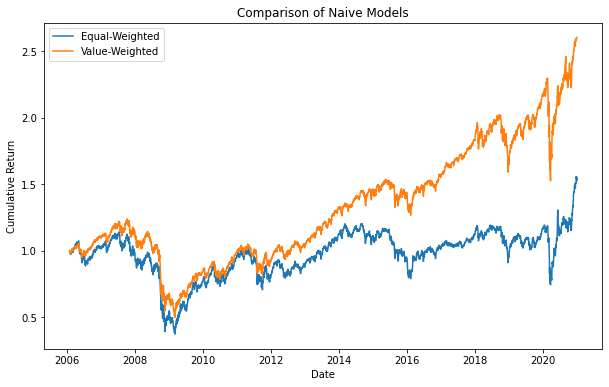

In [185]:
df = all_navs.loc[:, naive_names]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(f'Comparison of Naive Models')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.plot(df, label=df.columns)
ax.legend()
plt.savefig('naive_comparison.png')

### Markowitz Plots

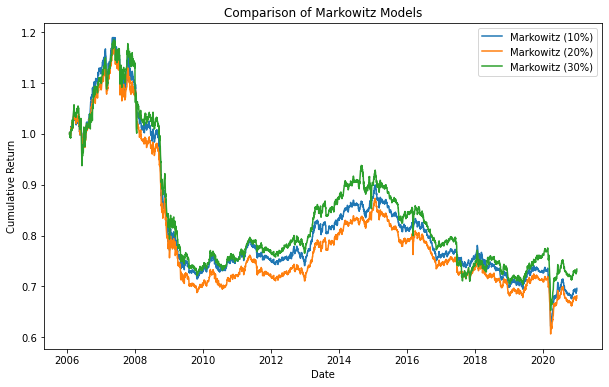

In [186]:
df = all_navs.loc[:, markowitz_names]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(f'Comparison of Markowitz Models')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.plot(df, label=df.columns)
ax.legend()
plt.savefig('markowitz_comparison.png')

### Risk-Parity Comparison

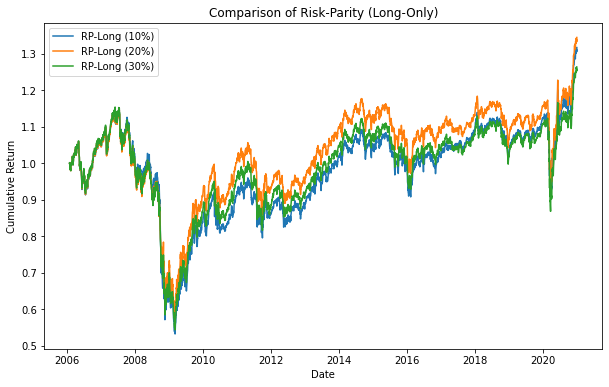

In [187]:
df = all_navs.loc[:, rp_long_names]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(f'Comparison of Risk-Parity (Long-Only)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.plot(df, label=df.columns)
ax.legend()
plt.savefig('rp_long_comparison.png')

### Risk-Budgeting Comparison

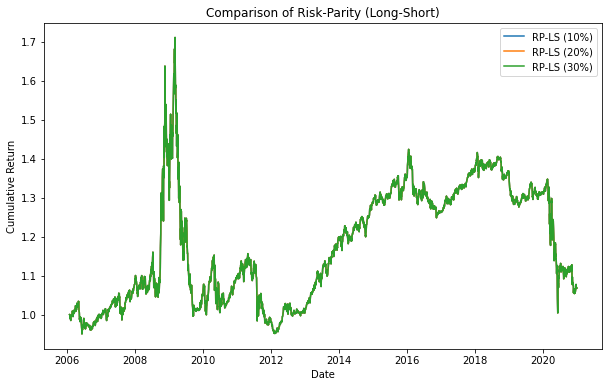

In [188]:
df = all_navs.loc[:, rp_ls_names]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(f'Comparison of Risk-Parity (Long-Short)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.plot(df, label=df.columns)
ax.legend()
plt.savefig('rp_ls_comparison.png')

### All Comparisons

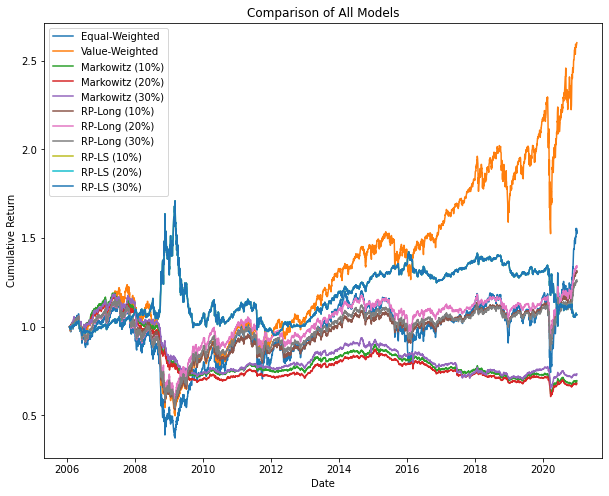

In [190]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(f'Comparison of All Models')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.plot(all_navs, label=all_navs.columns)
ax.legend()
plt.savefig('all_comparison.png')